In [1]:
import os
import warnings
import numpy as np
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from PIL import Image
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

#import custom modules
from utils.data_augment import *
from utils.loss_function import *
from utils.encoder_projection import *

warnings.filterwarnings('ignore')

/Users/dehaay/anaconda3/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# Read Data

In [7]:
#load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


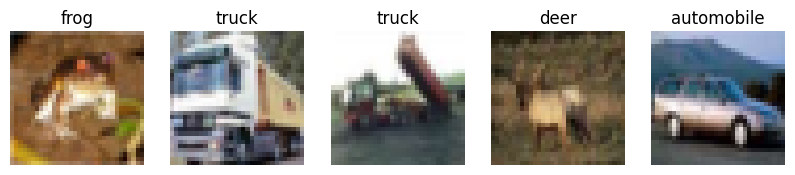

In [13]:
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()

# Display the first few images
num_images_to_display = 5
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 2))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis("off")

plt.show()

In [14]:
# Load CIFAR-10 dataset
(train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()


# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255)

# Create a generator from the data
train_generator = train_datagen.flow(train_images, batch_size=32, shuffle=True)


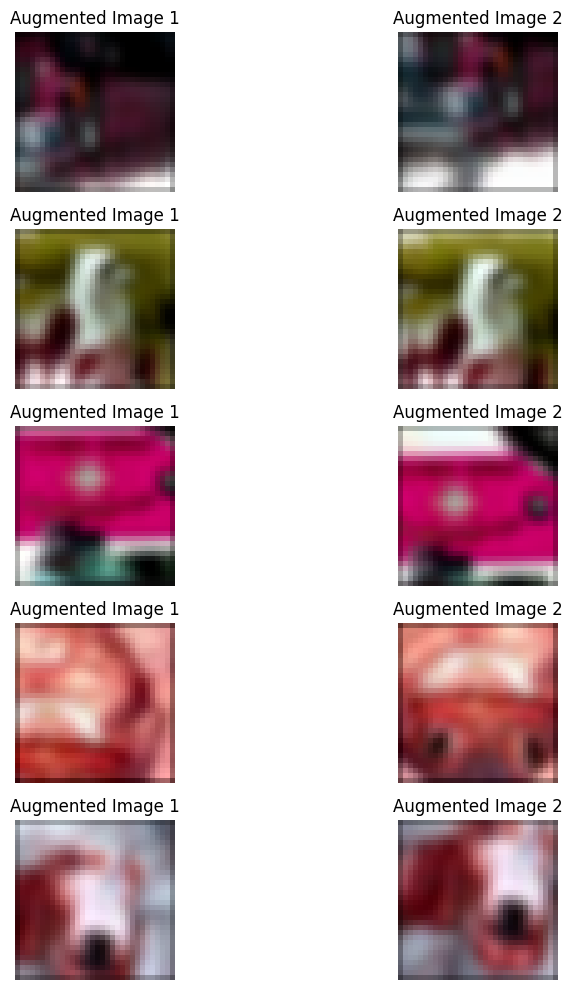

In [15]:


# Instantiate the data generator
simclr_train_generator = SimCLRDataGenerator(train_generator, batch_size=32)

# Generate augmented data
augmented_data = simclr_train_generator.generate()

SimCLRDataGenerator.show_augmented_images(augmented_data)


# Create Encoder and Projection Head
see utils encoder_projection

In [7]:
simclr_encoder = SimCLREncoder()

Generated ResNet152


# Loss function

see utils loss_function

In [15]:
#generate requirement txt for this specific file
!pip freeze > requirements.txt

# Train With Different Inputs on Ciphar10:

In [4]:
from utils.ResNet152run import *

In [18]:
run_Resnet152(train_generator,0.008,3,32,100)
run_Resnet152(train_generator,0.008,3,64,100)
run_Resnet152(train_generator,0.008,3,128,100)
run_Resnet152(train_generator,0.008,3,256,100)
run_Resnet152(train_generator,0.008,3,512,100)

In [28]:
run_Resnet152(train_generator,0.008,3,32,100)

Generated ResNet152
Epoch 1/3
|||||||||||||||||||||||||batch 25 with improved average loss: 1.7888889408111572
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 2/3
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 3/3
|||||||||||||||||||||||||batch 25 with improved average loss: 0.5546456098556518
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs32_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs32_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs32_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs32_100_3/assets


Encoder model saved to resnet152model/encoder_model_lr0.008_bs32_100_3
Projection head saved to resnet152model/projection_head_lr0.008_bs32_100_3


  0%|                                                  | 0/1562 [00:00<?, ?it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 1/1562 [00:00<10:59,  2.37it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 2/1562 [00:00<06:11,  4.19it/s]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 3/1562 [00:00<05:29,  4.73it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 4/1562 [00:00<04:31,  5.74it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 5/1562 [00:00<03:55,  6.60it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 6/1562 [00:01<03:28,  7.45it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▏                                         | 8/1562 [00:01<03:01,  8.56it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▏                                         | 9/1562 [00:01<02:55,  8.84it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 10/1562 [00:01<02:52,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 11/1562 [00:01<02:48,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 12/1562 [00:01<02:48,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 13/1562 [00:01<02:44,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 14/1562 [00:01<02:41,  9.57it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▍                                        | 15/1562 [00:01<02:41,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 17/1562 [00:02<02:37,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 18/1562 [00:02<02:36,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▌                                        | 20/1562 [00:02<02:34,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▌                                        | 21/1562 [00:02<02:35,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 22/1562 [00:02<02:35,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 24/1562 [00:02<02:32, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 26/1562 [00:03<02:34,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 28/1562 [00:03<02:33, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 30/1562 [00:03<02:32, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 32/1562 [00:03<02:41,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 34/1562 [00:03<02:37,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 36/1562 [00:04<02:34,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▉                                        | 37/1562 [00:04<02:35,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


  2%|█                                        | 39/1562 [00:04<02:32, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█                                        | 41/1562 [00:04<02:29, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 43/1562 [00:04<02:30, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▏                                       | 45/1562 [00:04<02:29, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 47/1562 [00:05<02:27, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 49/1562 [00:05<02:28, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▎                                       | 51/1562 [00:05<02:27, 10.23it/s]

1/1 [==============================] - 0s 11ms/step


  3%|█▍                                       | 53/1562 [00:05<02:28, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 55/1562 [00:05<02:28, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 57/1562 [00:06<02:28, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                       | 59/1562 [00:06<02:27, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▌                                       | 61/1562 [00:06<02:27, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 63/1562 [00:06<02:27, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▋                                       | 65/1562 [00:06<02:28, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                       | 67/1562 [00:07<02:40,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                       | 69/1562 [00:07<02:35,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▊                                       | 70/1562 [00:07<02:35,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▊                                       | 71/1562 [00:07<02:34,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 73/1562 [00:07<02:30,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 75/1562 [00:07<02:28, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 77/1562 [00:08<02:28,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██                                       | 78/1562 [00:08<02:29,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 80/1562 [00:08<02:26, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██▏                                      | 82/1562 [00:08<02:47,  8.86it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██▏                                      | 84/1562 [00:08<02:38,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 86/1562 [00:09<02:35,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 87/1562 [00:09<02:34,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 89/1562 [00:09<02:31,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 91/1562 [00:09<02:28,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


  6%|██▍                                      | 92/1562 [00:09<02:29,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 93/1562 [00:09<02:29,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 94/1562 [00:09<02:31,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 96/1562 [00:10<02:26,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▌                                      | 98/1562 [00:10<02:27,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 99/1562 [00:10<02:26,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                     | 101/1562 [00:10<02:26,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


  7%|██▋                                     | 103/1562 [00:10<02:27,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 104/1562 [00:10<02:29,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 105/1562 [00:11<02:28,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 107/1562 [00:11<02:25,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 109/1562 [00:11<02:26,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


  7%|██▊                                     | 110/1562 [00:11<02:30,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 111/1562 [00:11<02:43,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 113/1562 [00:11<02:34,  9.36it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▉                                     | 114/1562 [00:12<02:34,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 116/1562 [00:12<02:29,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 118/1562 [00:12<02:26,  9.84it/s]

1/1 [==============================] - 0s 12ms/step


  8%|███                                     | 119/1562 [00:12<02:29,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 120/1562 [00:12<02:30,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 122/1562 [00:12<02:26,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 124/1562 [00:13<02:24,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 125/1562 [00:13<02:25,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 127/1562 [00:13<02:23,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 129/1562 [00:13<02:22, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


  8%|███▎                                    | 130/1562 [00:13<02:26,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 131/1562 [00:13<02:28,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 133/1562 [00:13<02:24,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 135/1562 [00:14<02:23,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▍                                    | 136/1562 [00:14<02:24,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


  9%|███▌                                    | 137/1562 [00:14<02:27,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 138/1562 [00:14<02:29,  9.50it/s]

1/1 [==============================] - 0s 50ms/step


  9%|███▌                                    | 139/1562 [00:14<02:51,  8.30it/s]

1/1 [==============================] - 0s 11ms/step


  9%|███▌                                    | 140/1562 [00:14<02:53,  8.18it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 141/1562 [00:14<02:48,  8.45it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▋                                    | 142/1562 [00:14<02:44,  8.66it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▋                                    | 143/1562 [00:15<02:43,  8.67it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 144/1562 [00:15<02:38,  8.94it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▋                                    | 145/1562 [00:15<02:38,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 146/1562 [00:15<02:37,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                    | 147/1562 [00:15<02:33,  9.24it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▊                                    | 148/1562 [00:15<02:47,  8.46it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 149/1562 [00:15<02:43,  8.66it/s]

1/1 [==============================] - 0s 11ms/step


 10%|███▊                                    | 150/1562 [00:15<02:39,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 151/1562 [00:15<02:35,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 152/1562 [00:16<02:33,  9.22it/s]

1/1 [==============================] - 0s 10ms/step


 10%|███▉                                    | 153/1562 [00:16<02:32,  9.26it/s]

1/1 [==============================] - 0s 10ms/step


 10%|███▉                                    | 155/1562 [00:16<02:26,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 156/1562 [00:16<02:26,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 157/1562 [00:16<02:26,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 158/1562 [00:16<02:26,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 159/1562 [00:16<02:26,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 160/1562 [00:16<02:25,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 161/1562 [00:17<02:28,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 162/1562 [00:17<02:27,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 163/1562 [00:17<02:25,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 164/1562 [00:17<02:23,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▏                                   | 165/1562 [00:17<02:24,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▎                                   | 166/1562 [00:17<02:25,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 167/1562 [00:17<02:28,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 169/1562 [00:17<02:23,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▍                                   | 171/1562 [00:18<02:20,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 172/1562 [00:18<02:21,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 173/1562 [00:18<02:20,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 175/1562 [00:18<02:19,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▌                                   | 177/1562 [00:18<02:20,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 178/1562 [00:18<02:21,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▌                                   | 180/1562 [00:18<02:20,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 181/1562 [00:19<02:21,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 183/1562 [00:19<02:21,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 185/1562 [00:19<02:20,  9.78it/s]

1/1 [==============================] - 0s 27ms/step


 12%|████▊                                   | 186/1562 [00:19<02:27,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 187/1562 [00:19<02:32,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 188/1562 [00:19<02:29,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 189/1562 [00:19<02:27,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 191/1562 [00:20<02:22,  9.63it/s]

1/1 [==============================] - 0s 11ms/step


 12%|████▉                                   | 193/1562 [00:20<02:21,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 194/1562 [00:20<02:23,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 196/1562 [00:20<02:20,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 197/1562 [00:20<02:19,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 199/1562 [00:20<02:19,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 200/1562 [00:21<02:19,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 201/1562 [00:21<02:19,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 202/1562 [00:21<02:20,  9.65it/s]

1/1 [==============================] - 0s 11ms/step


 13%|█████▏                                  | 204/1562 [00:21<02:19,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▏                                  | 205/1562 [00:21<02:21,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 207/1562 [00:21<02:18,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 13%|█████▎                                  | 208/1562 [00:21<02:18,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 209/1562 [00:21<02:17,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▍                                  | 210/1562 [00:22<02:19,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 212/1562 [00:22<02:17,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 214/1562 [00:22<02:15,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 14%|█████▌                                  | 215/1562 [00:22<02:18,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 216/1562 [00:22<02:31,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 218/1562 [00:22<02:24,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 219/1562 [00:23<02:22,  9.45it/s]

1/1 [==============================] - 0s 11ms/step


 14%|█████▋                                  | 220/1562 [00:23<02:22,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 221/1562 [00:23<02:20,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 222/1562 [00:23<02:19,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 224/1562 [00:23<02:16,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                  | 225/1562 [00:23<02:16,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▊                                  | 226/1562 [00:23<02:17,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 227/1562 [00:23<02:18,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 229/1562 [00:24<02:15,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 231/1562 [00:24<02:32,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 232/1562 [00:24<02:29,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 234/1562 [00:24<02:22,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 235/1562 [00:24<02:21,  9.39it/s]

1/1 [==============================] - 0s 11ms/step


 15%|██████                                  | 236/1562 [00:24<02:21,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 237/1562 [00:24<02:19,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 238/1562 [00:25<02:18,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 240/1562 [00:25<02:16,  9.72it/s]

1/1 [==============================] - 0s 11ms/step


 15%|██████▏                                 | 241/1562 [00:25<02:18,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 242/1562 [00:25<02:18,  9.50it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▏                                 | 243/1562 [00:25<02:18,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 244/1562 [00:25<02:18,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 245/1562 [00:25<02:16,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▎                                 | 247/1562 [00:25<02:16,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 248/1562 [00:26<02:16,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 249/1562 [00:26<02:15,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 250/1562 [00:26<02:14,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 251/1562 [00:26<02:15,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▍                                 | 252/1562 [00:26<02:16,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 253/1562 [00:26<02:16,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 255/1562 [00:26<02:13,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 256/1562 [00:26<02:13,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▌                                 | 257/1562 [00:27<02:14,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▌                                 | 258/1562 [00:27<02:15,  9.64it/s]

1/1 [==============================] - 0s 36ms/step


 17%|██████▋                                 | 259/1562 [00:27<03:26,  6.31it/s]

1/1 [==============================] - 0s 55ms/step


 17%|██████▋                                 | 260/1562 [00:27<04:37,  4.69it/s]

1/1 [==============================] - 0s 21ms/step


 17%|██████▋                                 | 261/1562 [00:28<04:55,  4.41it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▋                                 | 262/1562 [00:28<04:07,  5.25it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 263/1562 [00:28<03:32,  6.10it/s]

1/1 [==============================] - 0s 10ms/step


 17%|██████▊                                 | 264/1562 [00:28<03:09,  6.87it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 266/1562 [00:28<02:41,  8.02it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▊                                 | 267/1562 [00:28<02:37,  8.20it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 269/1562 [00:28<02:24,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 270/1562 [00:28<02:23,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 271/1562 [00:29<02:19,  9.25it/s]

1/1 [==============================] - 0s 11ms/step


 17%|██████▉                                 | 272/1562 [00:29<02:18,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 273/1562 [00:29<02:19,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 274/1562 [00:29<02:16,  9.42it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████                                 | 276/1562 [00:29<02:15,  9.47it/s]

1/1 [==============================] - 0s 17ms/step


 18%|███████                                 | 277/1562 [00:29<02:34,  8.29it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████                                 | 278/1562 [00:29<02:32,  8.40it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 280/1562 [00:30<02:20,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 282/1562 [00:30<02:15,  9.47it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████▎                                | 284/1562 [00:30<02:11,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 286/1562 [00:30<02:08,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 287/1562 [00:30<02:09,  9.83it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▍                                | 288/1562 [00:30<02:09,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 289/1562 [00:30<02:10,  9.77it/s]

1/1 [==============================] - 0s 8ms/step


 19%|███████▍                                | 291/1562 [00:31<02:08,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 293/1562 [00:31<02:06, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 294/1562 [00:31<02:08,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 296/1562 [00:31<02:07,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 298/1562 [00:31<02:05, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 19%|███████▋                                | 299/1562 [00:31<02:06, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 300/1562 [00:32<02:06,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 302/1562 [00:32<02:05, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                | 304/1562 [00:32<02:04, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 20%|███████▊                                | 306/1562 [00:32<02:06,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 308/1562 [00:32<02:04, 10.09it/s]

1/1 [==============================] - 0s 11ms/step


 20%|███████▉                                | 310/1562 [00:33<02:05,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 311/1562 [00:33<02:06,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 313/1562 [00:33<02:04, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 315/1562 [00:33<02:02, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 317/1562 [00:33<02:04,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████▏                               | 319/1562 [00:33<02:02, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▏                               | 321/1562 [00:34<02:02, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 323/1562 [00:34<02:02, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 325/1562 [00:34<02:02, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 21%|████████▎                               | 327/1562 [00:34<02:02, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 329/1562 [00:34<02:02, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 331/1562 [00:35<02:01, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 333/1562 [00:35<02:02, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 335/1562 [00:35<02:01, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 337/1562 [00:35<02:01, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▋                               | 339/1562 [00:35<02:01, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 341/1562 [00:36<02:00, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 343/1562 [00:36<01:59, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 345/1562 [00:36<02:00, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 347/1562 [00:36<01:59, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 349/1562 [00:36<01:59, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▉                               | 351/1562 [00:37<02:00, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 353/1562 [00:37<02:00, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████                               | 355/1562 [00:37<01:59, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 357/1562 [00:37<02:01,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 359/1562 [00:37<01:58, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 361/1562 [00:38<01:59, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 363/1562 [00:38<01:58, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 365/1562 [00:38<01:56, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▍                              | 367/1562 [00:38<01:57, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 369/1562 [00:38<01:59, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 371/1562 [00:39<01:57, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 373/1562 [00:39<01:58, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 375/1562 [00:39<01:57, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 377/1562 [00:39<01:57, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▋                              | 379/1562 [00:39<01:57, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▊                              | 381/1562 [00:40<01:56, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▊                              | 383/1562 [00:40<01:55, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▊                              | 385/1562 [00:40<01:55, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 25%|█████████▉                              | 387/1562 [00:40<01:55, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


 25%|█████████▉                              | 389/1562 [00:40<01:56, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 391/1562 [00:41<01:55, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 393/1562 [00:41<01:54, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 395/1562 [00:41<01:55, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 397/1562 [00:41<01:54, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▏                             | 399/1562 [00:41<01:53, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 401/1562 [00:42<01:54, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 403/1562 [00:42<01:53, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▎                             | 405/1562 [00:42<01:53, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 407/1562 [00:42<01:54, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 409/1562 [00:42<01:53, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▌                             | 411/1562 [00:43<01:53, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▌                             | 413/1562 [00:43<01:53, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▋                             | 415/1562 [00:43<01:52, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 27%|██████████▋                             | 417/1562 [00:43<01:52, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▋                             | 419/1562 [00:43<01:52, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 421/1562 [00:44<01:52, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 423/1562 [00:44<01:53,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 425/1562 [00:44<01:52, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▉                             | 427/1562 [00:44<01:51, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 429/1562 [00:44<01:51, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 431/1562 [00:45<01:55,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████                             | 433/1562 [00:45<01:53,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████                             | 434/1562 [00:45<01:54,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 436/1562 [00:45<01:52, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 438/1562 [00:45<01:51, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 440/1562 [00:45<01:52, 10.01it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▎                            | 442/1562 [00:46<01:50, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 444/1562 [00:46<01:50, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 446/1562 [00:46<01:51, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 448/1562 [00:46<01:50, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 450/1562 [00:46<01:49, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 452/1562 [00:47<01:51,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▌                            | 453/1562 [00:47<01:51,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 455/1562 [00:47<01:50, 10.01it/s]

1/1 [==============================] - 0s 17ms/step


 29%|███████████▋                            | 456/1562 [00:47<01:52,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 457/1562 [00:47<01:53,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 458/1562 [00:47<01:53,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▊                            | 460/1562 [00:47<01:49, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 461/1562 [00:48<01:50, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 462/1562 [00:48<01:50,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 463/1562 [00:48<02:32,  7.22it/s]

1/1 [==============================] - 0s 10ms/step


 30%|███████████▉                            | 465/1562 [00:48<02:12,  8.25it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 466/1562 [00:48<02:07,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 467/1562 [00:48<02:04,  8.80it/s]

1/1 [==============================] - 0s 8ms/step


 30%|███████████▉                            | 468/1562 [00:48<02:04,  8.81it/s]

1/1 [==============================] - 0s 8ms/step


 30%|████████████                            | 470/1562 [00:49<01:56,  9.39it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████                            | 471/1562 [00:49<01:54,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 472/1562 [00:49<01:53,  9.57it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▏                           | 474/1562 [00:51<11:00,  1.65it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▏                           | 475/1562 [00:52<08:56,  2.03it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▏                           | 476/1562 [00:52<07:11,  2.52it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▏                           | 477/1562 [00:52<05:48,  3.11it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▎                           | 479/1562 [00:52<04:05,  4.41it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 480/1562 [00:52<03:34,  5.04it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 481/1562 [00:52<03:08,  5.73it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 482/1562 [00:52<02:47,  6.44it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 484/1562 [00:52<02:21,  7.64it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 485/1562 [00:53<02:15,  7.98it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 487/1562 [00:53<02:03,  8.72it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 488/1562 [00:53<01:59,  8.96it/s]

1/1 [==============================] - 0s 12ms/step


 31%|████████████▌                           | 490/1562 [00:53<01:55,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 491/1562 [00:53<01:55,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▌                           | 493/1562 [00:53<01:51,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 494/1562 [00:53<01:50,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 496/1562 [00:54<01:48,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 498/1562 [00:54<01:47,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 499/1562 [00:54<01:50,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 500/1562 [00:54<01:49,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 32%|████████████▊                           | 501/1562 [00:54<01:51,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 502/1562 [00:54<01:50,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 504/1562 [00:54<01:47,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 506/1562 [00:55<01:45,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 507/1562 [00:55<01:45,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 509/1562 [00:55<01:43, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 511/1562 [00:55<01:44, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 513/1562 [00:55<01:44, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 515/1562 [00:56<01:44, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▏                          | 517/1562 [00:56<01:43, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 519/1562 [00:56<01:43, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 521/1562 [00:56<01:43, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                          | 523/1562 [00:56<01:42, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 525/1562 [00:57<01:43, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 527/1562 [00:57<01:42, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 34%|█████████████▌                          | 529/1562 [00:57<01:43,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 530/1562 [00:57<01:43,  9.95it/s]

1/1 [==============================] - 0s 12ms/step


 34%|█████████████▌                          | 531/1562 [00:57<02:21,  7.29it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 532/1562 [00:57<02:14,  7.63it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 534/1562 [00:58<02:01,  8.48it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 536/1562 [00:58<01:52,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 537/1562 [00:58<02:04,  8.22it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 538/1562 [00:58<02:00,  8.51it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 540/1562 [00:58<01:51,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 542/1562 [00:58<01:46,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 543/1562 [00:59<01:46,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 544/1562 [00:59<01:45,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 546/1562 [00:59<01:42,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 548/1562 [00:59<01:43,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 35%|██████████████                          | 549/1562 [00:59<01:44,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 550/1562 [00:59<01:45,  9.58it/s]

1/1 [==============================] - 0s 11ms/step


 35%|██████████████▏                         | 552/1562 [00:59<01:42,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 553/1562 [01:00<01:43,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 35%|██████████████▏                         | 554/1562 [01:00<01:43,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 555/1562 [01:00<01:43,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 556/1562 [01:00<01:46,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 557/1562 [01:00<01:45,  9.56it/s]

1/1 [==============================] - 0s 18ms/step


 36%|██████████████▎                         | 558/1562 [01:00<01:58,  8.46it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▎                         | 559/1562 [01:00<01:56,  8.58it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 561/1562 [01:00<01:48,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 562/1562 [01:01<01:48,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 564/1562 [01:01<01:43,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 565/1562 [01:01<01:43,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 567/1562 [01:01<01:40,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 569/1562 [01:01<01:39,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▌                         | 570/1562 [01:01<01:40,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▌                         | 571/1562 [01:01<01:41,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 573/1562 [01:02<01:39,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 575/1562 [01:02<01:38,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 576/1562 [01:02<01:39,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 578/1562 [01:02<01:38,  9.97it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▊                         | 580/1562 [01:02<01:37, 10.03it/s]

1/1 [==============================] - 0s 12ms/step


 37%|██████████████▉                         | 581/1562 [01:02<01:39,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 582/1562 [01:03<01:39,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 584/1562 [01:03<01:37, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████                         | 586/1562 [01:03<01:37, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████                         | 587/1562 [01:03<01:39,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 589/1562 [01:03<01:37, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 591/1562 [01:03<01:36, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▏                        | 592/1562 [01:04<01:37,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 593/1562 [01:04<01:37,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 595/1562 [01:04<01:36,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▎                        | 597/1562 [01:04<01:36, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▎                        | 598/1562 [01:04<01:37,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 600/1562 [01:04<01:37,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▍                        | 601/1562 [01:05<01:37,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▍                        | 603/1562 [01:05<01:36,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▍                        | 604/1562 [01:05<01:36,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 606/1562 [01:05<01:34, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▌                        | 608/1562 [01:05<01:34, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 610/1562 [01:05<01:34, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 612/1562 [01:06<01:34, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 614/1562 [01:06<01:35,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 615/1562 [01:06<01:35,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 617/1562 [01:06<01:36,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 618/1562 [01:06<01:35,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 40%|███████████████▉                        | 620/1562 [01:06<01:35,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 621/1562 [01:07<01:35,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 623/1562 [01:07<01:34,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 624/1562 [01:07<01:33,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 625/1562 [01:07<01:34,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 626/1562 [01:07<01:35,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 40%|████████████████                        | 627/1562 [01:07<01:36,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 628/1562 [01:07<01:38,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▏                       | 630/1562 [01:07<01:35,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▏                       | 631/1562 [01:08<01:34,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▏                       | 632/1562 [01:08<01:34,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▏                       | 634/1562 [01:08<01:32, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 636/1562 [01:08<01:32, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▎                       | 637/1562 [01:08<01:33,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 638/1562 [01:08<01:33,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 639/1562 [01:08<01:33,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 640/1562 [01:08<01:33,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▍                       | 642/1562 [01:09<01:33,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 643/1562 [01:09<01:33,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 645/1562 [01:09<01:32,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 647/1562 [01:09<01:32,  9.88it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████▌                       | 648/1562 [01:09<01:36,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▌                       | 649/1562 [01:09<01:36,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 651/1562 [01:10<01:33,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 42%|████████████████▋                       | 652/1562 [01:10<01:33,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 42%|████████████████▋                       | 653/1562 [01:10<01:33,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 654/1562 [01:10<01:33,  9.74it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████████████████▊                       | 656/1562 [01:10<01:41,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 657/1562 [01:10<01:45,  8.56it/s]

1/1 [==============================] - 0s 10ms/step


 42%|████████████████▊                       | 658/1562 [01:10<01:43,  8.73it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████████████████▉                       | 659/1562 [01:11<02:19,  6.46it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████████████████▉                       | 660/1562 [01:11<02:56,  5.11it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████████████████▉                       | 661/1562 [01:11<03:05,  4.87it/s]

1/1 [==============================] - 0s 13ms/step


 42%|████████████████▉                       | 662/1562 [01:11<02:47,  5.37it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 663/1562 [01:11<02:27,  6.10it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████                       | 664/1562 [01:12<02:14,  6.68it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 666/1562 [01:12<01:53,  7.92it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████                       | 667/1562 [01:12<01:48,  8.28it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 668/1562 [01:12<01:44,  8.54it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 669/1562 [01:12<01:41,  8.76it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 670/1562 [01:12<01:38,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▏                      | 672/1562 [01:12<01:34,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 673/1562 [01:12<01:34,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 674/1562 [01:13<01:32,  9.58it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▎                      | 675/1562 [01:13<01:33,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 676/1562 [01:13<01:34,  9.36it/s]

1/1 [==============================] - 0s 11ms/step


 43%|█████████████████▎                      | 677/1562 [01:13<01:33,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 678/1562 [01:13<01:32,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 680/1562 [01:13<01:30,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▍                      | 682/1562 [01:13<01:28,  9.97it/s]

1/1 [==============================] - 0s 14ms/step


 44%|█████████████████▍                      | 683/1562 [01:13<01:31,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 684/1562 [01:14<01:36,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 686/1562 [01:14<01:31,  9.57it/s]

1/1 [==============================] - 0s 11ms/step


 44%|█████████████████▌                      | 688/1562 [01:14<01:30,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 689/1562 [01:14<01:31,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 690/1562 [01:14<01:33,  9.36it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▋                      | 691/1562 [01:14<01:32,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 692/1562 [01:14<01:31,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                      | 694/1562 [01:15<01:29,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 45%|█████████████████▊                      | 696/1562 [01:15<01:29,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▊                      | 697/1562 [01:15<01:29,  9.63it/s]

1/1 [==============================] - 0s 11ms/step


 45%|█████████████████▊                      | 698/1562 [01:15<01:29,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 45%|█████████████████▉                      | 699/1562 [01:15<01:30,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 700/1562 [01:15<01:30,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 702/1562 [01:15<01:28,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 703/1562 [01:16<01:27,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████                      | 704/1562 [01:16<01:28,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 705/1562 [01:16<01:28,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 706/1562 [01:16<01:28,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 707/1562 [01:16<01:27,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 708/1562 [01:16<01:26,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 709/1562 [01:16<01:28,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▏                     | 710/1562 [01:16<01:28,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▏                     | 711/1562 [01:16<01:28,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▎                     | 713/1562 [01:17<01:28,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 714/1562 [01:17<01:28,  9.54it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▎                     | 715/1562 [01:17<01:29,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 716/1562 [01:17<01:28,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 718/1562 [01:17<01:36,  8.78it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 719/1562 [01:17<01:33,  9.04it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▍                     | 720/1562 [01:17<01:31,  9.21it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▍                     | 721/1562 [01:17<01:31,  9.20it/s]

1/1 [==============================] - 0s 12ms/step


 46%|██████████████████▍                     | 722/1562 [01:18<01:32,  9.10it/s]

1/1 [==============================] - 0s 13ms/step


 46%|██████████████████▌                     | 723/1562 [01:18<01:33,  8.93it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▌                     | 724/1562 [01:18<01:33,  8.95it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▌                     | 725/1562 [01:18<01:32,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 726/1562 [01:18<01:30,  9.23it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▌                     | 727/1562 [01:18<01:28,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 729/1562 [01:18<01:25,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 730/1562 [01:18<01:25,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 731/1562 [01:19<01:26,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 733/1562 [01:19<01:23,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 734/1562 [01:19<01:23,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 47%|██████████████████▊                     | 735/1562 [01:19<01:29,  9.29it/s]

1/1 [==============================] - 0s 10ms/step


 47%|██████████████████▊                     | 736/1562 [01:19<01:30,  9.18it/s]

1/1 [==============================] - 0s 30ms/step


 47%|██████████████████▊                     | 737/1562 [01:19<01:34,  8.69it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 738/1562 [01:19<01:34,  8.71it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 740/1562 [01:20<01:28,  9.30it/s]

1/1 [==============================] - 0s 11ms/step


 47%|██████████████████▉                     | 741/1562 [01:20<01:28,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 742/1562 [01:20<01:27,  9.41it/s]

1/1 [==============================] - 0s 16ms/step


 48%|███████████████████                     | 743/1562 [01:20<01:29,  9.19it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████                     | 744/1562 [01:20<01:28,  9.23it/s]

1/1 [==============================] - 0s 28ms/step


 48%|███████████████████                     | 745/1562 [01:20<01:33,  8.78it/s]

1/1 [==============================] - 0s 11ms/step


 48%|███████████████████                     | 746/1562 [01:20<01:36,  8.41it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 747/1562 [01:20<01:33,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 748/1562 [01:20<01:30,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 749/1562 [01:21<01:28,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 750/1562 [01:21<01:26,  9.35it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▏                    | 751/1562 [01:21<01:27,  9.31it/s]

1/1 [==============================] - 0s 33ms/step


 48%|███████████████████▎                    | 752/1562 [01:21<01:49,  7.37it/s]

1/1 [==============================] - 0s 44ms/step


 48%|███████████████████▎                    | 753/1562 [01:21<02:24,  5.58it/s]

1/1 [==============================] - 0s 17ms/step


 48%|███████████████████▎                    | 754/1562 [01:21<02:33,  5.26it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 755/1562 [01:22<02:14,  6.02it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 756/1562 [01:22<01:58,  6.78it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 758/1562 [01:22<01:41,  7.93it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 759/1562 [01:22<01:36,  8.33it/s]

1/1 [==============================] - 0s 13ms/step


 49%|███████████████████▍                    | 760/1562 [01:22<01:33,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 761/1562 [01:22<01:31,  8.75it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 762/1562 [01:22<01:28,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 763/1562 [01:22<01:26,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 765/1562 [01:23<01:23,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 766/1562 [01:23<01:23,  9.53it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▋                    | 767/1562 [01:23<01:27,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 768/1562 [01:23<01:27,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 769/1562 [01:23<01:25,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 770/1562 [01:23<01:23,  9.47it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▋                    | 771/1562 [01:23<01:23,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▊                    | 772/1562 [01:23<01:22,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▊                    | 773/1562 [01:23<01:22,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▊                    | 774/1562 [01:24<01:22,  9.56it/s]

1/1 [==============================] - 0s 10ms/step


 50%|███████████████████▊                    | 776/1562 [01:24<01:20,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 777/1562 [01:24<01:21,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 779/1562 [01:24<01:18,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 780/1562 [01:24<01:19,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 781/1562 [01:24<01:20,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 782/1562 [01:24<01:20,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 783/1562 [01:24<01:20,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 784/1562 [01:25<01:19,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 786/1562 [01:25<01:18,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 50%|████████████████████▏                   | 787/1562 [01:25<01:18,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 788/1562 [01:25<01:18,  9.82it/s]

1/1 [==============================] - 0s 19ms/step


 51%|████████████████████▏                   | 789/1562 [01:25<01:24,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▏                   | 790/1562 [01:25<01:27,  8.78it/s]

1/1 [==============================] - 0s 11ms/step


 51%|████████████████████▎                   | 792/1562 [01:25<01:22,  9.28it/s]

1/1 [==============================] - 0s 17ms/step


 51%|████████████████████▎                   | 793/1562 [01:26<01:24,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 794/1562 [01:26<01:31,  8.39it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 796/1562 [01:26<01:24,  9.02it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▍                   | 797/1562 [01:26<01:24,  9.08it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▍                   | 798/1562 [01:26<01:22,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 800/1562 [01:26<01:19,  9.61it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▌                   | 802/1562 [01:26<01:18,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 803/1562 [01:27<01:18,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 804/1562 [01:27<01:18,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 806/1562 [01:27<01:16,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 807/1562 [01:27<01:16,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▋                   | 808/1562 [01:27<01:17,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 809/1562 [01:27<01:17,  9.70it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▋                   | 810/1562 [01:27<01:18,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 811/1562 [01:27<01:18,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 812/1562 [01:28<01:17,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 814/1562 [01:28<01:16,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 815/1562 [01:28<01:17,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 816/1562 [01:28<01:16,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▉                   | 818/1562 [01:28<01:22,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 819/1562 [01:28<01:21,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 821/1562 [01:28<01:17,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 823/1562 [01:29<01:16,  9.67it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████                   | 824/1562 [01:29<01:16,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 825/1562 [01:29<01:16,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 826/1562 [01:29<01:15,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 827/1562 [01:29<01:15,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 828/1562 [01:29<01:15,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 829/1562 [01:29<01:14,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 830/1562 [01:29<01:14,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 832/1562 [01:30<01:13,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 834/1562 [01:30<01:12, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▍                  | 835/1562 [01:30<01:13,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 836/1562 [01:30<01:13,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 838/1562 [01:30<01:12,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 840/1562 [01:30<01:12,  9.99it/s]

1/1 [==============================] - 0s 13ms/step


 54%|█████████████████████▌                  | 841/1562 [01:30<01:13,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 843/1562 [01:31<01:11, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 845/1562 [01:31<01:11, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 847/1562 [01:31<01:12,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 848/1562 [01:31<01:12,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▊                  | 850/1562 [01:31<01:11,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 55%|█████████████████████▊                  | 852/1562 [01:32<01:11,  9.96it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▊                  | 854/1562 [01:32<01:10, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▉                  | 856/1562 [01:32<01:09, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 858/1562 [01:32<01:15,  9.30it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████                  | 860/1562 [01:32<01:13,  9.57it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████                  | 862/1562 [01:33<01:12,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████                  | 863/1562 [01:33<01:12,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 864/1562 [01:33<01:11,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 866/1562 [01:33<01:10,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▏                 | 867/1562 [01:33<01:10,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▏                 | 868/1562 [01:33<01:11,  9.77it/s]

1/1 [==============================] - 0s 16ms/step


 56%|██████████████████████▎                 | 869/1562 [01:33<01:20,  8.62it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 870/1562 [01:34<01:19,  8.67it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 872/1562 [01:34<01:13,  9.33it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▎                 | 873/1562 [01:34<01:13,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 874/1562 [01:34<01:13,  9.40it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▍                 | 876/1562 [01:34<01:10,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 877/1562 [01:34<01:10,  9.65it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▍                 | 878/1562 [01:34<01:10,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 879/1562 [01:34<01:11,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▌                 | 881/1562 [01:35<01:09,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▌                 | 883/1562 [01:35<01:07, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▋                 | 884/1562 [01:35<01:08,  9.87it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▋                 | 885/1562 [01:35<01:08,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▋                 | 886/1562 [01:35<01:08,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 888/1562 [01:35<01:07,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 889/1562 [01:35<01:07,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 890/1562 [01:36<01:08,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 892/1562 [01:36<01:07,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 894/1562 [01:36<01:06, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▉                 | 895/1562 [01:36<01:06, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▉                 | 896/1562 [01:36<01:12,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 897/1562 [01:36<01:11,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 898/1562 [01:36<01:10,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 899/1562 [01:36<01:09,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 900/1562 [01:37<01:10,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 901/1562 [01:37<01:09,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 903/1562 [01:37<01:07,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 904/1562 [01:37<01:06,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 905/1562 [01:37<01:07,  9.77it/s]

1/1 [==============================] - 0s 12ms/step


 58%|███████████████████████▏                | 906/1562 [01:37<01:07,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▏                | 907/1562 [01:37<01:07,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 909/1562 [01:37<01:05,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 911/1562 [01:38<01:04, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 912/1562 [01:38<01:05,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▍                | 914/1562 [01:38<01:04, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 916/1562 [01:38<01:03, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 918/1562 [01:38<01:05,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▌                | 919/1562 [01:39<01:05,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 921/1562 [01:39<01:04,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 922/1562 [01:39<01:04,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 923/1562 [01:39<01:05,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 925/1562 [01:39<01:04,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▋                | 927/1562 [01:39<01:03, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 59%|███████████████████████▊                | 928/1562 [01:39<01:03,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 929/1562 [01:40<01:03,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 930/1562 [01:40<01:04,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 932/1562 [01:40<01:03,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 933/1562 [01:40<01:03,  9.83it/s]

1/1 [==============================] - 0s 10ms/step


 60%|███████████████████████▉                | 934/1562 [01:40<01:04,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 936/1562 [01:40<01:02,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 937/1562 [01:40<01:02,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████                | 939/1562 [01:41<01:01, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 940/1562 [01:41<01:02, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 942/1562 [01:41<01:01, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 60%|████████████████████████▏               | 944/1562 [01:41<01:01, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▏               | 946/1562 [01:41<01:03,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 947/1562 [01:41<01:03,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 949/1562 [01:42<01:01,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 951/1562 [01:42<01:01,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 953/1562 [01:42<01:00, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 955/1562 [01:42<01:00, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▌               | 957/1562 [01:42<01:00,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 959/1562 [01:43<01:00, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▌               | 961/1562 [01:43<00:59, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 963/1562 [01:43<01:00,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 964/1562 [01:43<01:00,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 966/1562 [01:43<00:59, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▊               | 968/1562 [01:44<01:09,  8.58it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▊               | 969/1562 [01:44<01:08,  8.65it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▊               | 971/1562 [01:44<01:04,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 972/1562 [01:44<01:03,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 974/1562 [01:44<01:01,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 976/1562 [01:44<00:59,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████               | 978/1562 [01:45<00:59,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 979/1562 [01:45<01:00,  9.71it/s]

1/1 [==============================] - 0s 19ms/step


 63%|█████████████████████████               | 981/1562 [01:45<00:59,  9.69it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████▏              | 982/1562 [01:45<01:00,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 984/1562 [01:45<00:59,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 986/1562 [01:45<00:58,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 988/1562 [01:46<00:57,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▎              | 989/1562 [01:46<00:57,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 990/1562 [01:46<00:57,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▍              | 991/1562 [01:46<00:59,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 992/1562 [01:46<00:59,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 994/1562 [01:46<00:57,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 995/1562 [01:46<00:58,  9.73it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████▌              | 996/1562 [01:46<00:58,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 997/1562 [01:46<00:57,  9.81it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████▌              | 998/1562 [01:47<00:57,  9.83it/s]

1/1 [==============================] - 0s 10ms/step


 64%|████████████████████████▉              | 1000/1562 [01:47<00:57,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 64%|████████████████████████▉              | 1001/1562 [01:47<00:56,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1003/1562 [01:47<00:56,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1005/1562 [01:47<00:55, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████              | 1006/1562 [01:47<00:56,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1008/1562 [01:48<00:55,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1010/1562 [01:48<00:54, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1012/1562 [01:48<00:54, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1014/1562 [01:48<00:54, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1016/1562 [01:48<00:53, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▍             | 1018/1562 [01:49<00:55,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1019/1562 [01:49<00:55,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1021/1562 [01:49<00:54,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▌             | 1022/1562 [01:49<00:54,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▌             | 1023/1562 [01:49<00:54,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1024/1562 [01:49<00:55,  9.73it/s]

1/1 [==============================] - 0s 8ms/step


 66%|█████████████████████████▌             | 1026/1562 [01:49<00:54,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▋             | 1028/1562 [01:50<00:54,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1029/1562 [01:50<00:54,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1030/1562 [01:50<00:54,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1031/1562 [01:50<00:54,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▊             | 1033/1562 [01:50<00:53,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1034/1562 [01:50<00:54,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1036/1562 [01:50<00:52,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▉             | 1037/1562 [01:51<00:52,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 67%|█████████████████████████▉             | 1039/1562 [01:51<00:52,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1040/1562 [01:51<00:52,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1042/1562 [01:51<00:51, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1043/1562 [01:51<00:52,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1044/1562 [01:51<00:52,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████             | 1045/1562 [01:51<00:52,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1046/1562 [01:51<00:52,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1048/1562 [01:52<00:52,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████▏            | 1050/1562 [01:52<00:51,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1051/1562 [01:52<00:52,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████▎            | 1053/1562 [01:52<00:52,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▎            | 1055/1562 [01:52<00:51,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▎            | 1056/1562 [01:52<00:51,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1058/1562 [01:53<00:50,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1059/1562 [01:53<00:50,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▍            | 1061/1562 [01:53<00:50,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1062/1562 [01:53<00:50,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1064/1562 [01:53<00:50,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▌            | 1066/1562 [01:53<00:49, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▋            | 1067/1562 [01:54<00:50,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▋            | 1068/1562 [01:54<00:52,  9.40it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▋            | 1069/1562 [01:54<00:52,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1071/1562 [01:54<00:50,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 69%|██████████████████████████▊            | 1072/1562 [01:54<00:51,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1073/1562 [01:54<00:51,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1075/1562 [01:54<00:49,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1077/1562 [01:55<00:49,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 69%|██████████████████████████▉            | 1078/1562 [01:55<00:49,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1079/1562 [01:55<00:49,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1081/1562 [01:55<00:48,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 69%|███████████████████████████            | 1083/1562 [01:55<00:48,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1084/1562 [01:55<00:48,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1085/1562 [01:55<00:48,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


 70%|███████████████████████████            | 1086/1562 [01:55<00:48,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1087/1562 [01:56<00:48,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▏           | 1089/1562 [01:56<00:48,  9.71it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▏           | 1091/1562 [01:56<00:47,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▎           | 1093/1562 [01:56<00:47,  9.89it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▎           | 1095/1562 [01:56<00:47,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1097/1562 [01:57<00:46,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1099/1562 [01:57<00:46, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1100/1562 [01:57<00:46,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1101/1562 [01:57<00:46,  9.94it/s]

1/1 [==============================] - 0s 12ms/step


 71%|███████████████████████████▌           | 1102/1562 [01:57<00:57,  8.03it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1103/1562 [01:57<00:55,  8.27it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1104/1562 [01:57<00:52,  8.66it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1105/1562 [01:58<00:51,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1107/1562 [01:58<00:48,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1109/1562 [01:58<00:46,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▋           | 1110/1562 [01:58<00:46,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1111/1562 [01:58<00:46,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1113/1562 [01:58<00:45,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1114/1562 [01:58<00:45,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1115/1562 [01:59<00:45,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▊           | 1116/1562 [01:59<00:45,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1117/1562 [01:59<00:45,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 72%|███████████████████████████▉           | 1118/1562 [01:59<00:45,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1120/1562 [01:59<00:44,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1122/1562 [01:59<00:44,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1124/1562 [01:59<00:43, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1126/1562 [02:00<00:43, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1128/1562 [02:00<00:43,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1130/1562 [02:00<00:43, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▎          | 1132/1562 [02:00<00:42, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▎          | 1134/1562 [02:00<00:43,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1136/1562 [02:01<00:42, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▍          | 1138/1562 [02:01<00:42, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1140/1562 [02:01<00:42, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 73%|████████████████████████████▌          | 1142/1562 [02:01<00:41, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▌          | 1144/1562 [02:01<00:41, 10.01it/s]

1/1 [==============================] - 0s 8ms/step


 73%|████████████████████████████▌          | 1146/1562 [02:02<00:41, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1148/1562 [02:02<00:40, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1150/1562 [02:02<00:41, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1152/1562 [02:02<00:40, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1154/1562 [02:02<00:40, 10.11it/s]

1/1 [==============================] - 0s 14ms/step


 74%|████████████████████████████▊          | 1156/1562 [02:03<00:41,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1157/1562 [02:03<00:41,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1159/1562 [02:03<00:40,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▉          | 1161/1562 [02:03<00:40,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 74%|█████████████████████████████          | 1163/1562 [02:03<00:39, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1165/1562 [02:04<00:39, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1167/1562 [02:04<00:39,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1168/1562 [02:04<00:39,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▏         | 1170/1562 [02:04<00:38, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▎         | 1172/1562 [02:04<00:38, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1173/1562 [02:04<00:39,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1174/1562 [02:04<00:39,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1176/1562 [02:05<00:38, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1177/1562 [02:05<00:38, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1178/1562 [02:05<00:38,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▍         | 1179/1562 [02:05<00:39,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▍         | 1181/1562 [02:05<00:38,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1182/1562 [02:05<00:38,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▌         | 1183/1562 [02:05<00:38,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1184/1562 [02:05<00:38,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1185/1562 [02:06<00:38,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1187/1562 [02:06<00:37, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1189/1562 [02:06<00:37,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1191/1562 [02:06<00:36, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1193/1562 [02:06<00:36, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▊         | 1195/1562 [02:07<00:37,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▊         | 1196/1562 [02:07<00:37,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1198/1562 [02:07<00:36,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 77%|█████████████████████████████▉         | 1200/1562 [02:07<00:36,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1201/1562 [02:07<00:36,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1203/1562 [02:07<00:35,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 77%|██████████████████████████████         | 1205/1562 [02:08<00:35,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1206/1562 [02:08<00:35,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1208/1562 [02:08<00:35, 10.02it/s]

1/1 [==============================] - 0s 16ms/step


 77%|██████████████████████████████▏        | 1210/1562 [02:08<00:36,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▏        | 1211/1562 [02:08<00:37,  9.41it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▎        | 1213/1562 [02:08<00:36,  9.46it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▎        | 1215/1562 [02:09<00:35,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▎        | 1216/1562 [02:09<00:35,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1217/1562 [02:09<00:35,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1219/1562 [02:09<00:34,  9.84it/s]

1/1 [==============================] - 0s 14ms/step


 78%|██████████████████████████████▍        | 1220/1562 [02:09<00:35,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1221/1562 [02:09<00:35,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1222/1562 [02:09<00:35,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1224/1562 [02:10<00:34,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1225/1562 [02:10<00:34,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▋        | 1227/1562 [02:10<00:34,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▋        | 1228/1562 [02:10<00:34,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1230/1562 [02:10<00:33,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1232/1562 [02:10<00:33,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▊        | 1233/1562 [02:10<00:33,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1234/1562 [02:11<00:33,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1236/1562 [02:11<00:32,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1237/1562 [02:11<00:32,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1238/1562 [02:11<00:32,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1239/1562 [02:11<00:32,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1240/1562 [02:11<00:32,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1242/1562 [02:11<00:31, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████        | 1243/1562 [02:11<00:32,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████        | 1244/1562 [02:12<00:32,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1245/1562 [02:12<00:32,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1246/1562 [02:12<00:32,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1247/1562 [02:12<00:32,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1249/1562 [02:12<00:31,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1250/1562 [02:12<00:31,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1251/1562 [02:12<00:31,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1253/1562 [02:12<00:31,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1254/1562 [02:13<00:31,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████▎       | 1255/1562 [02:13<00:31,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1256/1562 [02:13<00:31,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1258/1562 [02:13<00:30,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▍       | 1259/1562 [02:13<00:30,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1260/1562 [02:13<00:31,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1261/1562 [02:13<00:31,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1262/1562 [02:13<00:31,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▌       | 1263/1562 [02:13<00:30,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1264/1562 [02:14<00:30,  9.74it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▌       | 1265/1562 [02:14<00:42,  6.94it/s]

1/1 [==============================] - 0s 35ms/step


 81%|███████████████████████████████▌       | 1266/1562 [02:14<00:57,  5.16it/s]

1/1 [==============================] - 0s 17ms/step


 81%|███████████████████████████████▋       | 1267/1562 [02:14<01:00,  4.91it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1268/1562 [02:15<00:53,  5.48it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1270/1562 [02:15<00:41,  6.97it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1271/1562 [02:15<00:38,  7.47it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1272/1562 [02:15<00:36,  7.93it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1273/1562 [02:15<00:34,  8.31it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1274/1562 [02:15<00:33,  8.70it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1276/1562 [02:15<00:30,  9.27it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▉       | 1278/1562 [02:16<00:30,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1279/1562 [02:16<00:30,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1280/1562 [02:16<00:31,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1281/1562 [02:16<00:30,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1282/1562 [02:16<00:30,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1283/1562 [02:16<00:29,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1284/1562 [02:16<00:29,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1285/1562 [02:16<00:35,  7.89it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████▏      | 1287/1562 [02:17<00:31,  8.76it/s]

1/1 [==============================] - 0s 19ms/step


 82%|████████████████████████████████▏      | 1288/1562 [02:17<00:31,  8.58it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1289/1562 [02:17<00:34,  7.99it/s]

1/1 [==============================] - 0s 8ms/step


 83%|████████████████████████████████▏      | 1290/1562 [02:17<00:32,  8.42it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1291/1562 [02:17<00:31,  8.53it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1292/1562 [02:17<00:31,  8.59it/s]

1/1 [==============================] - 0s 12ms/step


 83%|████████████████████████████████▎      | 1293/1562 [02:17<00:31,  8.65it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1294/1562 [02:17<00:30,  8.66it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1295/1562 [02:17<00:29,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1296/1562 [02:18<00:29,  9.14it/s]

1/1 [==============================] - 0s 8ms/step


 83%|████████████████████████████████▍      | 1298/1562 [02:18<00:27,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1299/1562 [02:18<00:27,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1301/1562 [02:18<00:26,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▌      | 1302/1562 [02:18<00:27,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▌      | 1303/1562 [02:18<00:27,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▌      | 1304/1562 [02:18<00:27,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▌      | 1305/1562 [02:19<00:27,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▌      | 1306/1562 [02:19<00:27,  9.37it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▋      | 1308/1562 [02:19<00:26,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▋      | 1309/1562 [02:19<00:25,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1310/1562 [02:19<00:25,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1311/1562 [02:19<00:25,  9.73it/s]

1/1 [==============================] - 0s 14ms/step


 84%|████████████████████████████████▊      | 1313/1562 [02:19<00:25,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▊      | 1314/1562 [02:19<00:25,  9.54it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▊      | 1315/1562 [02:20<00:25,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1316/1562 [02:20<00:25,  9.56it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▉      | 1318/1562 [02:20<00:25,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1320/1562 [02:20<00:24,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1321/1562 [02:20<00:24,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1322/1562 [02:20<00:24,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████      | 1323/1562 [02:20<00:24,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1324/1562 [02:20<00:24,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████      | 1325/1562 [02:21<00:24,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████      | 1326/1562 [02:21<00:24,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1327/1562 [02:21<00:24,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1328/1562 [02:21<00:23,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1330/1562 [02:21<00:23,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [02:21<00:23,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████▎     | 1332/1562 [02:21<00:23,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1333/1562 [02:21<00:23,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1334/1562 [02:22<00:23,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▎     | 1336/1562 [02:22<00:22,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▍     | 1337/1562 [02:22<00:23,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1338/1562 [02:22<00:23,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1340/1562 [02:22<00:22,  9.67it/s]

1/1 [==============================] - 0s 8ms/step


 86%|█████████████████████████████████▍     | 1341/1562 [02:22<00:22,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1342/1562 [02:22<00:22,  9.73it/s]

1/1 [==============================] - 0s 12ms/step


 86%|█████████████████████████████████▌     | 1343/1562 [02:22<00:23,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1344/1562 [02:23<00:23,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1345/1562 [02:23<00:22,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1347/1562 [02:23<00:21,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▋     | 1348/1562 [02:23<00:21,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▋     | 1349/1562 [02:23<00:22,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1350/1562 [02:23<00:22,  9.60it/s]

1/1 [==============================] - 0s 14ms/step


 87%|█████████████████████████████████▊     | 1352/1562 [02:23<00:21,  9.64it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▊     | 1353/1562 [02:23<00:22,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1354/1562 [02:24<00:21,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1355/1562 [02:24<00:22,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1357/1562 [02:24<00:21,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1358/1562 [02:24<00:21,  9.65it/s]

1/1 [==============================] - 0s 22ms/step


 87%|█████████████████████████████████▉     | 1359/1562 [02:24<00:23,  8.64it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1360/1562 [02:24<00:23,  8.54it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1362/1562 [02:24<00:21,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1363/1562 [02:25<00:22,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 87%|██████████████████████████████████     | 1364/1562 [02:25<00:21,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1365/1562 [02:25<00:21,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1367/1562 [02:25<00:20,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1369/1562 [02:25<00:19,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1370/1562 [02:25<00:19,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1371/1562 [02:25<00:19,  9.81it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▎    | 1373/1562 [02:26<00:18,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1374/1562 [02:26<00:19,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▎    | 1375/1562 [02:26<00:19,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1376/1562 [02:26<00:19,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1378/1562 [02:26<00:18,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▍    | 1380/1562 [02:26<00:18,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▍    | 1381/1562 [02:26<00:18,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▌    | 1382/1562 [02:27<00:18,  9.66it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▌    | 1384/1562 [02:27<00:18,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▌    | 1386/1562 [02:27<00:17,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1387/1562 [02:27<00:18,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1389/1562 [02:27<00:17,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1391/1562 [02:27<00:17,  9.87it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▊    | 1392/1562 [02:28<00:17,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1393/1562 [02:28<00:17,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1394/1562 [02:28<00:17,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1395/1562 [02:28<00:16,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1396/1562 [02:28<00:17,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▉    | 1397/1562 [02:28<00:17,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1398/1562 [02:28<00:17,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1400/1562 [02:28<00:16,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1401/1562 [02:28<00:16,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1402/1562 [02:29<00:16,  9.72it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████    | 1403/1562 [02:29<00:16,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1404/1562 [02:29<00:16,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1406/1562 [02:29<00:15,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▏   | 1408/1562 [02:29<00:15,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1409/1562 [02:29<00:15,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1411/1562 [02:30<00:15,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [02:30<00:15,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▎   | 1414/1562 [02:30<00:15,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [02:30<00:15,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1416/1562 [02:30<00:14,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1417/1562 [02:30<00:14,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1418/1562 [02:30<00:14,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▍   | 1419/1562 [02:30<00:14,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1420/1562 [02:30<00:14,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1422/1562 [02:31<00:14,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▌   | 1423/1562 [02:31<00:14,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


 91%|███████████████████████████████████▌   | 1424/1562 [02:31<00:13,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▌   | 1425/1562 [02:31<00:14,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1426/1562 [02:31<00:13,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1427/1562 [02:31<00:13,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1428/1562 [02:31<00:13,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1429/1562 [02:31<00:13,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▋   | 1430/1562 [02:31<00:14,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▋   | 1431/1562 [02:32<00:14,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1432/1562 [02:32<00:13,  9.48it/s]

1/1 [==============================] - 0s 8ms/step


 92%|███████████████████████████████████▊   | 1434/1562 [02:32<00:13,  9.74it/s]

1/1 [==============================] - 0s 12ms/step


 92%|███████████████████████████████████▊   | 1436/1562 [02:32<00:13,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1438/1562 [02:32<00:12,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▉   | 1440/1562 [02:32<00:12,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [02:33<00:12,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1442/1562 [02:33<00:12,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1444/1562 [02:33<00:12,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1446/1562 [02:33<00:11,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1447/1562 [02:33<00:11,  9.73it/s]

1/1 [==============================] - 0s 15ms/step


 93%|████████████████████████████████████▏  | 1448/1562 [02:33<00:12,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1449/1562 [02:33<00:12,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1451/1562 [02:34<00:11,  9.51it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▎  | 1452/1562 [02:34<00:11,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1453/1562 [02:34<00:11,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [02:34<00:11,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1456/1562 [02:34<00:10,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [02:34<00:10,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1458/1562 [02:34<00:10,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1460/1562 [02:35<00:10,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▍  | 1461/1562 [02:35<00:10,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [02:35<00:09,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▌  | 1464/1562 [02:35<00:10,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [02:35<00:10,  9.67it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▋  | 1467/1562 [02:35<00:09,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1468/1562 [02:35<00:09,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1469/1562 [02:35<00:09,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1470/1562 [02:36<00:09,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1471/1562 [02:36<00:09,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1473/1562 [02:36<00:08,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▊  | 1474/1562 [02:36<00:08,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1475/1562 [02:36<00:08,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1477/1562 [02:36<00:08,  9.93it/s]

1/1 [==============================] - 0s 12ms/step


 95%|████████████████████████████████████▉  | 1479/1562 [02:36<00:08, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 95%|████████████████████████████████████▉  | 1480/1562 [02:37<00:08,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1482/1562 [02:37<00:08,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1484/1562 [02:37<00:07,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1485/1562 [02:37<00:07,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1486/1562 [02:37<00:07,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1487/1562 [02:37<00:07,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1488/1562 [02:37<00:07,  9.70it/s]

1/1 [==============================] - 0s 8ms/step


 95%|█████████████████████████████████████▏ | 1489/1562 [02:38<00:07,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████▏ | 1490/1562 [02:38<00:07,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████▏ | 1491/1562 [02:38<00:07,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [02:38<00:07,  9.71it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▎ | 1493/1562 [02:38<00:07,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1494/1562 [02:38<00:07,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▎ | 1496/1562 [02:38<00:06,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1497/1562 [02:38<00:06,  9.79it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▍ | 1499/1562 [02:39<00:06,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1500/1562 [02:39<00:06,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▍ | 1501/1562 [02:39<00:06,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▌ | 1502/1562 [02:39<00:06,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1503/1562 [02:39<00:05,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1504/1562 [02:39<00:06,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1505/1562 [02:39<00:05,  9.50it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▌ | 1506/1562 [02:39<00:05,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▋ | 1507/1562 [02:39<00:05,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1508/1562 [02:39<00:05,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1510/1562 [02:40<00:05,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▊ | 1512/1562 [02:40<00:05,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▊ | 1513/1562 [02:40<00:05,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [02:40<00:05,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1515/1562 [02:40<00:04,  9.69it/s]

1/1 [==============================] - 0s 12ms/step


 97%|█████████████████████████████████████▉ | 1517/1562 [02:40<00:04,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [02:40<00:04,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1519/1562 [02:41<00:04,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1520/1562 [02:41<00:04,  9.79it/s]

1/1 [==============================] - 0s 8ms/step


 97%|██████████████████████████████████████ | 1522/1562 [02:41<00:04,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1523/1562 [02:41<00:03,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████ | 1524/1562 [02:41<00:03,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1525/1562 [02:41<00:03,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1526/1562 [02:41<00:03,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1527/1562 [02:41<00:03,  9.84it/s]

1/1 [==============================] - 0s 8ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [02:42<00:03,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1529/1562 [02:42<00:03,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [02:42<00:03,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1532/1562 [02:42<00:03,  9.93it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1534/1562 [02:42<00:02,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1535/1562 [02:42<00:02,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1536/1562 [02:42<00:02,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1537/1562 [02:42<00:02,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1538/1562 [02:43<00:02,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1540/1562 [02:43<00:02,  9.87it/s]

1/1 [==============================] - 0s 12ms/step


 99%|██████████████████████████████████████▍| 1541/1562 [02:43<00:02,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1542/1562 [02:43<00:02,  9.75it/s]

1/1 [==============================] - 0s 8ms/step


 99%|██████████████████████████████████████▌| 1543/1562 [02:43<00:01,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1544/1562 [02:43<00:01,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1546/1562 [02:43<00:01,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1547/1562 [02:43<00:01,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1548/1562 [02:44<00:01,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1550/1562 [02:44<00:01,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▋| 1551/1562 [02:44<00:01,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1552/1562 [02:44<00:01,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▊| 1554/1562 [02:44<00:00,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1555/1562 [02:44<00:00,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1556/1562 [02:44<00:00,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


100%|██████████████████████████████████████▉| 1557/1562 [02:44<00:00,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1558/1562 [02:45<00:00,  9.60it/s]

1/1 [==============================] - 0s 8ms/step


100%|██████████████████████████████████████▉| 1559/1562 [02:45<00:00,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1560/1562 [02:45<00:00,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


100%|███████████████████████████████████████| 1562/1562 [02:45<00:00,  9.75it/s]

1/1 [==============================] - 0s 12ms/step


  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 10ms/step


  0%|▏                                          | 1/312 [00:00<00:38,  8.02it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▎                                          | 2/312 [00:00<00:34,  9.08it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▍                                          | 3/312 [00:00<00:32,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                          | 5/312 [00:00<00:31,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                          | 6/312 [00:00<00:30,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                          | 7/312 [00:00<00:31,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                         | 9/312 [00:00<00:30,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                        | 10/312 [00:01<00:30,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                        | 11/312 [00:01<00:30,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▌                                        | 12/312 [00:01<00:31,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                        | 13/312 [00:01<00:31,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                        | 15/312 [00:01<00:30,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██▏                                       | 16/312 [00:01<00:30,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▎                                       | 17/312 [00:01<00:30,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▍                                       | 18/312 [00:01<00:30,  9.64it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▌                                       | 19/312 [00:01<00:30,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                       | 21/312 [00:02<00:29,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                       | 22/312 [00:02<00:29,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


  7%|███                                       | 23/312 [00:02<00:30,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                      | 24/312 [00:02<00:29,  9.60it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▎                                      | 25/312 [00:02<00:29,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▌                                      | 26/312 [00:02<00:29,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                      | 27/312 [00:02<00:29,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                      | 28/312 [00:02<00:29,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▉                                      | 29/312 [00:02<00:30,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                      | 30/312 [00:03<00:29,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                     | 31/312 [00:03<00:29,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▎                                     | 32/312 [00:03<00:28,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                     | 33/312 [00:03<00:29,  9.61it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▌                                     | 34/312 [00:03<00:29,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▋                                     | 35/312 [00:03<00:29,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                     | 36/312 [00:03<00:28,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                     | 37/312 [00:03<00:28,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 12%|█████                                     | 38/312 [00:03<00:28,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 12%|█████▎                                    | 39/312 [00:04<00:28,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▍                                    | 40/312 [00:04<00:28,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▋                                    | 42/312 [00:04<00:27,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▊                                    | 43/312 [00:04<00:27,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▉                                    | 44/312 [00:04<00:27,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 14%|██████                                    | 45/312 [00:04<00:27,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                   | 46/312 [00:04<00:27,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▎                                   | 47/312 [00:04<00:27,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▍                                   | 48/312 [00:04<00:27,  9.75it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▌                                   | 49/312 [00:05<00:27,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▋                                   | 50/312 [00:05<00:27,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▊                                   | 51/312 [00:05<00:27,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 17%|███████▏                                  | 53/312 [00:05<00:26,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 17%|███████▎                                  | 54/312 [00:05<00:26,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▍                                  | 55/312 [00:05<00:26,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▌                                  | 56/312 [00:05<00:26,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▋                                  | 57/312 [00:05<00:25,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▉                                  | 59/312 [00:06<00:25,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 20%|████████▏                                 | 61/312 [00:06<00:25,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 20%|████████▎                                 | 62/312 [00:06<00:25,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▍                                 | 63/312 [00:06<00:25,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                                 | 64/312 [00:06<00:25,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▉                                 | 66/312 [00:06<00:24,  9.92it/s]

1/1 [==============================] - 0s 8ms/step


 21%|█████████                                 | 67/312 [00:06<00:24,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 22%|█████████▏                                | 68/312 [00:06<00:24,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 22%|█████████▎                                | 69/312 [00:07<00:24,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 22%|█████████▍                                | 70/312 [00:07<00:24,  9.83it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▋                                | 72/312 [00:07<00:24,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▊                                | 73/312 [00:07<00:24,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 24%|█████████▉                                | 74/312 [00:07<00:25,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 24%|██████████▏                               | 76/312 [00:07<00:24,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▎                               | 77/312 [00:07<00:24,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████▋                               | 79/312 [00:08<00:24,  9.70it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▉                               | 81/312 [00:08<00:23,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▏                              | 83/312 [00:08<00:23,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 27%|███████████▎                              | 84/312 [00:08<00:23,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▍                              | 85/312 [00:08<00:23,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▋                              | 87/312 [00:08<00:22,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▊                              | 88/312 [00:09<00:22,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▉                              | 89/312 [00:09<00:22,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 29%|████████████                              | 90/312 [00:09<00:22,  9.77it/s]

1/1 [==============================] - 0s 12ms/step


 29%|████████████▍                             | 92/312 [00:09<00:22,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▌                             | 93/312 [00:09<00:22,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


 30%|████████████▋                             | 94/312 [00:09<00:22,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▊                             | 95/312 [00:09<00:22,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▉                             | 96/312 [00:09<00:22,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 31%|█████████████                             | 97/312 [00:09<00:22,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 31%|█████████████▏                            | 98/312 [00:10<00:22,  9.65it/s]

1/1 [==============================] - 0s 10ms/step


 32%|█████████████▏                           | 100/312 [00:10<00:21,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 32%|█████████████▎                           | 101/312 [00:10<00:21,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                           | 102/312 [00:10<00:21,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▌                           | 103/312 [00:10<00:21,  9.80it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▋                           | 104/312 [00:10<00:21,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▉                           | 106/312 [00:10<00:20, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 34%|██████████████                           | 107/312 [00:10<00:20,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                          | 108/312 [00:11<00:20,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▍                          | 110/312 [00:11<00:20,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▋                          | 112/312 [00:11<00:20,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▊                          | 113/312 [00:11<00:20,  9.88it/s]

1/1 [==============================] - 0s 17ms/step


 37%|██████████████▉                          | 114/312 [00:11<00:28,  6.88it/s]

1/1 [==============================] - 0s 9ms/step


 37%|███████████████                          | 115/312 [00:11<00:27,  7.26it/s]

1/1 [==============================] - 0s 10ms/step


 37%|███████████████▏                         | 116/312 [00:12<00:25,  7.73it/s]

1/1 [==============================] - 0s 8ms/step


 38%|███████████████▌                         | 118/312 [00:12<00:22,  8.63it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▊                         | 120/312 [00:12<00:21,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 39%|████████████████                         | 122/312 [00:12<00:20,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 39%|████████████████▏                        | 123/312 [00:12<00:20,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▎                        | 124/312 [00:12<00:19,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▍                        | 125/312 [00:12<00:19,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▌                        | 126/312 [00:13<00:19,  9.36it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▋                        | 127/312 [00:13<00:19,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▊                        | 128/312 [00:13<00:19,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████                        | 130/312 [00:13<00:18,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 42%|█████████████████▏                       | 131/312 [00:13<00:18,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████▎                       | 132/312 [00:13<00:18,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▍                       | 133/312 [00:13<00:18,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▌                       | 134/312 [00:13<00:18,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▋                       | 135/312 [00:14<00:18,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                       | 136/312 [00:14<00:18,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 44%|██████████████████                       | 137/312 [00:14<00:17,  9.77it/s]

1/1 [==============================] - 0s 11ms/step


 44%|██████████████████▏                      | 138/312 [00:14<00:18,  9.50it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▎                      | 139/312 [00:14<00:18,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▍                      | 140/312 [00:14<00:17,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▌                      | 141/312 [00:14<00:17,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▊                      | 143/312 [00:14<00:17,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▉                      | 144/312 [00:14<00:17,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 46%|███████████████████                      | 145/312 [00:15<00:17,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▏                     | 146/312 [00:15<00:17,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▎                     | 147/312 [00:15<00:17,  9.67it/s]

1/1 [==============================] - 0s 11ms/step


 48%|███████████████████▌                     | 149/312 [00:15<00:16,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▋                     | 150/312 [00:15<00:16,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▊                     | 151/312 [00:15<00:16,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▉                     | 152/312 [00:15<00:16,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 49%|████████████████████                     | 153/312 [00:15<00:16,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 50%|████████████████████▎                    | 155/312 [00:16<00:16,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▌                    | 156/312 [00:16<00:16,  9.74it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▊                    | 158/312 [00:16<00:15,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▉                    | 159/312 [00:16<00:15,  9.83it/s]

1/1 [==============================] - 0s 21ms/step


 51%|█████████████████████                    | 160/312 [00:16<00:17,  8.49it/s]

1/1 [==============================] - 0s 9ms/step


 52%|█████████████████████▏                   | 161/312 [00:16<00:17,  8.40it/s]

1/1 [==============================] - 0s 10ms/step


 52%|█████████████████████▍                   | 163/312 [00:16<00:16,  8.96it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████████████████████▌                   | 164/312 [00:17<00:17,  8.53it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▋                   | 165/312 [00:17<00:17,  8.45it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▊                   | 166/312 [00:17<00:16,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▉                   | 167/312 [00:17<00:16,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████                   | 168/312 [00:17<00:15,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▏                  | 169/312 [00:17<00:15,  9.24it/s]

1/1 [==============================] - 0s 11ms/step


 54%|██████████████████████▎                  | 170/312 [00:17<00:15,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▍                  | 171/312 [00:17<00:15,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▋                  | 173/312 [00:18<00:14,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▊                  | 174/312 [00:18<00:14,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▉                  | 175/312 [00:18<00:14,  9.50it/s]

1/1 [==============================] - 0s 14ms/step


 56%|███████████████████████▏                 | 176/312 [00:18<00:14,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▎                 | 177/312 [00:18<00:14,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▍                 | 178/312 [00:18<00:14,  9.30it/s]

1/1 [==============================] - 0s 10ms/step


 57%|███████████████████████▌                 | 179/312 [00:18<00:14,  9.45it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▋                 | 180/312 [00:18<00:13,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▊                 | 181/312 [00:18<00:13,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▉                 | 182/312 [00:19<00:13,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████                 | 183/312 [00:19<00:13,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████▏                | 184/312 [00:19<00:13,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████▎                | 185/312 [00:19<00:13,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▍                | 186/312 [00:19<00:13,  9.61it/s]

1/1 [==============================] - 0s 11ms/step


 60%|████████████████████████▌                | 187/312 [00:19<00:13,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▋                | 188/312 [00:19<00:13,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▊                | 189/312 [00:19<00:12,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▉                | 190/312 [00:19<00:12,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 61%|█████████████████████████                | 191/312 [00:19<00:12,  9.62it/s]

1/1 [==============================] - 0s 11ms/step


 62%|█████████████████████████▏               | 192/312 [00:20<00:12,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▎               | 193/312 [00:20<00:12,  9.46it/s]

1/1 [==============================] - 0s 10ms/step


 62%|█████████████████████████▋               | 195/312 [00:20<00:12,  9.69it/s]

1/1 [==============================] - 0s 25ms/step


 63%|█████████████████████████▉               | 197/312 [00:20<00:12,  9.30it/s]

1/1 [==============================] - 0s 10ms/step


 63%|██████████████████████████               | 198/312 [00:20<00:12,  8.96it/s]

1/1 [==============================] - 0s 10ms/step


 64%|██████████████████████████▏              | 199/312 [00:20<00:12,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▎              | 200/312 [00:20<00:12,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▍              | 201/312 [00:21<00:12,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▌              | 202/312 [00:21<00:11,  9.24it/s]

1/1 [==============================] - 0s 11ms/step


 65%|██████████████████████████▋              | 203/312 [00:21<00:11,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▊              | 204/312 [00:21<00:11,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 66%|██████████████████████████▉              | 205/312 [00:21<00:11,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████              | 206/312 [00:21<00:11,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████▏             | 207/312 [00:21<00:11,  9.50it/s]

1/1 [==============================] - 0s 10ms/step


 67%|███████████████████████████▎             | 208/312 [00:21<00:10,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▍             | 209/312 [00:21<00:10,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 67%|███████████████████████████▌             | 210/312 [00:22<00:10,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▋             | 211/312 [00:22<00:10,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▉             | 213/312 [00:22<00:10,  9.76it/s]

1/1 [==============================] - 0s 11ms/step


 69%|████████████████████████████             | 214/312 [00:22<00:10,  9.60it/s]

1/1 [==============================] - 0s 13ms/step


 69%|████████████████████████████▎            | 215/312 [00:25<01:16,  1.27it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▍            | 216/312 [00:25<00:58,  1.65it/s]

1/1 [==============================] - 0s 9ms/step


 70%|████████████████████████████▌            | 217/312 [00:25<00:44,  2.15it/s]

1/1 [==============================] - 0s 9ms/step


 70%|████████████████████████████▋            | 218/312 [00:25<00:34,  2.74it/s]

1/1 [==============================] - 0s 11ms/step


 70%|████████████████████████████▊            | 219/312 [00:25<00:27,  3.43it/s]

1/1 [==============================] - 0s 11ms/step


 71%|████████████████████████████▉            | 220/312 [00:25<00:22,  4.13it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████            | 221/312 [00:25<00:18,  4.90it/s]

1/1 [==============================] - 0s 10ms/step


 71%|█████████████████████████████▏           | 222/312 [00:25<00:15,  5.67it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████▎           | 223/312 [00:26<00:14,  6.34it/s]

1/1 [==============================] - 0s 11ms/step


 72%|█████████████████████████████▍           | 224/312 [00:26<00:12,  6.98it/s]

1/1 [==============================] - 0s 11ms/step


 72%|█████████████████████████████▌           | 225/312 [00:26<00:11,  7.35it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▋           | 226/312 [00:26<00:11,  7.38it/s]

1/1 [==============================] - 0s 9ms/step


 73%|█████████████████████████████▊           | 227/312 [00:26<00:10,  7.84it/s]

1/1 [==============================] - 0s 20ms/step


 73%|█████████████████████████████▉           | 228/312 [00:26<00:11,  7.47it/s]

1/1 [==============================] - 0s 10ms/step


 73%|██████████████████████████████           | 229/312 [00:26<00:10,  7.55it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▏          | 230/312 [00:26<00:10,  7.96it/s]

1/1 [==============================] - 0s 12ms/step


 74%|██████████████████████████████▎          | 231/312 [00:27<00:10,  7.71it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▍          | 232/312 [00:27<00:10,  7.71it/s]

1/1 [==============================] - 0s 11ms/step


 75%|██████████████████████████████▌          | 233/312 [00:27<00:09,  8.13it/s]

1/1 [==============================] - 0s 11ms/step


 75%|██████████████████████████████▊          | 234/312 [00:27<00:09,  8.28it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▉          | 235/312 [00:27<00:09,  8.41it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████          | 236/312 [00:27<00:08,  8.61it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▏         | 237/312 [00:27<00:08,  8.88it/s]

1/1 [==============================] - 0s 11ms/step


 76%|███████████████████████████████▎         | 238/312 [00:27<00:08,  9.07it/s]

1/1 [==============================] - 0s 11ms/step


 77%|███████████████████████████████▍         | 239/312 [00:27<00:08,  8.94it/s]

1/1 [==============================] - 0s 10ms/step


 77%|███████████████████████████████▌         | 240/312 [00:28<00:08,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


 77%|███████████████████████████████▋         | 241/312 [00:28<00:07,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▊         | 242/312 [00:28<00:07,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▉         | 243/312 [00:28<00:07,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 78%|████████████████████████████████         | 244/312 [00:28<00:07,  9.29it/s]

1/1 [==============================] - 0s 10ms/step


 79%|████████████████████████████████▏        | 245/312 [00:28<00:07,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▎        | 246/312 [00:28<00:07,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▍        | 247/312 [00:28<00:06,  9.39it/s]

1/1 [==============================] - 0s 8ms/step


 79%|████████████████████████████████▌        | 248/312 [00:28<00:06,  9.52it/s]

1/1 [==============================] - 0s 12ms/step


 80%|████████████████████████████████▋        | 249/312 [00:29<00:06,  9.33it/s]

1/1 [==============================] - 0s 11ms/step


 80%|████████████████████████████████▊        | 250/312 [00:29<00:06,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▉        | 251/312 [00:29<00:06,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████        | 252/312 [00:29<00:06,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████▏       | 253/312 [00:29<00:06,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████▍       | 254/312 [00:29<00:06,  9.41it/s]

1/1 [==============================] - 0s 10ms/step


 82%|█████████████████████████████████▌       | 255/312 [00:29<00:06,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▋       | 256/312 [00:29<00:05,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▊       | 257/312 [00:29<00:05,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 83%|█████████████████████████████████▉       | 258/312 [00:29<00:05,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 83%|██████████████████████████████████       | 259/312 [00:30<00:05,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:30<00:05,  9.54it/s]

1/1 [==============================] - 0s 10ms/step


 84%|██████████████████████████████████▎      | 261/312 [00:30<00:05,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▍      | 262/312 [00:30<00:05,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▌      | 263/312 [00:30<00:05,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▋      | 264/312 [00:30<00:04,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:30<00:04,  9.53it/s]

1/1 [==============================] - 0s 10ms/step


 85%|██████████████████████████████████▉      | 266/312 [00:30<00:04,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████      | 267/312 [00:30<00:04,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▏     | 268/312 [00:31<00:04,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▎     | 269/312 [00:31<00:04,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▍     | 270/312 [00:31<00:04,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▌     | 271/312 [00:31<00:04,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 87%|███████████████████████████████████▋     | 272/312 [00:31<00:04,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 88%|███████████████████████████████████▉     | 273/312 [00:31<00:04,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 88%|████████████████████████████████████     | 274/312 [00:31<00:04,  8.85it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:31<00:04,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▎    | 276/312 [00:31<00:03,  9.12it/s]

1/1 [==============================] - 0s 12ms/step


 89%|████████████████████████████████████▍    | 277/312 [00:32<00:03,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▌    | 278/312 [00:32<00:03,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▋    | 279/312 [00:32<00:03,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 90%|████████████████████████████████████▊    | 280/312 [00:32<00:03,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 90%|████████████████████████████████████▉    | 281/312 [00:32<00:03,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 90%|█████████████████████████████████████    | 282/312 [00:32<00:03,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▏   | 283/312 [00:32<00:03,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▎   | 284/312 [00:32<00:02,  9.43it/s]

1/1 [==============================] - 0s 8ms/step


 91%|█████████████████████████████████████▍   | 285/312 [00:32<00:02,  9.47it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▌   | 286/312 [00:33<00:03,  7.70it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▋   | 287/312 [00:33<00:03,  8.11it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▊   | 288/312 [00:33<00:02,  8.41it/s]

1/1 [==============================] - 0s 9ms/step


 93%|█████████████████████████████████████▉   | 289/312 [00:33<00:02,  8.78it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████   | 290/312 [00:33<00:02,  9.10it/s]

1/1 [==============================] - 0s 10ms/step


 94%|██████████████████████████████████████▎  | 292/312 [00:33<00:02,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▌  | 293/312 [00:33<00:02,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▋  | 294/312 [00:33<00:01,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▊  | 295/312 [00:33<00:01,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▉  | 296/312 [00:34<00:01,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 95%|███████████████████████████████████████  | 297/312 [00:34<00:01,  9.49it/s]

1/1 [==============================] - 0s 11ms/step


 96%|███████████████████████████████████████▏ | 298/312 [00:34<00:01,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▎ | 299/312 [00:34<00:01,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▍ | 300/312 [00:34<00:01,  9.56it/s]

1/1 [==============================] - 0s 16ms/step


 96%|███████████████████████████████████████▌ | 301/312 [00:34<00:01,  8.84it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▋ | 302/312 [00:34<00:01,  8.66it/s]

1/1 [==============================] - 0s 10ms/step


 97%|███████████████████████████████████████▊ | 303/312 [00:34<00:01,  8.81it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▉ | 304/312 [00:34<00:00,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████ | 305/312 [00:35<00:00,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████▏| 306/312 [00:35<00:00,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████▎| 307/312 [00:35<00:00,  9.43it/s]

1/1 [==============================] - 0s 10ms/step


 99%|████████████████████████████████████████▍| 308/312 [00:35<00:00,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▌| 309/312 [00:35<00:00,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▋| 310/312 [00:35<00:00,  9.41it/s]

1/1 [==============================] - 0s 12ms/step


100%|████████████████████████████████████████▊| 311/312 [00:35<00:00,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


100%|█████████████████████████████████████████| 312/312 [00:35<00:00,  9.50it/s]

1/1 [==============================] - 0s 13ms/step


100%|█████████████████████████████████████████| 312/312 [00:36<00:00,  8.66it/s]
2023-12-17 00:40:13.452911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 11/313 [>.............................] - ETA: 3s - loss: 218282.1406 - accuracy: 0.0881

2023-12-17 00:40:34.460014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 299412.0000 - accuracy: 0.1000
Test Loss: 299412.0
Test Accuracy: 10.00%


In [ ]:
run_Resnet152(train_generator,0.008,3,128,100)

Generated ResNet152
Epoch 1/3
|||||||||||||||||||||||||batch 25 with improved average loss: 3.177033519744873
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 2/3
|||||||||||||||||||||||||batch 25 with improved average loss: 1.7759687662124635
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 3/3
|||||||||||||||||||||||||batch 25 with improved average loss: 1.6968140554428102
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs128_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs128_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs128_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs128_100_3/assets


Encoder model saved to resnet152model/encoder_model_lr0.008_bs128_100_3
Projection head saved to resnet152model/projection_head_lr0.008_bs128_100_3


  0%|                                                  | 0/1562 [00:00<?, ?it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 1/1562 [00:00<21:53,  1.19it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 2/1562 [00:00<10:55,  2.38it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 3/1562 [00:01<07:09,  3.63it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 4/1562 [00:01<05:28,  4.75it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 5/1562 [00:01<04:30,  5.76it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 6/1562 [00:01<03:51,  6.72it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 7/1562 [00:01<03:26,  7.51it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▏                                         | 8/1562 [00:01<03:11,  8.12it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▏                                         | 9/1562 [00:01<03:02,  8.53it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 10/1562 [00:01<02:53,  8.92it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▎                                        | 11/1562 [00:01<02:49,  9.16it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▎                                        | 13/1562 [00:02<02:41,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 14/1562 [00:02<02:40,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 15/1562 [00:02<02:40,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 16/1562 [00:02<02:38,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 17/1562 [00:02<02:38,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▍                                        | 18/1562 [00:02<02:38,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▍                                        | 19/1562 [00:02<02:43,  9.44it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▌                                        | 21/1562 [00:02<02:37,  9.76it/s]

1/1 [==============================] - 0s 14ms/step


  1%|▌                                        | 23/1562 [00:05<16:38,  1.54it/s]

1/1 [==============================] - 0s 8ms/step


  2%|▋                                        | 24/1562 [00:06<13:35,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▋                                        | 26/1562 [00:06<09:30,  2.69it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 27/1562 [00:06<08:00,  3.20it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▋                                        | 28/1562 [00:06<06:44,  3.80it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 29/1562 [00:06<05:41,  4.50it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 31/1562 [00:06<04:19,  5.89it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 33/1562 [00:06<03:38,  6.98it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 34/1562 [00:07<03:28,  7.34it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▉                                        | 36/1562 [00:07<03:05,  8.22it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 38/1562 [00:07<02:52,  8.84it/s]

1/1 [==============================] - 0s 10ms/step


  2%|█                                        | 39/1562 [00:07<02:49,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                        | 40/1562 [00:07<02:46,  9.14it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█                                        | 42/1562 [00:07<02:38,  9.60it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▏                                       | 44/1562 [00:08<02:35,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 46/1562 [00:08<03:02,  8.32it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▏                                       | 47/1562 [00:08<02:57,  8.54it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▎                                       | 49/1562 [00:08<02:47,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 50/1562 [00:08<02:46,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 52/1562 [00:08<02:38,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▍                                       | 54/1562 [00:09<02:33,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 55/1562 [00:09<02:33,  9.80it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▍                                       | 57/1562 [00:09<02:30,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▌                                       | 58/1562 [00:09<02:30,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▌                                       | 60/1562 [00:09<02:30,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                       | 61/1562 [00:09<02:31,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▋                                       | 63/1562 [00:10<02:29, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 65/1562 [00:10<02:27, 10.13it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 67/1562 [00:10<02:27, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 69/1562 [00:10<02:26, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


  5%|█▊                                       | 71/1562 [00:10<02:25, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


  5%|█▉                                       | 73/1562 [00:11<02:26, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


  5%|█▉                                       | 75/1562 [00:11<02:24, 10.29it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██                                       | 77/1562 [00:11<02:25, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██                                       | 79/1562 [00:11<02:24, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 81/1562 [00:11<02:24, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██▏                                      | 83/1562 [00:11<02:24, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 85/1562 [00:12<02:24, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▎                                      | 87/1562 [00:12<02:23, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 89/1562 [00:12<02:25, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 91/1562 [00:12<02:23, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 93/1562 [00:12<02:23, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 95/1562 [00:13<02:23, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 97/1562 [00:13<02:23, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▌                                      | 99/1562 [00:13<02:22, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                     | 101/1562 [00:13<02:23, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▋                                     | 103/1562 [00:13<02:22, 10.27it/s]

1/1 [==============================] - 0s 10ms/step


  7%|██▋                                     | 105/1562 [00:14<02:22, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 107/1562 [00:14<02:22, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▊                                     | 109/1562 [00:14<02:21, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 111/1562 [00:14<02:21, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 113/1562 [00:14<02:21, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 115/1562 [00:15<02:21, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 117/1562 [00:15<02:21, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███                                     | 119/1562 [00:15<02:21, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 121/1562 [00:15<02:20, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 123/1562 [00:15<02:21, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▏                                    | 125/1562 [00:16<02:19, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 127/1562 [00:16<02:19, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 129/1562 [00:16<02:18, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 131/1562 [00:16<02:18, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 133/1562 [00:16<02:17, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 135/1562 [00:17<02:18, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 137/1562 [00:17<02:18, 10.31it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▌                                    | 139/1562 [00:17<02:18, 10.27it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▌                                    | 141/1562 [00:17<02:18, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 143/1562 [00:17<02:18, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 145/1562 [00:18<02:19, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                    | 147/1562 [00:18<02:18, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 149/1562 [00:18<02:17, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▊                                    | 151/1562 [00:18<02:19, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 153/1562 [00:18<02:18, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 155/1562 [00:19<02:16, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 157/1562 [00:19<02:18, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████                                    | 159/1562 [00:19<02:17, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 161/1562 [00:19<02:17, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 163/1562 [00:19<02:18, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▏                                   | 165/1562 [00:19<02:16, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▎                                   | 167/1562 [00:20<02:16, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▎                                   | 169/1562 [00:20<02:17, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 171/1562 [00:20<02:15, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 173/1562 [00:20<02:16, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▍                                   | 175/1562 [00:20<02:15, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 177/1562 [00:21<02:14, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 179/1562 [00:21<02:15, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▋                                   | 181/1562 [00:21<02:13, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 183/1562 [00:21<02:14, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 185/1562 [00:21<02:15, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 187/1562 [00:22<02:14, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 189/1562 [00:22<02:13, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 191/1562 [00:22<02:13, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 193/1562 [00:22<02:12, 10.30it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▉                                   | 195/1562 [00:22<02:13, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 197/1562 [00:23<02:13, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 199/1562 [00:23<02:12, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 201/1562 [00:23<02:13, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 203/1562 [00:23<02:13, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 205/1562 [00:23<02:12, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 207/1562 [00:24<02:12, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 209/1562 [00:24<02:46,  8.14it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 211/1562 [00:24<02:38,  8.53it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 213/1562 [00:24<02:29,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 215/1562 [00:25<02:23,  9.41it/s]

1/1 [==============================] - 0s 14ms/step


 14%|█████▌                                  | 216/1562 [00:25<02:23,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 217/1562 [00:25<02:24,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 219/1562 [00:25<02:19,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 221/1562 [00:25<02:15,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 222/1562 [00:25<02:15,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 224/1562 [00:25<02:13, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                  | 226/1562 [00:26<02:11, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 228/1562 [00:26<02:18,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 230/1562 [00:26<02:15,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 232/1562 [00:26<02:13,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 233/1562 [00:26<02:14,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 235/1562 [00:27<02:11, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 237/1562 [00:27<02:09, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 239/1562 [00:27<02:10, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 241/1562 [00:27<02:11, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 243/1562 [00:27<02:09, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 245/1562 [00:28<02:10, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▎                                 | 247/1562 [00:28<02:09, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 249/1562 [00:28<02:08, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 251/1562 [00:28<02:09, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 253/1562 [00:28<02:07, 10.25it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▌                                 | 255/1562 [00:29<02:07, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 257/1562 [00:29<02:07, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 259/1562 [00:29<02:06, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 261/1562 [00:29<02:07, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 263/1562 [00:29<02:07, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 265/1562 [00:29<02:06, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 267/1562 [00:30<02:07, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 269/1562 [00:30<02:06, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 271/1562 [00:30<02:05, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 273/1562 [00:30<02:06, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 275/1562 [00:30<02:06, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 277/1562 [00:31<02:05, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 279/1562 [00:31<02:06, 10.13it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████▏                                | 281/1562 [00:31<02:05, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▏                                | 283/1562 [00:31<02:05, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 285/1562 [00:31<02:06, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 287/1562 [00:32<02:05, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 289/1562 [00:32<02:06, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 291/1562 [00:32<02:08,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 293/1562 [00:32<02:08,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


 19%|███████▌                                | 294/1562 [00:32<02:08,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 295/1562 [00:32<02:08,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 297/1562 [00:33<02:07,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 298/1562 [00:33<02:07,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 299/1562 [00:33<02:07,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 300/1562 [00:33<02:08,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 302/1562 [00:33<02:06,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                | 304/1562 [00:33<02:05, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 20%|███████▊                                | 305/1562 [00:33<02:06,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 20%|███████▊                                | 306/1562 [00:34<02:07,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▊                                | 307/1562 [00:34<02:07,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 309/1562 [00:34<02:04, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 311/1562 [00:34<02:03, 10.09it/s]

1/1 [==============================] - 0s 15ms/step


 20%|████████                                | 313/1562 [00:34<02:08,  9.70it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████                                | 314/1562 [00:34<02:09,  9.67it/s]

1/1 [==============================] - 0s 10ms/step


 20%|████████                                | 316/1562 [00:35<02:07,  9.81it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████▏                               | 318/1562 [00:35<02:05,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 320/1562 [00:35<02:03, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▏                               | 322/1562 [00:35<02:04, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▎                               | 324/1562 [00:35<02:02, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 326/1562 [00:36<02:01, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 328/1562 [00:36<02:03, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 330/1562 [00:36<02:02, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 332/1562 [00:36<02:01, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 334/1562 [00:36<02:01, 10.13it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▌                               | 336/1562 [00:37<01:59, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 338/1562 [00:37<01:59, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 340/1562 [00:37<02:01, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 342/1562 [00:37<01:59, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▊                               | 344/1562 [00:37<01:59, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 346/1562 [00:38<01:59, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 348/1562 [00:38<01:58, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 350/1562 [00:38<01:59, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 352/1562 [00:38<01:58, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 354/1562 [00:38<01:58, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████                               | 356/1562 [00:39<01:59, 10.13it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▏                              | 358/1562 [00:39<01:58, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▏                              | 360/1562 [00:39<01:58, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 362/1562 [00:39<01:58, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 364/1562 [00:39<01:57, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 366/1562 [00:40<01:56, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 368/1562 [00:40<01:57, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 370/1562 [00:40<01:56, 10.26it/s]

1/1 [==============================] - 0s 10ms/step


 24%|█████████▌                              | 372/1562 [00:40<01:56, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 374/1562 [00:40<01:56, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 376/1562 [00:40<01:55, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 378/1562 [00:41<01:56, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 380/1562 [00:41<01:56, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▊                              | 382/1562 [00:41<01:56, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▊                              | 384/1562 [00:41<01:57, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 386/1562 [00:41<01:55, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 25%|█████████▉                              | 388/1562 [00:42<01:55, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 390/1562 [00:42<01:55, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 392/1562 [00:42<01:54, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 394/1562 [00:42<01:54, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 25%|██████████▏                             | 396/1562 [00:42<01:54, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 398/1562 [00:43<01:53, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 26%|██████████▏                             | 400/1562 [00:43<01:55, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 402/1562 [00:43<01:53, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 404/1562 [00:43<01:52, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 406/1562 [00:43<01:53, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 408/1562 [00:44<01:56,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 410/1562 [00:44<01:54, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▌                             | 412/1562 [00:44<01:55,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▌                             | 414/1562 [00:44<01:53, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▋                             | 416/1562 [00:44<01:53, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▋                             | 418/1562 [00:45<01:53, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 420/1562 [00:45<01:52, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 27%|██████████▊                             | 422/1562 [00:45<01:52, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 424/1562 [00:45<01:52, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 426/1562 [00:45<01:52, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 428/1562 [00:46<01:52, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 430/1562 [00:46<01:51, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 432/1562 [00:46<01:50, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████                             | 434/1562 [00:46<01:51, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▏                            | 436/1562 [00:46<01:50, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 438/1562 [00:47<01:49, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 440/1562 [00:47<01:51, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 442/1562 [00:47<01:50, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 444/1562 [00:47<01:50, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 446/1562 [00:47<01:50, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▍                            | 448/1562 [00:48<01:49, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▌                            | 450/1562 [00:48<01:50, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 452/1562 [00:48<01:50, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 454/1562 [00:48<01:49, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 456/1562 [00:48<01:49, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 458/1562 [00:49<01:49, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▊                            | 460/1562 [00:49<01:49, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 462/1562 [00:49<01:49, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 464/1562 [00:49<01:48, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 466/1562 [00:49<01:49, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 468/1562 [00:50<01:50,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 470/1562 [00:50<01:48, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████                            | 472/1562 [00:50<01:48, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 30%|████████████▏                           | 474/1562 [00:50<01:48, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▏                           | 476/1562 [00:50<01:56,  9.34it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▏                           | 477/1562 [00:51<01:55,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▏                           | 478/1562 [00:51<01:55,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 480/1562 [00:51<01:51,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 481/1562 [00:51<01:50,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 483/1562 [00:51<01:49,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 485/1562 [00:51<01:47, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 487/1562 [00:52<01:46, 10.13it/s]

1/1 [==============================] - 0s 16ms/step


 31%|████████████▌                           | 489/1562 [00:52<01:51,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 491/1562 [00:52<01:49,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▌                           | 493/1562 [00:52<01:48,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 494/1562 [00:52<01:48,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 496/1562 [00:52<01:47,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 498/1562 [00:53<01:45, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 500/1562 [00:53<01:46,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 502/1562 [00:53<01:44, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 504/1562 [00:53<01:44, 10.15it/s]

1/1 [==============================] - 0s 44ms/step


 32%|████████████▉                           | 506/1562 [00:54<02:38,  6.65it/s]

1/1 [==============================] - 0s 16ms/step


 32%|████████████▉                           | 507/1562 [00:54<02:49,  6.22it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████                           | 508/1562 [00:54<02:52,  6.11it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 509/1562 [00:54<02:37,  6.68it/s]

1/1 [==============================] - 0s 12ms/step


 33%|█████████████                           | 511/1562 [00:54<02:19,  7.51it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 512/1562 [00:55<02:12,  7.94it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 513/1562 [00:55<02:05,  8.33it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 514/1562 [00:55<02:01,  8.66it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 515/1562 [00:55<01:56,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 517/1562 [00:55<01:50,  9.46it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▎                          | 519/1562 [00:55<01:47,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 520/1562 [00:55<01:52,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 521/1562 [00:56<01:51,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                          | 523/1562 [00:56<01:47,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 34%|█████████████▍                          | 524/1562 [00:56<01:46,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 525/1562 [00:56<01:46,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 527/1562 [00:56<01:44,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 529/1562 [00:56<01:42, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 34%|█████████████▌                          | 531/1562 [00:57<01:42, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 533/1562 [00:57<01:41, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 535/1562 [00:57<01:40, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 537/1562 [00:57<01:41, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 539/1562 [00:57<01:40, 10.14it/s]

1/1 [==============================] - 0s 10ms/step


 35%|█████████████▊                          | 541/1562 [00:57<01:41, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 543/1562 [00:58<01:40, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 545/1562 [00:58<01:40, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 547/1562 [00:58<01:40, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 549/1562 [00:58<01:39, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 551/1562 [00:58<01:39, 10.12it/s]

1/1 [==============================] - 0s 17ms/step


 35%|██████████████▏                         | 553/1562 [00:59<01:42,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 554/1562 [00:59<01:44,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 556/1562 [00:59<01:42,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 558/1562 [00:59<01:41,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 560/1562 [00:59<01:40, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▍                         | 562/1562 [01:00<01:38, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 564/1562 [01:00<01:40,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▍                         | 566/1562 [01:00<01:38, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 568/1562 [01:00<01:38, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 570/1562 [01:00<01:38, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▋                         | 572/1562 [01:01<01:37, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▋                         | 574/1562 [01:01<01:37, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 576/1562 [01:01<01:38, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 578/1562 [01:01<01:37, 10.10it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▊                         | 580/1562 [01:01<01:37, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 582/1562 [01:02<01:37, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 584/1562 [01:02<01:36, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 586/1562 [01:02<01:37, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 38%|███████████████                         | 588/1562 [01:02<01:36, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 590/1562 [01:02<01:40,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 591/1562 [01:03<01:40,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 593/1562 [01:03<01:39,  9.78it/s]

1/1 [==============================] - 0s 18ms/step


 38%|███████████████▏                        | 595/1562 [01:03<01:41,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 596/1562 [01:03<01:44,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 598/1562 [01:03<01:41,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 600/1562 [01:03<01:38,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 602/1562 [01:04<01:37,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 604/1562 [01:04<01:36,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 606/1562 [01:04<01:35, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 608/1562 [01:04<01:35,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 610/1562 [01:04<01:33, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 612/1562 [01:05<01:33, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 614/1562 [01:05<01:34, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▊                        | 616/1562 [01:05<01:33, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 40%|███████████████▊                        | 618/1562 [01:05<01:34, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 620/1562 [01:05<01:33, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 622/1562 [01:06<01:32, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 624/1562 [01:06<01:32, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████                        | 626/1562 [01:06<01:32, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████                        | 628/1562 [01:06<01:31, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████▏                       | 630/1562 [01:06<01:32, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▏                       | 632/1562 [01:07<01:31, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▏                       | 634/1562 [01:07<01:31, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 636/1562 [01:07<01:31, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 638/1562 [01:07<01:31, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 640/1562 [01:07<01:30, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 642/1562 [01:08<01:30, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▍                       | 644/1562 [01:08<01:29, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▌                       | 646/1562 [01:08<01:30, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 648/1562 [01:08<01:30, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 650/1562 [01:08<01:29, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 652/1562 [01:09<01:30, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 654/1562 [01:09<01:29, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 656/1562 [01:09<01:29, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 658/1562 [01:09<01:31,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 660/1562 [01:09<01:29, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 662/1562 [01:10<01:29, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 664/1562 [01:10<01:29,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 666/1562 [01:10<01:28, 10.10it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████                       | 668/1562 [01:10<01:28, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 670/1562 [01:10<01:31,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 672/1562 [01:11<01:29,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 673/1562 [01:11<01:29,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▎                      | 674/1562 [01:11<01:30,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 676/1562 [01:11<01:28, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 678/1562 [01:11<01:27, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 680/1562 [01:11<01:27, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 682/1562 [01:12<01:27, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 684/1562 [01:12<01:26, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 686/1562 [01:12<01:26, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 688/1562 [01:12<01:26, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 690/1562 [01:12<01:25, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 692/1562 [01:13<01:26, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                      | 694/1562 [01:13<01:25, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 45%|█████████████████▊                      | 696/1562 [01:13<01:25, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▊                      | 698/1562 [01:13<01:26, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 700/1562 [01:13<01:25, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 702/1562 [01:14<01:26,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 704/1562 [01:14<01:24, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 706/1562 [01:14<01:24, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 708/1562 [01:14<01:25, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 710/1562 [01:14<01:24, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▏                     | 712/1562 [01:15<01:24, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 714/1562 [01:15<01:25,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▎                     | 716/1562 [01:15<01:24, 10.01it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▍                     | 718/1562 [01:15<01:24, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 720/1562 [01:15<01:23, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 722/1562 [01:16<01:23, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▌                     | 724/1562 [01:16<01:23, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 726/1562 [01:16<01:22, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 728/1562 [01:16<01:22, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 730/1562 [01:16<01:22, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 732/1562 [01:17<01:21, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 734/1562 [01:17<01:20, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 736/1562 [01:17<01:22, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 738/1562 [01:17<01:21, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 47%|██████████████████▉                     | 740/1562 [01:17<01:20, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 742/1562 [01:18<01:21, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 744/1562 [01:18<01:21, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████                     | 746/1562 [01:18<01:21, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 748/1562 [01:18<01:23,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 750/1562 [01:18<01:22,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 751/1562 [01:18<01:22,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 752/1562 [01:19<01:22,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 753/1562 [01:19<01:22,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 755/1562 [01:19<01:21,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 756/1562 [01:19<01:22,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▍                    | 757/1562 [01:19<01:23,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 758/1562 [01:19<01:23,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 760/1562 [01:19<01:21,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 762/1562 [01:20<01:21,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 763/1562 [01:20<01:22,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 764/1562 [01:20<01:23,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 765/1562 [01:20<01:23,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 766/1562 [01:20<01:23,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▋                    | 767/1562 [01:20<01:24,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 768/1562 [01:20<01:25,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 769/1562 [01:20<01:25,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 770/1562 [01:20<01:24,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 771/1562 [01:21<01:23,  9.44it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▊                    | 772/1562 [01:21<01:24,  9.40it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▊                    | 773/1562 [01:21<01:25,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▊                    | 774/1562 [01:21<01:24,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▊                    | 775/1562 [01:21<01:24,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▊                    | 776/1562 [01:21<01:24,  9.33it/s]

1/1 [==============================] - 0s 10ms/step


 50%|███████████████████▉                    | 777/1562 [01:21<01:23,  9.43it/s]

1/1 [==============================] - 0s 11ms/step


 50%|███████████████████▉                    | 778/1562 [01:21<01:25,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 779/1562 [01:21<01:25,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 780/1562 [01:22<01:24,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 781/1562 [01:22<01:23,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 782/1562 [01:22<01:22,  9.41it/s]

1/1 [==============================] - 0s 11ms/step


 50%|████████████████████                    | 783/1562 [01:22<01:24,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 784/1562 [01:22<01:24,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 785/1562 [01:22<01:23,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 786/1562 [01:22<01:22,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 787/1562 [01:22<01:22,  9.45it/s]

1/1 [==============================] - 0s 11ms/step


 50%|████████████████████▏                   | 788/1562 [01:22<01:23,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▏                   | 789/1562 [01:22<01:23,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▏                   | 790/1562 [01:23<01:22,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 791/1562 [01:23<01:22,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 792/1562 [01:23<01:21,  9.45it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▎                   | 793/1562 [01:23<01:22,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 794/1562 [01:23<01:23,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 795/1562 [01:23<01:22,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 796/1562 [01:23<01:22,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 797/1562 [01:23<01:22,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 798/1562 [01:23<01:22,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 799/1562 [01:24<01:23,  9.14it/s]

1/1 [==============================] - 0s 90ms/step


 51%|████████████████████▍                   | 800/1562 [01:24<01:44,  7.31it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▌                   | 801/1562 [01:24<01:42,  7.42it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 802/1562 [01:24<01:35,  7.98it/s]

1/1 [==============================] - 0s 11ms/step


 51%|████████████████████▌                   | 803/1562 [01:24<01:32,  8.22it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 804/1562 [01:24<01:28,  8.52it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▌                   | 805/1562 [01:24<01:26,  8.79it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 806/1562 [01:24<01:24,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 807/1562 [01:25<01:22,  9.12it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▋                   | 808/1562 [01:25<01:22,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 809/1562 [01:25<01:22,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 810/1562 [01:25<01:21,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 811/1562 [01:25<01:20,  9.37it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▊                   | 812/1562 [01:25<01:21,  9.21it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▊                   | 813/1562 [01:25<01:21,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 814/1562 [01:25<01:26,  8.64it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 815/1562 [01:25<01:23,  8.90it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▉                   | 816/1562 [01:26<01:22,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 817/1562 [01:26<01:21,  9.16it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▉                   | 818/1562 [01:26<01:21,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 819/1562 [01:26<01:21,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 820/1562 [01:26<01:19,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 821/1562 [01:26<01:18,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 822/1562 [01:26<01:20,  9.20it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████                   | 823/1562 [01:26<01:19,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 824/1562 [01:26<01:20,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 825/1562 [01:26<01:18,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 826/1562 [01:27<01:17,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 827/1562 [01:27<01:17,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 828/1562 [01:27<01:18,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 829/1562 [01:27<01:19,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 830/1562 [01:27<01:18,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 831/1562 [01:27<01:18,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 832/1562 [01:27<01:17,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 833/1562 [01:27<01:17,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 834/1562 [01:27<01:18,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▍                  | 835/1562 [01:28<01:18,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 836/1562 [01:28<01:17,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 837/1562 [01:28<01:16,  9.42it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▍                  | 838/1562 [01:28<01:17,  9.37it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▍                  | 839/1562 [01:28<01:18,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 840/1562 [01:28<01:18,  9.20it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▌                  | 841/1562 [01:28<01:17,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 842/1562 [01:28<01:16,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 843/1562 [01:28<01:18,  9.20it/s]

1/1 [==============================] - 0s 11ms/step


 54%|█████████████████████▌                  | 844/1562 [01:29<01:19,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 845/1562 [01:29<01:17,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 846/1562 [01:29<01:17,  9.28it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▋                  | 847/1562 [01:29<01:17,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 848/1562 [01:29<01:17,  9.24it/s]

1/1 [==============================] - 0s 11ms/step


 54%|█████████████████████▋                  | 849/1562 [01:29<01:18,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▊                  | 850/1562 [01:29<01:17,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▊                  | 851/1562 [01:29<01:17,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 852/1562 [01:29<01:16,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 853/1562 [01:29<01:15,  9.35it/s]

1/1 [==============================] - 0s 11ms/step


 55%|█████████████████████▊                  | 854/1562 [01:30<01:16,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 855/1562 [01:30<01:16,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 856/1562 [01:30<01:16,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 857/1562 [01:30<01:15,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 858/1562 [01:30<01:15,  9.28it/s]

1/1 [==============================] - 0s 11ms/step


 55%|█████████████████████▉                  | 859/1562 [01:30<01:16,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 860/1562 [01:30<01:17,  9.10it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████                  | 861/1562 [01:30<01:15,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 862/1562 [01:30<01:15,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 863/1562 [01:31<01:14,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 864/1562 [01:31<01:14,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 865/1562 [01:31<01:15,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 866/1562 [01:31<01:14,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▏                 | 867/1562 [01:31<01:14,  9.28it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▏                 | 868/1562 [01:31<01:13,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 869/1562 [01:31<01:13,  9.41it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▎                 | 870/1562 [01:31<01:15,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▎                 | 871/1562 [01:31<01:14,  9.21it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▎                 | 872/1562 [01:32<01:13,  9.33it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▎                 | 873/1562 [01:32<01:13,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 874/1562 [01:32<01:13,  9.38it/s]

1/1 [==============================] - 0s 11ms/step


 56%|██████████████████████▍                 | 875/1562 [01:32<01:14,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 876/1562 [01:32<01:13,  9.27it/s]

1/1 [==============================] - 0s 12ms/step


 56%|██████████████████████▍                 | 877/1562 [01:32<01:17,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 878/1562 [01:32<01:17,  8.81it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 879/1562 [01:32<01:15,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 880/1562 [01:32<01:19,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 881/1562 [01:33<01:18,  8.71it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 882/1562 [01:33<01:17,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▌                 | 883/1562 [01:33<01:15,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 884/1562 [01:33<01:14,  9.14it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▋                 | 885/1562 [01:33<01:14,  9.03it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▋                 | 886/1562 [01:33<01:13,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 887/1562 [01:33<01:12,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 888/1562 [01:33<01:12,  9.36it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▊                 | 889/1562 [01:33<01:11,  9.37it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▊                 | 890/1562 [01:34<01:12,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 891/1562 [01:34<01:12,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 892/1562 [01:34<01:11,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 893/1562 [01:34<01:12,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 894/1562 [01:34<01:12,  9.21it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▉                 | 895/1562 [01:34<01:12,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 896/1562 [01:34<01:12,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 897/1562 [01:34<01:11,  9.29it/s]

1/1 [==============================] - 0s 14ms/step


 57%|██████████████████████▉                 | 898/1562 [01:34<01:15,  8.75it/s]

1/1 [==============================] - 0s 15ms/step


 58%|███████████████████████                 | 899/1562 [01:35<01:21,  8.18it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████                 | 900/1562 [01:35<01:21,  8.11it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████                 | 901/1562 [01:35<01:19,  8.35it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████                 | 902/1562 [01:35<01:16,  8.59it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 903/1562 [01:35<01:15,  8.68it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▏                | 904/1562 [01:35<01:16,  8.60it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▏                | 905/1562 [01:35<01:16,  8.55it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 906/1562 [01:35<01:15,  8.72it/s]

1/1 [==============================] - 0s 13ms/step


 58%|███████████████████████▏                | 907/1562 [01:35<01:15,  8.72it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▎                | 908/1562 [01:36<01:13,  8.90it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▎                | 909/1562 [01:36<01:11,  9.08it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▎                | 910/1562 [01:36<01:11,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▎                | 911/1562 [01:36<01:10,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 912/1562 [01:36<01:09,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▍                | 913/1562 [01:36<01:09,  9.33it/s]

1/1 [==============================] - 0s 10ms/step


 59%|███████████████████████▍                | 914/1562 [01:36<01:09,  9.29it/s]

1/1 [==============================] - 0s 11ms/step


 59%|███████████████████████▍                | 915/1562 [01:36<01:10,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 916/1562 [01:36<01:11,  9.02it/s]

1/1 [==============================] - 0s 10ms/step


 59%|███████████████████████▍                | 917/1562 [01:37<01:10,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 918/1562 [01:37<01:10,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 59%|███████████████████████▌                | 919/1562 [01:37<01:09,  9.32it/s]

1/1 [==============================] - 0s 11ms/step


 59%|███████████████████████▌                | 920/1562 [01:37<01:10,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 921/1562 [01:37<01:09,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 922/1562 [01:37<01:09,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 923/1562 [01:37<01:08,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 924/1562 [01:37<01:08,  9.35it/s]

1/1 [==============================] - 0s 10ms/step


 59%|███████████████████████▋                | 925/1562 [01:37<01:08,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 926/1562 [01:38<01:09,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 927/1562 [01:38<01:08,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 928/1562 [01:38<01:08,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 929/1562 [01:38<01:08,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 930/1562 [01:38<01:07,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 931/1562 [01:38<01:08,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 932/1562 [01:38<01:07,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 933/1562 [01:38<01:09,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 934/1562 [01:38<01:08,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 935/1562 [01:38<01:08,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 936/1562 [01:39<01:08,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 937/1562 [01:39<01:07,  9.27it/s]

1/1 [==============================] - 0s 13ms/step


 60%|████████████████████████                | 938/1562 [01:39<01:11,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 939/1562 [01:39<01:11,  8.75it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 940/1562 [01:39<01:09,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 941/1562 [01:39<01:08,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████                | 942/1562 [01:39<01:07,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▏               | 943/1562 [01:39<01:06,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▏               | 944/1562 [01:39<01:05,  9.38it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████▏               | 945/1562 [01:40<01:05,  9.35it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▏               | 946/1562 [01:40<01:06,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 947/1562 [01:40<01:08,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 948/1562 [01:40<01:07,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 949/1562 [01:40<01:06,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 950/1562 [01:40<01:06,  9.25it/s]

1/1 [==============================] - 0s 11ms/step


 61%|████████████████████████▎               | 951/1562 [01:40<01:06,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 952/1562 [01:40<01:06,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▍               | 953/1562 [01:40<01:07,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 954/1562 [01:41<01:06,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 955/1562 [01:41<01:05,  9.24it/s]

1/1 [==============================] - 0s 11ms/step


 61%|████████████████████████▍               | 956/1562 [01:41<01:06,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 957/1562 [01:41<01:05,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 958/1562 [01:41<01:04,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 959/1562 [01:41<01:04,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 960/1562 [01:41<01:04,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▌               | 961/1562 [01:41<01:04,  9.38it/s]

1/1 [==============================] - 0s 26ms/step


 62%|████████████████████████▋               | 962/1562 [01:41<01:10,  8.48it/s]

1/1 [==============================] - 0s 12ms/step


 62%|████████████████████████▋               | 963/1562 [01:42<01:31,  6.52it/s]

1/1 [==============================] - 0s 11ms/step


 62%|████████████████████████▋               | 964/1562 [01:42<01:39,  6.03it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 965/1562 [01:42<01:35,  6.26it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 966/1562 [01:42<01:27,  6.85it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 967/1562 [01:42<01:20,  7.42it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▊               | 968/1562 [01:42<01:15,  7.91it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 969/1562 [01:42<01:11,  8.30it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 970/1562 [01:43<01:10,  8.46it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 971/1562 [01:43<01:09,  8.53it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 972/1562 [01:43<01:07,  8.74it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▉               | 973/1562 [01:43<01:05,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▉               | 974/1562 [01:43<01:04,  9.10it/s]

1/1 [==============================] - 0s 11ms/step


 62%|████████████████████████▉               | 975/1562 [01:43<01:04,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 976/1562 [01:43<01:03,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 977/1562 [01:43<01:03,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 978/1562 [01:43<01:03,  9.23it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████               | 979/1562 [01:44<01:03,  9.12it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████               | 980/1562 [01:44<01:05,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 981/1562 [01:44<01:05,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 982/1562 [01:44<01:04,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 983/1562 [01:44<01:03,  9.17it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▏              | 984/1562 [01:44<01:02,  9.27it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████▏              | 985/1562 [01:44<01:02,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 986/1562 [01:44<01:03,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 987/1562 [01:44<01:01,  9.30it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▎              | 988/1562 [01:45<01:01,  9.26it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▎              | 989/1562 [01:45<01:01,  9.31it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████▎              | 990/1562 [01:45<01:02,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▍              | 991/1562 [01:45<01:02,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 992/1562 [01:45<01:02,  9.10it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████▍              | 993/1562 [01:45<01:01,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 994/1562 [01:45<01:01,  9.23it/s]

1/1 [==============================] - 0s 12ms/step


 64%|█████████████████████████▍              | 995/1562 [01:45<01:02,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 996/1562 [01:45<01:01,  9.14it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████▌              | 997/1562 [01:46<01:01,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 998/1562 [01:46<01:00,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 999/1562 [01:46<01:01,  9.22it/s]

1/1 [==============================] - 0s 10ms/step


 64%|████████████████████████▉              | 1000/1562 [01:46<01:01,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 64%|████████████████████████▉              | 1001/1562 [01:46<01:02,  8.94it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████              | 1002/1562 [01:46<01:01,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1003/1562 [01:46<01:00,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1004/1562 [01:46<01:00,  9.29it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████              | 1005/1562 [01:46<00:59,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1006/1562 [01:47<01:00,  9.22it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████▏             | 1007/1562 [01:47<00:59,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1008/1562 [01:47<00:59,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1009/1562 [01:47<00:59,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1010/1562 [01:47<00:59,  9.32it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▏             | 1011/1562 [01:47<01:00,  9.15it/s]

1/1 [==============================] - 0s 18ms/step


 65%|█████████████████████████▎             | 1012/1562 [01:47<01:02,  8.76it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1013/1562 [01:47<01:05,  8.43it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▎             | 1014/1562 [01:47<01:02,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1015/1562 [01:48<01:01,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1016/1562 [01:48<01:00,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1017/1562 [01:48<01:00,  8.99it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▍             | 1018/1562 [01:48<00:59,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1019/1562 [01:48<00:58,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1020/1562 [01:48<00:58,  9.27it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▍             | 1021/1562 [01:48<00:59,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▌             | 1022/1562 [01:48<00:59,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▌             | 1023/1562 [01:48<00:59,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▌             | 1024/1562 [01:49<00:58,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1025/1562 [01:49<00:57,  9.31it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▌             | 1026/1562 [01:49<00:58,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1027/1562 [01:49<00:58,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▋             | 1028/1562 [01:49<00:57,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1029/1562 [01:49<00:58,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1030/1562 [01:49<00:58,  9.05it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▋             | 1031/1562 [01:49<00:58,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1032/1562 [01:49<00:58,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1033/1562 [01:49<00:57,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1034/1562 [01:50<00:57,  9.19it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▊             | 1035/1562 [01:50<00:56,  9.32it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▊             | 1036/1562 [01:50<00:56,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▉             | 1037/1562 [01:50<00:57,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▉             | 1038/1562 [01:50<00:56,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1039/1562 [01:50<00:56,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1040/1562 [01:50<00:56,  9.32it/s]

1/1 [==============================] - 0s 10ms/step


 67%|█████████████████████████▉             | 1041/1562 [01:50<00:56,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1042/1562 [01:50<00:56,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████             | 1043/1562 [01:51<00:56,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1044/1562 [01:51<00:55,  9.27it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████             | 1045/1562 [01:51<00:55,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1046/1562 [01:51<00:55,  9.32it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████▏            | 1047/1562 [01:51<00:56,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1048/1562 [01:51<00:55,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1049/1562 [01:51<00:56,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1050/1562 [01:51<00:56,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1051/1562 [01:51<00:55,  9.16it/s]

1/1 [==============================] - 0s 11ms/step


 67%|██████████████████████████▎            | 1052/1562 [01:52<00:55,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████▎            | 1053/1562 [01:52<00:55,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1054/1562 [01:52<00:54,  9.28it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▎            | 1055/1562 [01:52<00:55,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▎            | 1056/1562 [01:52<00:56,  8.99it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▍            | 1057/1562 [01:52<00:56,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1058/1562 [01:52<00:55,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▍            | 1059/1562 [01:52<00:55,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1060/1562 [01:52<00:54,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1061/1562 [01:53<00:54,  9.13it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▌            | 1062/1562 [01:53<00:55,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1063/1562 [01:53<00:55,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1064/1562 [01:53<00:54,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1065/1562 [01:53<00:54,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1066/1562 [01:53<00:53,  9.19it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▋            | 1067/1562 [01:53<00:54,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▋            | 1068/1562 [01:53<00:54,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▋            | 1069/1562 [01:53<00:53,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 69%|██████████████████████████▋            | 1070/1562 [01:54<00:53,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1071/1562 [01:54<00:53,  9.21it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▊            | 1072/1562 [01:54<00:53,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1073/1562 [01:54<00:54,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1074/1562 [01:54<00:53,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1075/1562 [01:54<00:53,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1076/1562 [01:54<00:52,  9.19it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▉            | 1077/1562 [01:54<00:53,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1078/1562 [01:54<00:53,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1079/1562 [01:55<00:52,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1080/1562 [01:55<00:52,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1081/1562 [01:55<00:53,  8.98it/s]

1/1 [==============================] - 0s 11ms/step


 69%|███████████████████████████            | 1082/1562 [01:55<00:52,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 69%|███████████████████████████            | 1083/1562 [01:55<00:52,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1084/1562 [01:55<00:52,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1085/1562 [01:55<00:51,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████            | 1086/1562 [01:55<00:51,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1087/1562 [01:55<00:50,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1088/1562 [01:55<00:51,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1089/1562 [01:56<00:51,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1090/1562 [01:56<00:50,  9.29it/s]

1/1 [==============================] - 0s 16ms/step


 70%|███████████████████████████▏           | 1091/1562 [01:56<00:52,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1092/1562 [01:56<00:53,  8.74it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▎           | 1093/1562 [01:56<00:52,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▎           | 1094/1562 [01:56<00:51,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1095/1562 [01:56<00:50,  9.20it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▎           | 1096/1562 [01:56<00:50,  9.25it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1097/1562 [01:56<00:50,  9.24it/s]

1/1 [==============================] - 0s 11ms/step


 70%|███████████████████████████▍           | 1098/1562 [01:57<00:50,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1099/1562 [01:57<00:50,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1100/1562 [01:57<00:49,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1101/1562 [01:57<00:49,  9.25it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▌           | 1102/1562 [01:57<00:49,  9.27it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▌           | 1103/1562 [01:57<00:50,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1104/1562 [01:57<00:50,  9.08it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▌           | 1105/1562 [01:57<00:49,  9.21it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▌           | 1106/1562 [01:57<00:48,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1107/1562 [01:58<00:48,  9.32it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▋           | 1108/1562 [01:58<00:49,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1109/1562 [01:58<00:53,  8.52it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1110/1562 [01:58<00:51,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1111/1562 [01:58<00:50,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1112/1562 [01:58<00:50,  9.00it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▊           | 1113/1562 [01:58<00:50,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1114/1562 [01:58<00:49,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1115/1562 [01:58<00:49,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1116/1562 [01:59<00:48,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1117/1562 [01:59<00:47,  9.28it/s]

1/1 [==============================] - 0s 11ms/step


 72%|███████████████████████████▉           | 1118/1562 [01:59<00:48,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1119/1562 [01:59<00:49,  9.04it/s]

1/1 [==============================] - 0s 8ms/step


 72%|███████████████████████████▉           | 1120/1562 [01:59<00:48,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1121/1562 [01:59<00:48,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1122/1562 [01:59<00:47,  9.17it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████           | 1123/1562 [01:59<00:48,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1124/1562 [01:59<00:48,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1125/1562 [02:00<00:47,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1126/1562 [02:00<00:47,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1127/1562 [02:00<00:47,  9.21it/s]

1/1 [==============================] - 0s 10ms/step


 72%|████████████████████████████▏          | 1128/1562 [02:00<00:46,  9.25it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████▏          | 1129/1562 [02:00<00:47,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1130/1562 [02:00<00:47,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1131/1562 [02:00<00:47,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 72%|████████████████████████████▎          | 1132/1562 [02:00<00:47,  9.08it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▎          | 1133/1562 [02:00<00:47,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1134/1562 [02:01<00:47,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1135/1562 [02:01<00:47,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▎          | 1136/1562 [02:01<00:46,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1137/1562 [02:01<00:46,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1138/1562 [02:01<00:45,  9.25it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▍          | 1139/1562 [02:01<00:46,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▍          | 1140/1562 [02:01<00:45,  9.23it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▍          | 1141/1562 [02:01<00:45,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1142/1562 [02:01<00:45,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1143/1562 [02:02<00:45,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▌          | 1144/1562 [02:02<00:45,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1145/1562 [02:02<00:45,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1146/1562 [02:02<00:45,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1147/1562 [02:02<00:44,  9.28it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▋          | 1148/1562 [02:02<00:45,  9.17it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▋          | 1149/1562 [02:02<00:46,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1150/1562 [02:02<00:45,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▋          | 1151/1562 [02:02<00:44,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1152/1562 [02:03<00:44,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1153/1562 [02:03<00:44,  9.26it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▊          | 1154/1562 [02:03<00:44,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1155/1562 [02:03<00:44,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1156/1562 [02:03<00:44,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▉          | 1157/1562 [02:03<00:44,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1158/1562 [02:03<00:43,  9.23it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▉          | 1159/1562 [02:03<00:44,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1160/1562 [02:03<00:44,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1161/1562 [02:03<00:43,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 74%|█████████████████████████████          | 1162/1562 [02:04<00:43,  9.22it/s]

1/1 [==============================] - 0s 10ms/step


 74%|█████████████████████████████          | 1163/1562 [02:04<00:42,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1164/1562 [02:04<00:43,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1165/1562 [02:04<00:43,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1166/1562 [02:04<00:43,  9.19it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▏         | 1167/1562 [02:04<00:43,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1168/1562 [02:04<00:43,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▏         | 1169/1562 [02:04<00:43,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1170/1562 [02:04<00:43,  9.04it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▏         | 1171/1562 [02:05<00:42,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1172/1562 [02:05<00:42,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1173/1562 [02:05<00:42,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1174/1562 [02:05<00:42,  9.14it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▎         | 1175/1562 [02:05<00:42,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1176/1562 [02:05<00:43,  8.92it/s]

1/1 [==============================] - 0s 17ms/step


 75%|█████████████████████████████▍         | 1177/1562 [02:05<00:44,  8.65it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▍         | 1178/1562 [02:05<00:44,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1179/1562 [02:05<00:43,  8.84it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▍         | 1180/1562 [02:06<00:42,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▍         | 1181/1562 [02:06<00:42,  9.03it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▌         | 1182/1562 [02:06<00:42,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1183/1562 [02:06<00:42,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▌         | 1184/1562 [02:06<00:41,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▌         | 1185/1562 [02:06<00:41,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1186/1562 [02:06<00:41,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1187/1562 [02:06<00:40,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▋         | 1188/1562 [02:06<00:40,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1189/1562 [02:07<00:40,  9.31it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▋         | 1190/1562 [02:07<00:40,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▋         | 1191/1562 [02:07<00:40,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1192/1562 [02:07<00:40,  9.11it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▊         | 1193/1562 [02:07<00:40,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1194/1562 [02:07<00:39,  9.26it/s]

1/1 [==============================] - 0s 10ms/step


 77%|█████████████████████████████▊         | 1195/1562 [02:07<00:40,  9.09it/s]

1/1 [==============================] - 0s 10ms/step


 77%|█████████████████████████████▊         | 1196/1562 [02:07<00:40,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1197/1562 [02:07<00:39,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1198/1562 [02:08<00:39,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 77%|█████████████████████████████▉         | 1199/1562 [02:08<00:39,  9.27it/s]

1/1 [==============================] - 0s 11ms/step


 77%|█████████████████████████████▉         | 1200/1562 [02:08<00:39,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1201/1562 [02:08<00:40,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1202/1562 [02:08<00:39,  9.04it/s]

1/1 [==============================] - 0s 10ms/step


 77%|██████████████████████████████         | 1203/1562 [02:08<00:39,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1204/1562 [02:08<00:39,  9.18it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████         | 1205/1562 [02:08<00:39,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1206/1562 [02:08<00:39,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1207/1562 [02:09<00:38,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1208/1562 [02:09<00:38,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 77%|██████████████████████████████▏        | 1209/1562 [02:09<00:38,  9.19it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████▏        | 1210/1562 [02:09<00:38,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▏        | 1211/1562 [02:09<00:38,  9.10it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▎        | 1212/1562 [02:09<00:38,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1213/1562 [02:09<00:38,  9.16it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▎        | 1214/1562 [02:09<00:37,  9.19it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▎        | 1215/1562 [02:09<00:37,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1216/1562 [02:10<00:37,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1217/1562 [02:10<00:37,  9.24it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▍        | 1218/1562 [02:10<00:37,  9.21it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▍        | 1219/1562 [02:10<00:38,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1220/1562 [02:10<00:37,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1221/1562 [02:10<00:37,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▌        | 1222/1562 [02:10<00:37,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1223/1562 [02:10<00:37,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1224/1562 [02:10<00:36,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1225/1562 [02:11<00:36,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▌        | 1226/1562 [02:11<00:37,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1227/1562 [02:11<00:36,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1228/1562 [02:11<00:36,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1229/1562 [02:11<00:36,  9.19it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▋        | 1230/1562 [02:11<00:36,  9.15it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▋        | 1231/1562 [02:11<00:36,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1232/1562 [02:11<00:35,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1233/1562 [02:11<00:35,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1234/1562 [02:12<00:35,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1235/1562 [02:12<00:35,  9.25it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▊        | 1236/1562 [02:12<00:35,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1237/1562 [02:12<00:36,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1238/1562 [02:12<00:35,  9.19it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▉        | 1239/1562 [02:12<00:34,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1240/1562 [02:12<00:35,  9.19it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▉        | 1241/1562 [02:12<00:35,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1242/1562 [02:12<00:35,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████        | 1243/1562 [02:13<00:36,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1244/1562 [02:13<00:35,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1245/1562 [02:13<00:34,  9.07it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████        | 1246/1562 [02:13<00:34,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1247/1562 [02:13<00:34,  9.04it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████▏       | 1248/1562 [02:13<00:34,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1249/1562 [02:13<00:34,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1250/1562 [02:13<00:33,  9.20it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████▏       | 1251/1562 [02:13<00:34,  9.14it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████▎       | 1252/1562 [02:13<00:33,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1253/1562 [02:14<00:33,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████▎       | 1254/1562 [02:14<00:33,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1255/1562 [02:14<00:35,  8.74it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████▎       | 1256/1562 [02:14<00:34,  8.75it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▍       | 1257/1562 [02:14<00:34,  8.78it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1258/1562 [02:14<00:34,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1259/1562 [02:14<00:33,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1260/1562 [02:14<00:33,  9.09it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▍       | 1261/1562 [02:14<00:32,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1262/1562 [02:15<00:33,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1263/1562 [02:15<00:32,  9.16it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▌       | 1264/1562 [02:15<00:32,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1265/1562 [02:15<00:32,  9.22it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▌       | 1266/1562 [02:15<00:32,  9.18it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▋       | 1267/1562 [02:15<00:32,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1268/1562 [02:15<00:32,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1269/1562 [02:15<00:31,  9.24it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▋       | 1270/1562 [02:15<00:31,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1271/1562 [02:16<00:31,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1272/1562 [02:16<00:31,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1273/1562 [02:16<00:31,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1274/1562 [02:16<00:31,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1275/1562 [02:16<00:31,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1276/1562 [02:16<00:31,  9.20it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▉       | 1277/1562 [02:16<00:31,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1278/1562 [02:16<00:31,  9.14it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▉       | 1279/1562 [02:16<00:30,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1280/1562 [02:17<00:30,  9.21it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▉       | 1281/1562 [02:17<00:30,  9.14it/s]

1/1 [==============================] - 0s 11ms/step


 82%|████████████████████████████████       | 1282/1562 [02:17<00:31,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1283/1562 [02:17<00:30,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1284/1562 [02:17<00:30,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1285/1562 [02:17<00:30,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1286/1562 [02:17<00:30,  9.13it/s]

1/1 [==============================] - 0s 11ms/step


 82%|████████████████████████████████▏      | 1287/1562 [02:17<00:30,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████▏      | 1288/1562 [02:17<00:30,  9.09it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▏      | 1289/1562 [02:18<00:30,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1290/1562 [02:18<00:30,  9.04it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▏      | 1291/1562 [02:18<00:29,  9.09it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▎      | 1292/1562 [02:18<00:29,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1293/1562 [02:18<00:29,  9.03it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1294/1562 [02:18<00:29,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1295/1562 [02:18<00:29,  9.09it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1296/1562 [02:18<00:29,  9.16it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▍      | 1297/1562 [02:18<00:29,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1298/1562 [02:19<00:29,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1299/1562 [02:19<00:29,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1300/1562 [02:19<00:28,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▍      | 1301/1562 [02:19<00:28,  9.26it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▌      | 1302/1562 [02:19<00:28,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▌      | 1303/1562 [02:19<00:28,  9.17it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▌      | 1304/1562 [02:19<00:28,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▌      | 1305/1562 [02:19<00:28,  9.11it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▌      | 1306/1562 [02:19<00:27,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▋      | 1307/1562 [02:20<00:27,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1308/1562 [02:20<00:27,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1309/1562 [02:20<00:27,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1310/1562 [02:20<00:27,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1311/1562 [02:20<00:27,  9.20it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▊      | 1312/1562 [02:20<00:26,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1313/1562 [02:20<00:27,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1314/1562 [02:20<00:26,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1315/1562 [02:20<00:26,  9.28it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▊      | 1316/1562 [02:21<00:26,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1317/1562 [02:21<00:27,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1318/1562 [02:21<00:27,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1319/1562 [02:21<00:26,  9.04it/s]

1/1 [==============================] - 0s 10ms/step


 85%|████████████████████████████████▉      | 1320/1562 [02:21<00:26,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1321/1562 [02:21<00:26,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████      | 1322/1562 [02:21<00:26,  9.07it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████      | 1323/1562 [02:21<00:26,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1324/1562 [02:21<00:26,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1325/1562 [02:22<00:26,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1326/1562 [02:22<00:25,  9.14it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████▏     | 1327/1562 [02:22<00:25,  9.25it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████▏     | 1328/1562 [02:22<00:25,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1329/1562 [02:22<00:25,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1330/1562 [02:22<00:25,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [02:22<00:25,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1332/1562 [02:22<00:24,  9.24it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████▎     | 1333/1562 [02:22<00:25,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1334/1562 [02:23<00:27,  8.38it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1335/1562 [02:23<00:26,  8.70it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▎     | 1336/1562 [02:23<00:26,  8.51it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▍     | 1337/1562 [02:23<00:26,  8.59it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▍     | 1338/1562 [02:23<00:25,  8.63it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▍     | 1339/1562 [02:23<00:25,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1340/1562 [02:23<00:24,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1341/1562 [02:23<00:24,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1342/1562 [02:23<00:23,  9.17it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▌     | 1343/1562 [02:24<00:24,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1344/1562 [02:24<00:24,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1345/1562 [02:24<00:33,  6.51it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1346/1562 [02:24<00:30,  7.06it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▋     | 1347/1562 [02:24<00:28,  7.43it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1348/1562 [02:24<00:27,  7.88it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1349/1562 [02:24<00:25,  8.29it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1350/1562 [02:24<00:24,  8.54it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▋     | 1351/1562 [02:25<00:24,  8.71it/s]

1/1 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████▊     | 1352/1562 [02:25<00:23,  8.82it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▊     | 1353/1562 [02:25<00:23,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1354/1562 [02:25<00:22,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1355/1562 [02:25<00:22,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1356/1562 [02:25<00:22,  9.04it/s]

1/1 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████▉     | 1357/1562 [02:25<00:22,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1358/1562 [02:25<00:22,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1359/1562 [02:25<00:22,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1360/1562 [02:26<00:22,  9.12it/s]

1/1 [==============================] - 0s 14ms/step


 87%|█████████████████████████████████▉     | 1361/1562 [02:26<00:21,  9.15it/s]

1/1 [==============================] - 0s 11ms/step


 87%|██████████████████████████████████     | 1362/1562 [02:26<00:22,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1363/1562 [02:26<00:22,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1364/1562 [02:26<00:21,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 87%|██████████████████████████████████     | 1365/1562 [02:26<00:21,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1366/1562 [02:26<00:21,  9.23it/s]

1/1 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████▏    | 1367/1562 [02:26<00:21,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1368/1562 [02:26<00:21,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1369/1562 [02:27<00:21,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1370/1562 [02:27<00:20,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1371/1562 [02:27<00:20,  9.16it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▎    | 1372/1562 [02:27<00:20,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1373/1562 [02:27<00:20,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1374/1562 [02:27<00:20,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▎    | 1375/1562 [02:27<00:20,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1376/1562 [02:27<00:20,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1377/1562 [02:27<00:20,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1378/1562 [02:28<00:20,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1379/1562 [02:28<00:20,  9.10it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▍    | 1380/1562 [02:28<00:19,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1381/1562 [02:28<00:19,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▌    | 1382/1562 [02:28<00:19,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▌    | 1383/1562 [02:28<00:19,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1384/1562 [02:28<00:19,  9.02it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▌    | 1385/1562 [02:28<00:19,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1386/1562 [02:28<00:19,  9.15it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▋    | 1387/1562 [02:29<00:19,  9.15it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▋    | 1388/1562 [02:29<00:19,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1389/1562 [02:29<00:19,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▋    | 1390/1562 [02:29<00:18,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1391/1562 [02:29<00:18,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1392/1562 [02:29<00:18,  9.09it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▊    | 1393/1562 [02:29<00:18,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1394/1562 [02:29<00:18,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1395/1562 [02:29<00:18,  8.94it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▊    | 1396/1562 [02:30<00:18,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▉    | 1397/1562 [02:30<00:18,  9.03it/s]

1/1 [==============================] - 0s 11ms/step


 90%|██████████████████████████████████▉    | 1398/1562 [02:30<00:18,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1399/1562 [02:30<00:18,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1400/1562 [02:30<00:17,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


 90%|██████████████████████████████████▉    | 1401/1562 [02:30<00:17,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1402/1562 [02:30<00:17,  9.07it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████    | 1403/1562 [02:30<00:17,  8.95it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████    | 1404/1562 [02:30<00:17,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1405/1562 [02:31<00:17,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1406/1562 [02:31<00:17,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▏   | 1407/1562 [02:31<00:17,  9.11it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████▏   | 1408/1562 [02:31<00:17,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1409/1562 [02:31<00:17,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1410/1562 [02:31<00:16,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1411/1562 [02:31<00:17,  8.46it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▎   | 1412/1562 [02:31<00:17,  8.72it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [02:31<00:16,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1414/1562 [02:32<00:16,  8.78it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [02:32<00:16,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1416/1562 [02:32<00:16,  8.92it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▍   | 1417/1562 [02:32<00:16,  9.03it/s]

1/1 [==============================] - 0s 11ms/step


 91%|███████████████████████████████████▍   | 1418/1562 [02:32<00:16,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1419/1562 [02:32<00:16,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1420/1562 [02:32<00:15,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1421/1562 [02:32<00:15,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1422/1562 [02:32<00:15,  9.02it/s]

1/1 [==============================] - 0s 11ms/step


 91%|███████████████████████████████████▌   | 1423/1562 [02:33<00:15,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1424/1562 [02:33<00:15,  8.88it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1425/1562 [02:33<00:15,  9.03it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▌   | 1426/1562 [02:33<00:15,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1427/1562 [02:33<00:14,  9.05it/s]

1/1 [==============================] - 0s 11ms/step


 91%|███████████████████████████████████▋   | 1428/1562 [02:33<00:15,  8.92it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▋   | 1429/1562 [02:33<00:14,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▋   | 1430/1562 [02:33<00:14,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▋   | 1431/1562 [02:33<00:14,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▊   | 1432/1562 [02:34<00:14,  9.00it/s]

1/1 [==============================] - 0s 11ms/step


 92%|███████████████████████████████████▊   | 1433/1562 [02:34<00:14,  8.84it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1434/1562 [02:34<00:14,  8.74it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▊   | 1435/1562 [02:34<00:14,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1436/1562 [02:34<00:14,  8.98it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▉   | 1437/1562 [02:34<00:13,  8.96it/s]

1/1 [==============================] - 0s 11ms/step


 92%|███████████████████████████████████▉   | 1438/1562 [02:34<00:13,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1439/1562 [02:34<00:13,  8.89it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▉   | 1440/1562 [02:34<00:13,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [02:35<00:13,  9.02it/s]

1/1 [==============================] - 0s 10ms/step


 92%|████████████████████████████████████   | 1442/1562 [02:35<00:13,  9.06it/s]

1/1 [==============================] - 0s 11ms/step


 92%|████████████████████████████████████   | 1443/1562 [02:35<00:13,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1444/1562 [02:35<00:13,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1445/1562 [02:35<00:12,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1446/1562 [02:35<00:12,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1447/1562 [02:35<00:12,  9.18it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1448/1562 [02:35<00:12,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1449/1562 [02:35<00:12,  9.11it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1450/1562 [02:36<00:12,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1451/1562 [02:36<00:12,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1452/1562 [02:36<00:11,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1453/1562 [02:36<00:11,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1454/1562 [02:36<00:11,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [02:36<00:11,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1456/1562 [02:36<00:11,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [02:36<00:11,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1458/1562 [02:36<00:11,  9.12it/s]

1/1 [==============================] - 0s 11ms/step


 93%|████████████████████████████████████▍  | 1459/1562 [02:37<00:11,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1460/1562 [02:37<00:11,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▍  | 1461/1562 [02:37<00:11,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▌  | 1462/1562 [02:37<00:10,  9.13it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [02:37<00:10,  9.22it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▌  | 1464/1562 [02:37<00:10,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [02:37<00:10,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1466/1562 [02:37<00:10,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▋  | 1467/1562 [02:37<00:10,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1468/1562 [02:37<00:10,  9.17it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▋  | 1469/1562 [02:38<00:10,  8.96it/s]

1/1 [==============================] - 0s 16ms/step


 94%|████████████████████████████████████▋  | 1470/1562 [02:38<00:11,  7.99it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1471/1562 [02:38<00:11,  8.24it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▊  | 1472/1562 [02:38<00:10,  8.52it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▊  | 1473/1562 [02:38<00:10,  8.60it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1474/1562 [02:38<00:10,  8.66it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1475/1562 [02:38<00:09,  8.70it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▊  | 1476/1562 [02:38<00:09,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1477/1562 [02:39<00:09,  8.96it/s]

1/1 [==============================] - 0s 10ms/step


 95%|████████████████████████████████████▉  | 1478/1562 [02:39<00:09,  9.02it/s]

1/1 [==============================] - 0s 11ms/step


 95%|████████████████████████████████████▉  | 1479/1562 [02:39<00:09,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1480/1562 [02:39<00:09,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 95%|████████████████████████████████████▉  | 1481/1562 [02:39<00:08,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1482/1562 [02:39<00:08,  9.12it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1483/1562 [02:39<00:08,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1484/1562 [02:39<00:08,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1485/1562 [02:39<00:08,  8.96it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1486/1562 [02:40<00:08,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1487/1562 [02:40<00:08,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1488/1562 [02:40<00:08,  9.17it/s]

1/1 [==============================] - 0s 11ms/step


 95%|█████████████████████████████████████▏ | 1489/1562 [02:40<00:08,  9.04it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1490/1562 [02:40<00:07,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████▏ | 1491/1562 [02:40<00:07,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [02:40<00:07,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▎ | 1493/1562 [02:40<00:07,  9.17it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▎ | 1494/1562 [02:40<00:07,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1495/1562 [02:41<00:07,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1496/1562 [02:41<00:07,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1497/1562 [02:41<00:07,  8.95it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▍ | 1498/1562 [02:41<00:07,  8.95it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▍ | 1499/1562 [02:41<00:07,  8.83it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▍ | 1500/1562 [02:41<00:06,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1501/1562 [02:41<00:06,  8.91it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▌ | 1502/1562 [02:41<00:06,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1503/1562 [02:41<00:06,  9.01it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▌ | 1504/1562 [02:42<00:06,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1505/1562 [02:42<00:06,  8.93it/s]

1/1 [==============================] - 0s 16ms/step


 96%|█████████████████████████████████████▌ | 1506/1562 [02:42<00:06,  8.53it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▋ | 1507/1562 [02:42<00:06,  8.41it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▋ | 1508/1562 [02:42<00:06,  8.33it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▋ | 1509/1562 [02:42<00:06,  8.52it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▋ | 1510/1562 [02:42<00:06,  8.65it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1511/1562 [02:42<00:05,  8.85it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▊ | 1512/1562 [02:42<00:05,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1513/1562 [02:43<00:05,  8.95it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [02:43<00:05,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1515/1562 [02:43<00:05,  8.85it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▊ | 1516/1562 [02:43<00:05,  8.93it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1517/1562 [02:43<00:04,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [02:43<00:04,  8.98it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▉ | 1519/1562 [02:43<00:04,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1520/1562 [02:43<00:04,  8.81it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1521/1562 [02:43<00:04,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


 97%|██████████████████████████████████████ | 1522/1562 [02:44<00:04,  8.95it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████ | 1523/1562 [02:44<00:04,  8.96it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████ | 1524/1562 [02:44<00:04,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1525/1562 [02:44<00:04,  8.98it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████ | 1526/1562 [02:44<00:04,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1527/1562 [02:44<00:03,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [02:44<00:03,  9.01it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▏| 1529/1562 [02:44<00:03,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [02:44<00:03,  8.93it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1531/1562 [02:45<00:03,  8.96it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1532/1562 [02:45<00:03,  9.03it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1533/1562 [02:45<00:03,  9.02it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▎| 1534/1562 [02:45<00:03,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1535/1562 [02:45<00:03,  8.84it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1536/1562 [02:45<00:02,  8.76it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▍| 1537/1562 [02:45<00:02,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1538/1562 [02:45<00:02,  9.00it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▍| 1539/1562 [02:45<00:02,  8.85it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▍| 1540/1562 [02:46<00:02,  8.93it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1541/1562 [02:46<00:02,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1542/1562 [02:46<00:02,  8.99it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1543/1562 [02:46<00:02,  9.01it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▌| 1544/1562 [02:46<00:02,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1545/1562 [02:46<00:01,  8.98it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1546/1562 [02:46<00:01,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1547/1562 [02:46<00:01,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1548/1562 [02:46<00:01,  9.06it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▋| 1549/1562 [02:47<00:01,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▋| 1550/1562 [02:47<00:01,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1551/1562 [02:47<00:01,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1552/1562 [02:47<00:01,  8.95it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▊| 1553/1562 [02:47<00:00,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▊| 1554/1562 [02:47<00:00,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1555/1562 [02:47<00:00,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


100%|██████████████████████████████████████▊| 1556/1562 [02:47<00:00,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1557/1562 [02:47<00:00,  9.08it/s]

1/1 [==============================] - 0s 10ms/step


100%|██████████████████████████████████████▉| 1558/1562 [02:48<00:00,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1559/1562 [02:48<00:00,  9.08it/s]

1/1 [==============================] - 0s 10ms/step


100%|██████████████████████████████████████▉| 1560/1562 [02:48<00:00,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


100%|██████████████████████████████████████▉| 1561/1562 [02:48<00:00,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


100%|███████████████████████████████████████| 1562/1562 [02:48<00:00,  8.94it/s]

1/1 [==============================] - 0s 17ms/step


  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 11ms/step


  0%|▏                                          | 1/312 [00:00<00:35,  8.78it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                          | 2/312 [00:00<00:34,  9.02it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▍                                          | 3/312 [00:00<00:34,  8.89it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▌                                          | 4/312 [00:00<00:35,  8.68it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                          | 5/312 [00:00<00:35,  8.68it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▊                                          | 6/312 [00:00<00:34,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                          | 7/312 [00:00<00:34,  8.90it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█                                          | 8/312 [00:00<00:33,  9.01it/s]

1/1 [==============================] - 0s 12ms/step


  3%|█▏                                         | 9/312 [00:01<00:34,  8.79it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▎                                        | 10/312 [00:01<00:34,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                        | 11/312 [00:01<00:33,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                        | 12/312 [00:01<00:33,  8.87it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▊                                        | 13/312 [00:01<00:33,  8.96it/s]

1/1 [==============================] - 0s 11ms/step


  4%|█▉                                        | 14/312 [00:01<00:33,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                        | 15/312 [00:01<00:33,  8.92it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██▏                                       | 16/312 [00:01<00:32,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▎                                       | 17/312 [00:01<00:32,  9.07it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▍                                       | 18/312 [00:02<00:32,  8.99it/s]

1/1 [==============================] - 0s 11ms/step


  6%|██▌                                       | 19/312 [00:02<00:41,  7.03it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▋                                       | 20/312 [00:02<00:38,  7.50it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                       | 21/312 [00:02<00:36,  7.90it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                       | 22/312 [00:02<00:35,  8.16it/s]

1/1 [==============================] - 0s 10ms/step


  7%|███                                       | 23/312 [00:02<00:34,  8.35it/s]

1/1 [==============================] - 0s 11ms/step


  8%|███▏                                      | 24/312 [00:02<00:33,  8.47it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                      | 25/312 [00:02<00:33,  8.60it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▌                                      | 26/312 [00:03<00:32,  8.74it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▋                                      | 27/312 [00:03<00:32,  8.76it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                      | 28/312 [00:03<00:31,  8.91it/s]

1/1 [==============================] - 0s 11ms/step


  9%|███▉                                      | 29/312 [00:03<00:31,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                      | 30/312 [00:03<00:31,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                     | 31/312 [00:03<00:31,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▎                                     | 32/312 [00:03<00:31,  9.01it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▍                                     | 33/312 [00:03<00:34,  8.20it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▌                                     | 34/312 [00:03<00:32,  8.45it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▋                                     | 35/312 [00:04<00:32,  8.58it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▊                                     | 36/312 [00:04<00:31,  8.75it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                     | 37/312 [00:04<00:31,  8.87it/s]

1/1 [==============================] - 0s 11ms/step


 12%|█████                                     | 38/312 [00:04<00:30,  8.90it/s]

1/1 [==============================] - 0s 11ms/step


 12%|█████▎                                    | 39/312 [00:04<00:31,  8.78it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▍                                    | 40/312 [00:04<00:30,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▌                                    | 41/312 [00:04<00:30,  8.96it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▋                                    | 42/312 [00:04<00:30,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                    | 43/312 [00:04<00:29,  8.97it/s]

1/1 [==============================] - 0s 11ms/step


 14%|█████▉                                    | 44/312 [00:05<00:29,  8.98it/s]

1/1 [==============================] - 0s 10ms/step


 14%|██████                                    | 45/312 [00:05<00:30,  8.85it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████▏                                   | 46/312 [00:05<00:29,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▎                                   | 47/312 [00:05<00:29,  8.92it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████▍                                   | 48/312 [00:05<00:29,  9.03it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▌                                   | 49/312 [00:05<00:29,  8.82it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▋                                   | 50/312 [00:05<00:29,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▊                                   | 51/312 [00:05<00:29,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 17%|███████                                   | 52/312 [00:05<00:28,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 17%|███████▏                                  | 53/312 [00:06<00:28,  8.96it/s]

1/1 [==============================] - 0s 11ms/step


 17%|███████▎                                  | 54/312 [00:06<00:28,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▍                                  | 55/312 [00:06<00:28,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▌                                  | 56/312 [00:06<00:28,  8.95it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▋                                  | 57/312 [00:06<00:28,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                  | 58/312 [00:06<00:28,  9.04it/s]

1/1 [==============================] - 0s 11ms/step


 19%|███████▉                                  | 59/312 [00:06<00:28,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 19%|████████                                  | 60/312 [00:06<00:28,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                                 | 61/312 [00:06<00:28,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▎                                 | 62/312 [00:07<00:28,  8.86it/s]

1/1 [==============================] - 0s 10ms/step


 20%|████████▍                                 | 63/312 [00:07<00:27,  8.96it/s]

1/1 [==============================] - 0s 11ms/step


 21%|████████▌                                 | 64/312 [00:07<00:27,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▊                                 | 65/312 [00:07<00:27,  8.91it/s]

1/1 [==============================] - 0s 10ms/step


 21%|████████▉                                 | 66/312 [00:07<00:28,  8.68it/s]

1/1 [==============================] - 0s 9ms/step


 21%|█████████                                 | 67/312 [00:07<00:27,  8.81it/s]

1/1 [==============================] - 0s 9ms/step


 22%|█████████▏                                | 68/312 [00:07<00:27,  8.78it/s]

1/1 [==============================] - 0s 11ms/step


 22%|█████████▎                                | 69/312 [00:07<00:27,  8.75it/s]

1/1 [==============================] - 0s 10ms/step


 22%|█████████▍                                | 70/312 [00:07<00:27,  8.80it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▌                                | 71/312 [00:08<00:27,  8.88it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▋                                | 72/312 [00:08<00:27,  8.86it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▊                                | 73/312 [00:08<00:26,  8.94it/s]

1/1 [==============================] - 0s 10ms/step


 24%|█████████▉                                | 74/312 [00:08<00:26,  8.88it/s]

1/1 [==============================] - 0s 9ms/step


 24%|██████████                                | 75/312 [00:08<00:26,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 24%|██████████▏                               | 76/312 [00:08<00:26,  8.89it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████▎                               | 77/312 [00:08<00:26,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▌                               | 78/312 [00:08<00:26,  8.98it/s]

1/1 [==============================] - 0s 11ms/step


 25%|██████████▋                               | 79/312 [00:08<00:25,  9.03it/s]

1/1 [==============================] - 0s 10ms/step


 26%|██████████▊                               | 80/312 [00:09<00:25,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▉                               | 81/312 [00:09<00:25,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 26%|███████████                               | 82/312 [00:09<00:25,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 27%|███████████▏                              | 83/312 [00:09<00:25,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▎                              | 84/312 [00:09<00:25,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▍                              | 85/312 [00:09<00:25,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▌                              | 86/312 [00:09<00:25,  8.99it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▋                              | 87/312 [00:09<00:25,  8.95it/s]

1/1 [==============================] - 0s 14ms/step


 28%|███████████▊                              | 88/312 [00:10<00:35,  6.30it/s]

1/1 [==============================] - 0s 11ms/step


 29%|███████████▉                              | 89/312 [00:10<00:33,  6.65it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████                              | 90/312 [00:10<00:30,  7.17it/s]

1/1 [==============================] - 0s 10ms/step


 29%|████████████▎                             | 91/312 [00:10<00:28,  7.67it/s]

1/1 [==============================] - 0s 11ms/step


 29%|████████████▍                             | 92/312 [00:10<00:27,  8.02it/s]

1/1 [==============================] - 0s 11ms/step


 30%|████████████▌                             | 93/312 [00:10<00:26,  8.24it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▋                             | 94/312 [00:10<00:25,  8.46it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▊                             | 95/312 [00:10<00:25,  8.63it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▉                             | 96/312 [00:11<00:24,  8.71it/s]

1/1 [==============================] - 0s 11ms/step


 31%|█████████████                             | 97/312 [00:11<00:24,  8.88it/s]

1/1 [==============================] - 0s 11ms/step


 31%|█████████████▏                            | 98/312 [00:11<00:24,  8.87it/s]

1/1 [==============================] - 0s 12ms/step


 32%|█████████████▎                            | 99/312 [00:11<00:24,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▏                           | 100/312 [00:11<00:23,  8.88it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▎                           | 101/312 [00:11<00:24,  8.78it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▍                           | 102/312 [00:11<00:23,  8.84it/s]

1/1 [==============================] - 0s 11ms/step


 33%|█████████████▌                           | 103/312 [00:11<00:23,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▋                           | 104/312 [00:11<00:23,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                           | 105/312 [00:12<00:23,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▉                           | 106/312 [00:12<00:23,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 34%|██████████████                           | 107/312 [00:12<00:22,  9.01it/s]

1/1 [==============================] - 0s 12ms/step


 35%|██████████████▏                          | 108/312 [00:12<00:23,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▎                          | 109/312 [00:12<00:23,  8.75it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▍                          | 110/312 [00:12<00:22,  8.79it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▌                          | 111/312 [00:12<00:22,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▋                          | 112/312 [00:12<00:22,  9.05it/s]

1/1 [==============================] - 0s 12ms/step


 36%|██████████████▊                          | 113/312 [00:12<00:22,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                          | 114/312 [00:13<00:22,  8.84it/s]

1/1 [==============================] - 0s 10ms/step


 37%|███████████████                          | 115/312 [00:13<00:22,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


 37%|███████████████▏                         | 116/312 [00:13<00:22,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▍                         | 117/312 [00:13<00:21,  8.91it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▌                         | 118/312 [00:13<00:22,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▋                         | 119/312 [00:13<00:22,  8.76it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▊                         | 120/312 [00:13<00:21,  8.80it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▉                         | 121/312 [00:13<00:21,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 39%|████████████████                         | 122/312 [00:13<00:21,  8.88it/s]

1/1 [==============================] - 0s 12ms/step


 39%|████████████████▏                        | 123/312 [00:14<00:21,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▎                        | 124/312 [00:14<00:21,  8.72it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▍                        | 125/312 [00:14<00:21,  8.80it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▌                        | 126/312 [00:14<00:20,  8.88it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▋                        | 127/312 [00:14<00:20,  8.95it/s]

1/1 [==============================] - 0s 35ms/step


 41%|████████████████▊                        | 128/312 [00:14<00:22,  8.13it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▉                        | 129/312 [00:14<00:22,  8.17it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████                        | 130/312 [00:14<00:21,  8.38it/s]

1/1 [==============================] - 0s 10ms/step


 42%|█████████████████▏                       | 131/312 [00:15<00:21,  8.55it/s]

1/1 [==============================] - 0s 10ms/step


 42%|█████████████████▎                       | 132/312 [00:15<00:20,  8.65it/s]

1/1 [==============================] - 0s 11ms/step


 43%|█████████████████▍                       | 133/312 [00:15<00:20,  8.72it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▌                       | 134/312 [00:15<00:20,  8.51it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▋                       | 135/312 [00:15<00:20,  8.66it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▊                       | 136/312 [00:15<00:19,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 44%|██████████████████                       | 137/312 [00:15<00:19,  8.95it/s]

1/1 [==============================] - 0s 11ms/step


 44%|██████████████████▏                      | 138/312 [00:15<00:19,  8.87it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▎                      | 139/312 [00:15<00:19,  8.89it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▍                      | 140/312 [00:16<00:19,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▌                      | 141/312 [00:16<00:19,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▋                      | 142/312 [00:16<00:18,  8.99it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▊                      | 143/312 [00:16<00:18,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▉                      | 144/312 [00:16<00:18,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 46%|███████████████████                      | 145/312 [00:16<00:18,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 47%|███████████████████▏                     | 146/312 [00:16<00:18,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▎                     | 147/312 [00:16<00:18,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 47%|███████████████████▍                     | 148/312 [00:16<00:18,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▌                     | 149/312 [00:17<00:18,  8.95it/s]

1/1 [==============================] - 0s 11ms/step


 48%|███████████████████▋                     | 150/312 [00:17<00:17,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▊                     | 151/312 [00:17<00:18,  8.91it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▉                     | 152/312 [00:17<00:17,  8.98it/s]

1/1 [==============================] - 0s 10ms/step


 49%|████████████████████                     | 153/312 [00:17<00:17,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 49%|████████████████████▏                    | 154/312 [00:17<00:17,  8.87it/s]

1/1 [==============================] - 0s 10ms/step


 50%|████████████████████▎                    | 155/312 [00:17<00:17,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▌                    | 156/312 [00:17<00:17,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▋                    | 157/312 [00:17<00:17,  9.01it/s]

1/1 [==============================] - 0s 12ms/step


 51%|████████████████████▊                    | 158/312 [00:21<02:42,  1.06s/it]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▉                    | 159/312 [00:21<01:58,  1.29it/s]

1/1 [==============================] - 0s 10ms/step


 51%|█████████████████████                    | 160/312 [00:21<01:27,  1.73it/s]

1/1 [==============================] - 0s 11ms/step


 52%|█████████████████████▏                   | 161/312 [00:21<01:06,  2.27it/s]

1/1 [==============================] - 0s 12ms/step


 52%|█████████████████████▎                   | 162/312 [00:21<00:51,  2.89it/s]

1/1 [==============================] - 0s 10ms/step


 52%|█████████████████████▍                   | 163/312 [00:21<00:41,  3.59it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▌                   | 164/312 [00:21<00:34,  4.34it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▋                   | 165/312 [00:22<00:28,  5.10it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████▊                   | 166/312 [00:22<00:25,  5.71it/s]

1/1 [==============================] - 0s 11ms/step


 54%|█████████████████████▉                   | 167/312 [00:22<00:23,  6.10it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████                   | 168/312 [00:22<00:21,  6.66it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▏                  | 169/312 [00:22<00:20,  7.14it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▎                  | 170/312 [00:22<00:18,  7.50it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▍                  | 171/312 [00:22<00:18,  7.81it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▌                  | 172/312 [00:22<00:18,  7.77it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████▋                  | 173/312 [00:23<00:17,  8.04it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▊                  | 174/312 [00:23<00:16,  8.35it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▉                  | 175/312 [00:23<00:16,  8.44it/s]

1/1 [==============================] - 0s 9ms/step


 56%|███████████████████████▏                 | 176/312 [00:23<00:15,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▎                 | 177/312 [00:23<00:15,  8.51it/s]

1/1 [==============================] - 0s 11ms/step


 57%|███████████████████████▍                 | 178/312 [00:23<00:15,  8.45it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▌                 | 179/312 [00:23<00:15,  8.58it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▋                 | 180/312 [00:23<00:15,  8.63it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▊                 | 181/312 [00:23<00:15,  8.65it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▉                 | 182/312 [00:24<00:15,  8.62it/s]

1/1 [==============================] - 0s 11ms/step


 59%|████████████████████████                 | 183/312 [00:24<00:15,  8.54it/s]

1/1 [==============================] - 0s 10ms/step


 59%|████████████████████████▏                | 184/312 [00:24<00:15,  8.37it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████▎                | 185/312 [00:24<00:14,  8.55it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████▍                | 186/312 [00:24<00:14,  8.49it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████▌                | 187/312 [00:24<00:14,  8.60it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▋                | 188/312 [00:24<00:14,  8.60it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▊                | 189/312 [00:24<00:14,  8.70it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▉                | 190/312 [00:25<00:14,  8.69it/s]

1/1 [==============================] - 0s 10ms/step


 61%|█████████████████████████                | 191/312 [00:25<00:13,  8.66it/s]

1/1 [==============================] - 0s 10ms/step


 62%|█████████████████████████▏               | 192/312 [00:25<00:13,  8.60it/s]

1/1 [==============================] - 0s 10ms/step


 62%|█████████████████████████▎               | 193/312 [00:25<00:13,  8.68it/s]

1/1 [==============================] - 0s 10ms/step


 62%|█████████████████████████▍               | 194/312 [00:25<00:13,  8.74it/s]

1/1 [==============================] - 0s 12ms/step


 62%|█████████████████████████▋               | 195/312 [00:25<00:13,  8.55it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▊               | 196/312 [00:25<00:13,  8.60it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▉               | 197/312 [00:25<00:13,  8.65it/s]

1/1 [==============================] - 0s 9ms/step


 63%|██████████████████████████               | 198/312 [00:25<00:13,  8.67it/s]

1/1 [==============================] - 0s 10ms/step


 64%|██████████████████████████▏              | 199/312 [00:26<00:12,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▎              | 200/312 [00:26<00:12,  8.70it/s]

1/1 [==============================] - 0s 10ms/step


 64%|██████████████████████████▍              | 201/312 [00:26<00:12,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▌              | 202/312 [00:26<00:12,  8.59it/s]

1/1 [==============================] - 0s 10ms/step


 65%|██████████████████████████▋              | 203/312 [00:26<00:12,  8.42it/s]

1/1 [==============================] - 0s 10ms/step


 65%|██████████████████████████▊              | 204/312 [00:26<00:12,  8.50it/s]

1/1 [==============================] - 0s 9ms/step


 66%|██████████████████████████▉              | 205/312 [00:26<00:12,  8.58it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████              | 206/312 [00:26<00:12,  8.67it/s]

1/1 [==============================] - 0s 11ms/step


 66%|███████████████████████████▏             | 207/312 [00:26<00:12,  8.71it/s]

1/1 [==============================] - 0s 10ms/step


 67%|███████████████████████████▎             | 208/312 [00:27<00:11,  8.72it/s]

1/1 [==============================] - 0s 11ms/step


 67%|███████████████████████████▍             | 209/312 [00:27<00:12,  8.55it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▌             | 210/312 [00:27<00:12,  8.47it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▋             | 211/312 [00:27<00:11,  8.64it/s]

1/1 [==============================] - 0s 10ms/step


 68%|███████████████████████████▊             | 212/312 [00:27<00:11,  8.58it/s]

1/1 [==============================] - 0s 10ms/step


 68%|███████████████████████████▉             | 213/312 [00:27<00:11,  8.55it/s]

1/1 [==============================] - 0s 11ms/step


 69%|████████████████████████████             | 214/312 [00:27<00:11,  8.41it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▎            | 215/312 [00:27<00:11,  8.52it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▍            | 216/312 [00:28<00:11,  8.61it/s]

1/1 [==============================] - 0s 13ms/step


 70%|████████████████████████████▌            | 217/312 [00:28<00:11,  8.47it/s]

1/1 [==============================] - 0s 10ms/step


 70%|████████████████████████████▋            | 218/312 [00:28<00:11,  8.40it/s]

1/1 [==============================] - 0s 10ms/step


 70%|████████████████████████████▊            | 219/312 [00:28<00:10,  8.53it/s]

1/1 [==============================] - 0s 9ms/step


 71%|████████████████████████████▉            | 220/312 [00:28<00:10,  8.68it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████            | 221/312 [00:28<00:10,  8.67it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████▏           | 222/312 [00:28<00:10,  8.61it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████▎           | 223/312 [00:28<00:10,  8.56it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▍           | 224/312 [00:28<00:10,  8.70it/s]

1/1 [==============================] - 0s 10ms/step


 72%|█████████████████████████████▌           | 225/312 [00:29<00:09,  8.76it/s]

1/1 [==============================] - 0s 10ms/step


 72%|█████████████████████████████▋           | 226/312 [00:29<00:09,  8.83it/s]

1/1 [==============================] - 0s 11ms/step


 73%|█████████████████████████████▊           | 227/312 [00:29<00:09,  8.66it/s]

1/1 [==============================] - 0s 9ms/step


 73%|█████████████████████████████▉           | 228/312 [00:29<00:09,  8.80it/s]

1/1 [==============================] - 0s 9ms/step


 73%|██████████████████████████████           | 229/312 [00:29<00:09,  8.80it/s]

1/1 [==============================] - 0s 10ms/step


 74%|██████████████████████████████▏          | 230/312 [00:29<00:09,  8.90it/s]

1/1 [==============================] - 0s 10ms/step


 74%|██████████████████████████████▎          | 231/312 [00:29<00:09,  8.72it/s]

1/1 [==============================] - 0s 10ms/step


 74%|██████████████████████████████▍          | 232/312 [00:29<00:09,  8.68it/s]

1/1 [==============================] - 0s 10ms/step


 75%|██████████████████████████████▌          | 233/312 [00:29<00:08,  8.81it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▊          | 234/312 [00:30<00:08,  8.81it/s]

1/1 [==============================] - 0s 10ms/step


 75%|██████████████████████████████▉          | 235/312 [00:30<00:08,  8.89it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████████████████████████████          | 236/312 [00:30<00:09,  7.77it/s]

1/1 [==============================] - 0s 12ms/step


 76%|███████████████████████████████▏         | 237/312 [00:30<00:09,  7.82it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▎         | 238/312 [00:30<00:09,  7.76it/s]

1/1 [==============================] - 0s 10ms/step


 77%|███████████████████████████████▍         | 239/312 [00:30<00:09,  8.04it/s]

1/1 [==============================] - 0s 10ms/step


 77%|███████████████████████████████▌         | 240/312 [00:30<00:08,  8.37it/s]

1/1 [==============================] - 0s 11ms/step


 77%|███████████████████████████████▋         | 241/312 [00:30<00:08,  8.48it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▊         | 242/312 [00:31<00:08,  8.58it/s]

1/1 [==============================] - 0s 10ms/step


 78%|███████████████████████████████▉         | 243/312 [00:31<00:07,  8.64it/s]

1/1 [==============================] - 0s 9ms/step


 78%|████████████████████████████████         | 244/312 [00:31<00:07,  8.57it/s]

1/1 [==============================] - 0s 10ms/step


 79%|████████████████████████████████▏        | 245/312 [00:31<00:07,  8.74it/s]

1/1 [==============================] - 0s 11ms/step


 79%|████████████████████████████████▎        | 246/312 [00:31<00:07,  8.65it/s]

1/1 [==============================] - 0s 10ms/step


 79%|████████████████████████████████▍        | 247/312 [00:31<00:07,  8.73it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▌        | 248/312 [00:31<00:07,  8.77it/s]

1/1 [==============================] - 0s 11ms/step


 80%|████████████████████████████████▋        | 249/312 [00:31<00:07,  8.79it/s]

1/1 [==============================] - 0s 10ms/step


 80%|████████████████████████████████▊        | 250/312 [00:31<00:07,  8.82it/s]

1/1 [==============================] - 0s 11ms/step


 80%|████████████████████████████████▉        | 251/312 [00:32<00:06,  8.74it/s]

1/1 [==============================] - 0s 10ms/step


 81%|█████████████████████████████████        | 252/312 [00:32<00:06,  8.68it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████▏       | 253/312 [00:32<00:06,  8.88it/s]

1/1 [==============================] - 0s 10ms/step


 81%|█████████████████████████████████▍       | 254/312 [00:32<00:06,  8.90it/s]

1/1 [==============================] - 0s 10ms/step


 82%|█████████████████████████████████▌       | 255/312 [00:32<00:06,  8.91it/s]

1/1 [==============================] - 0s 11ms/step


 82%|█████████████████████████████████▋       | 256/312 [00:32<00:06,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▊       | 257/312 [00:32<00:06,  8.89it/s]

1/1 [==============================] - 0s 10ms/step


 83%|█████████████████████████████████▉       | 258/312 [00:32<00:06,  8.90it/s]

1/1 [==============================] - 0s 10ms/step


 83%|██████████████████████████████████       | 259/312 [00:32<00:05,  8.93it/s]

1/1 [==============================] - 0s 9ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:33<00:05,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 84%|██████████████████████████████████▎      | 261/312 [00:33<00:05,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▍      | 262/312 [00:33<00:05,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▌      | 263/312 [00:33<00:05,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 85%|██████████████████████████████████▋      | 264/312 [00:33<00:05,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:33<00:05,  8.91it/s]

1/1 [==============================] - 0s 10ms/step


 85%|██████████████████████████████████▉      | 266/312 [00:33<00:05,  8.85it/s]

1/1 [==============================] - 0s 10ms/step


 86%|███████████████████████████████████      | 267/312 [00:33<00:05,  8.75it/s]

1/1 [==============================] - 0s 10ms/step


 86%|███████████████████████████████████▏     | 268/312 [00:34<00:04,  8.88it/s]

1/1 [==============================] - 0s 10ms/step


 86%|███████████████████████████████████▎     | 269/312 [00:34<00:04,  8.91it/s]

1/1 [==============================] - 0s 10ms/step


 87%|███████████████████████████████████▍     | 270/312 [00:34<00:04,  8.94it/s]

1/1 [==============================] - 0s 10ms/step


 87%|███████████████████████████████████▌     | 271/312 [00:34<00:04,  8.98it/s]

1/1 [==============================] - 0s 11ms/step


 87%|███████████████████████████████████▋     | 272/312 [00:34<00:04,  8.83it/s]

1/1 [==============================] - 0s 10ms/step


 88%|███████████████████████████████████▉     | 273/312 [00:34<00:04,  8.95it/s]

1/1 [==============================] - 0s 10ms/step


 88%|████████████████████████████████████     | 274/312 [00:34<00:04,  8.93it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:34<00:04,  8.99it/s]

1/1 [==============================] - 0s 10ms/step


 88%|████████████████████████████████████▎    | 276/312 [00:34<00:04,  8.87it/s]

1/1 [==============================] - 0s 11ms/step


 89%|████████████████████████████████████▍    | 277/312 [00:35<00:03,  8.85it/s]

1/1 [==============================] - 0s 10ms/step


 89%|████████████████████████████████████▌    | 278/312 [00:35<00:03,  8.90it/s]

1/1 [==============================] - 0s 10ms/step


 89%|████████████████████████████████████▋    | 279/312 [00:35<00:05,  6.12it/s]

1/1 [==============================] - 0s 11ms/step


 90%|████████████████████████████████████▊    | 280/312 [00:35<00:04,  6.71it/s]

1/1 [==============================] - 0s 9ms/step


 90%|████████████████████████████████████▉    | 281/312 [00:35<00:04,  7.25it/s]

1/1 [==============================] - 0s 9ms/step


 90%|█████████████████████████████████████    | 282/312 [00:35<00:03,  7.67it/s]

1/1 [==============================] - 0s 10ms/step


 91%|█████████████████████████████████████▏   | 283/312 [00:35<00:03,  7.98it/s]

1/1 [==============================] - 0s 10ms/step


 91%|█████████████████████████████████████▎   | 284/312 [00:35<00:03,  8.29it/s]

1/1 [==============================] - 0s 10ms/step


 91%|█████████████████████████████████████▍   | 285/312 [00:36<00:03,  8.48it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▌   | 286/312 [00:36<00:03,  8.56it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▋   | 287/312 [00:36<00:02,  8.60it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▊   | 288/312 [00:36<00:02,  8.67it/s]

1/1 [==============================] - 0s 9ms/step


 93%|█████████████████████████████████████▉   | 289/312 [00:36<00:02,  8.75it/s]

1/1 [==============================] - 0s 10ms/step


 93%|██████████████████████████████████████   | 290/312 [00:36<00:02,  8.76it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████▏  | 291/312 [00:36<00:02,  8.73it/s]

1/1 [==============================] - 0s 10ms/step


 94%|██████████████████████████████████████▎  | 292/312 [00:36<00:02,  8.81it/s]

1/1 [==============================] - 0s 10ms/step


 94%|██████████████████████████████████████▌  | 293/312 [00:36<00:02,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▋  | 294/312 [00:37<00:02,  8.88it/s]

1/1 [==============================] - 0s 10ms/step


 95%|██████████████████████████████████████▊  | 295/312 [00:37<00:01,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▉  | 296/312 [00:37<00:01,  8.89it/s]

1/1 [==============================] - 0s 9ms/step


 95%|███████████████████████████████████████  | 297/312 [00:37<00:01,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 96%|███████████████████████████████████████▏ | 298/312 [00:37<00:01,  8.89it/s]

1/1 [==============================] - 0s 10ms/step


 96%|███████████████████████████████████████▎ | 299/312 [00:37<00:01,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▍ | 300/312 [00:37<00:01,  8.92it/s]

1/1 [==============================] - 0s 11ms/step


 96%|███████████████████████████████████████▌ | 301/312 [00:37<00:01,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▋ | 302/312 [00:38<00:01,  8.76it/s]

1/1 [==============================] - 0s 10ms/step


 97%|███████████████████████████████████████▊ | 303/312 [00:38<00:01,  8.92it/s]

1/1 [==============================] - 0s 10ms/step


 97%|███████████████████████████████████████▉ | 304/312 [00:38<00:00,  8.95it/s]

1/1 [==============================] - 0s 10ms/step


 98%|████████████████████████████████████████ | 305/312 [00:38<00:00,  8.88it/s]

1/1 [==============================] - 0s 11ms/step


 98%|████████████████████████████████████████▏| 306/312 [00:38<00:00,  8.89it/s]

1/1 [==============================] - 0s 10ms/step


 98%|████████████████████████████████████████▎| 307/312 [00:38<00:00,  8.84it/s]

1/1 [==============================] - 0s 10ms/step


 99%|████████████████████████████████████████▍| 308/312 [00:38<00:00,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▌| 309/312 [00:38<00:00,  8.93it/s]

1/1 [==============================] - 0s 10ms/step


 99%|████████████████████████████████████████▋| 310/312 [00:38<00:00,  8.83it/s]

1/1 [==============================] - 0s 11ms/step


100%|████████████████████████████████████████▊| 311/312 [00:39<00:00,  8.85it/s]

1/1 [==============================] - 0s 9ms/step


100%|█████████████████████████████████████████| 312/312 [00:39<00:00,  8.62it/s]

1/1 [==============================] - 0s 12ms/step


100%|█████████████████████████████████████████| 312/312 [00:39<00:00,  7.92it/s]


Epoch 1/10


2023-12-17 01:31:48.132023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1309/1563 [========================>.....] - ETA: 5s - loss: 106777.8906 - accuracy: 0.1012

In [8]:
run_Resnet152(train_generator,0.008,3,256,100)

Generated ResNet152
Epoch 1/3
|||||||||||||||||||||||||batch 25 with improved average loss: 3.473189172744751
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 2/3
|||||||||||||||||||||||||batch 25 with improved average loss: 2.490102481842041
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 3/3
|||||||||||||||||||||||||batch 25 with improved average loss: 2.373028287887573
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs256_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs256_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs256_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs256_100_3/assets


Encoder model saved to resnet152model/encoder_model_lr0.008_bs256_100_3
Projection head saved to resnet152model/projection_head_lr0.008_bs256_100_3


  0%|                                                  | 0/1562 [00:00<?, ?it/s]


NameError: name 'loaded_encoder_model' is not defined

In [16]:
run_Resnet152(train_generator,0.008,3,512,100)

Generated ResNet152
Epoch 1/3
|||||||||||||||||||||||||batch 25 with improved average loss: 4.294406261444092
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 2/3
|||||||||||||||||||||||||batch 25 with improved average loss: 3.101315679550171
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 3/3
|||||||||||||||||||||||||batch 25 with improved average loss: 3.0210141563415527
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs512_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs512_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs512_100_3/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs512_100_3/assets


Encoder model saved to resnet152model/encoder_model_lr0.008_bs512_100_3
Projection head saved to resnet152model/projection_head_lr0.008_bs512_100_3


  0%|                                                  | 0/1562 [00:00<?, ?it/s]


NameError: name 'loaded_encoder_model' is not defined

In [17]:
run_Resnet152(train_generator,0.008,5,32,100)

Generated ResNet152
Epoch 1/5
|||||||||||||||||||||||||batch 25 with improved average loss: 1.8398901987075806
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 2/5
|||||||||||||||||||||||||batch 25 with improved average loss: 1.153321499824524
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 3/5
|||||||||||||||||||||||||batch 25 with improved average loss: 0.485056414604187
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 4/5
|||||||||||||||||||||||||batch 25 with improved average loss: 0.3891558754444122
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 5/5
|||||||||||||||||||||||||batch 25 with improved average loss: 0.3579195523262024
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or ev

INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs32_100_5/assets


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs32_100_5/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs32_100_5/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs32_100_5/assets


Encoder model saved to resnet152model/encoder_model_lr0.008_bs32_100_5
Projection head saved to resnet152model/projection_head_lr0.008_bs32_100_5


  0%|                                                  | 0/1562 [00:00<?, ?it/s]


NameError: name 'loaded_encoder_model' is not defined

In [20]:
run_Resnet152(train_generator,0.008,10,32,200)

Generated ResNet152
Epoch 1/10
|||||||||||||||||||||||||batch 25 with improved average loss: 1.7519239377975464
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 2/10
|||||||||||||||||||||||||batch 25 with improved average loss: 0.5916798305511475
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 3/10
|||||||||||||||||||||||||batch 25 with improved average loss: 0.3331507217884064
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||Epoch 4/10
|||||||||||||||||||||||||batch 25 with improved average loss: 0.31949223041534425
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs32_200_10/assets


INFO:tensorflow:Assets written to: resnet152model/encoder_model_lr0.008_bs32_200_10/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs32_200_10/assets


INFO:tensorflow:Assets written to: resnet152model/projection_head_lr0.008_bs32_200_10/assets


Encoder model saved to resnet152model/encoder_model_lr0.008_bs32_200_10
Projection head saved to resnet152model/projection_head_lr0.008_bs32_200_10


Generated ResNet152


  0%|                                                  | 0/1562 [00:00<?, ?it/s]


NameError: name 'loaded_encoder_model' is not defined

# Evaluate Model on Ciphar10:

In [2]:
get_accuracy("resnet152model/encoder_model_lr0.008_bs32_100_3","resnet152model/projection_head_lr0.008_bs32_100_3")

2023-12-17 14:18:44.564907: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-17 14:18:44.564934: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-17 14:18:44.564939: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-17 14:18:44.564973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-17 14:18:44.564988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Generated ResNet152


  0%|                                                  | 0/1562 [00:00<?, ?it/s]2023-12-17 14:18:53.984491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 33ms/step


2023-12-17 14:18:55.056361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                          | 1/1562 [00:01<43:59,  1.69s/it]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 2/1562 [00:01<19:43,  1.32it/s]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 3/1562 [00:01<11:55,  2.18it/s]

1/1 [==============================] - 0s 8ms/step


  0%|▏                                         | 5/1562 [00:02<06:35,  3.93it/s]

1/1 [==============================] - 0s 11ms/step


  0%|▏                                         | 6/1562 [00:02<05:28,  4.74it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▏                                         | 8/1562 [00:02<04:08,  6.27it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 10/1562 [00:02<03:30,  7.38it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 11/1562 [00:02<03:18,  7.83it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 12/1562 [00:02<03:10,  8.14it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 14/1562 [00:02<02:53,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 16/1562 [00:03<02:44,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 18/1562 [00:03<02:42,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 19/1562 [00:03<02:41,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 21/1562 [00:03<02:37,  9.81it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▌                                        | 23/1562 [00:04<03:50,  6.69it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▋                                        | 25/1562 [00:04<03:25,  7.49it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 27/1562 [00:04<03:06,  8.24it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 29/1562 [00:04<02:52,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 31/1562 [00:04<02:46,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 33/1562 [00:05<02:40,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 35/1562 [00:05<02:35,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 37/1562 [00:05<02:34,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


  2%|█                                        | 39/1562 [00:05<02:31, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                        | 41/1562 [00:05<02:39,  9.54it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█                                        | 42/1562 [00:06<02:38,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 44/1562 [00:06<02:34,  9.84it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▏                                       | 46/1562 [00:06<02:31, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 48/1562 [00:06<02:33,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 50/1562 [00:06<02:31,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 52/1562 [00:07<02:29, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▍                                       | 54/1562 [00:07<02:27, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 56/1562 [00:07<02:27, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▌                                       | 58/1562 [00:07<02:26, 10.24it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▌                                       | 60/1562 [00:07<02:27, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 62/1562 [00:08<02:27, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▋                                       | 64/1562 [00:08<02:28, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▋                                       | 66/1562 [00:08<02:32,  9.81it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 67/1562 [00:08<02:32,  9.82it/s]

1/1 [==============================] - 0s 12ms/step


  4%|█▊                                       | 69/1562 [00:08<02:31,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                       | 70/1562 [00:08<02:31,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 72/1562 [00:09<02:29,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 74/1562 [00:09<02:28, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


  5%|█▉                                       | 76/1562 [00:09<02:27, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 78/1562 [00:09<02:25, 10.21it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██                                       | 80/1562 [00:09<02:24, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 82/1562 [00:10<02:25, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 84/1562 [00:10<02:23, 10.29it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▎                                      | 86/1562 [00:10<02:24, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 88/1562 [00:10<02:25, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▎                                      | 90/1562 [00:10<02:24, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 92/1562 [00:10<02:25, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 94/1562 [00:11<02:23, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 96/1562 [00:11<02:21, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 98/1562 [00:11<02:25, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                     | 100/1562 [00:11<02:26,  9.97it/s]

1/1 [==============================] - 0s 12ms/step


  7%|██▌                                     | 102/1562 [00:11<02:24, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 104/1562 [00:12<02:24, 10.08it/s]

1/1 [==============================] - 0s 11ms/step


  7%|██▋                                     | 106/1562 [00:12<02:22, 10.23it/s]

1/1 [==============================] - 0s 12ms/step


  7%|██▊                                     | 108/1562 [00:12<02:23, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 110/1562 [00:12<02:23, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 112/1562 [00:12<02:23, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 114/1562 [00:13<02:23, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 116/1562 [00:13<02:22, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 118/1562 [00:13<02:21, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 120/1562 [00:13<02:25,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 122/1562 [00:13<02:23, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


  8%|███▏                                    | 124/1562 [00:14<02:21, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 126/1562 [00:14<02:22, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 128/1562 [00:14<02:20, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 130/1562 [00:14<02:18, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▍                                    | 132/1562 [00:14<02:19, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▍                                    | 134/1562 [00:15<02:18, 10.33it/s]

1/1 [==============================] - 0s 11ms/step


  9%|███▍                                    | 136/1562 [00:15<02:19, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▌                                    | 138/1562 [00:15<02:19, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▌                                    | 140/1562 [00:15<02:19, 10.22it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▋                                    | 142/1562 [00:15<02:22,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 144/1562 [00:16<02:21, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 146/1562 [00:16<02:19, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                    | 148/1562 [00:16<02:20, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 150/1562 [00:16<02:18, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 152/1562 [00:16<02:17, 10.26it/s]

1/1 [==============================] - 0s 10ms/step


 10%|███▉                                    | 154/1562 [00:17<02:20, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 156/1562 [00:17<02:32,  9.25it/s]

1/1 [==============================] - 0s 10ms/step


 10%|████                                    | 158/1562 [00:17<02:27,  9.50it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████                                    | 160/1562 [00:17<02:24,  9.69it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████                                    | 161/1562 [00:17<02:24,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 163/1562 [00:18<02:20,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 164/1562 [00:18<02:21,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▎                                   | 166/1562 [00:18<02:18, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 168/1562 [00:18<02:24,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 169/1562 [00:18<02:23,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 170/1562 [00:18<02:22,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 172/1562 [00:18<02:19,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▍                                   | 174/1562 [00:19<02:18, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 176/1562 [00:19<02:24,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 178/1562 [00:19<02:20,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 12%|████▌                                   | 180/1562 [00:19<02:20,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▋                                   | 181/1562 [00:19<02:20,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 183/1562 [00:20<02:17, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 185/1562 [00:20<02:16, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 187/1562 [00:20<02:18,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 189/1562 [00:20<02:15, 10.13it/s]

1/1 [==============================] - 0s 11ms/step


 12%|████▉                                   | 191/1562 [00:20<02:15, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 193/1562 [00:21<02:13, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 195/1562 [00:21<02:12, 10.34it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████                                   | 197/1562 [00:21<02:13, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 199/1562 [00:21<02:12, 10.28it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▏                                  | 201/1562 [00:21<02:20,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▏                                  | 202/1562 [00:21<02:20,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 13%|█████▏                                  | 204/1562 [00:22<02:18,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 206/1562 [00:22<02:15,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▎                                  | 208/1562 [00:22<02:15, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▍                                  | 210/1562 [00:22<02:13, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 212/1562 [00:22<02:12, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 214/1562 [00:23<02:13, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 216/1562 [00:23<02:11, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▌                                  | 218/1562 [00:23<02:11, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 220/1562 [00:23<02:11, 10.24it/s]

1/1 [==============================] - 0s 11ms/step


 14%|█████▋                                  | 222/1562 [00:23<02:11, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▋                                  | 224/1562 [00:24<02:11, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▊                                  | 226/1562 [00:24<02:11, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 228/1562 [00:24<02:10, 10.20it/s]

1/1 [==============================] - 0s 11ms/step


 15%|█████▉                                  | 230/1562 [00:24<02:11, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 232/1562 [00:24<02:09, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 234/1562 [00:25<02:09, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████                                  | 236/1562 [00:25<02:10, 10.18it/s]

1/1 [==============================] - 0s 11ms/step


 15%|██████                                  | 238/1562 [00:25<02:09, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████▏                                 | 240/1562 [00:25<02:11, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 242/1562 [00:25<02:13,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 244/1562 [00:26<02:11, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 246/1562 [00:26<02:09, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 248/1562 [00:26<02:10, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 250/1562 [00:26<02:09, 10.14it/s]

1/1 [==============================] - 0s 12ms/step


 16%|██████▍                                 | 252/1562 [00:26<02:09, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 254/1562 [00:27<03:10,  6.85it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▌                                 | 255/1562 [00:27<03:00,  7.22it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 257/1562 [00:27<02:42,  8.02it/s]

1/1 [==============================] - 0s 17ms/step


 17%|██████▋                                 | 259/1562 [00:27<02:39,  8.18it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 260/1562 [00:28<02:36,  8.32it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 262/1562 [00:28<02:24,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 264/1562 [00:28<02:19,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 266/1562 [00:28<02:24,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 268/1562 [00:28<02:18,  9.33it/s]

1/1 [==============================] - 0s 10ms/step


 17%|██████▉                                 | 270/1562 [00:29<02:14,  9.64it/s]

1/1 [==============================] - 0s 10ms/step


 17%|██████▉                                 | 271/1562 [00:29<02:15,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 273/1562 [00:29<02:11,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 275/1562 [00:29<02:09,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 18%|███████                                 | 276/1562 [00:29<02:09,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 277/1562 [00:29<02:10,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 279/1562 [00:29<02:08,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 281/1562 [00:30<02:06, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 283/1562 [00:30<02:06, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 285/1562 [00:30<02:04, 10.25it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▎                                | 287/1562 [00:30<02:04, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 289/1562 [00:30<02:04, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 19%|███████▍                                | 291/1562 [00:31<02:03, 10.30it/s]

1/1 [==============================] - 0s 11ms/step


 19%|███████▌                                | 293/1562 [00:31<02:03, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 295/1562 [00:31<02:02, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 297/1562 [00:31<02:02, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 299/1562 [00:31<02:02, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 301/1562 [00:32<02:02, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                | 303/1562 [00:32<02:02, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▊                                | 305/1562 [00:32<02:04, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▊                                | 307/1562 [00:32<02:03, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 20%|███████▉                                | 309/1562 [00:32<02:03, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 20%|███████▉                                | 311/1562 [00:33<02:04, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 20%|████████                                | 313/1562 [00:33<02:03, 10.09it/s]

1/1 [==============================] - 0s 11ms/step


 20%|████████                                | 315/1562 [00:33<02:03, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 317/1562 [00:33<02:03, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 319/1562 [00:33<02:01, 10.22it/s]

1/1 [==============================] - 0s 10ms/step


 21%|████████▏                               | 321/1562 [00:34<02:02, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 323/1562 [00:34<02:02, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 325/1562 [00:34<02:01, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 327/1562 [00:34<02:02, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▍                               | 329/1562 [00:34<02:00, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 331/1562 [00:35<01:59, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 333/1562 [00:35<01:59, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 335/1562 [00:35<01:58, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 337/1562 [00:35<01:58, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 339/1562 [00:35<01:59, 10.22it/s]

1/1 [==============================] - 0s 16ms/step


 22%|████████▋                               | 341/1562 [00:36<02:02,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 342/1562 [00:36<02:04,  9.78it/s]

1/1 [==============================] - 0s 12ms/step


 22%|████████▊                               | 343/1562 [00:36<02:05,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 345/1562 [00:36<02:02,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 347/1562 [00:36<01:59, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▉                               | 349/1562 [00:36<01:59, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 351/1562 [00:37<01:59, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████                               | 353/1562 [00:37<01:57, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 355/1562 [00:37<01:59, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 357/1562 [00:37<01:57, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 359/1562 [00:37<01:56, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 361/1562 [00:38<01:57, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 363/1562 [00:38<01:56, 10.28it/s]

1/1 [==============================] - 0s 11ms/step


 23%|█████████▎                              | 365/1562 [00:38<02:01,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 366/1562 [00:38<02:01,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 368/1562 [00:38<02:05,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 370/1562 [00:38<02:02,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 24%|█████████▌                              | 371/1562 [00:39<02:03,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 24%|█████████▌                              | 372/1562 [00:39<02:02,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 374/1562 [00:39<01:58, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 24%|█████████▋                              | 376/1562 [00:39<01:56, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 378/1562 [00:39<01:56, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▋                              | 380/1562 [00:39<01:54, 10.33it/s]

1/1 [==============================] - 0s 11ms/step


 24%|█████████▊                              | 382/1562 [00:40<01:54, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▊                              | 384/1562 [00:40<01:54, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 386/1562 [00:40<01:52, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 388/1562 [00:40<01:53, 10.34it/s]

1/1 [==============================] - 0s 8ms/step


 25%|█████████▉                              | 390/1562 [00:40<01:52, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 392/1562 [00:41<01:52, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 394/1562 [00:41<01:52, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 396/1562 [00:41<01:51, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 398/1562 [00:41<01:51, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▏                             | 400/1562 [00:41<01:53, 10.28it/s]

1/1 [==============================] - 0s 10ms/step


 26%|██████████▎                             | 402/1562 [00:42<01:52, 10.31it/s]

1/1 [==============================] - 0s 10ms/step


 26%|██████████▎                             | 404/1562 [00:42<01:53, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 406/1562 [00:42<01:53, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▍                             | 408/1562 [00:42<01:51, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▍                             | 410/1562 [00:42<01:50, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▌                             | 412/1562 [00:43<01:50, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▌                             | 414/1562 [00:43<01:49, 10.49it/s]

1/1 [==============================] - 0s 11ms/step


 27%|██████████▋                             | 416/1562 [00:43<01:50, 10.38it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▋                             | 418/1562 [00:43<01:50, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 420/1562 [00:43<01:49, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 422/1562 [00:43<01:49, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▊                             | 424/1562 [00:44<01:49, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 426/1562 [00:44<01:48, 10.46it/s]

1/1 [==============================] - 0s 11ms/step


 27%|██████████▉                             | 428/1562 [00:44<01:50, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████                             | 430/1562 [00:44<01:50, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████                             | 432/1562 [00:44<01:50, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 434/1562 [00:45<01:52, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 436/1562 [00:45<01:56,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 438/1562 [00:45<01:53,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 439/1562 [00:45<01:53,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▎                            | 441/1562 [00:45<01:50, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▎                            | 443/1562 [00:46<01:48, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▍                            | 445/1562 [00:46<01:54,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 447/1562 [00:46<01:51,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 449/1562 [00:46<01:49, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 451/1562 [00:46<01:49, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▌                            | 453/1562 [00:47<01:49, 10.09it/s]

1/1 [==============================] - 0s 12ms/step


 29%|███████████▋                            | 455/1562 [00:47<01:50, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 457/1562 [00:47<01:50,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▊                            | 459/1562 [00:47<01:49, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 461/1562 [00:47<01:49, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 30%|███████████▊                            | 463/1562 [00:48<01:50,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 464/1562 [00:48<01:51,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 30%|███████████▉                            | 466/1562 [00:48<01:50,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 467/1562 [00:48<01:50,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 469/1562 [00:48<01:49,  9.97it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████                            | 470/1562 [00:48<01:52,  9.67it/s]

1/1 [==============================] - 0s 12ms/step


 30%|████████████                            | 471/1562 [00:48<01:55,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 472/1562 [00:49<01:55,  9.46it/s]

1/1 [==============================] - 0s 8ms/step


 30%|████████████▏                           | 474/1562 [00:49<01:50,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 30%|████████████▏                           | 476/1562 [00:49<01:48,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▏                           | 477/1562 [00:49<01:49,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 479/1562 [00:49<01:46, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 481/1562 [00:49<01:45, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 483/1562 [00:50<01:45, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 485/1562 [00:50<01:44, 10.32it/s]

1/1 [==============================] - 0s 12ms/step


 31%|████████████▍                           | 487/1562 [00:50<01:48,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 488/1562 [00:50<01:50,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 490/1562 [00:50<01:47,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 492/1562 [00:50<01:45, 10.10it/s]

1/1 [==============================] - 0s 32ms/step


 32%|████████████▋                           | 494/1562 [00:51<01:52,  9.54it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▋                           | 495/1562 [00:51<01:54,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 497/1562 [00:51<01:49,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


 32%|████████████▊                           | 499/1562 [00:51<01:48,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 501/1562 [00:51<01:46,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▉                           | 503/1562 [00:52<01:44, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 505/1562 [00:52<01:44, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▉                           | 507/1562 [00:52<01:42, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 509/1562 [00:52<01:42, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 511/1562 [00:52<01:43, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 513/1562 [00:53<01:42, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▏                          | 515/1562 [00:53<01:41, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 517/1562 [00:53<01:41, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▎                          | 519/1562 [00:53<01:40, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 521/1562 [00:53<01:40, 10.41it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▍                          | 523/1562 [00:54<01:42, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 34%|█████████████▍                          | 525/1562 [00:54<01:41, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 527/1562 [00:54<01:41, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 529/1562 [00:54<01:41, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 531/1562 [00:54<01:40, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 533/1562 [00:55<01:41, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 535/1562 [00:55<01:40, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 537/1562 [00:55<02:38,  6.46it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 538/1562 [00:55<02:29,  6.84it/s]

1/1 [==============================] - 0s 11ms/step


 35%|█████████████▊                          | 539/1562 [00:56<02:20,  7.29it/s]

1/1 [==============================] - 0s 28ms/step


 35%|█████████████▊                          | 540/1562 [00:56<02:18,  7.39it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 541/1562 [00:56<02:10,  7.80it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 543/1562 [00:56<01:56,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 545/1562 [00:56<01:49,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 546/1562 [00:56<01:48,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 548/1562 [00:56<01:44,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 549/1562 [00:57<01:48,  9.33it/s]

1/1 [==============================] - 0s 10ms/step


 35%|██████████████                          | 550/1562 [00:57<01:46,  9.48it/s]

1/1 [==============================] - 0s 11ms/step


 35%|██████████████                          | 551/1562 [00:57<01:46,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 553/1562 [00:57<01:41,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▏                         | 555/1562 [00:57<01:38, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 557/1562 [00:57<01:38, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 559/1562 [00:58<01:37, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 561/1562 [00:58<01:37, 10.25it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▍                         | 563/1562 [00:58<01:40,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 564/1562 [00:58<01:44,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 566/1562 [00:58<01:40,  9.87it/s]

1/1 [==============================] - 0s 33ms/step


 36%|██████████████▌                         | 567/1562 [00:58<01:45,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 568/1562 [00:58<01:48,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 570/1562 [00:59<01:51,  8.90it/s]

1/1 [==============================] - 0s 12ms/step


 37%|██████████████▋                         | 572/1562 [00:59<01:47,  9.25it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▋                         | 573/1562 [00:59<01:46,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 575/1562 [00:59<01:42,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 577/1562 [00:59<01:39,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▊                         | 578/1562 [01:00<01:40,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 580/1562 [01:00<01:38,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▉                         | 582/1562 [01:00<01:37, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 584/1562 [01:00<01:39,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 586/1562 [01:00<01:36, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 588/1562 [01:00<01:35, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████                         | 590/1562 [01:01<01:37,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 592/1562 [01:01<01:36, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 594/1562 [01:01<01:35, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▎                        | 596/1562 [01:01<01:36, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 598/1562 [01:01<01:35, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▎                        | 600/1562 [01:02<01:35, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 602/1562 [01:02<01:35, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 604/1562 [01:02<01:34, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 606/1562 [01:02<01:34, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▌                        | 608/1562 [01:02<01:34, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 610/1562 [01:03<01:33, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▋                        | 612/1562 [01:03<01:35,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 614/1562 [01:03<01:34,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▊                        | 616/1562 [01:03<01:33, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 618/1562 [01:03<01:34, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 620/1562 [01:04<01:33, 10.04it/s]

1/1 [==============================] - 0s 12ms/step


 40%|███████████████▉                        | 622/1562 [01:04<01:33, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 624/1562 [01:04<01:34,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 626/1562 [01:04<01:36,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████                        | 628/1562 [01:05<01:35,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████                        | 629/1562 [01:05<01:35,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▏                       | 630/1562 [01:05<01:35,  9.72it/s]

1/1 [==============================] - 0s 12ms/step


 40%|████████████████▏                       | 632/1562 [01:05<01:34,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▏                       | 633/1562 [01:05<01:40,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 635/1562 [01:05<01:36,  9.63it/s]

1/1 [==============================] - 0s 12ms/step


 41%|████████████████▎                       | 637/1562 [01:05<01:34,  9.76it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▎                       | 638/1562 [01:06<01:35,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 640/1562 [01:06<01:37,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 642/1562 [01:06<01:35,  9.68it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▍                       | 643/1562 [01:06<01:34,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▍                       | 644/1562 [01:06<01:35,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 646/1562 [01:06<01:32,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 648/1562 [01:07<01:30, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 650/1562 [01:07<01:32,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 652/1562 [01:07<01:30, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 654/1562 [01:07<01:29, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 656/1562 [01:07<01:29, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 658/1562 [01:08<01:29, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 42%|████████████████▉                       | 660/1562 [01:08<01:30,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 662/1562 [01:08<01:29, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 664/1562 [01:08<01:28, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 666/1562 [01:08<01:29, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 668/1562 [01:09<01:33,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 670/1562 [01:09<01:30,  9.82it/s]

1/1 [==============================] - 0s 11ms/step


 43%|█████████████████▏                      | 671/1562 [01:09<01:31,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 673/1562 [01:09<01:29,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 674/1562 [01:09<01:29,  9.91it/s]

1/1 [==============================] - 0s 22ms/step


 43%|█████████████████▎                      | 676/1562 [01:09<01:31,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 677/1562 [01:09<01:33,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 678/1562 [01:10<01:32,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 680/1562 [01:10<01:29,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▍                      | 682/1562 [01:10<01:29,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▍                      | 683/1562 [01:10<01:29,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▌                      | 684/1562 [01:10<01:29,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


 44%|█████████████████▌                      | 685/1562 [01:10<01:30,  9.66it/s]

1/1 [==============================] - 0s 13ms/step


 44%|█████████████████▌                      | 686/1562 [01:10<01:35,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▌                      | 687/1562 [01:11<01:36,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 689/1562 [01:11<01:33,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 691/1562 [01:11<01:30,  9.64it/s]

1/1 [==============================] - 0s 12ms/step


 44%|█████████████████▋                      | 692/1562 [01:11<01:30,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▋                      | 693/1562 [01:11<01:31,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                      | 695/1562 [01:11<01:27,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▊                      | 697/1562 [01:12<01:26, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 45%|█████████████████▊                      | 698/1562 [01:12<01:26,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 45%|█████████████████▉                      | 700/1562 [01:12<01:26,  9.98it/s]

1/1 [==============================] - 0s 16ms/step


 45%|█████████████████▉                      | 701/1562 [01:12<01:29,  9.62it/s]

1/1 [==============================] - 0s 11ms/step


 45%|██████████████████                      | 703/1562 [01:12<01:28,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 705/1562 [01:12<01:26,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 707/1562 [01:13<01:25, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▏                     | 708/1562 [01:13<01:26,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 709/1562 [01:13<01:26,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▏                     | 711/1562 [01:13<01:24, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 713/1562 [01:13<01:23, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▎                     | 715/1562 [01:13<01:24,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 717/1562 [01:14<01:23, 10.12it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▍                     | 719/1562 [01:14<01:23, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 721/1562 [01:14<01:23, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 723/1562 [01:14<01:24,  9.97it/s]

1/1 [==============================] - 0s 13ms/step


 46%|██████████████████▌                     | 725/1562 [01:14<01:23,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 726/1562 [01:14<01:24,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▌                     | 727/1562 [01:15<01:24,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 729/1562 [01:15<01:22, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 47%|██████████████████▋                     | 730/1562 [01:15<01:23,  9.97it/s]

1/1 [==============================] - 0s 12ms/step


 47%|██████████████████▋                     | 731/1562 [01:15<01:25,  9.69it/s]

1/1 [==============================] - 0s 12ms/step


 47%|██████████████████▊                     | 733/1562 [01:15<01:24,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 735/1562 [01:15<01:22, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 47%|██████████████████▊                     | 736/1562 [01:15<01:23,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 737/1562 [01:16<01:23,  9.85it/s]

1/1 [==============================] - 0s 15ms/step


 47%|██████████████████▉                     | 738/1562 [01:16<01:28,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 739/1562 [01:16<01:28,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 740/1562 [01:16<01:30,  9.10it/s]

1/1 [==============================] - 0s 12ms/step


 47%|██████████████████▉                     | 741/1562 [01:16<01:30,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████                     | 742/1562 [01:16<01:28,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 744/1562 [01:16<01:25,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 745/1562 [01:16<01:24,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 746/1562 [01:17<01:24,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 747/1562 [01:17<01:25,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 748/1562 [01:17<01:24,  9.65it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▏                    | 749/1562 [01:17<01:23,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▏                    | 751/1562 [01:17<01:21,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


 48%|███████████████████▎                    | 752/1562 [01:17<01:22,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 754/1562 [01:17<01:20,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 756/1562 [01:18<01:19, 10.12it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▍                    | 758/1562 [01:18<01:20, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 759/1562 [01:18<01:21,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 761/1562 [01:18<01:19, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▌                    | 763/1562 [01:18<01:20,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 765/1562 [01:18<01:19, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 767/1562 [01:19<01:21,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 769/1562 [01:19<01:21,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▋                    | 770/1562 [01:19<01:22,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▊                    | 772/1562 [01:19<01:19,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 50%|███████████████████▊                    | 774/1562 [01:19<01:19,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▊                    | 776/1562 [01:20<01:18, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 778/1562 [01:20<01:16, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 780/1562 [01:20<01:17, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 782/1562 [01:20<01:19,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 784/1562 [01:20<01:19,  9.80it/s]

1/1 [==============================] - 0s 11ms/step


 50%|████████████████████                    | 785/1562 [01:20<01:19,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 50%|████████████████████▏                   | 786/1562 [01:21<01:19,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 787/1562 [01:21<01:19,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▏                   | 789/1562 [01:21<01:21,  9.54it/s]

1/1 [==============================] - 0s 12ms/step


 51%|████████████████████▏                   | 790/1562 [01:21<01:21,  9.42it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▎                   | 791/1562 [01:21<01:21,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 793/1562 [01:21<01:18,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 795/1562 [01:22<01:16, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 796/1562 [01:22<01:17,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▍                   | 798/1562 [01:22<01:16,  9.97it/s]

1/1 [==============================] - 0s 16ms/step


 51%|████████████████████▍                   | 800/1562 [01:22<01:19,  9.64it/s]

1/1 [==============================] - 0s 11ms/step


 51%|████████████████████▌                   | 801/1562 [01:22<01:24,  9.06it/s]

1/1 [==============================] - 0s 12ms/step


 51%|████████████████████▌                   | 802/1562 [01:22<01:25,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 803/1562 [01:22<01:25,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▌                   | 805/1562 [01:23<01:21,  9.34it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▋                   | 806/1562 [01:23<01:20,  9.36it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▋                   | 807/1562 [01:23<01:19,  9.49it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▋                   | 808/1562 [01:23<01:18,  9.58it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▋                   | 810/1562 [01:23<01:15,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▊                   | 812/1562 [01:23<01:16,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 813/1562 [01:23<01:16,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▊                   | 815/1562 [01:24<01:15,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▉                   | 816/1562 [01:24<01:15,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 817/1562 [01:24<01:16,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 819/1562 [01:24<01:15,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 821/1562 [01:24<01:14,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████                   | 822/1562 [01:24<01:14,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 823/1562 [01:24<01:14,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 825/1562 [01:25<01:13, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████▏                  | 827/1562 [01:25<01:12, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 829/1562 [01:25<01:13,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 831/1562 [01:25<01:12, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 833/1562 [01:25<01:11, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▍                  | 835/1562 [01:26<01:12, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▍                  | 837/1562 [01:26<01:11, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 839/1562 [01:26<01:18,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 841/1562 [01:26<01:15,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 843/1562 [01:26<01:13,  9.74it/s]

1/1 [==============================] - 0s 11ms/step


 54%|█████████████████████▌                  | 844/1562 [01:27<01:14,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▋                  | 845/1562 [01:27<01:13,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 847/1562 [01:27<01:13,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 848/1562 [01:27<01:13,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▊                  | 850/1562 [01:27<01:13,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 852/1562 [01:27<01:11,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 854/1562 [01:28<01:10, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 856/1562 [01:28<01:10, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 55%|█████████████████████▉                  | 858/1562 [01:28<01:09, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████                  | 860/1562 [01:28<01:09, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 862/1562 [01:28<01:10,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 864/1562 [01:29<01:08, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 866/1562 [01:29<01:08, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▏                 | 868/1562 [01:29<01:08, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 870/1562 [01:29<01:08, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▎                 | 872/1562 [01:29<01:12,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 874/1562 [01:30<01:10,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 876/1562 [01:30<01:08,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 878/1562 [01:30<01:08, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 880/1562 [01:30<01:07, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 882/1562 [01:30<01:07, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 884/1562 [01:31<01:57,  5.79it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 885/1562 [01:31<01:49,  6.21it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▋                 | 886/1562 [01:31<01:40,  6.71it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▋                 | 887/1562 [01:31<01:34,  7.16it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 888/1562 [01:31<01:28,  7.66it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▊                 | 889/1562 [01:32<01:23,  8.05it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▊                 | 890/1562 [01:32<01:20,  8.30it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▊                 | 891/1562 [01:32<01:17,  8.62it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▊                 | 892/1562 [01:32<01:14,  8.96it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▊                 | 893/1562 [01:32<01:12,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 894/1562 [01:32<01:11,  9.37it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▉                 | 895/1562 [01:32<01:11,  9.34it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▉                 | 897/1562 [01:32<01:08,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 899/1562 [01:33<01:06, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 58%|███████████████████████                 | 900/1562 [01:33<01:06, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 901/1562 [01:33<01:06,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 903/1562 [01:33<01:07,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▏                | 905/1562 [01:33<01:06,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 906/1562 [01:33<01:06,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▎                | 908/1562 [01:33<01:05,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 909/1562 [01:34<01:05,  9.96it/s]

1/1 [==============================] - 0s 12ms/step


 58%|███████████████████████▎                | 911/1562 [01:34<01:05,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 912/1562 [01:34<01:05,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▍                | 914/1562 [01:34<01:03, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 916/1562 [01:34<01:03, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 918/1562 [01:34<01:03, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 59%|███████████████████████▌                | 920/1562 [01:35<01:03, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


 59%|███████████████████████▌                | 922/1562 [01:35<01:03, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 924/1562 [01:35<01:03, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 926/1562 [01:35<01:03, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 928/1562 [01:35<01:03,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 929/1562 [01:36<01:03,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 60%|███████████████████████▊                | 931/1562 [01:36<01:02, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 60%|███████████████████████▉                | 933/1562 [01:36<01:01, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 935/1562 [01:36<01:04,  9.73it/s]

1/1 [==============================] - 0s 15ms/step


 60%|███████████████████████▉                | 937/1562 [01:36<01:05,  9.56it/s]

1/1 [==============================] - 0s 12ms/step


 60%|████████████████████████                | 938/1562 [01:37<01:06,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 939/1562 [01:37<01:06,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 941/1562 [01:37<01:03,  9.79it/s]

1/1 [==============================] - 0s 11ms/step


 60%|████████████████████████▏               | 943/1562 [01:37<01:02,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████▏               | 944/1562 [01:37<01:02,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▏               | 946/1562 [01:37<01:01, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 948/1562 [01:37<01:00, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 950/1562 [01:38<01:00, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 952/1562 [01:38<00:59, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 954/1562 [01:38<00:59, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 956/1562 [01:38<01:00, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 958/1562 [01:38<00:59, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 960/1562 [01:39<00:59, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 962/1562 [01:39<00:59, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▋               | 964/1562 [01:39<00:59, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 62%|████████████████████████▋               | 966/1562 [01:39<00:59, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 968/1562 [01:39<00:59, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 970/1562 [01:40<00:58, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▉               | 972/1562 [01:40<00:58, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 974/1562 [01:40<01:00,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 976/1562 [01:40<00:58,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████               | 977/1562 [01:40<00:59,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 978/1562 [01:40<01:00,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 980/1562 [01:41<00:58,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 982/1562 [01:41<00:57, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 983/1562 [01:41<00:58,  9.93it/s]

1/1 [==============================] - 0s 17ms/step


 63%|█████████████████████████▏              | 984/1562 [01:41<01:00,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 985/1562 [01:41<01:01,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 987/1562 [01:41<00:58,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████▎              | 988/1562 [01:42<00:59,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 989/1562 [01:42<00:59,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▍              | 991/1562 [01:42<00:57,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 993/1562 [01:42<00:56, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 994/1562 [01:42<00:57,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 996/1562 [01:42<00:56, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 998/1562 [01:43<00:55, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 64%|████████████████████████▉              | 1000/1562 [01:43<00:56,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1002/1562 [01:43<00:57,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1004/1562 [01:43<00:56,  9.85it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████              | 1006/1562 [01:43<00:55, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1008/1562 [01:44<00:54, 10.08it/s]

1/1 [==============================] - 0s 11ms/step


 65%|█████████████████████████▏             | 1010/1562 [01:44<00:54, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1012/1562 [01:44<00:55,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1014/1562 [01:44<00:54, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▎             | 1016/1562 [01:44<00:54, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1018/1562 [01:45<00:53, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1020/1562 [01:45<00:52, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▌             | 1022/1562 [01:45<00:52, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1024/1562 [01:45<00:52, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▌             | 1026/1562 [01:45<00:52, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1028/1562 [01:45<00:53, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1030/1562 [01:46<00:52, 10.19it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▊             | 1032/1562 [01:46<00:51, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 66%|█████████████████████████▊             | 1034/1562 [01:46<00:51, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1036/1562 [01:46<00:52, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▉             | 1038/1562 [01:46<00:51, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1040/1562 [01:47<00:51, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1042/1562 [01:47<00:50, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████             | 1044/1562 [01:47<00:52,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████             | 1046/1562 [01:47<00:51,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1048/1562 [01:47<00:51, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1050/1562 [01:48<00:51,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1052/1562 [01:48<00:50, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1054/1562 [01:48<00:50, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▎            | 1056/1562 [01:48<00:50, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1058/1562 [01:48<00:49, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1060/1562 [01:49<00:49, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1062/1562 [01:49<00:49, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1064/1562 [01:49<00:48, 10.20it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▌            | 1066/1562 [01:49<00:48, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▋            | 1068/1562 [01:49<00:48, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1070/1562 [01:50<00:48, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1072/1562 [01:50<00:48, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1074/1562 [01:50<00:48, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1076/1562 [01:50<00:47, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▉            | 1078/1562 [01:50<00:47, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 69%|██████████████████████████▉            | 1080/1562 [01:51<00:47, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1082/1562 [01:51<00:49,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 69%|███████████████████████████            | 1083/1562 [01:51<00:49,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1085/1562 [01:51<00:48,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▏           | 1087/1562 [01:51<00:46, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1089/1562 [01:52<00:46, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1091/1562 [01:52<00:46, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1093/1562 [01:52<00:46, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▎           | 1095/1562 [01:52<00:47,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1097/1562 [01:52<00:46, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1099/1562 [01:53<00:46,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1100/1562 [01:53<00:46,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1102/1562 [01:53<00:46,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1104/1562 [01:53<00:45, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1106/1562 [01:53<00:45,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1108/1562 [01:53<00:44, 10.10it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▋           | 1110/1562 [01:54<00:44, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1112/1562 [01:54<00:44, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▊           | 1114/1562 [01:54<00:43, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1116/1562 [01:54<00:43, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1118/1562 [01:54<00:43, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1120/1562 [01:55<00:43, 10.22it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████           | 1122/1562 [01:55<00:43, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1124/1562 [01:55<00:43, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1126/1562 [01:55<00:42, 10.20it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████▏          | 1128/1562 [01:55<00:42, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1130/1562 [01:56<00:42, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 72%|████████████████████████████▎          | 1132/1562 [01:56<00:41, 10.33it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▎          | 1134/1562 [01:56<00:41, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1136/1562 [01:56<00:41, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1138/1562 [01:56<00:41, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1140/1562 [01:57<00:42, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▌          | 1142/1562 [01:57<00:45,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1143/1562 [01:57<00:44,  9.38it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▌          | 1144/1562 [01:57<00:44,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1145/1562 [01:57<00:43,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1147/1562 [01:57<00:41,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▋          | 1149/1562 [01:58<00:41, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1151/1562 [01:58<00:40, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1153/1562 [01:58<00:40, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1155/1562 [01:58<00:39, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1157/1562 [01:58<00:39, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 74%|████████████████████████████▉          | 1159/1562 [01:58<00:39, 10.29it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▉          | 1161/1562 [01:59<00:39, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 74%|█████████████████████████████          | 1163/1562 [01:59<00:39, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1165/1562 [01:59<00:38, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▏         | 1167/1562 [01:59<00:38, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▏         | 1169/1562 [01:59<00:38, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▏         | 1171/1562 [02:00<00:38, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1173/1562 [02:00<00:38, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1175/1562 [02:00<00:39,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1177/1562 [02:00<00:39,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▍         | 1178/1562 [02:00<00:39,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▍         | 1180/1562 [02:01<00:38,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1182/1562 [02:01<00:37, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1184/1562 [02:01<00:38,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1186/1562 [02:01<00:37, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▋         | 1188/1562 [02:01<00:37, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▋         | 1190/1562 [02:02<00:37, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1192/1562 [02:02<00:36, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1194/1562 [02:02<00:36, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▊         | 1196/1562 [02:02<00:36, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1198/1562 [02:02<00:35, 10.16it/s]

1/1 [==============================] - 0s 11ms/step


 77%|█████████████████████████████▉         | 1200/1562 [02:03<00:36,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1201/1562 [02:03<00:36,  9.87it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████         | 1202/1562 [02:03<00:37,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1203/1562 [02:03<00:36,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1205/1562 [02:03<00:35,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1206/1562 [02:03<00:35,  9.89it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████▏        | 1208/1562 [02:03<00:34, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1210/1562 [02:04<00:34, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1212/1562 [02:04<00:35, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▎        | 1214/1562 [02:04<00:34, 10.09it/s]

1/1 [==============================] - 0s 11ms/step


 78%|██████████████████████████████▎        | 1216/1562 [02:04<00:34, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1218/1562 [02:04<00:34,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1220/1562 [02:05<00:34, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▌        | 1222/1562 [02:05<00:33, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▌        | 1224/1562 [02:05<00:36,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1226/1562 [02:05<00:35,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1228/1562 [02:05<00:34,  9.66it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▋        | 1230/1562 [02:06<00:33,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1232/1562 [02:06<00:32, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▊        | 1234/1562 [02:06<00:32,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1236/1562 [02:06<00:32, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▉        | 1238/1562 [02:06<00:32,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▉        | 1239/1562 [02:07<00:33,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1240/1562 [02:07<00:33,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1242/1562 [02:07<00:32,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1244/1562 [02:07<00:31, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████        | 1246/1562 [02:07<00:31, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1248/1562 [02:07<00:30, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1250/1562 [02:08<00:30, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████▎       | 1252/1562 [02:08<00:31,  9.96it/s]

1/1 [==============================] - 0s 18ms/step


 80%|███████████████████████████████▎       | 1253/1562 [02:08<00:32,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1254/1562 [02:08<00:32,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1256/1562 [02:08<00:31,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1258/1562 [02:08<00:30,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1260/1562 [02:09<00:30, 10.01it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▍       | 1261/1562 [02:09<00:30, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1262/1562 [02:09<00:30,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▌       | 1264/1562 [02:09<00:29, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1266/1562 [02:09<00:28, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1268/1562 [02:09<00:29,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1270/1562 [02:10<00:29,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1272/1562 [02:10<00:28, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1274/1562 [02:10<00:28,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1276/1562 [02:10<00:28, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▉       | 1278/1562 [02:10<00:28, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1280/1562 [02:11<00:27, 10.11it/s]

1/1 [==============================] - 0s 15ms/step


 82%|████████████████████████████████       | 1282/1562 [02:11<00:28,  9.82it/s]

1/1 [==============================] - 0s 8ms/step


 82%|████████████████████████████████       | 1283/1562 [02:11<00:28,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1284/1562 [02:11<00:28,  9.70it/s]

1/1 [==============================] - 0s 8ms/step


 82%|████████████████████████████████       | 1286/1562 [02:11<00:27, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████▏      | 1288/1562 [02:11<00:26, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1290/1562 [02:12<00:27,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1292/1562 [02:12<00:26, 10.10it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1294/1562 [02:12<00:26, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1296/1562 [02:12<00:26, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1298/1562 [02:12<00:25, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1300/1562 [02:13<00:25, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▌      | 1302/1562 [02:13<00:25, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▌      | 1304/1562 [02:13<00:25, 10.12it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▌      | 1306/1562 [02:13<00:25, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1308/1562 [02:13<00:25,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1310/1562 [02:14<00:24, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1312/1562 [02:14<00:44,  5.56it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1314/1562 [02:15<00:38,  6.44it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1315/1562 [02:15<00:36,  6.85it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▊      | 1316/1562 [02:15<00:33,  7.31it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▉      | 1317/1562 [02:15<00:32,  7.62it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1318/1562 [02:15<00:30,  7.95it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1320/1562 [02:15<00:27,  8.81it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████      | 1322/1562 [02:15<00:25,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1324/1562 [02:16<00:24,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1325/1562 [02:16<00:24,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1327/1562 [02:16<00:23,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 85%|█████████████████████████████████▏     | 1329/1562 [02:16<00:23,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [02:16<00:22, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 85%|█████████████████████████████████▎     | 1333/1562 [02:16<00:22, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1335/1562 [02:17<00:22, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1337/1562 [02:17<00:21, 10.28it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▍     | 1339/1562 [02:17<00:21, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1341/1562 [02:17<00:21, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 86%|█████████████████████████████████▌     | 1343/1562 [02:17<00:21, 10.35it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1345/1562 [02:18<00:21, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1347/1562 [02:18<00:20, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1349/1562 [02:18<00:21,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1351/1562 [02:18<00:21,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1352/1562 [02:18<00:21,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1354/1562 [02:19<00:21,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1356/1562 [02:19<00:20,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 87%|█████████████████████████████████▉     | 1358/1562 [02:19<00:20, 10.14it/s]

1/1 [==============================] - 0s 12ms/step


 87%|█████████████████████████████████▉     | 1360/1562 [02:19<00:20,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▉     | 1361/1562 [02:19<00:20,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 87%|██████████████████████████████████     | 1362/1562 [02:19<00:20,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 87%|██████████████████████████████████     | 1363/1562 [02:19<00:20,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1364/1562 [02:20<00:20,  9.65it/s]

1/1 [==============================] - 0s 8ms/step


 87%|██████████████████████████████████     | 1366/1562 [02:20<00:19,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1367/1562 [02:20<00:21,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1368/1562 [02:20<00:21,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1370/1562 [02:20<00:20,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1371/1562 [02:20<00:19,  9.56it/s]

1/1 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████▎    | 1372/1562 [02:20<00:20,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1373/1562 [02:21<00:19,  9.59it/s]

1/1 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████▎    | 1375/1562 [02:21<00:19,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1376/1562 [02:21<00:18,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1378/1562 [02:21<00:18,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1380/1562 [02:21<00:18, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▌    | 1382/1562 [02:21<00:17, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1384/1562 [02:22<00:17, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1386/1562 [02:22<00:17, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▋    | 1388/1562 [02:22<00:17, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1390/1562 [02:22<00:17,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1392/1562 [02:22<00:16, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1394/1562 [02:23<00:16, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1396/1562 [02:23<00:16, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 90%|██████████████████████████████████▉    | 1398/1562 [02:23<00:16, 10.09it/s]

1/1 [==============================] - 0s 11ms/step


 90%|██████████████████████████████████▉    | 1400/1562 [02:23<00:16,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1402/1562 [02:23<00:15, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1404/1562 [02:24<00:16,  9.70it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████    | 1405/1562 [02:24<00:16,  9.68it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████    | 1406/1562 [02:24<00:16,  9.37it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▏   | 1407/1562 [02:24<00:16,  9.27it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▏   | 1408/1562 [02:24<00:16,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1409/1562 [02:24<00:16,  9.42it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████▏   | 1410/1562 [02:24<00:15,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1411/1562 [02:24<00:15,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [02:25<00:14,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [02:25<00:14, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1417/1562 [02:25<00:14, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1419/1562 [02:25<00:14, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▍   | 1421/1562 [02:25<00:14,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▌   | 1422/1562 [02:25<00:14,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1423/1562 [02:26<00:14,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1425/1562 [02:26<00:13,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1427/1562 [02:26<00:13, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1429/1562 [02:26<00:13,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▋   | 1431/1562 [02:26<00:13, 10.05it/s]

1/1 [==============================] - 0s 12ms/step


 92%|███████████████████████████████████▊   | 1433/1562 [02:27<00:12, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1435/1562 [02:27<00:13,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1437/1562 [02:27<00:13,  9.60it/s]

1/1 [==============================] - 0s 11ms/step


 92%|███████████████████████████████████▉   | 1438/1562 [02:27<00:12,  9.61it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▉   | 1439/1562 [02:27<00:12,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [02:27<00:12,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1443/1562 [02:28<00:11,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1444/1562 [02:28<00:11,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1445/1562 [02:28<00:11,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1447/1562 [02:28<00:12,  9.41it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1448/1562 [02:28<00:11,  9.52it/s]

1/1 [==============================] - 0s 11ms/step


 93%|████████████████████████████████████▏  | 1449/1562 [02:28<00:11,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1451/1562 [02:28<00:11,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1453/1562 [02:29<00:10,  9.92it/s]

1/1 [==============================] - 0s 14ms/step


 93%|████████████████████████████████████▎  | 1454/1562 [02:29<00:11,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [02:29<00:11,  9.47it/s]

1/1 [==============================] - 0s 8ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [02:29<00:10,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1459/1562 [02:29<00:10,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 93%|████████████████████████████████████▍  | 1460/1562 [02:29<00:10,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▍  | 1461/1562 [02:29<00:10,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [02:30<00:10,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▌  | 1464/1562 [02:30<00:09,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [02:30<00:09,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1466/1562 [02:30<00:09,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1468/1562 [02:30<00:09,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1469/1562 [02:30<00:09,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1470/1562 [02:30<00:09,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▋  | 1471/1562 [02:30<00:09,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1472/1562 [02:31<00:09,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1474/1562 [02:31<00:08, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▊  | 1476/1562 [02:31<00:08, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 95%|████████████████████████████████████▉  | 1477/1562 [02:31<00:08,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 95%|████████████████████████████████████▉  | 1479/1562 [02:31<00:08, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1481/1562 [02:31<00:07, 10.20it/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████████████████████████████████  | 1483/1562 [02:32<00:08,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1484/1562 [02:32<00:08,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1486/1562 [02:32<00:07,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1488/1562 [02:32<00:07,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1490/1562 [02:32<00:07,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [02:33<00:06, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1494/1562 [02:33<00:06,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▎ | 1496/1562 [02:33<00:06, 10.00it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████████████████████████████████▍ | 1498/1562 [02:33<00:06,  9.44it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▍ | 1499/1562 [02:33<00:06,  9.05it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▍ | 1500/1562 [02:33<00:06,  9.06it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▍ | 1501/1562 [02:34<00:06,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1502/1562 [02:34<00:06,  9.18it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▌ | 1504/1562 [02:34<00:06,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1505/1562 [02:34<00:06,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▋ | 1507/1562 [02:34<00:05,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1509/1562 [02:34<00:05,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▋ | 1510/1562 [02:34<00:05,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▊ | 1512/1562 [02:35<00:05,  9.97it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▊ | 1513/1562 [02:35<00:04,  9.95it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [02:35<00:04,  9.68it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▊ | 1515/1562 [02:35<00:04,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1516/1562 [02:35<00:04,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [02:35<00:04,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1520/1562 [02:35<00:04, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▉ | 1521/1562 [02:36<00:04,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 97%|██████████████████████████████████████ | 1522/1562 [02:36<00:04,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1524/1562 [02:36<00:03, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1525/1562 [02:36<00:03,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1526/1562 [02:36<00:03,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1527/1562 [02:36<00:03,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [02:36<00:03,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [02:37<00:03, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1532/1562 [02:37<00:02, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1534/1562 [02:37<00:02, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1536/1562 [02:37<00:02, 10.20it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▍| 1538/1562 [02:37<00:02, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1540/1562 [02:37<00:02, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1542/1562 [02:38<00:01, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1544/1562 [02:38<00:01, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1546/1562 [02:38<00:01, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1548/1562 [02:38<00:01, 10.24it/s]

1/1 [==============================] - 0s 12ms/step


 99%|██████████████████████████████████████▋| 1550/1562 [02:38<00:01,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1551/1562 [02:39<00:01,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1553/1562 [02:39<00:00, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


100%|██████████████████████████████████████▊| 1555/1562 [02:39<00:00,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


100%|██████████████████████████████████████▊| 1556/1562 [02:39<00:00,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


100%|██████████████████████████████████████▉| 1557/1562 [02:39<00:00,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


100%|██████████████████████████████████████▉| 1558/1562 [02:39<00:00,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1559/1562 [02:39<00:00,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1561/1562 [02:40<00:00,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


100%|███████████████████████████████████████| 1562/1562 [02:40<00:00,  9.79it/s]2023-12-17 14:21:34.177220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 30ms/step


2023-12-17 14:21:35.352140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                          | 1/312 [00:00<00:36,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                          | 3/312 [00:00<00:31,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▋                                          | 5/312 [00:00<00:32,  9.54it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▊                                          | 6/312 [00:00<00:32,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                          | 7/312 [00:00<00:31,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                         | 9/312 [00:00<00:30,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▍                                        | 11/312 [00:01<00:30,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                        | 13/312 [00:01<00:29,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▉                                        | 14/312 [00:01<00:29,  9.94it/s]

1/1 [==============================] - 0s 12ms/step


  5%|██▏                                       | 16/312 [00:01<00:29,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▎                                       | 17/312 [00:01<00:29,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▍                                       | 18/312 [00:01<00:29,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▋                                       | 20/312 [00:02<00:29,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                       | 22/312 [00:02<00:29,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                      | 24/312 [00:02<00:28, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▌                                      | 26/312 [00:02<00:28, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▊                                      | 28/312 [00:02<00:28,  9.90it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▉                                      | 29/312 [00:02<00:28,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                      | 30/312 [00:03<00:29,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▎                                     | 32/312 [00:03<00:28,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▍                                     | 33/312 [00:03<00:28,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▋                                     | 35/312 [00:03<00:27, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                     | 37/312 [00:03<00:27, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 12%|█████▎                                    | 39/312 [00:03<00:27,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▍                                    | 40/312 [00:04<00:28,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 13%|█████▋                                    | 42/312 [00:04<00:27,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                    | 43/312 [00:04<00:27,  9.79it/s]

1/1 [==============================] - 0s 12ms/step


 14%|█████▉                                    | 44/312 [00:04<00:27,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 14%|██████                                    | 45/312 [00:04<00:27,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                   | 46/312 [00:04<00:27,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▍                                   | 48/312 [00:04<00:26,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                   | 49/312 [00:04<00:26,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▋                                   | 50/312 [00:05<00:26,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▊                                   | 51/312 [00:05<00:27,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 17%|███████▏                                  | 53/312 [00:05<00:26,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 17%|███████▎                                  | 54/312 [00:05<00:26,  9.77it/s]

1/1 [==============================] - 0s 11ms/step


 18%|███████▍                                  | 55/312 [00:05<00:27,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▌                                  | 56/312 [00:05<00:26,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▋                                  | 57/312 [00:05<00:26,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▉                                  | 59/312 [00:06<00:25,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                                 | 61/312 [00:06<00:25,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▍                                 | 63/312 [00:06<00:24,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▊                                 | 65/312 [00:06<00:24, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 21%|█████████                                 | 67/312 [00:06<00:24,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 22%|█████████▏                                | 68/312 [00:06<00:24,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 22%|█████████▍                                | 70/312 [00:07<00:24, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▋                                | 72/312 [00:07<00:23, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▉                                | 74/312 [00:07<00:23, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 24%|██████████▏                               | 76/312 [00:07<00:23, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▌                               | 78/312 [00:07<00:23,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▊                               | 80/312 [00:08<00:23, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 26%|███████████                               | 82/312 [00:08<00:22, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▎                              | 84/312 [00:08<00:24,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▌                              | 86/312 [00:08<00:23,  9.54it/s]

1/1 [==============================] - 0s 13ms/step


 28%|███████████▋                              | 87/312 [00:08<00:23,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▊                              | 88/312 [00:08<00:23,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████                              | 90/312 [00:09<00:22,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████▎                             | 91/312 [00:09<00:22,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████▍                             | 92/312 [00:09<00:22,  9.77it/s]

1/1 [==============================] - 0s 12ms/step


 30%|████████████▌                             | 93/312 [00:09<00:22,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▋                             | 94/312 [00:09<00:22,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▊                             | 95/312 [00:09<00:22,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 31%|█████████████                             | 97/312 [00:09<00:21,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 31%|█████████████▏                            | 98/312 [00:09<00:21,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▎                            | 99/312 [00:10<00:21,  9.93it/s]

1/1 [==============================] - 0s 12ms/step


 32%|█████████████▎                           | 101/312 [00:10<00:21,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▍                           | 102/312 [00:10<00:21,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


 33%|█████████████▋                           | 104/312 [00:10<00:20,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                           | 105/312 [00:10<00:21,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 34%|██████████████                           | 107/312 [00:10<00:20,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                          | 108/312 [00:10<00:20,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▎                          | 109/312 [00:11<00:20,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 35%|██████████████▍                          | 110/312 [00:11<00:20,  9.81it/s]

1/1 [==============================] - 0s 23ms/step


 36%|██████████████▋                          | 112/312 [00:11<00:21,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▊                          | 113/312 [00:11<00:21,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                          | 114/312 [00:11<00:21,  9.37it/s]

1/1 [==============================] - 0s 11ms/step


 37%|███████████████                          | 115/312 [00:11<00:21,  9.30it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▍                         | 117/312 [00:11<00:20,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▋                         | 119/312 [00:12<00:19,  9.88it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███████████████▊                         | 120/312 [00:12<00:19,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▉                         | 121/312 [00:12<00:19,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 39%|████████████████▏                        | 123/312 [00:12<00:19,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▎                        | 124/312 [00:12<00:19,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 40%|████████████████▍                        | 125/312 [00:12<00:18,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▌                        | 126/312 [00:12<00:19,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▋                        | 127/312 [00:12<00:18,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▉                        | 129/312 [00:13<00:18, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████                        | 130/312 [00:13<00:18, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████▏                       | 131/312 [00:13<00:18,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████▎                       | 132/312 [00:13<00:18,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▌                       | 134/312 [00:13<00:17, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▊                       | 136/312 [00:13<00:18,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 44%|██████████████████                       | 137/312 [00:13<00:18,  9.55it/s]

1/1 [==============================] - 0s 11ms/step


 45%|██████████████████▎                      | 139/312 [00:14<00:17,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▍                      | 140/312 [00:14<00:17,  9.67it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▋                      | 142/312 [00:14<00:17,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▊                      | 143/312 [00:14<00:17,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▉                      | 144/312 [00:14<00:17,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▏                     | 146/312 [00:14<00:17,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▍                     | 148/312 [00:15<00:16,  9.77it/s]

1/1 [==============================] - 0s 15ms/step


 48%|███████████████████▋                     | 150/312 [00:15<00:16,  9.71it/s]

1/1 [==============================] - 0s 22ms/step


 48%|███████████████████▊                     | 151/312 [00:15<00:17,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▉                     | 152/312 [00:15<00:17,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 49%|████████████████████                     | 153/312 [00:15<00:17,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 49%|████████████████████▏                    | 154/312 [00:15<00:16,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▌                    | 156/312 [00:15<00:15,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 51%|████████████████████▊                    | 158/312 [00:16<00:15,  9.93it/s]

1/1 [==============================] - 0s 15ms/step


 51%|████████████████████▉                    | 159/312 [00:16<00:16,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 51%|█████████████████████                    | 160/312 [00:16<00:16,  9.27it/s]

1/1 [==============================] - 0s 11ms/step


 52%|█████████████████████▏                   | 161/312 [00:16<00:16,  9.43it/s]

1/1 [==============================] - 0s 11ms/step


 52%|█████████████████████▎                   | 162/312 [00:16<00:15,  9.50it/s]

1/1 [==============================] - 0s 11ms/step


 52%|█████████████████████▍                   | 163/312 [00:16<00:15,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▌                   | 164/312 [00:16<00:15,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▊                   | 166/312 [00:16<00:14,  9.93it/s]

1/1 [==============================] - 0s 11ms/step


 54%|██████████████████████                   | 168/312 [00:17<00:14,  9.95it/s]

1/1 [==============================] - 0s 11ms/step


 54%|██████████████████████▏                  | 169/312 [00:17<00:14,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▍                  | 171/312 [00:17<00:14, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▋                  | 173/312 [00:17<00:13, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▉                  | 175/312 [00:17<00:13, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▎                 | 177/312 [00:18<00:13, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▌                 | 179/312 [00:18<00:12, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▊                 | 181/312 [00:18<00:13, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 59%|████████████████████████                 | 183/312 [00:18<00:13,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 59%|████████████████████████▏                | 184/312 [00:18<00:13,  9.45it/s]

1/1 [==============================] - 0s 10ms/step


 59%|████████████████████████▎                | 185/312 [00:18<00:13,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▍                | 186/312 [00:19<00:13,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▋                | 188/312 [00:19<00:12,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▉                | 190/312 [00:19<00:12,  9.95it/s]

1/1 [==============================] - 0s 13ms/step


 61%|█████████████████████████                | 191/312 [00:19<00:12,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▏               | 192/312 [00:19<00:12,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▍               | 194/312 [00:19<00:11,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▊               | 196/312 [00:20<00:11, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▉               | 197/312 [00:20<00:11,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▏              | 199/312 [00:20<00:11, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▎              | 200/312 [00:20<00:11,  9.98it/s]

1/1 [==============================] - 0s 12ms/step


 65%|██████████████████████████▌              | 202/312 [00:20<00:11,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 65%|██████████████████████████▋              | 203/312 [00:20<00:11,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 66%|██████████████████████████▉              | 205/312 [00:20<00:10,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████              | 206/312 [00:21<00:10,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 67%|███████████████████████████▎             | 208/312 [00:21<00:10,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▌             | 210/312 [00:21<00:10,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▊             | 212/312 [00:21<00:09, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████             | 214/312 [00:21<00:10,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▍            | 216/312 [00:22<00:09,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 70%|████████████████████████████▋            | 218/312 [00:22<00:09,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 70%|████████████████████████████▊            | 219/312 [00:22<00:09,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████            | 221/312 [00:22<00:09,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 71%|█████████████████████████████▏           | 222/312 [00:22<00:09,  9.85it/s]

1/1 [==============================] - 0s 12ms/step


 72%|█████████████████████████████▍           | 224/312 [00:22<00:08,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▌           | 225/312 [00:22<00:08,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 73%|█████████████████████████████▊           | 227/312 [00:23<00:08,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 73%|█████████████████████████████▉           | 228/312 [00:23<00:08,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 74%|██████████████████████████████▏          | 230/312 [00:23<00:08,  9.83it/s]

1/1 [==============================] - 0s 12ms/step


 74%|██████████████████████████████▎          | 231/312 [00:23<00:08,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 74%|██████████████████████████████▍          | 232/312 [00:23<00:08,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▌          | 233/312 [00:23<00:08,  9.72it/s]

1/1 [==============================] - 0s 12ms/step


 75%|██████████████████████████████▉          | 235/312 [00:23<00:07,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████          | 236/312 [00:24<00:07,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▎         | 238/312 [00:24<00:07,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 77%|███████████████████████████████▌         | 240/312 [00:24<00:07,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 77%|███████████████████████████████▋         | 241/312 [00:24<00:07,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▊         | 242/312 [00:24<00:07,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 78%|████████████████████████████████         | 244/312 [00:24<00:06,  9.85it/s]

1/1 [==============================] - 0s 12ms/step


 79%|████████████████████████████████▎        | 246/312 [00:25<00:06,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▍        | 247/312 [00:25<00:06,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 80%|████████████████████████████████▋        | 249/312 [00:25<00:06,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▊        | 250/312 [00:25<00:06,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████        | 252/312 [00:25<00:06,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████▍       | 254/312 [00:25<00:05,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▋       | 256/312 [00:26<00:11,  4.81it/s]

1/1 [==============================] - 0s 11ms/step


 82%|█████████████████████████████████▊       | 257/312 [00:26<00:10,  5.30it/s]

1/1 [==============================] - 0s 11ms/step


 83%|█████████████████████████████████▉       | 258/312 [00:26<00:09,  5.82it/s]

1/1 [==============================] - 0s 11ms/step


 83%|██████████████████████████████████       | 259/312 [00:27<00:08,  6.39it/s]

1/1 [==============================] - 0s 9ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:27<00:07,  6.98it/s]

1/1 [==============================] - 0s 12ms/step


 84%|██████████████████████████████████▎      | 261/312 [00:27<00:06,  7.45it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▍      | 262/312 [00:27<00:06,  7.88it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▌      | 263/312 [00:27<00:05,  8.37it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:27<00:05,  9.12it/s]

1/1 [==============================] - 0s 11ms/step


 85%|██████████████████████████████████▉      | 266/312 [00:27<00:05,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████      | 267/312 [00:27<00:04,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▏     | 268/312 [00:28<00:04,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▍     | 270/312 [00:28<00:04,  9.57it/s]

1/1 [==============================] - 0s 12ms/step


 87%|███████████████████████████████████▋     | 272/312 [00:28<00:04,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 88%|███████████████████████████████████▉     | 273/312 [00:28<00:04,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:28<00:03,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▍    | 277/312 [00:28<00:03,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▌    | 278/312 [00:29<00:03,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 90%|████████████████████████████████████▊    | 280/312 [00:29<00:03, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 90%|█████████████████████████████████████    | 282/312 [00:29<00:02, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▎   | 284/312 [00:29<00:02,  9.90it/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████████████████████████████████▌   | 286/312 [00:29<00:02,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▊   | 288/312 [00:30<00:02,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 93%|█████████████████████████████████████▉   | 289/312 [00:30<00:02,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████   | 290/312 [00:30<00:02,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 93%|██████████████████████████████████████▏  | 291/312 [00:30<00:02,  9.86it/s]

1/1 [==============================] - 0s 15ms/step


 94%|██████████████████████████████████████▎  | 292/312 [00:30<00:02,  9.33it/s]

1/1 [==============================] - 0s 10ms/step


 94%|██████████████████████████████████████▌  | 293/312 [00:30<00:02,  9.26it/s]

1/1 [==============================] - 0s 11ms/step


 94%|██████████████████████████████████████▋  | 294/312 [00:30<00:01,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▊  | 295/312 [00:30<00:01,  9.49it/s]

1/1 [==============================] - 0s 11ms/step


 95%|███████████████████████████████████████  | 297/312 [00:30<00:01,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▏ | 298/312 [00:31<00:01,  9.64it/s]

1/1 [==============================] - 0s 11ms/step


 96%|███████████████████████████████████████▎ | 299/312 [00:31<00:01,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▍ | 300/312 [00:31<00:01,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▋ | 302/312 [00:31<00:01,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 97%|███████████████████████████████████████▉ | 304/312 [00:31<00:00, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 98%|████████████████████████████████████████ | 305/312 [00:31<00:00,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████▏| 306/312 [00:31<00:00,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▍| 308/312 [00:32<00:00, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▋| 310/312 [00:32<00:00, 10.10it/s]

1/1 [==============================] - 0s 11ms/step


100%|█████████████████████████████████████████| 312/312 [00:32<00:00,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


100%|█████████████████████████████████████████| 312/312 [00:32<00:00,  9.57it/s]


Epoch 1/10


2023-12-17 14:22:08.191050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 21s 13ms/step - loss: 1013.7612 - accuracy: 0.1029
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 923.0415 - accuracy: 0.1052
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 924.1701 - accuracy: 0.1077
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 915.9534 - accuracy: 0.1082
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 932.1953 - accuracy: 0.1124
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 853.7253 - accuracy: 0.1116
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 908.3820 - accuracy: 0.1094
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 896.4437 - accuracy: 0.1095
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 873.6598 - accuracy: 0.1122
Epoch 10/10
 11/313 [>.............................] - E

2023-12-17 14:25:30.643167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 1339.2755 - accuracy: 0.1014
Test Loss: 1339.2755126953125
Test Accuracy: 10.14%


In [3]:
get_accuracy("resnet152model/encoder_model_lr0.008_bs64_100_3","resnet152model/projection_head_lr0.008_bs64_100_3")

Generated ResNet152


  0%|                                                  | 0/1562 [00:00<?, ?it/s]2023-12-17 14:25:44.397578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 21ms/step


2023-12-17 14:25:45.478633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                          | 1/1562 [00:01<43:59,  1.69s/it]

1/1 [==============================] - 0s 11ms/step


  0%|                                          | 2/1562 [00:01<19:47,  1.31it/s]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 3/1562 [00:01<12:47,  2.03it/s]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 4/1562 [00:02<08:46,  2.96it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 6/1562 [00:02<05:23,  4.80it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▏                                         | 8/1562 [00:02<04:06,  6.31it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▎                                        | 10/1562 [00:02<03:26,  7.50it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 12/1562 [00:02<03:11,  8.09it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▎                                        | 14/1562 [00:03<02:58,  8.69it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 16/1562 [00:03<02:47,  9.23it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▍                                        | 18/1562 [00:03<02:39,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 20/1562 [00:03<02:34,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 22/1562 [00:03<02:31, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


  2%|▋                                        | 24/1562 [00:03<02:28, 10.38it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▋                                        | 26/1562 [00:04<02:36,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 28/1562 [00:04<02:35,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 30/1562 [00:04<02:32, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


  2%|▊                                        | 32/1562 [00:04<02:28, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 34/1562 [00:04<02:26, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 36/1562 [00:05<02:26, 10.40it/s]

1/1 [==============================] - 0s 16ms/step


  2%|▉                                        | 38/1562 [00:05<02:31, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█                                        | 40/1562 [00:05<02:31, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█                                        | 42/1562 [00:05<02:28, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 44/1562 [00:05<02:26, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 46/1562 [00:06<02:26, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 48/1562 [00:06<02:26, 10.36it/s]

1/1 [==============================] - 0s 17ms/step


  3%|█▎                                       | 50/1562 [00:06<02:28, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 52/1562 [00:06<02:30, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▍                                       | 54/1562 [00:06<02:27, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 56/1562 [00:07<02:27, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▌                                       | 58/1562 [00:07<02:26, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▌                                       | 60/1562 [00:07<02:23, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 62/1562 [00:07<02:30,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▋                                       | 64/1562 [00:07<02:28, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▋                                       | 66/1562 [00:08<02:27, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 68/1562 [00:08<02:25, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 70/1562 [00:08<02:22, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 72/1562 [00:08<02:21, 10.52it/s]

1/1 [==============================] - 0s 10ms/step


  5%|█▉                                       | 74/1562 [00:08<02:24, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 76/1562 [00:09<02:24, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 78/1562 [00:09<02:22, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 80/1562 [00:09<02:20, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██▏                                      | 82/1562 [00:09<02:20, 10.56it/s]

1/1 [==============================] - 0s 19ms/step


  5%|██▏                                      | 84/1562 [00:09<02:24, 10.26it/s]

1/1 [==============================] - 0s 11ms/step


  6%|██▎                                      | 86/1562 [00:10<02:25, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 88/1562 [00:10<02:23, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 90/1562 [00:10<02:22, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 92/1562 [00:10<02:20, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 94/1562 [00:10<02:19, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 96/1562 [00:10<02:18, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 98/1562 [00:11<02:20, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                     | 100/1562 [00:11<02:28,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▌                                     | 102/1562 [00:11<02:24, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▋                                     | 104/1562 [00:11<02:21, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▋                                     | 106/1562 [00:11<02:19, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 108/1562 [00:12<02:19, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▊                                     | 110/1562 [00:12<02:19, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▊                                     | 112/1562 [00:12<02:37,  9.23it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▉                                     | 114/1562 [00:12<02:29,  9.68it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▉                                     | 116/1562 [00:12<02:23, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███                                     | 118/1562 [00:13<02:20, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███                                     | 120/1562 [00:13<02:17, 10.51it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███                                     | 122/1562 [00:13<02:14, 10.69it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▏                                    | 124/1562 [00:13<02:12, 10.83it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▏                                    | 126/1562 [00:13<02:11, 10.92it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 128/1562 [00:14<02:12, 10.80it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▎                                    | 130/1562 [00:14<02:12, 10.83it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▍                                    | 132/1562 [00:14<02:12, 10.83it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▍                                    | 134/1562 [00:14<02:11, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 136/1562 [00:14<02:12, 10.79it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▌                                    | 138/1562 [00:15<02:14, 10.57it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▌                                    | 140/1562 [00:15<02:15, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▋                                    | 142/1562 [00:15<02:14, 10.58it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▋                                    | 144/1562 [00:15<02:12, 10.68it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 146/1562 [00:15<02:20, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


  9%|███▊                                    | 148/1562 [00:15<02:17, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 150/1562 [00:16<02:18, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 152/1562 [00:16<02:16, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 154/1562 [00:16<02:14, 10.46it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 156/1562 [00:16<02:13, 10.57it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████                                    | 158/1562 [00:16<02:17, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 160/1562 [00:17<02:16, 10.24it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████▏                                   | 162/1562 [00:17<02:15, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████▏                                   | 164/1562 [00:17<02:12, 10.51it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▎                                   | 166/1562 [00:17<02:11, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▎                                   | 168/1562 [00:17<02:10, 10.66it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 170/1562 [00:18<02:11, 10.60it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▍                                   | 172/1562 [00:18<02:16, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▍                                   | 174/1562 [00:18<02:14, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 176/1562 [00:18<02:11, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▌                                   | 178/1562 [00:18<02:09, 10.68it/s]

1/1 [==============================] - 0s 11ms/step


 12%|████▌                                   | 180/1562 [00:19<02:11, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 182/1562 [00:19<02:11, 10.51it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▋                                   | 184/1562 [00:19<02:14, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 186/1562 [00:19<02:12, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▊                                   | 188/1562 [00:19<02:11, 10.42it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▊                                   | 190/1562 [00:20<02:11, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 192/1562 [00:20<02:12, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 194/1562 [00:20<02:12, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████                                   | 196/1562 [00:20<02:10, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 198/1562 [00:20<02:13, 10.21it/s]

1/1 [==============================] - 0s 11ms/step


 13%|█████                                   | 200/1562 [00:20<02:15, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 202/1562 [00:21<02:15, 10.02it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█████▏                                  | 204/1562 [00:21<02:17,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 206/1562 [00:21<02:15, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▎                                  | 208/1562 [00:21<02:12, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▍                                  | 210/1562 [00:21<02:10, 10.40it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▍                                  | 212/1562 [00:22<02:10, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▍                                  | 214/1562 [00:22<02:08, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 216/1562 [00:22<02:12, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 218/1562 [00:22<02:09, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▋                                  | 220/1562 [00:22<02:08, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 222/1562 [00:23<02:09, 10.34it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▋                                  | 224/1562 [00:23<02:07, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▊                                  | 226/1562 [00:23<02:06, 10.59it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 228/1562 [00:23<02:04, 10.69it/s]

1/1 [==============================] - 0s 8ms/step


 15%|█████▉                                  | 230/1562 [00:23<02:03, 10.74it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 232/1562 [00:24<02:05, 10.57it/s]

1/1 [==============================] - 0s 16ms/step


 15%|█████▉                                  | 234/1562 [00:24<02:10, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████                                  | 236/1562 [00:24<02:13,  9.97it/s]

1/1 [==============================] - 0s 15ms/step


 15%|██████                                  | 238/1562 [00:24<02:24,  9.17it/s]

1/1 [==============================] - 0s 11ms/step


 15%|██████                                  | 239/1562 [00:24<02:34,  8.54it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████▏                                 | 240/1562 [00:25<02:31,  8.73it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 242/1562 [00:25<02:22,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 243/1562 [00:25<02:21,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 245/1562 [00:25<02:15,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 247/1562 [00:25<02:12,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▎                                 | 248/1562 [00:25<02:13,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▍                                 | 250/1562 [00:25<02:11,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 252/1562 [00:26<02:10, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 254/1562 [00:26<02:10, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 256/1562 [00:26<02:08, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▌                                 | 258/1562 [00:26<02:08, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 260/1562 [00:26<02:08, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 262/1562 [00:27<02:08, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 264/1562 [00:27<02:07, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 266/1562 [00:27<02:08, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 268/1562 [00:27<02:06, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 270/1562 [00:27<02:07, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 272/1562 [00:28<02:07, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 274/1562 [00:28<02:06, 10.15it/s]

1/1 [==============================] - 0s 11ms/step


 18%|███████                                 | 276/1562 [00:28<02:09,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 278/1562 [00:28<02:07, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 280/1562 [00:28<02:06, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 282/1562 [00:29<02:11,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 284/1562 [00:29<02:08,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████▎                                | 286/1562 [00:29<02:06, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████▍                                | 288/1562 [00:29<02:06, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 290/1562 [00:29<02:04, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 292/1562 [00:30<02:03, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 294/1562 [00:30<02:04, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 296/1562 [00:30<02:03, 10.27it/s]

1/1 [==============================] - 0s 10ms/step


 19%|███████▋                                | 298/1562 [00:30<02:02, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 300/1562 [00:30<02:04, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 19%|███████▋                                | 302/1562 [00:31<02:03, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                | 304/1562 [00:31<02:02, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▊                                | 306/1562 [00:31<02:03, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 308/1562 [00:31<02:02, 10.24it/s]

1/1 [==============================] - 0s 11ms/step


 20%|███████▉                                | 310/1562 [00:31<02:03, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 312/1562 [00:32<02:04, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 314/1562 [00:32<02:02, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 316/1562 [00:32<02:02, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 318/1562 [00:32<02:02, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 320/1562 [00:32<02:01, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▏                               | 322/1562 [00:33<02:02, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 324/1562 [00:33<02:01, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 326/1562 [00:33<02:00, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 328/1562 [00:33<02:07,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 330/1562 [00:33<02:05,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 332/1562 [00:34<02:03,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


 21%|████████▌                               | 333/1562 [00:34<02:05,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 334/1562 [00:34<02:09,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▌                               | 336/1562 [00:34<02:05,  9.75it/s]

1/1 [==============================] - 0s 11ms/step


 22%|████████▋                               | 338/1562 [00:34<02:05,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 339/1562 [00:34<02:05,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 341/1562 [00:35<02:02,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 343/1562 [00:35<02:01, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▊                               | 344/1562 [00:35<02:02,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 346/1562 [00:35<02:01, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 348/1562 [00:35<02:00, 10.10it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▉                               | 350/1562 [00:35<02:02,  9.93it/s]

1/1 [==============================] - 0s 15ms/step


 22%|████████▉                               | 351/1562 [00:36<02:07,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 352/1562 [00:36<02:09,  9.31it/s]

1/1 [==============================] - 0s 11ms/step


 23%|█████████                               | 354/1562 [00:36<02:06,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 355/1562 [00:36<02:05,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 357/1562 [00:36<02:01,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▏                              | 359/1562 [00:36<01:59, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▏                              | 360/1562 [00:36<02:00,  9.97it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 362/1562 [00:37<01:58, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 364/1562 [00:37<01:57, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 366/1562 [00:37<01:57, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▍                              | 368/1562 [00:37<01:56, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▍                              | 370/1562 [00:37<01:55, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 372/1562 [00:38<01:58, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 374/1562 [00:38<01:56, 10.17it/s]

1/1 [==============================] - 0s 11ms/step


 24%|█████████▋                              | 376/1562 [00:38<01:56, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 378/1562 [00:38<01:57, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 380/1562 [00:38<01:56, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▊                              | 382/1562 [00:39<01:55, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▊                              | 384/1562 [00:39<01:57, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 386/1562 [00:39<01:56, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 25%|█████████▉                              | 388/1562 [00:39<01:56, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 390/1562 [00:39<01:56, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 392/1562 [00:40<01:56, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 394/1562 [00:40<01:56, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 396/1562 [00:40<01:56, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████▏                             | 398/1562 [00:40<01:54, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▏                             | 400/1562 [00:40<01:55, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 402/1562 [00:41<01:53, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 404/1562 [00:41<01:52, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 406/1562 [00:41<01:54, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 408/1562 [00:41<01:53, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 410/1562 [00:41<01:53, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▌                             | 412/1562 [00:42<01:52, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▌                             | 414/1562 [00:42<01:52, 10.23it/s]

1/1 [==============================] - 0s 11ms/step


 27%|██████████▋                             | 416/1562 [00:42<01:54, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▋                             | 418/1562 [00:42<01:54, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 420/1562 [00:42<01:53, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 422/1562 [00:43<01:54,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▊                             | 424/1562 [00:43<01:52, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 426/1562 [00:43<01:51, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 428/1562 [00:43<01:51, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 430/1562 [00:43<01:51, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 432/1562 [00:44<01:51, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 434/1562 [00:44<01:52, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 436/1562 [00:44<01:50, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 438/1562 [00:44<01:51, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 440/1562 [00:44<01:51, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 442/1562 [00:45<01:51, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 444/1562 [00:45<01:50, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 446/1562 [00:45<01:51, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 448/1562 [00:45<01:49, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▌                            | 450/1562 [00:45<01:49, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 452/1562 [00:46<01:49, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▋                            | 454/1562 [00:46<01:48, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 456/1562 [00:46<01:49, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▋                            | 458/1562 [00:46<01:49, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▊                            | 460/1562 [00:46<01:48, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 462/1562 [00:47<01:56,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 464/1562 [00:47<01:52,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 466/1562 [00:47<01:51,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 467/1562 [00:47<01:51,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 469/1562 [00:47<01:50,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 471/1562 [00:47<01:48, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 473/1562 [00:48<01:49,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▏                           | 475/1562 [00:48<01:47, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▏                           | 477/1562 [00:48<01:46, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 479/1562 [00:48<01:48, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 481/1562 [00:48<01:55,  9.37it/s]

1/1 [==============================] - 0s 11ms/step


 31%|████████████▎                           | 483/1562 [00:49<01:53,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 485/1562 [00:49<01:51,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 487/1562 [00:49<01:48,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 488/1562 [00:50<04:22,  4.10it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 489/1562 [00:50<03:52,  4.61it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 491/1562 [00:50<03:05,  5.77it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 492/1562 [00:50<02:49,  6.31it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▌                           | 493/1562 [00:51<02:35,  6.88it/s]

1/1 [==============================] - 0s 11ms/step


 32%|████████████▋                           | 494/1562 [00:51<02:24,  7.38it/s]

1/1 [==============================] - 0s 10ms/step


 32%|████████████▋                           | 495/1562 [00:51<02:16,  7.82it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 496/1562 [00:51<02:16,  7.80it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 498/1562 [00:51<02:03,  8.61it/s]

1/1 [==============================] - 0s 11ms/step


 32%|████████████▊                           | 499/1562 [00:51<01:59,  8.87it/s]

1/1 [==============================] - 0s 10ms/step


 32%|████████████▊                           | 500/1562 [00:51<01:58,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 502/1562 [00:51<01:52,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 504/1562 [00:52<01:48,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 505/1562 [00:52<01:47,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 32%|████████████▉                           | 506/1562 [00:52<01:47,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 507/1562 [00:52<01:47,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 509/1562 [00:52<01:44, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████                           | 511/1562 [00:52<01:43, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 513/1562 [00:53<01:44, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▏                          | 515/1562 [00:53<01:42, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 517/1562 [00:53<01:42, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 519/1562 [00:53<01:42, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 521/1562 [00:53<01:42, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                          | 523/1562 [00:54<01:54,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 525/1562 [00:54<01:50,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 527/1562 [00:54<01:46,  9.74it/s]

1/1 [==============================] - 0s 11ms/step


 34%|█████████████▌                          | 528/1562 [00:54<01:46,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 529/1562 [00:54<01:46,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 531/1562 [00:54<01:44,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 533/1562 [00:55<01:42, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 535/1562 [00:55<01:41, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 537/1562 [00:55<01:41, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 539/1562 [00:55<01:40, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 35%|█████████████▊                          | 541/1562 [00:55<01:40, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 543/1562 [00:56<01:39, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


 35%|█████████████▉                          | 545/1562 [00:56<01:39, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 547/1562 [00:56<01:39, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 549/1562 [00:56<01:38, 10.25it/s]

1/1 [==============================] - 0s 11ms/step


 35%|██████████████                          | 551/1562 [00:56<01:39, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 553/1562 [00:57<01:46,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 555/1562 [00:57<01:43,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 36%|██████████████▏                         | 556/1562 [00:57<01:43,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 557/1562 [00:57<01:43,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 36%|██████████████▎                         | 559/1562 [00:57<01:48,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 560/1562 [00:57<01:47,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 562/1562 [00:58<01:44,  9.57it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▍                         | 563/1562 [00:58<01:43,  9.64it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▍                         | 564/1562 [00:58<01:42,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 566/1562 [00:58<01:40,  9.93it/s]

1/1 [==============================] - 0s 11ms/step


 36%|██████████████▌                         | 567/1562 [00:58<01:40,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 568/1562 [00:58<01:40,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▌                         | 569/1562 [00:58<01:40,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▌                         | 571/1562 [00:58<01:38, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 573/1562 [00:59<01:39,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 575/1562 [00:59<01:37, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 577/1562 [00:59<01:36, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 579/1562 [00:59<01:37, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▉                         | 581/1562 [00:59<01:36, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 583/1562 [01:00<01:43,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 584/1562 [01:00<01:43,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 586/1562 [01:00<01:40,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 588/1562 [01:00<01:38,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████                         | 589/1562 [01:00<01:38,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 590/1562 [01:00<01:39,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 592/1562 [01:01<01:37,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▏                        | 594/1562 [01:01<01:36, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▏                        | 595/1562 [01:01<01:37,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 596/1562 [01:01<01:37,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 598/1562 [01:01<01:34, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 600/1562 [01:01<01:34, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 602/1562 [01:02<01:44,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 604/1562 [01:02<01:40,  9.49it/s]

1/1 [==============================] - 0s 11ms/step


 39%|███████████████▌                        | 606/1562 [01:02<01:39,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 607/1562 [01:02<01:39,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 609/1562 [01:02<01:35,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▋                        | 611/1562 [01:02<01:34, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 613/1562 [01:03<01:34, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 615/1562 [01:03<01:33, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 617/1562 [01:03<01:32, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 619/1562 [01:03<01:32, 10.15it/s]

1/1 [==============================] - 0s 11ms/step


 40%|███████████████▉                        | 621/1562 [01:03<01:32, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 40%|███████████████▉                        | 623/1562 [01:04<01:41,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 625/1562 [01:04<01:37,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 627/1562 [01:04<01:34,  9.85it/s]

1/1 [==============================] - 0s 12ms/step


 40%|████████████████                        | 629/1562 [01:04<01:38,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▏                       | 630/1562 [01:04<01:38,  9.50it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████▏                       | 632/1562 [01:05<01:34,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▏                       | 634/1562 [01:05<01:34,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 636/1562 [01:05<01:32, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▎                       | 638/1562 [01:05<01:30, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 640/1562 [01:05<01:31, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 642/1562 [01:06<01:30, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 644/1562 [01:06<01:29, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▌                       | 646/1562 [01:06<01:31, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 648/1562 [01:06<01:31, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 650/1562 [01:06<01:30, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 42%|████████████████▋                       | 652/1562 [01:07<01:31,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▋                       | 654/1562 [01:07<01:30, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 42%|████████████████▊                       | 656/1562 [01:07<01:30, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 658/1562 [01:07<01:29, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 660/1562 [01:07<01:29, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 662/1562 [01:08<01:30,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 664/1562 [01:08<01:29, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 666/1562 [01:08<01:28, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 668/1562 [01:08<01:29, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 670/1562 [01:08<01:28, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 672/1562 [01:09<01:27, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 674/1562 [01:09<01:28, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 676/1562 [01:09<01:36,  9.16it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▎                      | 678/1562 [01:09<01:34,  9.39it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▍                      | 679/1562 [01:09<01:33,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 681/1562 [01:10<01:29,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 683/1562 [01:10<01:27, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 685/1562 [01:10<01:27, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▌                      | 687/1562 [01:10<01:25, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▋                      | 689/1562 [01:10<01:24, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 691/1562 [01:11<01:26, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 693/1562 [01:11<01:25, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                      | 695/1562 [01:11<01:24, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▊                      | 697/1562 [01:11<01:24, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 699/1562 [01:11<01:23, 10.29it/s]

1/1 [==============================] - 0s 11ms/step


 45%|█████████████████▉                      | 701/1562 [01:11<01:26,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 702/1562 [01:12<01:28,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 704/1562 [01:12<01:25, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 706/1562 [01:12<01:23, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 708/1562 [01:12<01:24, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 710/1562 [01:12<01:23, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▏                     | 712/1562 [01:13<01:22, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 714/1562 [01:13<01:22, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▎                     | 716/1562 [01:13<01:21, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▍                     | 718/1562 [01:13<01:20, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 720/1562 [01:13<01:21, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 722/1562 [01:14<01:21, 10.35it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▌                     | 724/1562 [01:14<01:21, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 726/1562 [01:14<01:28,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▌                     | 727/1562 [01:14<01:28,  9.45it/s]

1/1 [==============================] - 0s 10ms/step


 47%|██████████████████▋                     | 729/1562 [01:14<01:25,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 47%|██████████████████▋                     | 730/1562 [01:14<01:25,  9.76it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▋                     | 732/1562 [01:15<01:23,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 734/1562 [01:15<01:21, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 736/1562 [01:15<01:22, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 738/1562 [01:15<01:20, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 740/1562 [01:15<01:19, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 742/1562 [01:16<01:20, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 744/1562 [01:16<01:19, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████                     | 746/1562 [01:16<01:18, 10.39it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▏                    | 748/1562 [01:16<01:18, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 750/1562 [01:16<01:18, 10.38it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▎                    | 752/1562 [01:17<01:18, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 754/1562 [01:17<01:18, 10.34it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▎                    | 756/1562 [01:17<01:17, 10.40it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▍                    | 758/1562 [01:17<01:18, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 760/1562 [01:17<01:17, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 762/1562 [01:17<01:17, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 764/1562 [01:18<01:18, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 766/1562 [01:18<01:17, 10.27it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▋                    | 768/1562 [01:18<01:22,  9.63it/s]

1/1 [==============================] - 0s 12ms/step


 49%|███████████████████▋                    | 769/1562 [01:18<01:23,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 770/1562 [01:18<01:23,  9.53it/s]

1/1 [==============================] - 0s 12ms/step


 49%|███████████████████▊                    | 772/1562 [01:19<01:24,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▊                    | 773/1562 [01:19<01:23,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▊                    | 775/1562 [01:19<01:21,  9.66it/s]

1/1 [==============================] - 0s 13ms/step


 50%|███████████████████▉                    | 777/1562 [01:19<01:22,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 778/1562 [01:19<01:24,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 779/1562 [01:19<01:23,  9.42it/s]

1/1 [==============================] - 0s 11ms/step


 50%|███████████████████▉                    | 780/1562 [01:19<01:23,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 782/1562 [01:20<01:19,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 784/1562 [01:20<01:17, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 786/1562 [01:20<01:17,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 788/1562 [01:20<01:17,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▏                   | 790/1562 [01:20<01:16, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▎                   | 792/1562 [01:21<01:17,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 794/1562 [01:21<01:16, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 796/1562 [01:21<01:15, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 798/1562 [01:21<01:15, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 800/1562 [01:21<01:14, 10.17it/s]

1/1 [==============================] - 0s 11ms/step


 51%|████████████████████▌                   | 802/1562 [01:22<01:15, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 804/1562 [01:22<01:15, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▋                   | 806/1562 [01:22<01:15, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▋                   | 808/1562 [01:22<01:15, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 810/1562 [01:22<01:14, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 812/1562 [01:23<01:13, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 814/1562 [01:23<01:14, 10.10it/s]

1/1 [==============================] - 0s 15ms/step


 52%|████████████████████▉                   | 816/1562 [01:23<01:15,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 817/1562 [01:23<01:16,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▉                   | 819/1562 [01:23<01:15,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 821/1562 [01:23<01:13, 10.05it/s]

1/1 [==============================] - 0s 14ms/step


 53%|█████████████████████                   | 823/1562 [01:24<01:15,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████                   | 824/1562 [01:24<01:17,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 825/1562 [01:24<01:18,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 827/1562 [01:24<01:15,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 829/1562 [01:24<01:21,  8.96it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▎                  | 830/1562 [01:24<01:20,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 831/1562 [01:25<01:18,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 833/1562 [01:25<01:15,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▍                  | 835/1562 [01:25<01:13,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 836/1562 [01:25<01:13,  9.85it/s]

1/1 [==============================] - 0s 11ms/step


 54%|█████████████████████▍                  | 838/1562 [01:25<01:13,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▍                  | 839/1562 [01:25<01:13,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▌                  | 840/1562 [01:25<01:14,  9.74it/s]

1/1 [==============================] - 0s 11ms/step


 54%|█████████████████████▌                  | 841/1562 [01:26<01:15,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 843/1562 [01:26<01:12,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 845/1562 [01:26<01:11, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▋                  | 847/1562 [01:26<01:11, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 848/1562 [01:26<01:11,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▋                  | 849/1562 [01:26<01:12,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▊                  | 850/1562 [01:26<01:12,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


 55%|█████████████████████▊                  | 852/1562 [01:27<01:11,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 853/1562 [01:27<01:11,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 855/1562 [01:27<01:10, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 857/1562 [01:27<01:09, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 859/1562 [01:27<01:09, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 861/1562 [01:28<01:09, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████                  | 863/1562 [01:28<01:09, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 864/1562 [01:28<01:09,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 866/1562 [01:28<01:09, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▏                 | 868/1562 [01:28<01:08, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 870/1562 [01:28<01:08, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▎                 | 872/1562 [01:29<01:08, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 56%|██████████████████████▍                 | 874/1562 [01:29<01:13,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 875/1562 [01:29<01:12,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 877/1562 [01:29<01:11,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 879/1562 [01:29<01:09,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▌                 | 880/1562 [01:29<01:09,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▌                 | 881/1562 [01:30<01:10,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 882/1562 [01:30<01:10,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 884/1562 [01:30<01:08,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▋                 | 885/1562 [01:30<01:08,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 886/1562 [01:30<01:09,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 888/1562 [01:30<01:07, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 57%|██████████████████████▊                 | 890/1562 [01:30<01:05, 10.19it/s]

1/1 [==============================] - 0s 13ms/step


 57%|██████████████████████▊                 | 892/1562 [01:31<01:07,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 894/1562 [01:31<01:06, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 896/1562 [01:31<01:05, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 898/1562 [01:31<01:05, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████                 | 900/1562 [01:31<01:05, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████                 | 902/1562 [01:32<01:04, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 904/1562 [01:32<01:05, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 58%|███████████████████████▏                | 906/1562 [01:32<01:05, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▎                | 908/1562 [01:32<01:05,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 909/1562 [01:32<01:05,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▎                | 910/1562 [01:32<01:05,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 912/1562 [01:33<01:05,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


 58%|███████████████████████▍                | 913/1562 [01:33<01:05,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


 59%|███████████████████████▍                | 914/1562 [01:33<01:06,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 915/1562 [01:33<01:05,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 917/1562 [01:33<01:04, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 919/1562 [01:33<01:03, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 921/1562 [01:34<01:12,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 923/1562 [01:34<01:08,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 925/1562 [01:34<01:07,  9.46it/s]

1/1 [==============================] - 0s 12ms/step


 59%|███████████████████████▋                | 926/1562 [01:34<01:08,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 927/1562 [01:34<01:10,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 929/1562 [01:34<01:06,  9.46it/s]

1/1 [==============================] - 0s 10ms/step


 60%|███████████████████████▊                | 930/1562 [01:35<01:06,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 932/1562 [01:35<01:04,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 934/1562 [01:35<01:02,  9.97it/s]

1/1 [==============================] - 0s 11ms/step


 60%|███████████████████████▉                | 936/1562 [01:35<01:03,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 938/1562 [01:35<01:02, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 940/1562 [01:36<01:01, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 942/1562 [01:36<01:10,  8.74it/s]

1/1 [==============================] - 0s 8ms/step


 60%|████████████████████████▏               | 944/1562 [01:36<01:07,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▏               | 946/1562 [01:36<01:04,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 947/1562 [01:36<01:04,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 949/1562 [01:37<01:02,  9.83it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▎               | 951/1562 [01:37<01:01,  9.98it/s]

1/1 [==============================] - 0s 13ms/step


 61%|████████████████████████▍               | 953/1562 [01:37<01:01,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 954/1562 [01:37<01:01,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 956/1562 [01:37<01:00, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 61%|████████████████████████▌               | 958/1562 [01:37<01:00,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 959/1562 [01:38<01:00,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▌               | 961/1562 [01:38<00:59, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 963/1562 [01:38<00:58, 10.17it/s]

1/1 [==============================] - 0s 11ms/step


 62%|████████████████████████▋               | 965/1562 [01:38<00:59, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▊               | 967/1562 [01:38<00:59, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 62%|████████████████████████▊               | 969/1562 [01:39<01:00,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 970/1562 [01:39<01:00,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 971/1562 [01:39<01:00,  9.81it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▉               | 973/1562 [01:39<00:58, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▉               | 974/1562 [01:39<00:59,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


 62%|████████████████████████▉               | 975/1562 [01:39<01:00,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 976/1562 [01:39<00:59,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 978/1562 [01:39<00:58, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 980/1562 [01:40<00:57, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 982/1562 [01:40<00:57, 10.09it/s]

1/1 [==============================] - 0s 14ms/step


 63%|█████████████████████████▏              | 984/1562 [01:40<01:01,  9.42it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▏              | 985/1562 [01:40<01:04,  8.97it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████▏              | 986/1562 [01:40<01:04,  8.95it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████▎              | 987/1562 [01:40<01:03,  9.05it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████▎              | 988/1562 [01:41<01:03,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 989/1562 [01:41<01:01,  9.28it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████▍              | 991/1562 [01:41<00:59,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 992/1562 [01:41<00:59,  9.58it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████▍              | 993/1562 [01:41<00:59,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 995/1562 [01:41<00:57,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 64%|█████████████████████████▌              | 996/1562 [01:41<00:58,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 997/1562 [01:41<00:58,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 998/1562 [01:42<00:58,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


 64%|████████████████████████▉              | 1000/1562 [01:42<00:57,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 64%|████████████████████████▉              | 1001/1562 [01:42<00:58,  9.65it/s]

1/1 [==============================] - 0s 10ms/step


 64%|█████████████████████████              | 1002/1562 [01:42<00:58,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1003/1562 [01:42<00:58,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1004/1562 [01:42<00:58,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1005/1562 [01:42<00:58,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1006/1562 [01:42<00:57,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 64%|█████████████████████████▏             | 1007/1562 [01:43<00:58,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1008/1562 [01:43<00:57,  9.59it/s]

1/1 [==============================] - 0s 12ms/step


 65%|█████████████████████████▏             | 1009/1562 [01:43<00:58,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1010/1562 [01:43<00:58,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1012/1562 [01:43<00:56,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1013/1562 [01:43<00:56,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1014/1562 [01:43<00:56,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 65%|█████████████████████████▎             | 1016/1562 [01:43<00:55,  9.90it/s]

1/1 [==============================] - 0s 12ms/step


 65%|█████████████████████████▍             | 1017/1562 [01:44<00:56,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 65%|█████████████████████████▍             | 1018/1562 [01:44<00:56,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▍             | 1019/1562 [01:44<00:57,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1020/1562 [01:44<00:56,  9.58it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▍             | 1021/1562 [01:44<00:56,  9.57it/s]

1/1 [==============================] - 0s 12ms/step


 65%|█████████████████████████▌             | 1023/1562 [01:44<00:56,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1024/1562 [01:44<00:56,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1025/1562 [01:44<00:56,  9.50it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▌             | 1026/1562 [01:44<00:56,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1027/1562 [01:45<00:55,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1028/1562 [01:45<00:55,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1029/1562 [01:45<00:55,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1031/1562 [01:45<00:53,  9.90it/s]

1/1 [==============================] - 0s 12ms/step


 66%|█████████████████████████▊             | 1032/1562 [01:45<00:54,  9.70it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▊             | 1033/1562 [01:45<00:54,  9.62it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▊             | 1034/1562 [01:45<00:55,  9.51it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▊             | 1035/1562 [01:45<01:02,  8.45it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1036/1562 [01:46<01:10,  7.50it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▉             | 1037/1562 [01:46<01:05,  7.99it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▉             | 1038/1562 [01:46<01:02,  8.39it/s]

1/1 [==============================] - 0s 11ms/step


 67%|█████████████████████████▉             | 1039/1562 [01:46<01:01,  8.54it/s]

1/1 [==============================] - 0s 17ms/step


 67%|█████████████████████████▉             | 1040/1562 [01:46<01:11,  7.33it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1041/1562 [01:46<01:07,  7.70it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1042/1562 [01:46<01:03,  8.25it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1043/1562 [01:46<01:00,  8.65it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1044/1562 [01:47<00:58,  8.79it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1045/1562 [01:47<00:57,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1046/1562 [01:47<00:55,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1047/1562 [01:47<00:54,  9.37it/s]

1/1 [==============================] - 0s 12ms/step


 67%|██████████████████████████▏            | 1049/1562 [01:47<00:54,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1050/1562 [01:47<00:54,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1051/1562 [01:47<00:53,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1052/1562 [01:47<00:53,  9.55it/s]

1/1 [==============================] - 0s 11ms/step


 67%|██████████████████████████▎            | 1053/1562 [01:48<00:53,  9.51it/s]

1/1 [==============================] - 0s 13ms/step


 67%|██████████████████████████▎            | 1054/1562 [01:48<00:53,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▎            | 1055/1562 [01:48<00:53,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▎            | 1056/1562 [01:48<00:53,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1057/1562 [01:48<00:52,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1058/1562 [01:48<00:52,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1059/1562 [01:48<00:52,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1060/1562 [01:48<00:53,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1061/1562 [01:48<00:52,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1062/1562 [01:48<00:52,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1063/1562 [01:49<00:53,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1064/1562 [01:49<00:52,  9.42it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▌            | 1065/1562 [01:49<00:53,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1066/1562 [01:49<00:53,  9.36it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▋            | 1067/1562 [01:49<00:52,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▋            | 1069/1562 [01:49<00:50,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1070/1562 [01:49<00:50,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1071/1562 [01:49<00:50,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1073/1562 [01:50<00:49,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1075/1562 [01:50<00:49,  9.93it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▊            | 1076/1562 [01:50<00:49,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1077/1562 [01:50<00:50,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1078/1562 [01:50<00:49,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1079/1562 [01:50<00:49,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1081/1562 [01:50<00:48,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 69%|███████████████████████████            | 1082/1562 [01:51<00:48,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1083/1562 [01:51<00:48,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 69%|███████████████████████████            | 1084/1562 [01:51<00:49,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1085/1562 [01:51<00:48,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████            | 1086/1562 [01:51<00:48,  9.80it/s]

1/1 [==============================] - 0s 12ms/step


 70%|███████████████████████████▏           | 1087/1562 [01:51<00:49,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1088/1562 [01:51<00:49,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1090/1562 [01:51<00:47,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1091/1562 [01:51<00:47,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


 70%|███████████████████████████▎           | 1092/1562 [01:52<00:48,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1093/1562 [01:52<00:48,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1094/1562 [01:52<00:48,  9.61it/s]

1/1 [==============================] - 0s 11ms/step


 70%|███████████████████████████▎           | 1095/1562 [01:52<00:48,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1096/1562 [01:52<00:48,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1097/1562 [01:52<00:48,  9.65it/s]

1/1 [==============================] - 0s 12ms/step


 70%|███████████████████████████▍           | 1098/1562 [01:52<00:48,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1099/1562 [01:52<00:48,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1100/1562 [01:52<00:47,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1101/1562 [01:52<00:47,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1102/1562 [01:53<00:46,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▌           | 1103/1562 [01:53<00:46,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1104/1562 [01:53<00:46,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1105/1562 [01:53<00:46,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1106/1562 [01:53<00:46,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1107/1562 [01:53<00:46,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▋           | 1108/1562 [01:53<00:46,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▋           | 1109/1562 [01:53<00:47,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▋           | 1110/1562 [01:53<00:47,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▋           | 1111/1562 [01:54<00:46,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1112/1562 [01:54<00:46,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1113/1562 [01:54<00:46,  9.62it/s]

1/1 [==============================] - 0s 12ms/step


 71%|███████████████████████████▊           | 1114/1562 [01:54<00:47,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1115/1562 [01:54<00:47,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1116/1562 [01:54<00:46,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1117/1562 [01:54<00:46,  9.51it/s]

1/1 [==============================] - 0s 10ms/step


 72%|███████████████████████████▉           | 1118/1562 [01:54<00:46,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 72%|███████████████████████████▉           | 1119/1562 [01:54<00:46,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


 72%|███████████████████████████▉           | 1120/1562 [01:54<00:47,  9.40it/s]

1/1 [==============================] - 0s 10ms/step


 72%|███████████████████████████▉           | 1121/1562 [01:55<00:46,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1123/1562 [01:55<00:45,  9.74it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████           | 1124/1562 [01:55<00:44,  9.74it/s]

1/1 [==============================] - 0s 12ms/step


 72%|████████████████████████████           | 1125/1562 [01:55<00:45,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1126/1562 [01:55<00:46,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1127/1562 [01:55<00:45,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1129/1562 [01:55<00:44,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


 72%|████████████████████████████▏          | 1130/1562 [01:55<00:44,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1131/1562 [01:56<00:44,  9.68it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████▎          | 1132/1562 [01:56<00:44,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1133/1562 [01:56<00:45,  9.50it/s]

1/1 [==============================] - 0s 14ms/step


 73%|████████████████████████████▎          | 1134/1562 [01:56<00:45,  9.40it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▎          | 1135/1562 [01:56<00:45,  9.36it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▎          | 1136/1562 [01:56<00:45,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1137/1562 [01:56<00:45,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1138/1562 [01:56<00:44,  9.43it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▍          | 1139/1562 [01:56<00:44,  9.43it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▍          | 1140/1562 [01:57<00:44,  9.44it/s]

1/1 [==============================] - 0s 12ms/step


 73%|████████████████████████████▍          | 1141/1562 [01:57<00:44,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1142/1562 [01:57<00:45,  9.31it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▌          | 1143/1562 [01:57<00:44,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1144/1562 [01:57<00:44,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1145/1562 [01:57<00:43,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1146/1562 [01:57<00:43,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1147/1562 [01:57<00:43,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1148/1562 [01:57<00:43,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1149/1562 [01:58<00:42,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1150/1562 [01:58<00:42,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▋          | 1151/1562 [01:58<00:42,  9.72it/s]

1/1 [==============================] - 0s 12ms/step


 74%|████████████████████████████▊          | 1152/1562 [01:58<00:42,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1153/1562 [01:58<00:43,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1154/1562 [01:58<00:42,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1155/1562 [01:58<00:42,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1156/1562 [01:58<00:42,  9.62it/s]

1/1 [==============================] - 0s 12ms/step


 74%|████████████████████████████▉          | 1157/1562 [01:58<00:42,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1158/1562 [01:58<00:43,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1160/1562 [01:59<00:41,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1161/1562 [01:59<00:41,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 74%|█████████████████████████████          | 1162/1562 [01:59<00:41,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 74%|█████████████████████████████          | 1163/1562 [01:59<00:42,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1164/1562 [01:59<00:41,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1165/1562 [01:59<00:40,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1166/1562 [01:59<00:40,  9.77it/s]

1/1 [==============================] - 0s 19ms/step


 75%|█████████████████████████████▏         | 1168/1562 [01:59<00:40,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1169/1562 [02:00<00:48,  8.10it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1171/1562 [02:00<00:44,  8.83it/s]

1/1 [==============================] - 0s 12ms/step


 75%|█████████████████████████████▎         | 1172/1562 [02:00<00:44,  8.68it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1173/1562 [02:00<00:45,  8.58it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1175/1562 [02:00<00:42,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1177/1562 [02:01<00:40,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▍         | 1178/1562 [02:01<00:39,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1179/1562 [02:01<00:39,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▍         | 1181/1562 [02:01<00:38,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1183/1562 [02:01<00:37, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1185/1562 [02:01<00:37,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1187/1562 [02:01<00:37, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 76%|█████████████████████████████▋         | 1189/1562 [02:02<00:36, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1191/1562 [02:02<00:36, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 76%|█████████████████████████████▊         | 1193/1562 [02:02<00:36, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▊         | 1195/1562 [02:02<00:35, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1197/1562 [02:02<00:35, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1199/1562 [02:03<00:35, 10.16it/s]

1/1 [==============================] - 0s 11ms/step


 77%|█████████████████████████████▉         | 1201/1562 [02:03<00:35, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████         | 1203/1562 [02:03<00:35, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1205/1562 [02:03<00:35, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1207/1562 [02:03<00:35, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████▏        | 1209/1562 [02:04<00:34, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▏        | 1211/1562 [02:04<00:34, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1213/1562 [02:04<00:35,  9.97it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▎        | 1215/1562 [02:04<00:34, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1217/1562 [02:04<00:33, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1219/1562 [02:05<00:34, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▍        | 1221/1562 [02:05<00:33, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1223/1562 [02:05<00:33, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1225/1562 [02:05<00:33, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1227/1562 [02:05<00:32, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▋        | 1229/1562 [02:06<00:32, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1231/1562 [02:06<00:32, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1233/1562 [02:06<00:31, 10.29it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▊        | 1235/1562 [02:06<00:32, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▉        | 1237/1562 [02:06<00:31, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▉        | 1239/1562 [02:07<00:31, 10.28it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▉        | 1241/1562 [02:07<00:31, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1243/1562 [02:07<00:31, 10.27it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████        | 1245/1562 [02:07<00:30, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1247/1562 [02:07<00:30, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1249/1562 [02:08<00:30, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1251/1562 [02:08<00:30, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████▎       | 1253/1562 [02:08<00:30, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1255/1562 [02:08<00:30, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████▍       | 1257/1562 [02:08<00:29, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1259/1562 [02:09<00:30, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▍       | 1261/1562 [02:09<00:29, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1263/1562 [02:09<00:29, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1265/1562 [02:10<01:11,  4.15it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1266/1562 [02:10<01:03,  4.63it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1267/1562 [02:10<00:56,  5.18it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1268/1562 [02:10<00:50,  5.80it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1269/1562 [02:11<00:45,  6.45it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▋       | 1270/1562 [02:11<00:41,  7.04it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▋       | 1271/1562 [02:11<00:38,  7.57it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1272/1562 [02:11<00:36,  8.01it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1274/1562 [02:11<00:32,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1275/1562 [02:11<00:31,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1276/1562 [02:11<00:31,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1278/1562 [02:11<00:29,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1280/1562 [02:12<00:28,  9.85it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▉       | 1281/1562 [02:12<00:28,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1282/1562 [02:12<00:28,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1284/1562 [02:12<00:27,  9.97it/s]

1/1 [==============================] - 0s 11ms/step


 82%|████████████████████████████████       | 1286/1562 [02:12<00:27, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████▏      | 1288/1562 [02:12<00:27, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1290/1562 [02:13<00:26, 10.10it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▎      | 1292/1562 [02:13<00:28,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1293/1562 [02:13<00:28,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1295/1562 [02:13<00:27,  9.78it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▍      | 1297/1562 [02:13<00:26,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1299/1562 [02:14<00:26,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1301/1562 [02:14<00:25, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▌      | 1303/1562 [02:14<00:25, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▌      | 1305/1562 [02:14<00:25, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1307/1562 [02:14<00:25, 10.12it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▋      | 1309/1562 [02:15<00:25, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1311/1562 [02:15<00:24, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1313/1562 [02:15<00:24, 10.15it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▊      | 1315/1562 [02:15<00:24, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


 84%|████████████████████████████████▉      | 1317/1562 [02:15<00:24, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1319/1562 [02:16<00:23, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1321/1562 [02:16<00:23, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1323/1562 [02:16<00:23, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1325/1562 [02:16<00:23, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1327/1562 [02:16<00:23, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1329/1562 [02:16<00:22, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [02:17<00:22, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1333/1562 [02:17<00:22, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1335/1562 [02:17<00:22, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1337/1562 [02:17<00:22, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▍     | 1339/1562 [02:17<00:22, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1341/1562 [02:18<00:21, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1343/1562 [02:18<00:21, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1345/1562 [02:18<00:21, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 86%|█████████████████████████████████▋     | 1347/1562 [02:18<00:21, 10.16it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▋     | 1349/1562 [02:18<00:21, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1351/1562 [02:19<00:21, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1353/1562 [02:19<00:20, 10.15it/s]

1/1 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████▊     | 1355/1562 [02:19<00:20, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


 87%|█████████████████████████████████▉     | 1357/1562 [02:19<00:20, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1359/1562 [02:19<00:19, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1361/1562 [02:20<00:19, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 87%|██████████████████████████████████     | 1363/1562 [02:20<00:19, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1365/1562 [02:20<00:19, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1367/1562 [02:20<00:19, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▏    | 1369/1562 [02:20<00:19, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1371/1562 [02:21<00:18, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1373/1562 [02:21<00:18,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1375/1562 [02:21<00:18, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1377/1562 [02:21<00:18, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1379/1562 [02:21<00:18,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1381/1562 [02:22<00:18,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▌    | 1383/1562 [02:22<00:18,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▌    | 1384/1562 [02:22<00:18,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1386/1562 [02:22<00:17,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1388/1562 [02:22<00:17, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1390/1562 [02:23<00:17,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1392/1562 [02:23<00:16, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1394/1562 [02:23<00:16, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1396/1562 [02:23<00:16, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1398/1562 [02:23<00:16, 10.21it/s]

1/1 [==============================] - 0s 14ms/step


 90%|██████████████████████████████████▉    | 1400/1562 [02:24<00:16,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1401/1562 [02:24<00:16,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1403/1562 [02:24<00:16,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1405/1562 [02:24<00:15, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1407/1562 [02:24<00:15,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 90%|███████████████████████████████████▏   | 1409/1562 [02:24<00:15, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▏   | 1411/1562 [02:25<00:15, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [02:25<00:14, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [02:25<00:14, 10.13it/s]

1/1 [==============================] - 0s 11ms/step


 91%|███████████████████████████████████▍   | 1417/1562 [02:25<00:14, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1419/1562 [02:25<00:14, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1421/1562 [02:26<00:13, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▌   | 1423/1562 [02:26<00:13, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1425/1562 [02:26<00:13, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1427/1562 [02:26<00:13, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1429/1562 [02:26<00:13, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▋   | 1431/1562 [02:27<00:12, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1433/1562 [02:27<00:12, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1435/1562 [02:27<00:12, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1437/1562 [02:27<00:12, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1439/1562 [02:27<00:11, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [02:28<00:12, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1443/1562 [02:28<00:11, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1445/1562 [02:28<00:11, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1447/1562 [02:28<00:11, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1449/1562 [02:28<00:11, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1451/1562 [02:29<00:10, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1453/1562 [02:29<00:10, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [02:29<00:10, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [02:29<00:10, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1459/1562 [02:29<00:10,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▍  | 1461/1562 [02:30<00:10, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [02:30<00:09, 10.01it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [02:30<00:09, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1467/1562 [02:30<00:09, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1469/1562 [02:30<00:09, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1471/1562 [02:31<00:08, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1473/1562 [02:31<00:09,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1474/1562 [02:31<00:09,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1476/1562 [02:31<00:08,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1478/1562 [02:31<00:08, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1480/1562 [02:32<00:08,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1482/1562 [02:32<00:07, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1484/1562 [02:32<00:07, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 95%|█████████████████████████████████████  | 1486/1562 [02:32<00:07, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1488/1562 [02:32<00:07, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1490/1562 [02:32<00:07, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [02:33<00:06, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1494/1562 [02:33<00:06, 10.10it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▎ | 1496/1562 [02:33<00:06, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1498/1562 [02:33<00:06, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1500/1562 [02:33<00:06, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▌ | 1502/1562 [02:34<00:05, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1504/1562 [02:34<00:05,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1506/1562 [02:34<00:05, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1508/1562 [02:34<00:05, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1510/1562 [02:34<00:05, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1512/1562 [02:35<00:04, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [02:35<00:04, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1516/1562 [02:35<00:04, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [02:35<00:04, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1520/1562 [02:35<00:04, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


 97%|██████████████████████████████████████ | 1522/1562 [02:36<00:03, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1524/1562 [02:36<00:03, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1526/1562 [02:36<00:03, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [02:36<00:03, 10.10it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [02:36<00:03,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1531/1562 [02:37<00:03,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1533/1562 [02:37<00:02, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1535/1562 [02:37<00:02, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1537/1562 [02:37<00:02, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1539/1562 [02:37<00:02, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1541/1562 [02:38<00:02, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1543/1562 [02:38<00:01, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1545/1562 [02:38<00:01, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▋| 1547/1562 [02:38<00:01, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1549/1562 [02:38<00:01, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1551/1562 [02:39<00:01, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▊| 1553/1562 [02:39<00:00, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1555/1562 [02:39<00:00, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1557/1562 [02:39<00:00, 10.15it/s]

1/1 [==============================] - 0s 29ms/step


100%|██████████████████████████████████████▉| 1559/1562 [02:39<00:00,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1560/1562 [02:39<00:00,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1561/1562 [02:40<00:00,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


100%|███████████████████████████████████████| 1562/1562 [02:40<00:00,  9.69it/s]2023-12-17 14:28:24.496254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 23ms/step


2023-12-17 14:28:25.668401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                          | 1/312 [00:00<00:35,  8.66it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▍                                          | 3/312 [00:00<00:31,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▋                                          | 5/312 [00:00<00:31,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                          | 7/312 [00:00<00:30, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▏                                         | 9/312 [00:00<00:29, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                        | 11/312 [00:01<00:30,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                        | 12/312 [00:01<00:30,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▉                                        | 14/312 [00:01<00:29, 10.15it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██▏                                       | 16/312 [00:01<00:29,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▎                                       | 17/312 [00:01<00:29,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                       | 19/312 [00:01<00:29,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                       | 21/312 [00:02<00:29, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


  7%|███                                       | 23/312 [00:02<00:28, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                      | 25/312 [00:02<00:28, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                      | 27/312 [00:02<00:28, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▉                                      | 29/312 [00:02<00:28, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                     | 31/312 [00:03<00:27, 10.13it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▍                                     | 33/312 [00:03<00:27, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▋                                     | 35/312 [00:03<00:27,  9.97it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▉                                     | 37/312 [00:03<00:27, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 12%|█████▎                                    | 39/312 [00:03<00:27, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▌                                    | 41/312 [00:04<00:26, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                    | 43/312 [00:04<00:26, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 14%|██████                                    | 45/312 [00:04<00:26, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████▎                                   | 47/312 [00:04<00:26, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                   | 49/312 [00:04<00:25, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▊                                   | 51/312 [00:05<00:25, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 17%|███████▏                                  | 53/312 [00:05<00:25, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▍                                  | 55/312 [00:05<00:25, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▋                                  | 57/312 [00:05<00:25, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▉                                  | 59/312 [00:05<00:25, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                                 | 61/312 [00:06<00:24, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████▍                                 | 63/312 [00:06<00:24, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▊                                 | 65/312 [00:06<00:24,  9.92it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▉                                 | 66/312 [00:06<00:24,  9.93it/s]

1/1 [==============================] - 0s 10ms/step


 21%|█████████                                 | 67/312 [00:06<00:24,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 22%|█████████▏                                | 68/312 [00:06<00:24,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 22%|█████████▎                                | 69/312 [00:06<00:24,  9.83it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▌                                | 71/312 [00:07<00:24, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▋                                | 72/312 [00:07<00:24,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▊                                | 73/312 [00:07<00:24,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


 24%|██████████                                | 75/312 [00:07<00:23,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▎                               | 77/312 [00:07<00:23, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████▌                               | 78/312 [00:07<00:23,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▋                               | 79/312 [00:07<00:23,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▉                               | 81/312 [00:08<00:22, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▏                              | 83/312 [00:08<00:22, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▍                              | 85/312 [00:08<00:24,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▋                              | 87/312 [00:08<00:23,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▉                              | 89/312 [00:08<00:22,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████                              | 90/312 [00:09<00:22,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████▍                             | 92/312 [00:09<00:22,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▌                             | 93/312 [00:09<00:22,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▊                             | 95/312 [00:09<00:21,  9.89it/s]

1/1 [==============================] - 0s 13ms/step


 31%|████████████▉                             | 96/312 [00:09<00:22,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 31%|█████████████                             | 97/312 [00:09<00:21,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▎                            | 99/312 [00:09<00:21,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 32%|█████████████▎                           | 101/312 [00:10<00:21,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                           | 102/312 [00:10<00:21,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▋                           | 104/312 [00:10<00:20, 10.01it/s]

1/1 [==============================] - 0s 11ms/step


 34%|█████████████▉                           | 106/312 [00:10<00:20,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 34%|██████████████                           | 107/312 [00:10<00:20,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▎                          | 109/312 [00:10<00:20, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▌                          | 111/312 [00:11<00:19, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▊                          | 113/312 [00:11<00:19,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 37%|███████████████                          | 115/312 [00:11<00:19, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▍                         | 117/312 [00:11<00:19, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▋                         | 119/312 [00:11<00:19, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▉                         | 121/312 [00:12<00:19, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 39%|████████████████▏                        | 123/312 [00:12<00:18,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▎                        | 124/312 [00:12<00:19,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▌                        | 126/312 [00:12<00:18, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▋                        | 127/312 [00:12<00:18, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▊                        | 128/312 [00:12<00:18,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▉                        | 129/312 [00:12<00:18,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████                        | 130/312 [00:13<00:18,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 42%|█████████████████▎                       | 132/312 [00:13<00:17, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▌                       | 134/312 [00:13<00:17, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                       | 136/312 [00:13<00:17, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 44%|██████████████████▏                      | 138/312 [00:13<00:17, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▍                      | 140/312 [00:14<00:17, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▋                      | 142/312 [00:14<00:16, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▉                      | 144/312 [00:14<00:16, 10.12it/s]

1/1 [==============================] - 0s 11ms/step


 47%|███████████████████▏                     | 146/312 [00:14<00:16, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 47%|███████████████████▍                     | 148/312 [00:14<00:16, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▋                     | 150/312 [00:15<00:16, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▉                     | 152/312 [00:15<00:15, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 49%|████████████████████▏                    | 154/312 [00:15<00:15, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▌                    | 156/312 [00:15<00:15, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▊                    | 158/312 [00:15<00:15, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 51%|█████████████████████                    | 160/312 [00:16<00:15, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 52%|█████████████████████▎                   | 162/312 [00:16<00:14, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▌                   | 164/312 [00:16<00:14, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▊                   | 166/312 [00:16<00:14, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████                   | 168/312 [00:16<00:14, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▎                  | 170/312 [00:17<00:14, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▌                  | 172/312 [00:17<00:13, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 56%|██████████████████████▊                  | 174/312 [00:17<00:14,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▉                  | 175/312 [00:17<00:14,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 56%|███████████████████████▏                 | 176/312 [00:17<00:14,  9.56it/s]

1/1 [==============================] - 0s 8ms/step


 57%|███████████████████████▍                 | 178/312 [00:17<00:13,  9.84it/s]

1/1 [==============================] - 0s 8ms/step


 57%|███████████████████████▌                 | 179/312 [00:17<00:13,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▋                 | 180/312 [00:18<00:13,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▊                 | 181/312 [00:18<00:13,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▉                 | 182/312 [00:18<00:13,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


 59%|████████████████████████▏                | 184/312 [00:18<00:12,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 59%|████████████████████████▎                | 185/312 [00:18<00:12,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▍                | 186/312 [00:18<00:12,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▌                | 187/312 [00:18<00:12,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▊                | 189/312 [00:18<00:12, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▉                | 190/312 [00:19<00:12,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 61%|█████████████████████████                | 191/312 [00:19<00:12,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▎               | 193/312 [00:19<00:11, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▍               | 194/312 [00:19<00:11,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 63%|█████████████████████████▊               | 196/312 [00:19<00:11,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▉               | 197/312 [00:19<00:11,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▏              | 199/312 [00:19<00:11, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 64%|██████████████████████████▎              | 200/312 [00:20<00:11,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 64%|██████████████████████████▍              | 201/312 [00:20<00:11,  9.77it/s]

1/1 [==============================] - 0s 11ms/step


 65%|██████████████████████████▌              | 202/312 [00:20<00:11,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▋              | 203/312 [00:20<00:11,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 66%|██████████████████████████▉              | 205/312 [00:20<00:10,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████▏             | 207/312 [00:20<00:10, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▎             | 208/312 [00:20<00:10,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▍             | 209/312 [00:20<00:10,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▋             | 211/312 [00:21<00:10, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 68%|███████████████████████████▉             | 213/312 [00:21<00:09,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████             | 214/312 [00:21<00:09,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▍            | 216/312 [00:21<00:09, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 70%|████████████████████████████▋            | 218/312 [00:21<00:09, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 71%|████████████████████████████▉            | 220/312 [00:22<00:09, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████▏           | 222/312 [00:22<00:08, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▍           | 224/312 [00:22<00:08, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▋           | 226/312 [00:22<00:08,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 73%|█████████████████████████████▉           | 228/312 [00:22<00:08,  9.97it/s]

1/1 [==============================] - 0s 11ms/step


 74%|██████████████████████████████▏          | 230/312 [00:23<00:08,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▎          | 231/312 [00:23<00:08,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▌          | 233/312 [00:23<00:07, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 75%|██████████████████████████████▉          | 235/312 [00:23<00:07, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▏         | 237/312 [00:23<00:07,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▎         | 238/312 [00:23<00:07,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 77%|███████████████████████████████▌         | 240/312 [00:24<00:07, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 78%|███████████████████████████████▊         | 242/312 [00:24<00:07,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 78%|████████████████████████████████         | 244/312 [00:24<00:06, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▎        | 246/312 [00:24<00:06, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▌        | 248/312 [00:24<00:06,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▊        | 250/312 [00:25<00:06, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████        | 252/312 [00:25<00:06, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 81%|█████████████████████████████████▏       | 253/312 [00:25<00:05,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 81%|█████████████████████████████████▍       | 254/312 [00:25<00:05,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▋       | 256/312 [00:25<00:05, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 83%|█████████████████████████████████▉       | 258/312 [00:25<00:05, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:26<00:05, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▍      | 262/312 [00:26<00:04, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 85%|██████████████████████████████████▋      | 264/312 [00:26<00:05,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:26<00:04,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████      | 267/312 [00:26<00:04,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 86%|███████████████████████████████████▎     | 269/312 [00:26<00:04,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 87%|███████████████████████████████████▍     | 270/312 [00:27<00:04,  9.89it/s]

1/1 [==============================] - 0s 8ms/step


 87%|███████████████████████████████████▌     | 271/312 [00:27<00:04,  9.85it/s]

1/1 [==============================] - 0s 8ms/step


 88%|███████████████████████████████████▉     | 273/312 [00:27<00:03, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:27<00:03, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▍    | 277/312 [00:27<00:03,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 89%|████████████████████████████████████▋    | 279/312 [00:27<00:03, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 90%|████████████████████████████████████▉    | 281/312 [00:28<00:03, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 91%|█████████████████████████████████████▏   | 283/312 [00:28<00:02, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▍   | 285/312 [00:28<00:02, 10.10it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▋   | 287/312 [00:28<00:02, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


 93%|█████████████████████████████████████▉   | 289/312 [00:28<00:02, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████▏  | 291/312 [00:29<00:02, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▌  | 293/312 [00:29<00:01, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▊  | 295/312 [00:29<00:01, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 95%|███████████████████████████████████████  | 297/312 [00:29<00:01, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▎ | 299/312 [00:29<00:01, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▌ | 301/312 [00:30<00:01, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 97%|███████████████████████████████████████▊ | 303/312 [00:30<00:00, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████ | 305/312 [00:30<00:00,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████▎| 307/312 [00:30<00:00, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▌| 309/312 [00:30<00:00, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


100%|████████████████████████████████████████▊| 311/312 [00:31<00:00,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


100%|█████████████████████████████████████████| 312/312 [00:31<00:00,  9.93it/s]


Epoch 1/10


2023-12-17 14:28:57.287079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 21s 13ms/step - loss: 7740.3008 - accuracy: 0.1063
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 7123.0176 - accuracy: 0.1106
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 6657.5942 - accuracy: 0.1103
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 6703.6104 - accuracy: 0.1126
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 6384.9595 - accuracy: 0.1153
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 6482.3379 - accuracy: 0.1135
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 6814.2163 - accuracy: 0.1147
Epoch 8/10
1563/1563 [==============================] - 21s 14ms/step - loss: 6453.2383 - accuracy: 0.1154
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 6426.9233 - accuracy: 0.1161
Epoch 10/10
 11/313 [>..........................

2023-12-17 14:32:27.200461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 11ms/step - loss: 6593.6465 - accuracy: 0.0999
Test Loss: 6593.646484375
Test Accuracy: 9.99%


In [4]:
get_accuracy("resnet152model/encoder_model_lr0.008_bs128_100_3","resnet152model/projection_head_lr0.008_bs128_100_3")

Generated ResNet152


  0%|                                                  | 0/1562 [00:00<?, ?it/s]2023-12-17 14:32:42.812730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 24ms/step


2023-12-17 14:32:44.275351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                          | 1/1562 [00:02<58:28,  2.25s/it]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 2/1562 [00:02<26:44,  1.03s/it]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 3/1562 [00:02<15:49,  1.64it/s]

1/1 [==============================] - 0s 10ms/step


  0%|                                          | 4/1562 [00:02<10:37,  2.44it/s]

1/1 [==============================] - 0s 11ms/step


  0%|▏                                         | 5/1562 [00:02<07:45,  3.34it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 6/1562 [00:02<06:03,  4.28it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 7/1562 [00:02<04:56,  5.25it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▏                                         | 8/1562 [00:03<04:12,  6.16it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▏                                         | 9/1562 [00:03<03:42,  6.97it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▎                                        | 10/1562 [00:03<03:22,  7.66it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▎                                        | 11/1562 [00:03<03:10,  8.15it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 13/1562 [00:03<02:53,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 14/1562 [00:03<02:49,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 15/1562 [00:03<02:46,  9.30it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▍                                        | 16/1562 [00:03<02:46,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 17/1562 [00:03<02:45,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 18/1562 [00:04<02:42,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 20/1562 [00:04<02:37,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 21/1562 [00:04<02:37,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 22/1562 [00:04<02:38,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 24/1562 [00:04<02:33, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 26/1562 [00:04<02:31, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 28/1562 [00:05<02:32, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 30/1562 [00:05<02:31, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 32/1562 [00:05<02:30, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 34/1562 [00:05<02:33,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 36/1562 [00:05<02:30, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 38/1562 [00:06<02:29, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                        | 40/1562 [00:06<02:30, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                        | 42/1562 [00:06<02:28, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 44/1562 [00:06<02:28, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▏                                       | 46/1562 [00:06<02:30, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 48/1562 [00:07<02:28, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▎                                       | 50/1562 [00:07<02:29, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▎                                       | 52/1562 [00:07<02:30, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▍                                       | 54/1562 [00:07<02:29, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▍                                       | 56/1562 [00:07<02:31,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 57/1562 [00:07<02:32,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                       | 59/1562 [00:08<02:30, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                       | 61/1562 [00:08<02:27, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 63/1562 [00:08<02:29, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▋                                       | 65/1562 [00:08<02:26, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                       | 67/1562 [00:08<02:24, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 69/1562 [00:09<02:25, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


  5%|█▊                                       | 71/1562 [00:09<02:24, 10.35it/s]

1/1 [==============================] - 0s 10ms/step


  5%|█▉                                       | 73/1562 [00:09<02:24, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


  5%|█▉                                       | 75/1562 [00:09<02:24, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██                                       | 77/1562 [00:09<02:24, 10.29it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██                                       | 79/1562 [00:10<02:25, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 81/1562 [00:10<02:24, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 83/1562 [00:10<02:23, 10.33it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██▏                                      | 85/1562 [00:10<02:24, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 87/1562 [00:10<02:23, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▎                                      | 89/1562 [00:11<02:22, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 91/1562 [00:11<02:23, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 93/1562 [00:11<02:22, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▍                                      | 95/1562 [00:11<02:21, 10.39it/s]

1/1 [==============================] - 0s 11ms/step


  6%|██▌                                      | 97/1562 [00:11<02:34,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 99/1562 [00:12<02:30,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                     | 101/1562 [00:12<02:27,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 103/1562 [00:12<02:29,  9.75it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▋                                     | 105/1562 [00:12<02:26,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


  7%|██▋                                     | 107/1562 [00:12<02:24, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 109/1562 [00:13<02:24, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 111/1562 [00:13<02:22, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▉                                     | 113/1562 [00:13<02:21, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 115/1562 [00:13<02:21, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 117/1562 [00:13<02:20, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 119/1562 [00:14<02:19, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 121/1562 [00:14<02:20, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 123/1562 [00:14<02:18, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 125/1562 [00:14<02:18, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 127/1562 [00:14<02:18, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 129/1562 [00:14<02:18, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 131/1562 [00:15<02:17, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 133/1562 [00:15<02:19, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 135/1562 [00:15<02:17, 10.34it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▌                                    | 137/1562 [00:15<02:18, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▌                                    | 139/1562 [00:15<02:18, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 141/1562 [00:16<02:18, 10.26it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▋                                    | 143/1562 [00:16<02:18, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 145/1562 [00:16<02:18, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                    | 147/1562 [00:16<02:17, 10.32it/s]

1/1 [==============================] - 0s 10ms/step


 10%|███▊                                    | 149/1562 [00:16<02:18, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 151/1562 [00:17<02:17, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 153/1562 [00:17<02:16, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 155/1562 [00:17<02:16, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 157/1562 [00:17<02:16, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████                                    | 159/1562 [00:17<02:14, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 161/1562 [00:18<02:15, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 163/1562 [00:18<02:14, 10.39it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▏                                   | 165/1562 [00:18<02:13, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 167/1562 [00:18<02:15, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 169/1562 [00:18<02:17, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 171/1562 [00:19<02:15, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 173/1562 [00:19<02:17, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 175/1562 [00:19<02:18, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▌                                   | 177/1562 [00:19<02:16, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 179/1562 [00:19<02:16, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 181/1562 [00:20<02:15, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 183/1562 [00:20<02:14, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 185/1562 [00:20<02:15, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 187/1562 [00:20<02:14, 10.26it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▊                                   | 189/1562 [00:20<02:14, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 191/1562 [00:21<02:14, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▉                                   | 193/1562 [00:21<02:13, 10.29it/s]

1/1 [==============================] - 0s 11ms/step


 12%|████▉                                   | 195/1562 [00:21<02:13, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 197/1562 [00:21<02:13, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 199/1562 [00:21<02:12, 10.28it/s]

1/1 [==============================] - 0s 11ms/step


 13%|█████▏                                  | 201/1562 [00:22<02:13, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 203/1562 [00:22<02:12, 10.27it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▏                                  | 205/1562 [00:22<02:11, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 207/1562 [00:22<02:12, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 209/1562 [00:22<02:11, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 211/1562 [00:22<02:09, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 213/1562 [00:23<02:10, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 215/1562 [00:23<02:09, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 217/1562 [00:23<02:09, 10.36it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▌                                  | 219/1562 [00:23<02:10, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 221/1562 [00:23<02:09, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 223/1562 [00:24<02:09, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                  | 225/1562 [00:24<02:10, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 227/1562 [00:24<02:09, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 229/1562 [00:24<02:08, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 231/1562 [00:24<02:12, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 233/1562 [00:25<02:10, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 235/1562 [00:25<02:09, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 237/1562 [00:25<02:10, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████                                  | 239/1562 [00:25<02:08, 10.26it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████▏                                 | 241/1562 [00:25<02:16,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 242/1562 [00:26<02:16,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 244/1562 [00:26<02:12,  9.92it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▎                                 | 246/1562 [00:26<02:10, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 248/1562 [00:26<02:10, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 250/1562 [00:26<02:08, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 252/1562 [00:27<02:07, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▌                                 | 254/1562 [00:27<02:08, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 256/1562 [00:27<02:06, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▌                                 | 258/1562 [00:27<02:06, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 260/1562 [00:27<02:07, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▋                                 | 262/1562 [00:27<02:05, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 264/1562 [00:28<02:04, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 266/1562 [00:28<02:04, 10.38it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▊                                 | 268/1562 [00:28<02:04, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 270/1562 [00:28<02:04, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 272/1562 [00:28<02:05, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 274/1562 [00:29<02:04, 10.34it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████                                 | 276/1562 [00:29<02:04, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████                                 | 278/1562 [00:29<02:04, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 280/1562 [00:29<02:03, 10.34it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▏                                | 282/1562 [00:29<02:04, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 284/1562 [00:30<02:04, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████▎                                | 286/1562 [00:30<02:02, 10.39it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▍                                | 288/1562 [00:30<02:04, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 290/1562 [00:30<02:03, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 292/1562 [00:30<02:03, 10.32it/s]

1/1 [==============================] - 0s 10ms/step


 19%|███████▌                                | 294/1562 [00:31<02:03, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 19%|███████▌                                | 296/1562 [00:31<02:03, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 298/1562 [00:31<02:02, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 300/1562 [00:31<02:03, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 302/1562 [00:31<02:01, 10.33it/s]

1/1 [==============================] - 0s 10ms/step


 19%|███████▊                                | 304/1562 [00:32<02:00, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▊                                | 306/1562 [00:32<02:02, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 308/1562 [00:32<02:01, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 310/1562 [00:32<02:00, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 20%|███████▉                                | 312/1562 [00:32<02:01, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 314/1562 [00:33<02:00, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████                                | 316/1562 [00:33<01:59, 10.39it/s]

1/1 [==============================] - 0s 10ms/step


 20%|████████▏                               | 318/1562 [00:33<02:01, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 320/1562 [00:33<02:00, 10.32it/s]

1/1 [==============================] - 0s 10ms/step


 21%|████████▏                               | 322/1562 [00:33<02:00, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 324/1562 [00:34<02:01, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 326/1562 [00:34<02:00, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 328/1562 [00:34<01:59, 10.31it/s]

1/1 [==============================] - 0s 10ms/step


 21%|████████▍                               | 330/1562 [00:34<02:00, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▌                               | 332/1562 [00:34<02:01, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 334/1562 [00:34<01:59, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▌                               | 336/1562 [00:35<01:59, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 338/1562 [00:35<01:58, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 340/1562 [00:35<01:58, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 342/1562 [00:35<01:59, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 344/1562 [00:35<01:58, 10.32it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▊                               | 346/1562 [00:36<01:58, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 348/1562 [00:36<01:58, 10.27it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▉                               | 350/1562 [00:36<01:57, 10.35it/s]

1/1 [==============================] - 0s 11ms/step


 23%|█████████                               | 352/1562 [00:36<01:57, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 354/1562 [00:36<01:58, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 356/1562 [00:37<01:56, 10.34it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▏                              | 358/1562 [00:37<01:58, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▏                              | 360/1562 [00:37<01:57, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 362/1562 [00:37<01:56, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 364/1562 [00:37<01:56, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 366/1562 [00:38<01:55, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 368/1562 [00:38<01:55, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 370/1562 [00:38<01:57, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▌                              | 372/1562 [00:38<01:55, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▌                              | 374/1562 [00:38<01:54, 10.38it/s]

1/1 [==============================] - 0s 14ms/step


 24%|█████████▋                              | 376/1562 [00:39<02:01,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 24%|█████████▋                              | 377/1562 [00:39<02:09,  9.14it/s]

1/1 [==============================] - 0s 13ms/step


 24%|█████████▋                              | 378/1562 [00:39<02:44,  7.21it/s]

1/1 [==============================] - 0s 11ms/step


 24%|█████████▋                              | 379/1562 [00:39<02:36,  7.57it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 380/1562 [00:39<02:28,  7.94it/s]

1/1 [==============================] - 0s 12ms/step


 24%|█████████▊                              | 382/1562 [00:39<02:13,  8.81it/s]

1/1 [==============================] - 0s 10ms/step


 25%|█████████▊                              | 384/1562 [00:40<02:04,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 386/1562 [00:40<01:59,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 388/1562 [00:40<01:57, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 25%|█████████▉                              | 390/1562 [00:40<01:55, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 392/1562 [00:40<01:54, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 25%|██████████                              | 394/1562 [00:41<01:53, 10.31it/s]

1/1 [==============================] - 0s 11ms/step


 25%|██████████▏                             | 396/1562 [00:41<01:53, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 398/1562 [00:41<01:53, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▏                             | 400/1562 [00:41<01:52, 10.37it/s]

1/1 [==============================] - 0s 11ms/step


 26%|██████████▎                             | 402/1562 [00:41<01:52, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▎                             | 404/1562 [00:42<01:51, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▍                             | 406/1562 [00:42<01:50, 10.44it/s]

1/1 [==============================] - 0s 10ms/step


 26%|██████████▍                             | 408/1562 [00:42<01:51, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 410/1562 [00:42<01:51, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▌                             | 412/1562 [00:42<01:51, 10.36it/s]

1/1 [==============================] - 0s 10ms/step


 27%|██████████▌                             | 414/1562 [00:42<01:51, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▋                             | 416/1562 [00:43<01:50, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▋                             | 418/1562 [00:43<01:49, 10.49it/s]

1/1 [==============================] - 0s 10ms/step


 27%|██████████▊                             | 420/1562 [00:43<01:49, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 422/1562 [00:43<01:48, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▊                             | 424/1562 [00:43<01:47, 10.54it/s]

1/1 [==============================] - 0s 10ms/step


 27%|██████████▉                             | 426/1562 [00:44<01:49, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 428/1562 [00:44<01:48, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 430/1562 [00:44<01:48, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 432/1562 [00:44<01:49, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 434/1562 [00:44<01:48, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 436/1562 [00:45<01:47, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 438/1562 [00:45<01:47, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▎                            | 440/1562 [00:45<01:47, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 442/1562 [00:45<01:46, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 444/1562 [00:45<01:47, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 446/1562 [00:46<01:46, 10.45it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▍                            | 448/1562 [00:46<01:46, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 450/1562 [00:46<01:47, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▌                            | 452/1562 [00:46<01:47, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 454/1562 [00:46<01:46, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 456/1562 [00:47<01:47, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 458/1562 [00:47<01:46, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▊                            | 460/1562 [00:47<01:45, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 462/1562 [00:47<01:46, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 464/1562 [00:47<01:46, 10.36it/s]

1/1 [==============================] - 328s 328s/step


 30%|███████████                          | 466/1562 [06:16<15:00:42, 49.31s/it]

1/1 [==============================] - 0s 8ms/step


 30%|███████████                          | 467/1562 [06:16<12:21:28, 40.63s/it]

1/1 [==============================] - 0s 8ms/step


 30%|███████████▍                          | 469/1562 [06:16<8:12:38, 27.04s/it]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▍                          | 471/1562 [06:16<5:33:06, 18.32s/it]

1/1 [==============================] - 0s 10ms/step


 30%|███████████▍                          | 472/1562 [06:16<4:30:37, 14.90s/it]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▌                          | 474/1562 [06:16<2:56:23,  9.73s/it]

1/1 [==============================] - 0s 16ms/step


 30%|███████████▌                          | 476/1562 [06:17<1:58:22,  6.54s/it]

1/1 [==============================] - 0s 9ms/step


 31%|███████████▌                          | 477/1562 [06:17<1:35:56,  5.31s/it]

1/1 [==============================] - 0s 9ms/step


 31%|███████████▋                          | 479/1562 [06:17<1:02:25,  3.46s/it]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▎                           | 481/1562 [06:17<41:56,  2.33s/it]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 483/1562 [06:17<28:52,  1.61s/it]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▍                           | 484/1562 [06:17<23:46,  1.32s/it]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 486/1562 [06:18<16:02,  1.12it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▍                           | 488/1562 [06:18<11:15,  1.59it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 490/1562 [06:18<08:10,  2.19it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▌                           | 492/1562 [06:18<06:16,  2.84it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 494/1562 [06:18<04:51,  3.66it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▋                           | 496/1562 [06:19<03:51,  4.60it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▊                           | 498/1562 [06:19<03:10,  5.58it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 500/1562 [06:19<02:43,  6.49it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▊                           | 502/1562 [06:19<02:23,  7.39it/s]

1/1 [==============================] - 0s 10ms/step


 32%|████████████▉                           | 504/1562 [06:20<02:34,  6.86it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▉                           | 505/1562 [06:20<02:33,  6.89it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▉                           | 507/1562 [06:20<02:14,  7.87it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████                           | 509/1562 [06:20<02:01,  8.63it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 510/1562 [06:20<02:04,  8.44it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████                           | 512/1562 [06:20<01:55,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 514/1562 [06:21<01:49,  9.61it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▏                          | 516/1562 [06:21<01:46,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 518/1562 [06:21<01:43, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▎                          | 520/1562 [06:21<01:41, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 522/1562 [06:21<01:40, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 524/1562 [06:22<01:39, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 526/1562 [06:22<01:39, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 528/1562 [06:22<01:41, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 34%|█████████████▌                          | 530/1562 [06:22<01:40, 10.31it/s]

1/1 [==============================] - 0s 11ms/step


 34%|█████████████▌                          | 532/1562 [06:22<01:45,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 34%|█████████████▋                          | 533/1562 [06:22<01:45,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 535/1562 [06:23<01:43,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 536/1562 [06:23<01:43,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 34%|█████████████▊                          | 538/1562 [06:23<01:41, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 35%|█████████████▊                          | 540/1562 [06:23<01:40, 10.13it/s]

1/1 [==============================] - 0s 8ms/step


 35%|█████████████▉                          | 542/1562 [06:23<01:39, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 544/1562 [06:24<01:38, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 35%|█████████████▉                          | 546/1562 [06:24<01:38, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 35%|██████████████                          | 548/1562 [06:24<01:37, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


 35%|██████████████                          | 550/1562 [06:24<01:37, 10.43it/s]

1/1 [==============================] - 0s 78ms/step


 35%|██████████████▏                         | 552/1562 [06:24<01:50,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 553/1562 [06:24<01:51,  9.04it/s]

1/1 [==============================] - 0s 11ms/step


 36%|██████████████▏                         | 555/1562 [06:25<01:48,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 556/1562 [06:25<01:48,  9.29it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▎                         | 558/1562 [06:25<01:43,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▎                         | 560/1562 [06:25<01:43,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▎                         | 561/1562 [06:25<01:44,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 563/1562 [06:25<01:41,  9.89it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▍                         | 565/1562 [06:26<01:39, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 36%|██████████████▌                         | 567/1562 [06:26<01:39, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▌                         | 569/1562 [06:26<01:38, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▌                         | 571/1562 [06:26<01:36, 10.30it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▋                         | 573/1562 [06:26<01:36, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▋                         | 575/1562 [06:27<01:34, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▊                         | 577/1562 [06:27<01:33, 10.50it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▊                         | 579/1562 [06:27<01:34, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 581/1562 [06:27<01:34, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▉                         | 583/1562 [06:27<01:33, 10.51it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▉                         | 585/1562 [06:28<01:33, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


 38%|███████████████                         | 587/1562 [06:28<01:32, 10.55it/s]

1/1 [==============================] - 0s 8ms/step


 38%|███████████████                         | 589/1562 [06:28<01:31, 10.58it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▏                        | 591/1562 [06:28<01:32, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 593/1562 [06:28<01:32, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 595/1562 [06:29<01:31, 10.57it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▎                        | 597/1562 [06:29<01:32, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 599/1562 [06:29<01:31, 10.55it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███████████████▍                        | 601/1562 [06:29<01:31, 10.50it/s]

1/1 [==============================] - 0s 95ms/step


 39%|███████████████▍                        | 603/1562 [06:29<01:45,  9.13it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▍                        | 604/1562 [06:29<01:44,  9.19it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▌                        | 606/1562 [06:30<01:38,  9.71it/s]

1/1 [==============================] - 0s 48ms/step


 39%|███████████████▌                        | 608/1562 [06:30<01:42,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 609/1562 [06:30<01:55,  8.22it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 610/1562 [06:30<02:04,  7.67it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 611/1562 [06:30<01:57,  8.07it/s]

1/1 [==============================] - 0s 19ms/step


 39%|███████████████▋                        | 612/1562 [06:32<08:31,  1.86it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 613/1562 [06:32<06:48,  2.32it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███████████████▋                        | 614/1562 [06:32<05:24,  2.92it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▊                        | 616/1562 [06:33<03:42,  4.26it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 618/1562 [06:33<02:52,  5.48it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 620/1562 [06:33<02:22,  6.59it/s]

1/1 [==============================] - 0s 8ms/step


 40%|███████████████▉                        | 622/1562 [06:33<02:04,  7.53it/s]

1/1 [==============================] - 0s 10ms/step


 40%|███████████████▉                        | 623/1562 [06:33<01:59,  7.86it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 624/1562 [06:33<01:54,  8.19it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████                        | 626/1562 [06:34<01:45,  8.87it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████                        | 628/1562 [06:34<01:39,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▏                       | 630/1562 [06:34<01:36,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▏                       | 632/1562 [06:34<01:34,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▏                       | 634/1562 [06:34<01:33,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 636/1562 [06:35<01:32, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▎                       | 638/1562 [06:35<01:30, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 640/1562 [06:35<01:29, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 642/1562 [06:35<01:29, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▍                       | 644/1562 [06:35<01:28, 10.39it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▌                       | 646/1562 [06:36<01:31, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▌                       | 648/1562 [06:36<01:33,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▌                       | 649/1562 [06:36<01:32,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 650/1562 [06:36<01:33,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 42%|████████████████▋                       | 651/1562 [06:36<01:33,  9.75it/s]

1/1 [==============================] - 0s 38ms/step


 42%|████████████████▋                       | 652/1562 [06:36<01:41,  8.97it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 653/1562 [06:36<01:46,  8.54it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▊                       | 655/1562 [06:36<01:37,  9.35it/s]

1/1 [==============================] - 0s 10ms/step


 42%|████████████████▊                       | 657/1562 [06:37<01:33,  9.65it/s]

1/1 [==============================] - 0s 11ms/step


 42%|████████████████▊                       | 658/1562 [06:37<01:34,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 659/1562 [06:37<01:33,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 661/1562 [06:37<01:30, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 42%|████████████████▉                       | 663/1562 [06:37<01:30,  9.97it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████                       | 665/1562 [06:37<01:29, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████                       | 667/1562 [06:38<01:27, 10.23it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▏                      | 669/1562 [06:38<01:27, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▏                      | 671/1562 [06:38<01:25, 10.39it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▏                      | 673/1562 [06:38<01:24, 10.46it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▎                      | 675/1562 [06:38<01:25, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 677/1562 [06:39<01:24, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▍                      | 679/1562 [06:39<01:24, 10.50it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▍                      | 681/1562 [06:39<01:24, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▍                      | 683/1562 [06:39<01:23, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▌                      | 685/1562 [06:39<01:22, 10.60it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▌                      | 687/1562 [06:40<01:23, 10.47it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▋                      | 689/1562 [06:40<01:23, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▋                      | 691/1562 [06:40<01:23, 10.48it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▋                      | 693/1562 [06:40<01:23, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▊                      | 695/1562 [06:40<01:22, 10.45it/s]

1/1 [==============================] - 0s 8ms/step


 45%|█████████████████▊                      | 697/1562 [06:41<01:22, 10.50it/s]

1/1 [==============================] - 0s 10ms/step


 45%|█████████████████▉                      | 699/1562 [06:41<01:23, 10.35it/s]

1/1 [==============================] - 0s 12ms/step


 45%|█████████████████▉                      | 701/1562 [07:00<42:30,  2.96s/it]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 702/1562 [07:00<35:14,  2.46s/it]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████                      | 704/1562 [07:00<23:51,  1.67s/it]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████                      | 706/1562 [07:01<16:31,  1.16s/it]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▏                     | 708/1562 [07:01<11:56,  1.19it/s]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████▏                     | 709/1562 [07:01<09:59,  1.42it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▏                     | 711/1562 [07:01<06:58,  2.03it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▎                     | 713/1562 [07:01<05:05,  2.78it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▎                     | 715/1562 [07:01<03:51,  3.66it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▎                     | 717/1562 [07:02<03:02,  4.63it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▍                     | 719/1562 [07:02<02:30,  5.61it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▍                     | 721/1562 [07:02<02:08,  6.54it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▌                     | 723/1562 [07:02<01:52,  7.47it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▌                     | 725/1562 [07:02<01:40,  8.30it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▌                     | 727/1562 [07:03<01:32,  8.98it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▋                     | 729/1562 [07:03<01:27,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 731/1562 [07:03<01:44,  7.92it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▋                     | 732/1562 [07:03<01:41,  8.19it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▊                     | 734/1562 [07:03<01:32,  8.96it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▊                     | 736/1562 [07:04<01:26,  9.55it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▉                     | 738/1562 [07:04<01:22,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▉                     | 740/1562 [07:04<01:22,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████                     | 742/1562 [07:04<01:20, 10.21it/s]

1/1 [==============================] - 0s 12ms/step


 48%|███████████████████                     | 744/1562 [07:04<01:23,  9.83it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████                     | 746/1562 [07:05<01:22,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▏                    | 748/1562 [07:05<01:20, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 750/1562 [07:05<01:21, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▎                    | 752/1562 [07:05<01:19, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 754/1562 [07:05<01:17, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▎                    | 756/1562 [07:05<01:15, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▍                    | 758/1562 [07:06<01:14, 10.78it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▍                    | 760/1562 [07:06<01:14, 10.73it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▌                    | 762/1562 [07:06<01:14, 10.72it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▌                    | 764/1562 [07:06<01:13, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 766/1562 [07:06<01:13, 10.87it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▋                    | 768/1562 [07:07<01:12, 10.92it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▋                    | 770/1562 [07:07<01:12, 10.97it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▊                    | 772/1562 [07:07<01:12, 10.84it/s]

1/1 [==============================] - 0s 8ms/step


 50%|███████████████████▊                    | 774/1562 [07:07<01:12, 10.89it/s]

1/1 [==============================] - 0s 8ms/step


 50%|███████████████████▊                    | 776/1562 [07:07<01:12, 10.90it/s]

1/1 [==============================] - 0s 8ms/step


 50%|███████████████████▉                    | 778/1562 [07:08<01:13, 10.73it/s]

1/1 [==============================] - 0s 8ms/step


 50%|███████████████████▉                    | 780/1562 [07:08<01:12, 10.79it/s]

1/1 [==============================] - 0s 8ms/step


 50%|████████████████████                    | 782/1562 [07:08<01:14, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 50%|████████████████████                    | 784/1562 [07:08<01:14, 10.38it/s]

1/1 [==============================] - 0s 8ms/step


 50%|████████████████████▏                   | 786/1562 [07:08<01:13, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 788/1562 [07:08<01:13, 10.59it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▏                   | 790/1562 [07:09<01:14, 10.36it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▎                   | 792/1562 [07:09<01:15, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 794/1562 [07:09<01:14, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▍                   | 796/1562 [07:09<01:12, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▍                   | 798/1562 [07:09<01:11, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▍                   | 800/1562 [07:10<01:10, 10.80it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▌                   | 802/1562 [07:10<01:10, 10.84it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▌                   | 804/1562 [07:10<01:13, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▋                   | 806/1562 [07:10<01:12, 10.47it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▋                   | 808/1562 [07:10<01:10, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▋                   | 810/1562 [07:11<01:09, 10.77it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▊                   | 812/1562 [07:11<01:09, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 814/1562 [07:11<01:15,  9.96it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▉                   | 816/1562 [07:11<01:13, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▉                   | 818/1562 [07:11<01:11, 10.46it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▉                   | 820/1562 [07:12<01:09, 10.65it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████                   | 822/1562 [07:12<01:08, 10.78it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████                   | 824/1562 [07:12<01:09, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▏                  | 826/1562 [07:12<01:08, 10.71it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▏                  | 828/1562 [07:12<01:07, 10.80it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 830/1562 [07:28<29:13,  2.40s/it]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▎                  | 832/1562 [07:28<20:43,  1.70s/it]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▎                  | 834/1562 [07:28<14:47,  1.22s/it]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▍                  | 836/1562 [07:28<10:38,  1.14it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 838/1562 [07:29<07:45,  1.55it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████████████████████▌                  | 840/1562 [07:29<05:48,  2.07it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 842/1562 [07:29<04:24,  2.73it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▌                  | 844/1562 [07:29<03:23,  3.52it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▋                  | 846/1562 [07:29<02:41,  4.44it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▋                  | 848/1562 [07:29<02:11,  5.41it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▊                  | 850/1562 [07:30<01:54,  6.20it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▊                  | 852/1562 [07:30<01:40,  7.10it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▊                  | 854/1562 [07:30<01:28,  7.97it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▉                  | 856/1562 [07:30<01:20,  8.75it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▉                  | 858/1562 [07:30<01:14,  9.40it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████                  | 860/1562 [07:31<01:11,  9.88it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████                  | 862/1562 [07:31<01:08, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████▏                 | 864/1562 [07:31<01:06, 10.51it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████▏                 | 866/1562 [07:31<01:04, 10.75it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▏                 | 868/1562 [07:31<01:03, 10.95it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▎                 | 870/1562 [07:31<01:02, 11.07it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▎                 | 872/1562 [07:32<01:02, 11.11it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▍                 | 874/1562 [07:32<01:03, 10.79it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▍                 | 876/1562 [07:32<01:02, 10.90it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▍                 | 878/1562 [07:32<01:02, 10.99it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▌                 | 880/1562 [07:32<01:01, 11.06it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▌                 | 882/1562 [07:33<01:00, 11.15it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▋                 | 884/1562 [07:33<01:00, 11.20it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 886/1562 [07:33<01:00, 11.18it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▋                 | 888/1562 [07:33<01:00, 11.16it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▊                 | 890/1562 [07:33<00:59, 11.21it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▊                 | 892/1562 [07:33<00:59, 11.26it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▉                 | 894/1562 [07:34<00:59, 11.28it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▉                 | 896/1562 [07:34<00:59, 11.22it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▉                 | 898/1562 [07:34<00:59, 11.19it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████                 | 900/1562 [07:34<00:58, 11.22it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████                 | 902/1562 [07:34<00:58, 11.25it/s]

1/1 [==============================] - 0s 13ms/step


 58%|███████████████████████▏                | 904/1562 [07:35<00:58, 11.18it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▏                | 906/1562 [07:35<00:58, 11.22it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▎                | 908/1562 [07:35<00:58, 11.27it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▎                | 910/1562 [07:35<00:57, 11.29it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▎                | 912/1562 [07:35<00:57, 11.33it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▍                | 914/1562 [07:35<00:57, 11.34it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▍                | 916/1562 [07:36<00:57, 11.31it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▌                | 918/1562 [07:36<00:56, 11.32it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▌                | 920/1562 [07:36<00:56, 11.30it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▌                | 922/1562 [07:36<00:56, 11.24it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▋                | 924/1562 [07:36<00:56, 11.24it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▋                | 926/1562 [07:36<00:56, 11.28it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 928/1562 [07:37<00:56, 11.26it/s]

1/1 [==============================] - 0s 8ms/step


 60%|███████████████████████▊                | 930/1562 [07:37<00:55, 11.31it/s]

1/1 [==============================] - 0s 8ms/step


 60%|███████████████████████▊                | 932/1562 [07:37<00:55, 11.28it/s]

1/1 [==============================] - 0s 8ms/step


 60%|███████████████████████▉                | 934/1562 [07:37<00:55, 11.29it/s]

1/1 [==============================] - 0s 8ms/step


 60%|███████████████████████▉                | 936/1562 [07:37<00:55, 11.24it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 938/1562 [07:38<00:55, 11.24it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████                | 940/1562 [07:38<00:55, 11.13it/s]

1/1 [==============================] - 0s 8ms/step


 60%|████████████████████████                | 942/1562 [07:38<00:56, 11.03it/s]

1/1 [==============================] - 0s 8ms/step


 60%|████████████████████████▏               | 944/1562 [07:38<00:55, 11.13it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▏               | 946/1562 [07:38<00:55, 11.18it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▎               | 948/1562 [07:38<00:54, 11.23it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▎               | 950/1562 [07:39<00:54, 11.23it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▍               | 952/1562 [07:39<00:59, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▍               | 954/1562 [07:39<00:57, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▍               | 956/1562 [07:39<00:56, 10.72it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▌               | 958/1562 [07:39<00:55, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 960/1562 [07:40<00:55, 10.92it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▋               | 962/1562 [07:40<00:54, 10.97it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▋               | 964/1562 [07:40<00:54, 10.88it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 966/1562 [07:40<00:59, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 968/1562 [07:40<00:57, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▊               | 970/1562 [07:41<00:56, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▉               | 972/1562 [07:41<00:55, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 974/1562 [07:41<00:54, 10.74it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▉               | 976/1562 [07:41<00:54, 10.73it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████               | 978/1562 [07:41<00:54, 10.75it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 980/1562 [07:41<00:53, 10.83it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 982/1562 [07:42<00:53, 10.88it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 984/1562 [07:42<00:53, 10.90it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████▏              | 986/1562 [07:42<00:52, 10.97it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 988/1562 [07:42<00:52, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 990/1562 [07:42<00:52, 10.94it/s]

1/1 [==============================] - 0s 10ms/step


 64%|████████████████████████▏             | 992/1562 [13:13<7:51:12, 49.60s/it]

1/1 [==============================] - 0s 9ms/step


 64%|████████████████████████▏             | 994/1562 [13:13<5:28:57, 34.75s/it]

1/1 [==============================] - 0s 8ms/step


 64%|████████████████████████▏             | 996/1562 [13:13<3:49:43, 24.35s/it]

1/1 [==============================] - 0s 8ms/step


 64%|████████████████████████▎             | 998/1562 [13:13<2:40:29, 17.07s/it]

1/1 [==============================] - 0s 9ms/step


 64%|███████████████████████▋             | 1000/1562 [13:13<1:52:12, 11.98s/it]

1/1 [==============================] - 0s 9ms/step


 64%|███████████████████████▋             | 1002/1562 [13:14<1:18:31,  8.41s/it]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1004/1562 [13:14<55:01,  5.92s/it]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1006/1562 [13:14<38:38,  4.17s/it]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1008/1562 [13:14<27:12,  2.95s/it]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▏             | 1010/1562 [13:14<19:13,  2.09s/it]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1012/1562 [13:14<13:39,  1.49s/it]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1014/1562 [13:15<09:47,  1.07s/it]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1016/1562 [13:15<07:04,  1.29it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1018/1562 [13:15<05:11,  1.75it/s]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▍             | 1020/1562 [13:15<03:51,  2.34it/s]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▌             | 1022/1562 [13:15<02:56,  3.06it/s]

1/1 [==============================] - 0s 8ms/step


 66%|█████████████████████████▌             | 1024/1562 [13:16<02:17,  3.91it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1026/1562 [13:16<01:54,  4.69it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1028/1562 [13:16<01:34,  5.65it/s]

1/1 [==============================] - 0s 8ms/step


 66%|█████████████████████████▋             | 1030/1562 [13:16<01:20,  6.62it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1032/1562 [13:16<01:10,  7.48it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1034/1562 [13:16<01:03,  8.26it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1036/1562 [13:17<00:58,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▉             | 1038/1562 [13:17<00:55,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1040/1562 [13:17<00:52,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1042/1562 [13:17<00:51, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1044/1562 [13:17<00:49, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1046/1562 [13:18<00:49, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1048/1562 [13:18<00:48, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1050/1562 [13:18<00:47, 10.75it/s]

1/1 [==============================] - 0s 10ms/step


 67%|████████████████████████▉            | 1052/1562 [14:07<1:02:31,  7.36s/it]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1054/1562 [14:07<43:50,  5.18s/it]

1/1 [==============================] - 0s 8ms/step


 68%|██████████████████████████▎            | 1056/1562 [14:07<30:48,  3.65s/it]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1058/1562 [14:07<21:42,  2.58s/it]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1060/1562 [14:07<15:21,  1.84s/it]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1062/1562 [14:07<10:56,  1.31s/it]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1064/1562 [14:08<07:51,  1.06it/s]

1/1 [==============================] - 0s 8ms/step


 68%|██████████████████████████▌            | 1066/1562 [14:08<05:42,  1.45it/s]

1/1 [==============================] - 0s 8ms/step


 68%|██████████████████████████▋            | 1068/1562 [14:08<04:12,  1.96it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1070/1562 [14:08<03:09,  2.60it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1072/1562 [14:08<02:25,  3.37it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▊            | 1074/1562 [14:09<01:54,  4.26it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1076/1562 [14:09<01:33,  5.20it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▉            | 1078/1562 [14:09<01:18,  6.14it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▉            | 1080/1562 [14:09<01:11,  6.72it/s]

1/1 [==============================] - 0s 8ms/step


 69%|███████████████████████████            | 1082/1562 [14:09<01:03,  7.56it/s]

1/1 [==============================] - 0s 8ms/step


 69%|███████████████████████████            | 1084/1562 [14:10<00:57,  8.29it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████            | 1086/1562 [14:10<00:53,  8.94it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▏           | 1088/1562 [14:10<00:50,  9.42it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▏           | 1090/1562 [14:10<00:47,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▎           | 1092/1562 [14:10<00:46, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1094/1562 [14:10<00:45, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▎           | 1096/1562 [14:11<00:44, 10.55it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1098/1562 [14:11<00:44, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1100/1562 [14:11<00:43, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1102/1562 [14:11<00:42, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1104/1562 [14:11<00:42, 10.77it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1106/1562 [14:12<00:42, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1108/1562 [14:12<00:41, 10.91it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▋           | 1110/1562 [14:12<00:41, 10.79it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▊           | 1112/1562 [14:12<00:41, 10.83it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▊           | 1114/1562 [14:12<00:41, 10.90it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1116/1562 [14:12<00:40, 10.91it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1118/1562 [14:13<00:40, 10.93it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1120/1562 [14:13<00:40, 10.95it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1122/1562 [14:13<00:40, 10.98it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1124/1562 [14:13<00:39, 10.98it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1126/1562 [14:13<00:39, 11.01it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1128/1562 [14:14<00:39, 11.00it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1130/1562 [14:14<00:39, 10.98it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▎          | 1132/1562 [14:14<00:39, 10.96it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1134/1562 [14:14<00:39, 10.92it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▎          | 1136/1562 [14:14<00:39, 10.88it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1138/1562 [14:15<00:43,  9.67it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▍          | 1140/1562 [14:15<00:43,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▍          | 1141/1562 [14:15<00:43,  9.71it/s]

1/1 [==============================] - 0s 12ms/step


 73%|████████████████████████████▌          | 1142/1562 [14:15<00:43,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1144/1562 [14:15<00:42,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1146/1562 [14:15<00:40, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1148/1562 [14:16<00:40, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1150/1562 [14:16<00:39, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1152/1562 [14:16<00:39, 10.37it/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████████████████████████▎         | 1154/1562 [15:25<1:13:20, 10.79s/it]

1/1 [==============================] - 0s 9ms/step


 74%|███████████████████████████▎         | 1155/1562 [15:25<1:00:03,  8.85s/it]

1/1 [==============================] - 0s 8ms/step


 74%|████████████████████████████▉          | 1157/1562 [15:26<39:38,  5.87s/it]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▉          | 1159/1562 [15:26<26:44,  3.98s/it]

1/1 [==============================] - 0s 8ms/step


 74%|████████████████████████████▉          | 1161/1562 [15:26<18:18,  2.74s/it]

1/1 [==============================] - 0s 8ms/step


 74%|█████████████████████████████          | 1163/1562 [15:26<12:42,  1.91s/it]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████          | 1165/1562 [15:26<08:55,  1.35s/it]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▏         | 1167/1562 [15:26<06:20,  1.04it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▏         | 1169/1562 [15:27<04:34,  1.43it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▏         | 1171/1562 [15:27<03:21,  1.95it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▎         | 1173/1562 [15:27<02:30,  2.59it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▎         | 1175/1562 [15:27<01:54,  3.37it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████▍         | 1177/1562 [15:27<01:30,  4.27it/s]

1/1 [==============================] - 0s 11ms/step


 75%|█████████████████████████████▍         | 1179/1562 [15:28<01:13,  5.20it/s]

1/1 [==============================] - 0s 8ms/step


 76%|█████████████████████████████▍         | 1181/1562 [15:28<01:01,  6.19it/s]

1/1 [==============================] - 0s 8ms/step


 76%|█████████████████████████████▌         | 1183/1562 [15:28<00:53,  7.15it/s]

1/1 [==============================] - 0s 8ms/step


 76%|█████████████████████████████▌         | 1185/1562 [15:28<00:47,  8.02it/s]

1/1 [==============================] - 0s 16ms/step


 76%|█████████████████████████████▋         | 1187/1562 [15:28<00:43,  8.55it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▋         | 1189/1562 [15:29<00:41,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1191/1562 [15:29<00:39,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1193/1562 [15:29<00:38,  9.64it/s]

1/1 [==============================] - 0s 8ms/step


 77%|█████████████████████████████▊         | 1195/1562 [15:29<00:36,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 77%|█████████████████████████████▉         | 1197/1562 [15:29<00:35, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


 77%|█████████████████████████████▉         | 1199/1562 [15:29<00:34, 10.57it/s]

1/1 [==============================] - 0s 8ms/step


 77%|█████████████████████████████▉         | 1201/1562 [15:30<00:34, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████         | 1203/1562 [15:30<00:33, 10.69it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████         | 1205/1562 [15:30<00:32, 10.88it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████▏        | 1207/1562 [15:30<00:32, 11.01it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████▏        | 1209/1562 [15:30<00:31, 11.09it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▏        | 1211/1562 [15:31<00:31, 11.14it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▎        | 1213/1562 [15:31<00:31, 11.19it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▎        | 1215/1562 [15:31<00:31, 11.16it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▍        | 1217/1562 [15:31<00:30, 11.20it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▍        | 1219/1562 [15:31<00:30, 11.24it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▍        | 1221/1562 [15:31<00:30, 11.25it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1223/1562 [15:32<00:30, 11.22it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▌        | 1225/1562 [15:32<00:30, 11.21it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▋        | 1227/1562 [15:32<00:29, 11.22it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▋        | 1229/1562 [15:32<00:29, 11.27it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▋        | 1231/1562 [15:32<00:29, 11.28it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▊        | 1233/1562 [15:32<00:29, 11.31it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▊        | 1235/1562 [15:33<00:29, 11.16it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▉        | 1237/1562 [15:33<00:29, 11.13it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▉        | 1239/1562 [15:33<00:28, 11.18it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▉        | 1241/1562 [15:33<00:28, 11.21it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████        | 1243/1562 [15:33<00:28, 11.24it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████        | 1245/1562 [15:34<00:28, 11.27it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████▏       | 1247/1562 [15:34<00:27, 11.27it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████▏       | 1249/1562 [15:34<00:27, 11.25it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████▏       | 1251/1562 [15:34<00:27, 11.15it/s]

1/1 [==============================] - 0s 13ms/step


 80%|███████████████████████████████▎       | 1253/1562 [15:44<07:44,  1.50s/it]

1/1 [==============================] - 0s 12ms/step


 80%|███████████████████████████████▎       | 1254/1562 [15:44<06:30,  1.27s/it]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████▎       | 1255/1562 [15:44<05:17,  1.03s/it]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1256/1562 [15:44<04:12,  1.21it/s]

1/1 [==============================] - 0s 13ms/step


 81%|███████████████████████████████▍       | 1258/1562 [15:44<02:51,  1.78it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1259/1562 [15:44<02:20,  2.16it/s]

1/1 [==============================] - 0s 18ms/step


 81%|███████████████████████████████▍       | 1260/1562 [15:45<01:56,  2.60it/s]

1/1 [==============================] - 0s 16ms/step


 81%|███████████████████████████████▍       | 1261/1562 [15:45<01:37,  3.08it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1262/1562 [15:45<01:20,  3.72it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▌       | 1264/1562 [15:45<00:58,  5.13it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▌       | 1266/1562 [15:45<00:46,  6.39it/s]

1/1 [==============================] - 0s 19ms/step


 81%|███████████████████████████████▋       | 1267/1562 [15:45<00:48,  6.11it/s]

1/1 [==============================] - 0s 15ms/step


 81%|███████████████████████████████▋       | 1268/1562 [15:46<00:47,  6.18it/s]

1/1 [==============================] - 0s 13ms/step


 81%|███████████████████████████████▋       | 1269/1562 [15:46<00:45,  6.50it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▋       | 1270/1562 [15:46<00:41,  7.06it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1271/1562 [15:46<00:46,  6.23it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1272/1562 [15:46<00:42,  6.86it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1273/1562 [15:46<00:38,  7.53it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▊       | 1274/1562 [15:46<00:35,  8.06it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1275/1562 [15:46<00:33,  8.48it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1277/1562 [15:47<00:30,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1278/1562 [15:47<00:30,  9.37it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▉       | 1280/1562 [15:47<00:29,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1281/1562 [15:47<00:29,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1283/1562 [15:47<00:28,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1285/1562 [15:47<00:27,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1286/1562 [15:48<00:28,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████▏      | 1288/1562 [15:48<00:27,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1290/1562 [15:48<00:27, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▏      | 1291/1562 [15:48<00:27, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1292/1562 [15:48<00:27,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1294/1562 [15:48<00:26, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1296/1562 [15:49<00:26, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▍      | 1298/1562 [15:49<00:26,  9.83it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▍      | 1299/1562 [15:49<00:26,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1300/1562 [15:49<00:26,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1301/1562 [15:49<00:26,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▌      | 1302/1562 [15:49<00:26,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▌      | 1303/1562 [15:49<00:26,  9.64it/s]

1/1 [==============================] - 0s 18ms/step


 83%|████████████████████████████████▌      | 1304/1562 [15:49<00:28,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▌      | 1305/1562 [15:50<00:28,  8.92it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▌      | 1306/1562 [15:50<00:31,  8.18it/s]

1/1 [==============================] - 0s 12ms/step


 84%|████████████████████████████████▋      | 1307/1562 [15:50<00:32,  7.81it/s]

1/1 [==============================] - 0s 12ms/step


 84%|████████████████████████████████▋      | 1308/1562 [15:50<00:33,  7.59it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1309/1562 [15:50<00:31,  8.04it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1310/1562 [15:50<00:29,  8.50it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1312/1562 [15:50<00:27,  9.19it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▊      | 1313/1562 [15:50<00:27,  9.06it/s]

1/1 [==============================] - 0s 8ms/step


 84%|████████████████████████████████▊      | 1314/1562 [15:51<00:26,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1316/1562 [15:51<00:25,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▉      | 1318/1562 [15:51<00:25,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1319/1562 [15:51<00:25,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1321/1562 [15:51<00:24,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████      | 1323/1562 [15:51<00:24,  9.93it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████      | 1324/1562 [15:52<00:24,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1325/1562 [15:52<00:24,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1327/1562 [15:52<00:23,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1329/1562 [15:52<00:23, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████▏     | 1330/1562 [15:52<00:23,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [15:52<00:23,  9.85it/s]

1/1 [==============================] - 0s 8ms/step


 85%|█████████████████████████████████▎     | 1332/1562 [15:52<00:23,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1334/1562 [15:53<00:22, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1335/1562 [15:53<00:22, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▎     | 1336/1562 [15:53<00:22,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1338/1562 [15:53<00:22, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1340/1562 [15:53<00:22, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▍     | 1341/1562 [15:53<00:22,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1342/1562 [15:53<00:22,  9.96it/s]

1/1 [==============================] - 0s 13ms/step


 86%|█████████████████████████████████▌     | 1343/1562 [15:54<00:23,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1344/1562 [15:54<00:25,  8.55it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1346/1562 [15:54<00:23,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1347/1562 [15:54<00:23,  9.20it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▋     | 1348/1562 [15:54<00:22,  9.35it/s]

1/1 [==============================] - 0s 8ms/step


 86%|█████████████████████████████████▋     | 1350/1562 [15:54<00:21,  9.70it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▋     | 1351/1562 [15:54<00:21,  9.61it/s]

1/1 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████▊     | 1352/1562 [15:54<00:21,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▊     | 1353/1562 [15:55<00:22,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1355/1562 [15:55<00:21,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1357/1562 [15:55<00:20,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▉     | 1358/1562 [15:55<00:20,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1359/1562 [15:55<00:20,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1360/1562 [15:55<00:20,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1362/1562 [15:55<00:19, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 87%|██████████████████████████████████     | 1364/1562 [15:56<00:19,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1365/1562 [15:56<00:20,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1366/1562 [15:56<00:20,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1367/1562 [15:56<00:20,  9.53it/s]

1/1 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████▏    | 1369/1562 [15:56<00:20,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1370/1562 [15:56<00:20,  9.43it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▎    | 1372/1562 [15:57<00:19,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1373/1562 [15:57<00:19,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▎    | 1375/1562 [15:57<00:19,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1376/1562 [15:57<00:19,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1378/1562 [15:57<00:18,  9.89it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▍    | 1379/1562 [15:57<00:18,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▍    | 1380/1562 [15:57<00:18,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▍    | 1381/1562 [15:57<00:18,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1383/1562 [15:58<00:18,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1385/1562 [15:58<00:17, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1387/1562 [15:58<00:17,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1389/1562 [15:58<00:17, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1391/1562 [15:58<00:16, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▊    | 1393/1562 [15:59<00:16, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1395/1562 [15:59<00:16, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▉    | 1397/1562 [15:59<00:16, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 90%|██████████████████████████████████▉    | 1398/1562 [15:59<00:16,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 90%|██████████████████████████████████▉    | 1399/1562 [15:59<00:16,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1401/1562 [15:59<00:16,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1403/1562 [16:00<00:15, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1405/1562 [16:00<00:16,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████    | 1406/1562 [16:00<00:16,  9.62it/s]

1/1 [==============================] - 0s 8ms/step


 90%|███████████████████████████████████▏   | 1407/1562 [16:00<00:16,  9.68it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████▏   | 1409/1562 [16:00<00:15,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1410/1562 [16:00<00:15,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▎   | 1412/1562 [16:01<00:15,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [16:01<00:15,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1414/1562 [16:01<00:15,  9.78it/s]

1/1 [==============================] - 0s 11ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [16:01<00:15,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1416/1562 [16:01<00:15,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1418/1562 [16:01<00:14,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1419/1562 [16:01<00:14,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▍   | 1421/1562 [16:01<00:14,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1423/1562 [16:02<00:13,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1424/1562 [16:02<00:13,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1426/1562 [16:02<00:13, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1428/1562 [16:02<00:13,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▋   | 1430/1562 [16:02<00:13, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1432/1562 [16:03<00:12, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1434/1562 [16:03<00:12,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1436/1562 [16:03<00:12, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 92%|███████████████████████████████████▉   | 1438/1562 [16:03<00:12,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1439/1562 [16:03<00:12,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [16:03<00:12, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1442/1562 [16:04<00:14,  8.27it/s]

1/1 [==============================] - 0s 10ms/step


 92%|████████████████████████████████████   | 1443/1562 [16:04<00:14,  8.50it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1444/1562 [16:04<00:13,  8.76it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1446/1562 [16:04<00:12,  9.33it/s]

1/1 [==============================] - 0s 11ms/step


 93%|████████████████████████████████████▏  | 1448/1562 [16:04<00:12,  8.95it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1449/1562 [16:04<00:12,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1451/1562 [16:05<00:11,  9.49it/s]

1/1 [==============================] - 0s 11ms/step


 93%|████████████████████████████████████▎  | 1453/1562 [16:05<00:11,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▎  | 1454/1562 [16:05<00:11,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [16:05<00:11,  9.69it/s]

1/1 [==============================] - 0s 8ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [16:05<00:10,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1459/1562 [16:05<00:10,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 93%|████████████████████████████████████▍  | 1460/1562 [16:06<00:10,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▍  | 1461/1562 [16:06<00:10,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [16:06<00:09,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [16:06<00:09, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1467/1562 [16:06<00:09,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▋  | 1469/1562 [16:06<00:09, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▋  | 1470/1562 [16:07<00:09,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▋  | 1471/1562 [16:07<00:09,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▊  | 1472/1562 [16:07<00:09,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1473/1562 [16:07<00:09,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1474/1562 [16:07<00:08,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▊  | 1475/1562 [16:07<00:08,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 95%|████████████████████████████████████▉  | 1477/1562 [16:07<00:08,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1478/1562 [16:07<00:08,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1479/1562 [16:07<00:08,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1480/1562 [16:08<00:08,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1482/1562 [16:08<00:08,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 95%|█████████████████████████████████████  | 1483/1562 [16:08<00:08,  9.77it/s]

1/1 [==============================] - 0s 8ms/step


 95%|█████████████████████████████████████  | 1484/1562 [16:08<00:08,  9.73it/s]

1/1 [==============================] - 0s 8ms/step


 95%|█████████████████████████████████████  | 1486/1562 [16:08<00:07,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1488/1562 [16:08<00:07, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████▏ | 1489/1562 [16:08<00:07,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1490/1562 [16:09<00:07,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [16:09<00:07,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1494/1562 [16:09<00:06, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1496/1562 [16:09<00:06,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1497/1562 [16:09<00:06,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1499/1562 [16:09<00:06,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▍ | 1500/1562 [16:10<00:06,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▍ | 1501/1562 [16:10<00:06,  9.79it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▌ | 1503/1562 [16:10<00:05,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▌ | 1505/1562 [16:10<00:05,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▌ | 1506/1562 [16:10<00:05,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▋ | 1507/1562 [16:10<00:05,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1509/1562 [16:10<00:05, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▋ | 1511/1562 [16:11<00:05, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1513/1562 [16:11<00:04, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [16:11<00:04, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1516/1562 [16:11<00:04, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [16:11<00:04, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1519/1562 [16:11<00:04,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1521/1562 [16:12<00:04, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████ | 1523/1562 [16:12<00:04,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1524/1562 [16:12<00:03,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1526/1562 [16:12<00:03,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1527/1562 [16:12<00:03,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [16:12<00:03,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1529/1562 [16:13<00:03,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [16:13<00:03,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1532/1562 [16:13<00:03,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1533/1562 [16:13<00:02,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1535/1562 [16:13<00:02,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1536/1562 [16:13<00:02,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1538/1562 [16:13<00:02,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1539/1562 [16:14<00:02,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▍| 1540/1562 [16:14<00:02,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1541/1562 [16:14<00:02,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1543/1562 [16:14<00:01,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1544/1562 [16:14<00:01,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▌| 1545/1562 [16:14<00:01,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▌| 1546/1562 [16:14<00:01,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▋| 1547/1562 [16:14<00:01,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1548/1562 [16:14<00:01,  9.64it/s]

1/1 [==============================] - 0s 12ms/step


 99%|██████████████████████████████████████▋| 1549/1562 [16:15<00:01,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1550/1562 [16:15<00:01,  9.51it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▋| 1551/1562 [16:15<00:01,  9.55it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▊| 1552/1562 [16:15<00:01,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1553/1562 [16:15<00:00,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1555/1562 [16:15<00:00,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1556/1562 [16:15<00:00,  9.76it/s]

1/1 [==============================] - 0s 11ms/step


100%|██████████████████████████████████████▉| 1557/1562 [16:15<00:00,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1558/1562 [16:16<00:00,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1559/1562 [16:16<00:00,  9.19it/s]

1/1 [==============================] - 0s 12ms/step


100%|██████████████████████████████████████▉| 1560/1562 [16:16<00:00,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1561/1562 [16:16<00:00,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


100%|███████████████████████████████████████| 1562/1562 [16:16<00:00,  9.40it/s]2023-12-17 14:48:59.078332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 32ms/step


2023-12-17 14:49:00.862297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 10ms/step


  0%|▏                                          | 1/312 [00:00<00:47,  6.52it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▎                                          | 2/312 [00:00<00:40,  7.59it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                          | 3/312 [00:00<00:40,  7.70it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                          | 5/312 [00:00<00:35,  8.74it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                          | 6/312 [00:00<00:36,  8.41it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▉                                          | 7/312 [00:00<00:36,  8.45it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                         | 9/312 [00:01<00:32,  9.19it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▎                                        | 10/312 [00:01<00:32,  9.29it/s]

1/1 [==============================] - 0s 16ms/step


  4%|█▍                                        | 11/312 [00:01<00:54,  5.49it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                        | 12/312 [00:01<00:49,  6.06it/s]

1/1 [==============================] - 0s 22ms/step


  4%|█▉                                        | 14/312 [00:01<00:42,  7.05it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██                                        | 15/312 [00:02<00:42,  6.94it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██▏                                       | 16/312 [00:02<00:40,  7.38it/s]

1/1 [==============================] - 0s 12ms/step


  5%|██▎                                       | 17/312 [00:02<00:38,  7.63it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                       | 18/312 [00:02<00:36,  8.04it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                       | 19/312 [00:02<00:34,  8.43it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▋                                       | 20/312 [00:02<00:33,  8.65it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                       | 21/312 [00:02<00:33,  8.78it/s]

1/1 [==============================] - 0s 8ms/step


  7%|███                                       | 23/312 [00:02<00:30,  9.50it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▎                                      | 25/312 [00:03<00:28,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▋                                      | 27/312 [00:03<00:28,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▉                                      | 29/312 [00:03<00:28, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████▏                                     | 31/312 [00:03<00:27, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                     | 33/312 [00:03<00:27, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▋                                     | 35/312 [00:04<00:26, 10.41it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▉                                     | 37/312 [00:04<00:26, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 12%|█████▎                                    | 39/312 [00:04<00:26, 10.46it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▌                                    | 41/312 [00:04<00:25, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                    | 43/312 [00:04<00:25, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 14%|██████                                    | 45/312 [00:04<00:25, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▎                                   | 47/312 [00:05<00:25, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                   | 49/312 [00:05<00:25, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▊                                   | 51/312 [00:05<00:25, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


 17%|███████▏                                  | 53/312 [00:05<00:25, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████▍                                  | 55/312 [00:05<00:24, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▋                                  | 57/312 [00:06<00:24, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▉                                  | 59/312 [00:06<00:25,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 19%|████████                                  | 60/312 [00:06<00:27,  9.00it/s]

1/1 [==============================] - 0s 11ms/step


 20%|████████▏                                 | 61/312 [00:06<00:28,  8.75it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████▍                                 | 63/312 [00:06<00:26,  9.32it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▊                                 | 65/312 [00:07<00:25,  9.78it/s]

1/1 [==============================] - 0s 11ms/step


 21%|█████████                                 | 67/312 [00:07<00:24,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 22%|█████████▏                                | 68/312 [00:07<00:24,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 22%|█████████▍                                | 70/312 [00:07<00:23, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▋                                | 72/312 [00:07<00:23, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▉                                | 74/312 [00:07<00:22, 10.49it/s]

1/1 [==============================] - 0s 10ms/step


 24%|██████████▏                               | 76/312 [00:08<00:22, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▌                               | 78/312 [00:08<00:22, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▊                               | 80/312 [00:08<00:22, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 26%|███████████                               | 82/312 [00:08<00:22, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 27%|███████████▎                              | 84/312 [00:08<00:21, 10.53it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▌                              | 86/312 [00:09<00:21, 10.40it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▊                              | 88/312 [00:09<00:22, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████                              | 90/312 [00:09<00:21, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 29%|████████████▍                             | 92/312 [00:09<00:21, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▋                             | 94/312 [00:09<00:21,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▉                             | 96/312 [00:10<00:21, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 31%|█████████████▏                            | 98/312 [00:10<00:20, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▏                           | 100/312 [00:10<00:20, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                           | 102/312 [00:10<00:20, 10.48it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▋                           | 104/312 [00:10<00:21,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                           | 105/312 [00:10<00:21,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 34%|██████████████                           | 107/312 [00:11<00:20, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 35%|██████████████▎                          | 109/312 [00:11<00:19, 10.24it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▌                          | 111/312 [00:11<00:19, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▊                          | 113/312 [00:11<00:19, 10.44it/s]

1/1 [==============================] - 0s 12ms/step


 37%|███████████████                          | 115/312 [00:11<00:19, 10.18it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▍                         | 117/312 [00:12<00:20,  9.42it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▌                         | 118/312 [00:12<00:25,  7.72it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███████████████▋                         | 119/312 [00:12<00:24,  8.00it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▊                         | 120/312 [00:12<00:23,  8.10it/s]

1/1 [==============================] - 0s 9ms/step


 39%|████████████████                         | 122/312 [00:12<00:21,  8.81it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████▎                        | 124/312 [00:13<00:20,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▌                        | 126/312 [00:13<00:19,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▊                        | 128/312 [00:13<00:18,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 42%|█████████████████                        | 130/312 [00:13<00:17, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 42%|█████████████████▎                       | 132/312 [00:13<00:17, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▌                       | 134/312 [00:13<00:16, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▊                       | 136/312 [00:14<00:16, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 44%|██████████████████▏                      | 138/312 [00:14<00:16, 10.59it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▍                      | 140/312 [00:14<00:16, 10.63it/s]

1/1 [==============================] - 0s 12ms/step


 46%|██████████████████▋                      | 142/312 [00:14<00:16, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▉                      | 144/312 [00:14<00:16, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▏                     | 146/312 [00:15<00:15, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▍                     | 148/312 [00:15<00:15, 10.57it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▋                     | 150/312 [00:15<00:15, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▉                     | 152/312 [00:15<00:15, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 49%|████████████████████▏                    | 154/312 [00:15<00:14, 10.71it/s]

1/1 [==============================] - 0s 11ms/step


 50%|████████████████████▌                    | 156/312 [00:16<00:16,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


 50%|████████████████████▋                    | 157/312 [00:16<00:16,  9.66it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▊                    | 158/312 [00:16<00:15,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▉                    | 159/312 [00:16<00:15,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 51%|█████████████████████                    | 160/312 [00:16<00:16,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 52%|█████████████████████▏                   | 161/312 [00:16<00:16,  9.11it/s]

1/1 [==============================] - 0s 10ms/step


 52%|█████████████████████▍                   | 163/312 [00:16<00:15,  9.49it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▌                   | 164/312 [00:16<00:16,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▋                   | 165/312 [00:17<00:15,  9.30it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████▊                   | 166/312 [00:17<00:15,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▉                   | 167/312 [00:17<00:15,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████                   | 168/312 [00:17<00:15,  9.32it/s]

1/1 [==============================] - 0s 10ms/step


 54%|██████████████████████▏                  | 169/312 [00:17<00:15,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▎                  | 170/312 [00:17<00:15,  9.26it/s]

1/1 [==============================] - 0s 11ms/step


 55%|██████████████████████▍                  | 171/312 [00:17<00:15,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▌                  | 172/312 [00:17<00:14,  9.39it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████▋                  | 173/312 [00:17<00:14,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▉                  | 175/312 [00:18<00:14,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


 56%|███████████████████████▏                 | 176/312 [00:18<00:14,  9.58it/s]

1/1 [==============================] - 0s 11ms/step


 57%|███████████████████████▎                 | 177/312 [00:18<00:14,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▍                 | 178/312 [00:18<00:13,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▌                 | 179/312 [00:18<00:13,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▊                 | 181/312 [00:18<00:13,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▉                 | 182/312 [00:18<00:13,  9.61it/s]

1/1 [==============================] - 0s 11ms/step


 59%|████████████████████████                 | 183/312 [00:18<00:13,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████▏                | 184/312 [00:19<00:13,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▍                | 186/312 [00:19<00:12,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████▌                | 187/312 [00:19<00:12,  9.70it/s]

1/1 [==============================] - 0s 11ms/step


 60%|████████████████████████▋                | 188/312 [00:19<00:12,  9.67it/s]

1/1 [==============================] - 0s 14ms/step


 61%|████████████████████████▊                | 189/312 [00:19<00:13,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▉                | 190/312 [00:19<00:13,  8.87it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▏               | 192/312 [00:19<00:12,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▎               | 193/312 [00:20<00:12,  9.49it/s]

1/1 [==============================] - 0s 11ms/step


 62%|█████████████████████████▍               | 194/312 [00:20<00:12,  9.44it/s]

1/1 [==============================] - 0s 12ms/step


 62%|█████████████████████████▋               | 195/312 [00:20<00:13,  8.80it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▊               | 196/312 [00:20<00:13,  8.86it/s]

1/1 [==============================] - 0s 9ms/step


 63%|██████████████████████████               | 198/312 [00:20<00:12,  9.27it/s]

1/1 [==============================] - 0s 11ms/step


 64%|██████████████████████████▏              | 199/312 [00:20<00:12,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▎              | 200/312 [00:20<00:11,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▍              | 201/312 [00:20<00:11,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▌              | 202/312 [00:20<00:11,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▊              | 204/312 [00:21<00:10,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 66%|██████████████████████████▉              | 205/312 [00:21<00:10,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████              | 206/312 [00:21<00:11,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████▏             | 207/312 [00:21<00:10,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▍             | 209/312 [00:21<00:10,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▌             | 210/312 [00:21<00:10,  9.86it/s]

1/1 [==============================] - 0s 13ms/step


 68%|███████████████████████████▋             | 211/312 [00:21<00:10,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▊             | 212/312 [00:22<00:10,  9.16it/s]

1/1 [==============================] - 0s 10ms/step


 68%|███████████████████████████▉             | 213/312 [00:22<00:10,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████             | 214/312 [00:22<00:10,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▎            | 215/312 [00:22<00:10,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 69%|████████████████████████████▍            | 216/312 [00:22<00:10,  9.51it/s]

1/1 [==============================] - 0s 11ms/step


 70%|████████████████████████████▌            | 217/312 [00:22<00:10,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 70%|████████████████████████████▋            | 218/312 [00:22<00:09,  9.40it/s]

1/1 [==============================] - 0s 10ms/step


 70%|████████████████████████████▊            | 219/312 [00:22<00:09,  9.51it/s]

1/1 [==============================] - 0s 10ms/step


 71%|████████████████████████████▉            | 220/312 [00:22<00:09,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████            | 221/312 [00:22<00:09,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


 71%|█████████████████████████████▏           | 222/312 [00:23<00:09,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████▎           | 223/312 [00:23<00:09,  8.98it/s]

1/1 [==============================] - 0s 11ms/step


 72%|█████████████████████████████▍           | 224/312 [00:23<00:09,  8.94it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▌           | 225/312 [00:23<00:09,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▋           | 226/312 [00:23<00:09,  9.26it/s]

1/1 [==============================] - 0s 10ms/step


 73%|█████████████████████████████▊           | 227/312 [00:23<00:09,  9.38it/s]

1/1 [==============================] - 0s 10ms/step


 73%|█████████████████████████████▉           | 228/312 [00:23<00:08,  9.42it/s]

1/1 [==============================] - 0s 11ms/step


 73%|██████████████████████████████           | 229/312 [00:23<00:09,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▏          | 230/312 [00:23<00:08,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▎          | 231/312 [00:24<00:08,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▍          | 232/312 [00:24<00:08,  9.59it/s]

1/1 [==============================] - 0s 11ms/step


 75%|██████████████████████████████▌          | 233/312 [00:24<00:08,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▊          | 234/312 [00:24<00:08,  9.40it/s]

1/1 [==============================] - 0s 8ms/step


 75%|██████████████████████████████▉          | 235/312 [00:24<00:08,  9.49it/s]

1/1 [==============================] - 0s 114ms/step


 76%|███████████████████████████████          | 236/312 [00:24<00:10,  7.27it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▏         | 237/312 [00:24<00:10,  7.16it/s]

1/1 [==============================] - 0s 11ms/step


 76%|███████████████████████████████▎         | 238/312 [00:24<00:09,  7.82it/s]

1/1 [==============================] - 0s 10ms/step


 77%|███████████████████████████████▍         | 239/312 [00:25<00:08,  8.29it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████████████████████████████▌         | 240/312 [00:25<00:08,  8.33it/s]

1/1 [==============================] - 0s 11ms/step


 77%|███████████████████████████████▋         | 241/312 [00:25<00:08,  7.97it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▉         | 243/312 [00:25<00:07,  8.86it/s]

1/1 [==============================] - 0s 10ms/step


 79%|████████████████████████████████▏        | 245/312 [00:25<00:07,  9.30it/s]

1/1 [==============================] - 0s 8ms/step


 79%|████████████████████████████████▍        | 247/312 [00:25<00:06,  9.50it/s]

1/1 [==============================] - 0s 8ms/step


 79%|████████████████████████████████▌        | 248/312 [00:26<00:06,  9.59it/s]

1/1 [==============================] - 0s 11ms/step


 80%|████████████████████████████████▊        | 250/312 [00:26<00:06,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▉        | 251/312 [00:26<00:06,  9.60it/s]

1/1 [==============================] - 0s 8ms/step


 81%|█████████████████████████████████▏       | 253/312 [00:26<00:06,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▌       | 255/312 [00:26<00:05,  9.62it/s]

1/1 [==============================] - 0s 12ms/step


 82%|█████████████████████████████████▊       | 257/312 [00:26<00:05,  9.17it/s]

1/1 [==============================] - 0s 31ms/step


 83%|█████████████████████████████████▉       | 258/312 [00:27<00:06,  8.31it/s]

1/1 [==============================] - 0s 29ms/step


 83%|██████████████████████████████████       | 259/312 [00:27<00:07,  6.66it/s]

1/1 [==============================] - 0s 9ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:27<00:07,  7.11it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▎      | 261/312 [00:27<00:06,  7.67it/s]

1/1 [==============================] - 0s 10ms/step


 84%|██████████████████████████████████▌      | 263/312 [00:27<00:05,  8.55it/s]

1/1 [==============================] - 0s 17ms/step


 85%|██████████████████████████████████▋      | 264/312 [00:30<00:29,  1.65it/s]

1/1 [==============================] - 0s 12ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:30<00:22,  2.04it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▉      | 266/312 [00:30<00:17,  2.56it/s]

1/1 [==============================] - 0s 13ms/step


 86%|███████████████████████████████████      | 267/312 [00:30<00:14,  3.20it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▎     | 269/312 [00:30<00:09,  4.56it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▍     | 270/312 [00:30<00:08,  5.20it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▌     | 271/312 [00:30<00:07,  5.82it/s]

1/1 [==============================] - 0s 9ms/step


 88%|███████████████████████████████████▉     | 273/312 [00:31<00:05,  7.10it/s]

1/1 [==============================] - 0s 11ms/step


 88%|████████████████████████████████████     | 274/312 [00:31<00:05,  7.53it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:31<00:05,  6.29it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▎    | 276/312 [00:31<00:05,  6.16it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▍    | 277/312 [00:31<00:05,  6.83it/s]

1/1 [==============================] - 0s 12ms/step


 89%|████████████████████████████████████▋    | 279/312 [00:31<00:04,  6.61it/s]

1/1 [==============================] - 0s 9ms/step


 90%|████████████████████████████████████▊    | 280/312 [00:32<00:04,  7.05it/s]

1/1 [==============================] - 0s 12ms/step


 90%|████████████████████████████████████▉    | 281/312 [00:32<00:04,  7.40it/s]

1/1 [==============================] - 0s 11ms/step


 90%|█████████████████████████████████████    | 282/312 [00:32<00:03,  7.72it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▏   | 283/312 [00:32<00:03,  8.13it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▎   | 284/312 [00:32<00:03,  8.49it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▍   | 285/312 [00:32<00:03,  8.79it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▌   | 286/312 [00:32<00:02,  9.05it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▋   | 287/312 [00:32<00:02,  9.19it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▊   | 288/312 [00:32<00:02,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████   | 290/312 [00:33<00:02,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 93%|██████████████████████████████████████▏  | 291/312 [00:33<00:02,  9.63it/s]

1/1 [==============================] - 0s 69ms/step


 94%|██████████████████████████████████████▎  | 292/312 [00:33<00:02,  7.97it/s]

1/1 [==============================] - 0s 17ms/step


 94%|██████████████████████████████████████▌  | 293/312 [00:33<00:02,  6.94it/s]

1/1 [==============================] - 0s 10ms/step


 94%|██████████████████████████████████████▋  | 294/312 [00:33<00:02,  7.25it/s]

1/1 [==============================] - 0s 11ms/step


 95%|██████████████████████████████████████▊  | 295/312 [00:33<00:02,  7.33it/s]

1/1 [==============================] - 0s 10ms/step


 95%|██████████████████████████████████████▉  | 296/312 [00:33<00:02,  7.54it/s]

1/1 [==============================] - 0s 9ms/step


 95%|███████████████████████████████████████  | 297/312 [00:34<00:01,  7.85it/s]

1/1 [==============================] - 0s 11ms/step


 96%|███████████████████████████████████████▏ | 298/312 [00:34<00:01,  8.02it/s]

1/1 [==============================] - 0s 14ms/step


 96%|███████████████████████████████████████▎ | 299/312 [00:34<00:01,  7.90it/s]

1/1 [==============================] - 0s 10ms/step


 96%|███████████████████████████████████████▍ | 300/312 [00:34<00:01,  8.07it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▌ | 301/312 [00:34<00:01,  8.49it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▊ | 303/312 [00:34<00:00,  9.24it/s]

1/1 [==============================] - 0s 8ms/step


 98%|████████████████████████████████████████ | 305/312 [00:34<00:00,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████▎| 307/312 [00:35<00:00,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▍| 308/312 [00:35<00:00,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 99%|████████████████████████████████████████▌| 309/312 [00:35<00:00,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▋| 310/312 [00:35<00:00,  9.46it/s]

1/1 [==============================] - 0s 14ms/step


100%|████████████████████████████████████████▊| 311/312 [00:35<00:00,  9.31it/s]

1/1 [==============================] - 0s 10ms/step


100%|█████████████████████████████████████████| 312/312 [00:35<00:00,  8.79it/s]

1/1 [==============================] - 0s 11ms/step


100%|█████████████████████████████████████████| 312/312 [00:35<00:00,  8.69it/s]


Epoch 1/10
   4/1563 [..............................] - ETA: 31s - loss: 702.9261 - accuracy: 0.0625

2023-12-17 14:49:37.118776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 14ms/step - loss: 2428.2676 - accuracy: 0.0997
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2491.9968 - accuracy: 0.1025
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 2315.3904 - accuracy: 0.1024
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2335.8176 - accuracy: 0.1055
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2283.5400 - accuracy: 0.1043
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 2424.7517 - accuracy: 0.1045
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2395.9858 - accuracy: 0.1081
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2131.6892 - accuracy: 0.1106
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2289.3467 - accuracy: 0.1063
Epoch 10/10
 11/313 [>..........................

2023-12-17 14:53:15.728751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 12ms/step - loss: 1755.1708 - accuracy: 0.1000
Test Loss: 1755.1707763671875
Test Accuracy: 10.00%


In [5]:
get_accuracy("resnet152model/encoder_model_lr0.008_bs256_100_3","resnet152model/projection_head_lr0.008_bs256_100_3")

Generated ResNet152


  0%|                                                  | 0/1562 [00:00<?, ?it/s]2023-12-17 14:53:29.039555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 21ms/step


2023-12-17 14:53:30.674182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                          | 1/1562 [00:02<58:13,  2.24s/it]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 2/1562 [00:02<25:33,  1.02it/s]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 4/1562 [00:02<11:39,  2.23it/s]

1/1 [==============================] - 0s 20ms/step


  0%|▏                                         | 5/1562 [00:02<09:07,  2.84it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 6/1562 [00:03<08:35,  3.02it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 7/1562 [00:03<06:46,  3.82it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▏                                         | 9/1562 [00:03<04:43,  5.47it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 11/1562 [00:03<03:48,  6.80it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▎                                        | 13/1562 [00:03<03:16,  7.87it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▎                                        | 14/1562 [00:03<03:10,  8.11it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▍                                        | 16/1562 [00:03<02:53,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 18/1562 [00:04<02:51,  9.02it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▌                                        | 20/1562 [00:04<02:46,  9.27it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▌                                        | 21/1562 [00:04<02:48,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 23/1562 [00:04<02:39,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▋                                        | 24/1562 [00:04<02:41,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 25/1562 [00:04<02:42,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 27/1562 [00:05<02:35,  9.84it/s]

1/1 [==============================] - 0s 8ms/step


  2%|▊                                        | 29/1562 [00:05<02:31, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▊                                        | 31/1562 [00:05<02:29, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 33/1562 [00:05<02:28, 10.33it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▉                                        | 35/1562 [00:05<02:27, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 37/1562 [00:06<02:52,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


  2%|█                                        | 39/1562 [00:06<02:45,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                        | 41/1562 [00:06<02:38,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 43/1562 [00:06<02:33,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 45/1562 [00:06<02:29, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 47/1562 [00:07<02:26, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▎                                       | 49/1562 [00:07<02:25, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▎                                       | 51/1562 [00:07<02:23, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▍                                       | 53/1562 [00:07<02:22, 10.59it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▍                                       | 55/1562 [00:07<02:21, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 57/1562 [00:08<02:20, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▌                                       | 59/1562 [00:08<02:21, 10.62it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▌                                       | 61/1562 [00:08<02:20, 10.66it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 63/1562 [00:08<02:20, 10.69it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▋                                       | 65/1562 [00:08<02:20, 10.68it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                       | 67/1562 [00:08<02:19, 10.72it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 69/1562 [00:09<02:18, 10.76it/s]

1/1 [==============================] - 0s 10ms/step


  5%|█▊                                       | 71/1562 [00:09<02:19, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


  5%|█▉                                       | 73/1562 [00:09<02:21, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 75/1562 [00:09<02:27, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██                                       | 77/1562 [00:09<02:24, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██                                       | 79/1562 [00:10<02:22, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 81/1562 [00:10<02:20, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 83/1562 [00:10<02:19, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██▏                                      | 85/1562 [00:10<02:18, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▎                                      | 87/1562 [00:10<02:18, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▎                                      | 89/1562 [00:11<02:18, 10.65it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▍                                      | 91/1562 [00:11<02:18, 10.63it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▍                                      | 93/1562 [00:11<02:17, 10.71it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▍                                      | 95/1562 [00:11<02:17, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▌                                      | 97/1562 [00:11<02:17, 10.67it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▌                                      | 99/1562 [00:12<02:16, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                     | 101/1562 [00:12<02:16, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 103/1562 [00:12<02:16, 10.66it/s]

1/1 [==============================] - 0s 10ms/step


  7%|██▋                                     | 105/1562 [00:12<02:18, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 107/1562 [00:12<02:21, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 109/1562 [00:12<02:20, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 111/1562 [00:13<02:19, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 113/1562 [00:13<02:18, 10.50it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▉                                     | 115/1562 [00:13<02:17, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 117/1562 [00:13<02:16, 10.56it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 119/1562 [00:13<02:16, 10.55it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 121/1562 [00:14<02:24,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 123/1562 [00:14<02:23, 10.01it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▏                                    | 125/1562 [00:14<02:22, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 127/1562 [00:14<02:20, 10.18it/s]

1/1 [==============================] - 0s 14ms/step


  8%|███▎                                    | 129/1562 [00:14<02:22, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 131/1562 [00:15<02:22, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 133/1562 [00:15<02:20, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 135/1562 [00:15<02:18, 10.27it/s]

1/1 [==============================] - 0s 13ms/step


  9%|███▌                                    | 137/1562 [00:15<02:22,  9.99it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▌                                    | 139/1562 [00:15<02:34,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 141/1562 [00:16<02:28,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 143/1562 [00:16<02:23,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 145/1562 [00:16<02:19, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                    | 147/1562 [00:16<02:20, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 149/1562 [00:16<02:20, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 151/1562 [00:17<02:17, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 153/1562 [00:17<02:15, 10.37it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 155/1562 [00:17<02:13, 10.52it/s]

1/1 [==============================] - 0s 13ms/step


 10%|████                                    | 157/1562 [00:17<02:14, 10.44it/s]

1/1 [==============================] - 0s 10ms/step


 10%|████                                    | 159/1562 [00:17<02:13, 10.50it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████                                    | 161/1562 [00:18<02:12, 10.55it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████▏                                   | 163/1562 [00:18<02:11, 10.65it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▏                                   | 165/1562 [00:18<02:10, 10.67it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▎                                   | 167/1562 [00:18<02:12, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 169/1562 [00:18<02:14, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 171/1562 [00:19<02:13, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▍                                   | 173/1562 [00:19<02:13, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 175/1562 [00:19<02:12, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 177/1562 [00:19<02:12, 10.45it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▌                                   | 179/1562 [00:19<02:29,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 181/1562 [00:20<02:23,  9.62it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▋                                   | 183/1562 [00:20<02:18,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 185/1562 [00:20<02:15, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 187/1562 [00:20<02:13, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 189/1562 [00:20<02:15, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▉                                   | 191/1562 [00:21<02:14, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 193/1562 [00:21<02:12, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▉                                   | 195/1562 [00:21<02:11, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 197/1562 [00:21<02:09, 10.56it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 199/1562 [00:21<02:09, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 201/1562 [00:21<02:11, 10.34it/s]

1/1 [==============================] - 0s 11ms/step


 13%|█████▏                                  | 203/1562 [00:22<02:10, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▏                                  | 205/1562 [00:22<02:11, 10.34it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▎                                  | 207/1562 [00:22<02:09, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 209/1562 [00:22<02:43,  8.25it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 211/1562 [00:23<02:33,  8.81it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▍                                  | 213/1562 [00:23<02:25,  9.27it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▌                                  | 215/1562 [00:23<02:19,  9.67it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█████▌                                  | 217/1562 [00:23<02:17,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 219/1562 [00:23<02:19,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▋                                  | 221/1562 [00:24<02:18,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▋                                  | 223/1562 [00:24<02:16,  9.83it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▋                                  | 224/1562 [00:24<02:18,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                  | 225/1562 [00:24<02:18,  9.68it/s]

1/1 [==============================] - 0s 18ms/step


 14%|█████▊                                  | 226/1562 [00:24<02:19,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 15%|█████▊                                  | 227/1562 [00:24<02:22,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 229/1562 [00:24<02:15,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 231/1562 [00:25<02:11, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 233/1562 [00:25<02:08, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████                                  | 235/1562 [00:25<02:06, 10.48it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████                                  | 237/1562 [00:25<02:05, 10.54it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████                                  | 239/1562 [00:25<02:04, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 241/1562 [00:26<02:04, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 243/1562 [00:26<02:05, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 245/1562 [00:26<02:05, 10.49it/s]

1/1 [==============================] - 0s 18ms/step


 16%|██████▎                                 | 247/1562 [00:26<02:08, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 249/1562 [00:26<02:34,  8.51it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 250/1562 [00:27<02:31,  8.66it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▍                                 | 252/1562 [00:27<02:22,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 253/1562 [00:27<02:20,  9.29it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▌                                 | 255/1562 [00:27<02:13,  9.77it/s]

1/1 [==============================] - 0s 20ms/step


 16%|██████▌                                 | 257/1562 [00:27<02:31,  8.59it/s]

1/1 [==============================] - 0s 11ms/step


 17%|██████▌                                 | 258/1562 [00:27<02:37,  8.29it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 259/1562 [00:28<02:31,  8.60it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▋                                 | 261/1562 [00:28<02:18,  9.38it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▋                                 | 263/1562 [00:28<02:10,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▊                                 | 265/1562 [00:28<02:06, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▊                                 | 267/1562 [00:28<02:04, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▉                                 | 269/1562 [00:28<02:02, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 271/1562 [00:29<02:01, 10.64it/s]

1/1 [==============================] - 0s 10ms/step


 17%|██████▉                                 | 273/1562 [00:29<02:01, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 275/1562 [00:29<02:02, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 277/1562 [00:29<02:01, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 279/1562 [00:29<02:00, 10.60it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 281/1562 [00:30<02:01, 10.55it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 283/1562 [00:30<02:04, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 285/1562 [00:30<02:03, 10.33it/s]

1/1 [==============================] - 0s 17ms/step


 18%|███████▎                                | 287/1562 [00:30<02:06, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 289/1562 [00:30<02:04, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 291/1562 [00:31<02:02, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 293/1562 [00:31<02:01, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 295/1562 [00:31<02:01, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 297/1562 [00:31<02:01, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 299/1562 [00:31<02:00, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 301/1562 [00:32<01:59, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                | 303/1562 [00:32<01:58, 10.58it/s]

1/1 [==============================] - 0s 16ms/step


 20%|███████▊                                | 305/1562 [00:32<02:04, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 20%|███████▊                                | 307/1562 [00:32<02:09,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 20%|███████▉                                | 308/1562 [00:32<02:09,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 310/1562 [00:32<02:05,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 312/1562 [00:33<02:03, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████                                | 314/1562 [00:33<02:02, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 316/1562 [00:33<02:01, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████▏                               | 318/1562 [00:33<01:59, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 320/1562 [00:33<02:01, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▏                               | 322/1562 [00:34<02:01, 10.22it/s]

1/1 [==============================] - 0s 11ms/step


 21%|████████▎                               | 324/1562 [00:34<02:01, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 326/1562 [00:34<02:03, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 328/1562 [00:34<02:02, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 330/1562 [00:34<02:00, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 332/1562 [00:35<01:59, 10.30it/s]

1/1 [==============================] - 0s 10ms/step


 21%|████████▌                               | 334/1562 [00:35<01:58, 10.32it/s]

1/1 [==============================] - 0s 11ms/step


 22%|████████▌                               | 336/1562 [00:35<01:59, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 338/1562 [00:35<01:58, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 340/1562 [00:35<01:56, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 342/1562 [00:36<02:03,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▊                               | 344/1562 [00:36<02:00, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▊                               | 346/1562 [00:36<01:58, 10.24it/s]

1/1 [==============================] - 0s 14ms/step


 22%|████████▉                               | 348/1562 [00:36<02:08,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 349/1562 [00:36<02:07,  9.52it/s]

1/1 [==============================] - 0s 11ms/step


 22%|████████▉                               | 351/1562 [00:37<02:05,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 352/1562 [00:37<02:05,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████                               | 353/1562 [00:37<02:05,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 354/1562 [00:37<02:10,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 356/1562 [00:37<02:04,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 358/1562 [00:37<02:01,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▏                              | 360/1562 [00:37<01:58, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▎                              | 362/1562 [00:38<01:56, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 364/1562 [00:38<01:55, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▎                              | 366/1562 [00:38<01:56, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 368/1562 [00:38<01:55, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 370/1562 [00:38<01:54, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 372/1562 [00:39<01:56, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 374/1562 [00:39<01:55, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 376/1562 [00:39<01:56, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 378/1562 [00:39<01:56, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▋                              | 380/1562 [00:39<01:53, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▊                              | 382/1562 [00:40<01:52, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▊                              | 384/1562 [00:40<01:50, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 386/1562 [00:40<01:50, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 388/1562 [00:40<01:50, 10.66it/s]

1/1 [==============================] - 0s 10ms/step


 25%|█████████▉                              | 390/1562 [00:40<01:57,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 392/1562 [00:41<01:57,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 394/1562 [00:41<01:55, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 25%|██████████▏                             | 396/1562 [00:41<01:54, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 398/1562 [00:41<01:57,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▏                             | 399/1562 [00:41<01:57,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▎                             | 401/1562 [00:41<01:54, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 403/1562 [00:42<01:53, 10.24it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▎                             | 405/1562 [00:42<01:51, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 407/1562 [00:42<01:50, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 409/1562 [00:42<01:49, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▌                             | 411/1562 [00:42<01:49, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▌                             | 413/1562 [00:43<01:48, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▋                             | 415/1562 [00:43<01:47, 10.64it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▋                             | 417/1562 [00:43<01:47, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▋                             | 419/1562 [00:43<01:47, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 421/1562 [00:43<01:51, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 423/1562 [00:44<01:50, 10.32it/s]

1/1 [==============================] - 0s 11ms/step


 27%|██████████▉                             | 425/1562 [00:44<01:49, 10.34it/s]

1/1 [==============================] - 0s 11ms/step


 27%|██████████▉                             | 427/1562 [00:44<01:52, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▉                             | 429/1562 [00:44<01:51, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 431/1562 [00:44<01:52, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████                             | 433/1562 [00:45<01:50, 10.24it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▏                            | 435/1562 [00:45<01:49, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 437/1562 [00:45<01:49, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 439/1562 [00:45<01:49, 10.21it/s]

1/1 [==============================] - 0s 11ms/step


 28%|███████████▎                            | 441/1562 [00:45<01:56,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▎                            | 442/1562 [00:45<01:56,  9.65it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▎                            | 444/1562 [00:46<01:52,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 446/1562 [00:46<01:52,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 448/1562 [00:46<01:50, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▌                            | 450/1562 [00:46<01:50, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 452/1562 [00:46<01:57,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▋                            | 454/1562 [00:47<01:54,  9.67it/s]

1/1 [==============================] - 0s 11ms/step


 29%|███████████▋                            | 456/1562 [00:47<01:59,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 457/1562 [00:47<01:58,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 458/1562 [00:47<01:57,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▊                            | 459/1562 [00:47<01:56,  9.44it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▊                            | 460/1562 [00:47<01:55,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 462/1562 [00:48<01:52,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 464/1562 [00:48<01:49, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 466/1562 [00:48<01:51,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 467/1562 [00:48<01:51,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 468/1562 [00:48<01:52,  9.71it/s]

1/1 [==============================] - 0s 12ms/step


 30%|████████████                            | 469/1562 [00:48<01:52,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 470/1562 [00:48<01:58,  9.18it/s]

1/1 [==============================] - 0s 16ms/step


 30%|████████████                            | 471/1562 [00:48<02:02,  8.92it/s]

1/1 [==============================] - 0s 14ms/step


 30%|████████████                            | 472/1562 [00:49<02:03,  8.81it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████                            | 473/1562 [00:49<01:59,  9.11it/s]

1/1 [==============================] - 0s 21ms/step


 30%|████████████▏                           | 474/1562 [00:49<02:14,  8.08it/s]

1/1 [==============================] - 0s 14ms/step


 30%|████████████▏                           | 475/1562 [00:49<02:23,  7.59it/s]

1/1 [==============================] - 0s 23ms/step


 30%|████████████▏                           | 476/1562 [00:49<02:25,  7.48it/s]

1/1 [==============================] - 0s 12ms/step


 31%|████████████▏                           | 477/1562 [00:49<02:24,  7.49it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▏                           | 478/1562 [00:49<02:13,  8.09it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 480/1562 [00:50<02:00,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 482/1562 [00:50<01:52,  9.59it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▍                           | 484/1562 [00:50<01:48,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 486/1562 [00:50<01:45, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▍                           | 488/1562 [00:50<01:43, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▌                           | 490/1562 [00:50<01:42, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 492/1562 [00:51<01:41, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 494/1562 [00:51<01:40, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 496/1562 [00:51<01:39, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 498/1562 [00:51<01:43, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▊                           | 500/1562 [00:51<01:42, 10.39it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▊                           | 502/1562 [00:52<01:40, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▉                           | 504/1562 [00:52<01:39, 10.60it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▉                           | 506/1562 [00:52<01:39, 10.66it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 508/1562 [00:52<01:38, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 510/1562 [00:52<01:38, 10.69it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████                           | 512/1562 [00:53<01:37, 10.73it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▏                          | 514/1562 [00:53<01:37, 10.73it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▏                          | 516/1562 [00:53<01:37, 10.77it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▎                          | 518/1562 [00:53<01:36, 10.78it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 520/1562 [00:53<01:37, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▎                          | 522/1562 [00:53<01:37, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 524/1562 [00:54<01:37, 10.65it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 526/1562 [00:54<01:39, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 528/1562 [00:54<01:39, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 34%|█████████████▌                          | 530/1562 [00:54<01:39, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


 34%|█████████████▌                          | 532/1562 [00:54<01:37, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 534/1562 [00:55<01:37, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 536/1562 [00:55<01:36, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 34%|█████████████▊                          | 538/1562 [00:55<01:36, 10.64it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 540/1562 [00:55<01:36, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 542/1562 [00:55<01:37, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


 35%|█████████████▉                          | 544/1562 [00:56<01:36, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 546/1562 [00:56<01:36, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 548/1562 [00:56<01:36, 10.52it/s]

1/1 [==============================] - 0s 10ms/step


 35%|██████████████                          | 550/1562 [00:56<01:36, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 552/1562 [00:56<01:39, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 554/1562 [00:57<01:37, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 556/1562 [00:57<01:36, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 558/1562 [00:57<01:36, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▎                         | 560/1562 [00:57<01:36, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 562/1562 [00:57<01:37, 10.21it/s]

1/1 [==============================] - 0s 19ms/step


 36%|██████████████▍                         | 564/1562 [00:58<01:39, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 566/1562 [00:58<01:39, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▌                         | 568/1562 [00:58<01:37, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 570/1562 [00:58<01:35, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 572/1562 [00:58<01:37, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 574/1562 [00:59<01:36, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 576/1562 [00:59<01:38,  9.97it/s]

1/1 [==============================] - 0s 11ms/step


 37%|██████████████▊                         | 577/1562 [00:59<01:39,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 578/1562 [00:59<01:41,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 580/1562 [00:59<01:37, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 582/1562 [00:59<01:35, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▉                         | 584/1562 [01:00<01:34, 10.37it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████                         | 586/1562 [01:00<01:33, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 588/1562 [01:00<01:34, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 590/1562 [01:00<01:33, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 592/1562 [01:00<01:32, 10.45it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▏                        | 594/1562 [01:00<01:33, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 596/1562 [01:01<01:34, 10.18it/s]

1/1 [==============================] - 0s 13ms/step


 38%|███████████████▎                        | 598/1562 [01:01<01:38,  9.81it/s]

1/1 [==============================] - 0s 14ms/step


 38%|███████████████▎                        | 599/1562 [01:01<01:41,  9.52it/s]

1/1 [==============================] - 0s 12ms/step


 38%|███████████████▎                        | 600/1562 [01:01<01:43,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▍                        | 601/1562 [01:01<01:46,  9.00it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▍                        | 602/1562 [01:01<01:45,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 39%|███████████████▍                        | 603/1562 [01:01<01:43,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 604/1562 [01:02<01:41,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 606/1562 [01:02<01:37,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 608/1562 [01:02<01:34, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▌                        | 610/1562 [01:02<01:32, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 612/1562 [01:02<01:30, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 614/1562 [01:03<01:34,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 615/1562 [01:03<01:35,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 617/1562 [01:03<01:33, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 619/1562 [01:03<01:31, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 621/1562 [01:03<01:30, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 623/1562 [01:03<01:29, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████                        | 625/1562 [01:04<01:28, 10.58it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████                        | 627/1562 [01:04<01:27, 10.66it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████                        | 629/1562 [01:04<01:30, 10.30it/s]

1/1 [==============================] - 0s 10ms/step


 40%|████████████████▏                       | 631/1562 [01:04<01:30, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▏                       | 633/1562 [01:04<01:29, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 635/1562 [01:05<01:28, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 637/1562 [01:05<01:29, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 639/1562 [01:05<01:29, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 641/1562 [01:05<01:29, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 643/1562 [01:05<01:31, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 645/1562 [01:06<01:29, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 647/1562 [01:06<01:28, 10.37it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▌                       | 649/1562 [01:06<01:26, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 651/1562 [01:06<01:26, 10.59it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 653/1562 [01:06<01:25, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▊                       | 655/1562 [01:06<01:24, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 657/1562 [01:07<01:24, 10.76it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 659/1562 [01:07<01:23, 10.79it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▉                       | 661/1562 [01:07<01:23, 10.82it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▉                       | 663/1562 [01:07<01:22, 10.84it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████                       | 665/1562 [01:07<01:22, 10.87it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████                       | 667/1562 [01:08<01:22, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 669/1562 [01:08<01:22, 10.89it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▏                      | 671/1562 [01:08<01:22, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 673/1562 [01:08<01:21, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 675/1562 [01:08<01:21, 10.86it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▎                      | 677/1562 [01:08<01:21, 10.87it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▍                      | 679/1562 [01:09<01:20, 10.91it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 681/1562 [01:09<01:21, 10.81it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 683/1562 [01:09<01:21, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 685/1562 [01:09<01:21, 10.77it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▌                      | 687/1562 [01:09<01:20, 10.83it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▋                      | 689/1562 [01:10<01:20, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 691/1562 [01:10<01:20, 10.89it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▋                      | 693/1562 [01:10<01:20, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                      | 695/1562 [01:10<01:20, 10.77it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▊                      | 697/1562 [01:10<01:20, 10.73it/s]

1/1 [==============================] - 0s 8ms/step


 45%|█████████████████▉                      | 699/1562 [01:11<01:20, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 701/1562 [01:11<01:20, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████                      | 703/1562 [01:11<01:20, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████                      | 705/1562 [01:11<01:20, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████                      | 707/1562 [01:11<01:20, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 709/1562 [01:11<01:21, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▏                     | 711/1562 [01:12<01:21, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▎                     | 713/1562 [01:12<01:20, 10.50it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▎                     | 715/1562 [01:12<01:30,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 716/1562 [01:12<01:33,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 718/1562 [01:12<01:29,  9.47it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▍                     | 720/1562 [01:13<01:26,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 722/1562 [01:13<01:24,  9.94it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▌                     | 724/1562 [01:13<01:22, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▌                     | 726/1562 [01:13<01:20, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 728/1562 [01:13<01:20, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▋                     | 730/1562 [01:14<01:19, 10.41it/s]

1/1 [==============================] - 0s 11ms/step


 47%|██████████████████▋                     | 732/1562 [01:17<09:02,  1.53it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 733/1562 [01:18<07:43,  1.79it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 735/1562 [01:18<05:34,  2.47it/s]

1/1 [==============================] - 0s 11ms/step


 47%|██████████████████▊                     | 737/1562 [01:18<04:11,  3.28it/s]

1/1 [==============================] - 0s 10ms/step


 47%|██████████████████▉                     | 739/1562 [01:18<03:17,  4.17it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 741/1562 [01:18<02:39,  5.13it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 743/1562 [01:19<02:14,  6.11it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 744/1562 [01:19<02:05,  6.52it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 745/1562 [01:19<01:56,  6.99it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 746/1562 [01:19<01:52,  7.26it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 747/1562 [01:19<01:47,  7.55it/s]

1/1 [==============================] - 0s 16ms/step


 48%|███████████████████▏                    | 749/1562 [01:19<01:43,  7.87it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 750/1562 [01:19<01:39,  8.18it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▎                    | 752/1562 [01:20<01:30,  8.93it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 754/1562 [01:20<01:28,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 755/1562 [01:20<01:27,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▍                    | 757/1562 [01:20<01:24,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 759/1562 [01:20<01:21,  9.90it/s]

1/1 [==============================] - 0s 24ms/step


 49%|███████████████████▍                    | 760/1562 [01:20<01:34,  8.46it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▍                    | 761/1562 [01:21<01:35,  8.36it/s]

1/1 [==============================] - 0s 49ms/step


 49%|███████████████████▌                    | 762/1562 [01:21<01:42,  7.79it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 763/1562 [01:21<01:51,  7.15it/s]

1/1 [==============================] - 0s 15ms/step


 49%|███████████████████▌                    | 764/1562 [01:21<02:10,  6.12it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▌                    | 765/1562 [01:21<02:03,  6.45it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▌                    | 766/1562 [01:21<01:58,  6.74it/s]

1/1 [==============================] - 0s 13ms/step


 49%|███████████████████▋                    | 767/1562 [01:21<01:51,  7.16it/s]

1/1 [==============================] - 0s 13ms/step


 49%|███████████████████▋                    | 768/1562 [01:22<01:48,  7.31it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▋                    | 769/1562 [01:22<01:45,  7.54it/s]

1/1 [==============================] - 0s 12ms/step


 49%|███████████████████▋                    | 770/1562 [01:22<01:39,  7.98it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▋                    | 771/1562 [01:22<01:36,  8.17it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▊                    | 772/1562 [01:22<01:32,  8.50it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▊                    | 773/1562 [01:22<01:32,  8.50it/s]

1/1 [==============================] - 0s 13ms/step


 50%|███████████████████▊                    | 774/1562 [01:22<01:32,  8.54it/s]

1/1 [==============================] - 0s 17ms/step


 50%|███████████████████▊                    | 775/1562 [01:22<01:42,  7.71it/s]

1/1 [==============================] - 0s 11ms/step


 50%|███████████████████▊                    | 776/1562 [01:23<01:50,  7.08it/s]

1/1 [==============================] - 0s 14ms/step


 50%|███████████████████▉                    | 777/1562 [01:23<01:52,  6.97it/s]

1/1 [==============================] - 0s 21ms/step


 50%|███████████████████▉                    | 778/1562 [01:23<02:01,  6.47it/s]

1/1 [==============================] - 0s 13ms/step


 50%|███████████████████▉                    | 779/1562 [01:23<02:03,  6.32it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 780/1562 [01:23<01:53,  6.92it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 782/1562 [01:23<01:36,  8.10it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 784/1562 [01:24<01:28,  8.82it/s]

1/1 [==============================] - 0s 11ms/step


 50%|████████████████████▏                   | 786/1562 [01:24<01:23,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 787/1562 [01:24<01:23,  9.26it/s]

1/1 [==============================] - 0s 12ms/step


 51%|████████████████████▏                   | 789/1562 [01:24<01:32,  8.33it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▏                   | 790/1562 [01:24<01:32,  8.32it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 791/1562 [01:24<01:30,  8.54it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 793/1562 [01:25<01:23,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 795/1562 [01:25<01:19,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 797/1562 [01:25<01:17,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 799/1562 [01:25<01:18,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 801/1562 [01:25<01:16,  9.91it/s]

1/1 [==============================] - 0s 12ms/step


 51%|████████████████████▌                   | 802/1562 [01:26<01:17,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 803/1562 [01:26<01:17,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▌                   | 805/1562 [01:26<01:15,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 807/1562 [01:26<01:13, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▋                   | 809/1562 [01:26<01:14, 10.10it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▊                   | 811/1562 [01:26<01:14, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▊                   | 813/1562 [01:27<01:13, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 815/1562 [01:27<01:13, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 52%|████████████████████▉                   | 817/1562 [01:27<01:12, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 819/1562 [01:27<01:11, 10.32it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████                   | 821/1562 [01:27<01:12, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 823/1562 [01:28<01:14,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 825/1562 [01:28<01:13, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 827/1562 [01:28<01:13, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 829/1562 [01:28<01:12, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 831/1562 [01:28<01:11, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 833/1562 [01:29<01:11, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▍                  | 835/1562 [01:29<01:10, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 837/1562 [01:29<01:12,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 839/1562 [01:29<01:11, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 841/1562 [01:29<01:11, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▌                  | 843/1562 [01:30<01:10, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▋                  | 845/1562 [01:30<01:09, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 847/1562 [01:30<01:09, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 849/1562 [01:30<01:08, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▊                  | 851/1562 [01:30<01:09, 10.26it/s]

1/1 [==============================] - 0s 10ms/step


 55%|█████████████████████▊                  | 853/1562 [01:31<01:10, 10.12it/s]

1/1 [==============================] - 0s 12ms/step


 55%|█████████████████████▉                  | 855/1562 [01:31<01:09, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 857/1562 [01:31<01:11,  9.86it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████████████████████▉                  | 858/1562 [01:31<01:14,  9.51it/s]

1/1 [==============================] - 0s 10ms/step


 55%|█████████████████████▉                  | 859/1562 [01:31<01:15,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 861/1562 [01:31<01:14,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 862/1562 [01:32<01:13,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 863/1562 [01:32<01:12,  9.58it/s]

1/1 [==============================] - 0s 20ms/step


 55%|██████████████████████▏                 | 864/1562 [01:32<01:14,  9.36it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████▏                 | 865/1562 [01:32<01:15,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▏                 | 866/1562 [01:32<01:14,  9.38it/s]

1/1 [==============================] - 0s 19ms/step


 56%|██████████████████████▏                 | 868/1562 [01:32<01:19,  8.70it/s]

1/1 [==============================] - 0s 13ms/step


 56%|██████████████████████▎                 | 869/1562 [01:32<01:21,  8.50it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 871/1562 [01:33<01:26,  7.98it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▎                 | 872/1562 [01:33<01:23,  8.31it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 873/1562 [01:33<01:19,  8.66it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▍                 | 874/1562 [01:33<01:17,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 875/1562 [01:33<01:14,  9.16it/s]

1/1 [==============================] - 0s 18ms/step


 56%|██████████████████████▍                 | 877/1562 [01:33<01:14,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 878/1562 [01:33<01:13,  9.30it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▌                 | 880/1562 [01:34<01:10,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 882/1562 [01:34<01:08,  9.86it/s]

1/1 [==============================] - 0s 12ms/step


 57%|██████████████████████▌                 | 883/1562 [01:34<01:08,  9.85it/s]

1/1 [==============================] - 0s 14ms/step


 57%|██████████████████████▋                 | 884/1562 [01:34<01:18,  8.63it/s]

1/1 [==============================] - 0s 13ms/step


 57%|██████████████████████▋                 | 885/1562 [01:34<01:20,  8.41it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 886/1562 [01:34<01:20,  8.42it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 888/1562 [01:34<01:13,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 890/1562 [01:35<01:11,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 892/1562 [01:35<01:08,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 894/1562 [01:35<01:06,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▉                 | 896/1562 [01:35<01:05, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 898/1562 [01:35<01:05, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████                 | 900/1562 [01:36<01:04, 10.19it/s]

1/1 [==============================] - 0s 13ms/step


 58%|███████████████████████                 | 902/1562 [01:36<01:04, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 904/1562 [01:36<01:03, 10.28it/s]

1/1 [==============================] - 0s 12ms/step


 58%|███████████████████████▏                | 906/1562 [01:36<01:03, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 908/1562 [01:36<01:03, 10.22it/s]

1/1 [==============================] - 0s 12ms/step


 58%|███████████████████████▎                | 910/1562 [01:37<01:03, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▎                | 912/1562 [01:37<01:04, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 59%|███████████████████████▍                | 914/1562 [01:37<01:03, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 916/1562 [01:37<01:07,  9.59it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▌                | 918/1562 [01:37<01:05,  9.87it/s]

1/1 [==============================] - 0s 11ms/step


 59%|███████████████████████▌                | 920/1562 [01:38<01:06,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 921/1562 [01:38<01:06,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 923/1562 [01:38<01:04,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▋                | 925/1562 [01:38<01:02, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 927/1562 [01:38<01:07,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 929/1562 [01:39<01:05,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


 60%|███████████████████████▊                | 930/1562 [01:39<01:05,  9.63it/s]

1/1 [==============================] - 0s 12ms/step


 60%|███████████████████████▊                | 932/1562 [01:39<01:04,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 60%|███████████████████████▉                | 933/1562 [01:39<01:05,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 934/1562 [01:39<01:05,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 935/1562 [01:39<01:05,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 937/1562 [01:39<01:03,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 939/1562 [01:40<01:01, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 941/1562 [01:40<01:00, 10.27it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████▏               | 943/1562 [01:40<01:00, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 60%|████████████████████████▏               | 945/1562 [01:40<00:59, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 947/1562 [01:40<01:01, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 949/1562 [01:41<01:00, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▎               | 951/1562 [01:41<00:59, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 953/1562 [01:41<00:59, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 955/1562 [01:41<00:59, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 957/1562 [01:41<00:59, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▌               | 959/1562 [01:41<00:58, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▌               | 961/1562 [01:42<00:57, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 963/1562 [01:42<01:00,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▋               | 965/1562 [01:42<00:59, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▊               | 967/1562 [01:42<00:58, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 969/1562 [01:42<00:58, 10.22it/s]

1/1 [==============================] - 0s 10ms/step


 62%|████████████████████████▊               | 971/1562 [01:43<01:00,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 972/1562 [01:43<01:01,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 974/1562 [01:43<00:59,  9.94it/s]

1/1 [==============================] - 0s 16ms/step


 62%|████████████████████████▉               | 976/1562 [01:43<01:01,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 977/1562 [01:43<01:00,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 979/1562 [01:44<00:59,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 981/1562 [01:44<00:57, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 983/1562 [01:44<00:58,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 985/1562 [01:44<00:57, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 987/1562 [01:44<00:57,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 989/1562 [01:45<00:57, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▍              | 991/1562 [01:45<00:56, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████▍              | 993/1562 [01:45<00:55, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 995/1562 [01:45<00:54, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 997/1562 [01:45<00:54, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 999/1562 [01:45<00:54, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 64%|████████████████████████▉              | 1001/1562 [01:46<00:53, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1003/1562 [01:46<00:53, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1005/1562 [01:46<00:54, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▏             | 1007/1562 [01:46<00:56,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1009/1562 [01:46<00:55,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


 65%|█████████████████████████▏             | 1010/1562 [01:47<00:56,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▏             | 1011/1562 [01:47<00:57,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1013/1562 [01:47<00:55,  9.90it/s]

1/1 [==============================] - 0s 12ms/step


 65%|█████████████████████████▎             | 1015/1562 [01:47<00:54,  9.98it/s]

1/1 [==============================] - 0s 37ms/step


 65%|█████████████████████████▎             | 1016/1562 [01:47<01:04,  8.47it/s]

1/1 [==============================] - 0s 25ms/step


 65%|█████████████████████████▍             | 1017/1562 [01:47<01:09,  7.89it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1019/1562 [01:48<01:02,  8.68it/s]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▍             | 1021/1562 [01:48<00:58,  9.26it/s]

1/1 [==============================] - 0s 16ms/step


 65%|█████████████████████████▌             | 1022/1562 [01:48<00:59,  9.15it/s]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▌             | 1023/1562 [01:48<00:59,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1025/1562 [01:48<00:56,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1027/1562 [01:48<00:54,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▋             | 1029/1562 [01:49<00:53, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1031/1562 [01:49<00:52, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▊             | 1032/1562 [01:49<00:53,  9.96it/s]

1/1 [==============================] - 0s 8ms/step


 66%|█████████████████████████▊             | 1034/1562 [01:49<00:52, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1036/1562 [01:49<00:50, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


 66%|█████████████████████████▉             | 1038/1562 [01:49<00:50, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


 67%|█████████████████████████▉             | 1040/1562 [01:50<00:49, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 67%|██████████████████████████             | 1042/1562 [01:50<00:49, 10.54it/s]

1/1 [==============================] - 0s 8ms/step


 67%|██████████████████████████             | 1044/1562 [01:50<00:48, 10.63it/s]

1/1 [==============================] - 0s 8ms/step


 67%|██████████████████████████             | 1046/1562 [01:50<00:48, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 67%|██████████████████████████▏            | 1048/1562 [01:50<00:48, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 67%|██████████████████████████▏            | 1050/1562 [01:51<00:47, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1052/1562 [01:51<00:48, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1054/1562 [01:51<00:47, 10.62it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▎            | 1056/1562 [01:51<00:49, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1058/1562 [01:51<00:49, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1060/1562 [01:52<00:48, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1062/1562 [01:52<00:49, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1064/1562 [01:52<00:49, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▌            | 1066/1562 [01:52<00:49,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▋            | 1068/1562 [01:52<00:49,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1070/1562 [01:53<00:48, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▊            | 1072/1562 [01:53<00:47, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▊            | 1074/1562 [01:53<00:47, 10.35it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████████████████████████▊            | 1076/1562 [01:53<00:49,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1077/1562 [01:53<00:49,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▉            | 1079/1562 [01:53<00:47, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▉            | 1081/1562 [01:54<00:46, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1083/1562 [01:54<00:46, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 69%|███████████████████████████            | 1085/1562 [01:54<00:46, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1087/1562 [01:54<00:47, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1089/1562 [01:54<00:46, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▏           | 1091/1562 [01:55<00:50,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1092/1562 [01:55<00:49,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1094/1562 [01:55<00:47,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1096/1562 [01:55<00:46, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1098/1562 [01:56<00:56,  8.28it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▍           | 1100/1562 [01:56<00:52,  8.80it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1102/1562 [01:56<00:49,  9.32it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1104/1562 [01:56<00:47,  9.71it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1106/1562 [01:56<00:46,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1108/1562 [01:56<00:45, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▋           | 1110/1562 [01:57<00:45, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▊           | 1112/1562 [01:57<00:44, 10.16it/s]

1/1 [==============================] - 0s 14ms/step


 71%|███████████████████████████▊           | 1114/1562 [01:57<00:44, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1116/1562 [01:57<00:43, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 72%|███████████████████████████▉           | 1118/1562 [01:57<00:43, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1120/1562 [01:58<00:42, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1122/1562 [01:58<00:42, 10.39it/s]

1/1 [==============================] - 0s 8ms/step


 72%|████████████████████████████           | 1124/1562 [01:58<00:41, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1126/1562 [01:58<00:41, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1128/1562 [01:58<00:41, 10.42it/s]

1/1 [==============================] - 0s 10ms/step


 72%|████████████████████████████▏          | 1130/1562 [01:59<00:42, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▎          | 1132/1562 [01:59<00:42, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 73%|████████████████████████████▎          | 1134/1562 [01:59<00:42,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1136/1562 [01:59<00:41, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1138/1562 [01:59<00:41, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 73%|████████████████████████████▍          | 1140/1562 [02:00<00:40, 10.38it/s]

1/1 [==============================] - 0s 8ms/step


 73%|████████████████████████████▌          | 1142/1562 [02:00<00:40, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1144/1562 [02:00<00:39, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1146/1562 [02:00<00:39, 10.52it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▋          | 1148/1562 [02:00<00:45,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1150/1562 [02:01<00:43,  9.44it/s]

1/1 [==============================] - 0s 8ms/step


 74%|████████████████████████████▊          | 1152/1562 [02:01<00:41,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1154/1562 [02:01<00:41,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1156/1562 [02:01<00:40, 10.05it/s]

1/1 [==============================] - 0s 12ms/step


 74%|████████████████████████████▉          | 1158/1562 [02:01<00:39, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▉          | 1160/1562 [02:02<00:40, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 74%|█████████████████████████████          | 1162/1562 [02:02<00:39, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1164/1562 [02:02<00:40,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1165/1562 [02:02<00:40,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1166/1562 [02:02<00:40,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1167/1562 [02:02<00:40,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1169/1562 [02:03<00:40,  9.80it/s]

1/1 [==============================] - 0s 20ms/step


 75%|█████████████████████████████▏         | 1170/1562 [02:03<00:41,  9.56it/s]

1/1 [==============================] - 0s 11ms/step


 75%|█████████████████████████████▏         | 1171/1562 [02:03<00:41,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1173/1562 [02:03<00:40,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 75%|█████████████████████████████▎         | 1175/1562 [02:03<00:39,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▎         | 1176/1562 [02:03<00:42,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1177/1562 [02:03<00:41,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1178/1562 [02:03<00:40,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1179/1562 [02:04<00:40,  9.55it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▍         | 1181/1562 [02:04<00:39,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▌         | 1182/1562 [02:04<00:40,  9.50it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▌         | 1183/1562 [02:04<00:40,  9.45it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▌         | 1185/1562 [02:04<00:39,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1186/1562 [02:04<00:39,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1188/1562 [02:05<00:38,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1190/1562 [02:05<00:37,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1192/1562 [02:05<00:36, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1194/1562 [02:05<00:35, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▊         | 1196/1562 [02:05<00:42,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1198/1562 [02:06<00:40,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1200/1562 [02:06<00:38,  9.51it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████         | 1202/1562 [02:06<00:36,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1204/1562 [02:06<00:35, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1206/1562 [02:06<00:35, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1208/1562 [02:07<00:35, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 77%|██████████████████████████████▏        | 1210/1562 [02:07<00:34, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1212/1562 [02:07<00:33, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1214/1562 [02:07<00:34, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1216/1562 [02:07<00:34,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1218/1562 [02:08<00:34, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▍        | 1220/1562 [02:08<00:33, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1222/1562 [02:08<00:34,  9.83it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▌        | 1224/1562 [02:08<00:33,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1226/1562 [02:08<00:36,  9.33it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▋        | 1228/1562 [02:09<00:34,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1230/1562 [02:09<00:33,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1232/1562 [02:09<00:34,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1233/1562 [02:09<00:34,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1235/1562 [02:09<00:33,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1237/1562 [02:09<00:32, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1239/1562 [02:10<00:31, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▉        | 1241/1562 [02:10<00:30, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1243/1562 [02:10<00:30, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1245/1562 [02:10<00:30, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1247/1562 [02:10<00:31, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1249/1562 [02:11<00:30, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████▏       | 1251/1562 [02:11<00:30, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1253/1562 [02:11<00:29, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1255/1562 [02:11<00:29, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▍       | 1257/1562 [02:11<00:30, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1259/1562 [02:12<00:29, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▍       | 1261/1562 [02:12<00:29, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1263/1562 [02:12<00:33,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1265/1562 [02:12<00:31,  9.32it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▋       | 1267/1562 [02:12<00:30,  9.66it/s]

1/1 [==============================] - 0s 8ms/step


 81%|███████████████████████████████▋       | 1269/1562 [02:13<00:29,  9.97it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▋       | 1271/1562 [02:13<00:30,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▊       | 1272/1562 [02:13<00:30,  9.51it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▊       | 1274/1562 [02:13<00:29,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1275/1562 [02:13<00:29,  9.68it/s]

1/1 [==============================] - 0s 8ms/step


 82%|███████████████████████████████▉       | 1277/1562 [02:14<00:28,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 82%|███████████████████████████████▉       | 1279/1562 [02:14<00:27, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1281/1562 [02:14<00:27, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 82%|████████████████████████████████       | 1283/1562 [02:14<00:26, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1285/1562 [02:14<00:26, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████▏      | 1287/1562 [02:14<00:26, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1289/1562 [02:15<00:25, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1291/1562 [02:15<00:25, 10.47it/s]

1/1 [==============================] - 0s 8ms/step


 83%|████████████████████████████████▎      | 1293/1562 [02:15<00:25, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1295/1562 [02:15<00:27,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1297/1562 [02:15<00:26, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 83%|████████████████████████████████▍      | 1299/1562 [02:16<00:25, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1301/1562 [02:16<00:25, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▌      | 1303/1562 [02:16<00:24, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▌      | 1305/1562 [02:16<00:24, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 84%|████████████████████████████████▋      | 1307/1562 [02:16<00:24, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 84%|████████████████████████████████▋      | 1309/1562 [02:17<00:24, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 84%|████████████████████████████████▋      | 1311/1562 [02:17<00:23, 10.60it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1313/1562 [02:17<00:23, 10.60it/s]

1/1 [==============================] - 0s 8ms/step


 84%|████████████████████████████████▊      | 1315/1562 [02:17<00:23, 10.56it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1317/1562 [02:17<00:23, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1319/1562 [02:18<00:23, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1321/1562 [02:18<00:23, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1323/1562 [02:18<00:22, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1325/1562 [02:18<00:22, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1327/1562 [02:18<00:22, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1329/1562 [02:19<00:22, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [02:19<00:22, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1333/1562 [02:19<00:22, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 85%|█████████████████████████████████▎     | 1335/1562 [02:19<00:22, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 86%|█████████████████████████████████▍     | 1337/1562 [02:19<00:21, 10.29it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▍     | 1339/1562 [02:19<00:21, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1341/1562 [02:20<00:21, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1343/1562 [02:20<00:21, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1345/1562 [02:20<00:20, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1347/1562 [02:20<00:20, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 86%|█████████████████████████████████▋     | 1349/1562 [02:20<00:20, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1351/1562 [02:21<00:20, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 87%|█████████████████████████████████▊     | 1353/1562 [02:21<00:19, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1355/1562 [02:21<00:19, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1357/1562 [02:21<00:19, 10.60it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1359/1562 [02:21<00:19, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 87%|█████████████████████████████████▉     | 1361/1562 [02:22<00:18, 10.67it/s]

1/1 [==============================] - 0s 8ms/step


 87%|██████████████████████████████████     | 1363/1562 [02:22<00:18, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1365/1562 [02:22<00:18, 10.72it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1367/1562 [02:22<00:18, 10.72it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1369/1562 [02:22<00:18, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▏    | 1371/1562 [02:23<00:18, 10.60it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1373/1562 [02:23<00:17, 10.58it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▎    | 1375/1562 [02:23<00:17, 10.65it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▍    | 1377/1562 [02:23<00:17, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1379/1562 [02:23<00:17, 10.72it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1381/1562 [02:24<00:18,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1383/1562 [02:24<00:17, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▌    | 1385/1562 [02:24<00:17, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1387/1562 [02:24<00:16, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1389/1562 [02:24<00:16, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▋    | 1391/1562 [02:24<00:16, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1393/1562 [02:25<00:16, 10.50it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▊    | 1395/1562 [02:25<00:15, 10.54it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▉    | 1397/1562 [02:25<00:15, 10.61it/s]

1/1 [==============================] - 0s 10ms/step


 90%|██████████████████████████████████▉    | 1399/1562 [02:25<00:15, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1401/1562 [02:25<00:15, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1403/1562 [02:26<00:15, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1405/1562 [02:26<00:15, 10.37it/s]

1/1 [==============================] - 0s 8ms/step


 90%|███████████████████████████████████▏   | 1407/1562 [02:26<00:14, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1409/1562 [02:26<00:14, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1411/1562 [02:26<00:14, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [02:27<00:14, 10.47it/s]

1/1 [==============================] - 0s 8ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [02:27<00:13, 10.56it/s]

1/1 [==============================] - 0s 8ms/step


 91%|███████████████████████████████████▍   | 1417/1562 [02:27<00:13, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1419/1562 [02:27<00:13, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1421/1562 [02:27<00:13, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1423/1562 [02:28<00:13, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1425/1562 [02:28<00:13, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1427/1562 [02:28<00:13, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1429/1562 [02:28<00:13, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▋   | 1431/1562 [02:28<00:12, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 92%|███████████████████████████████████▊   | 1433/1562 [02:29<00:12, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1435/1562 [02:29<00:12, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1437/1562 [02:29<00:12, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 92%|███████████████████████████████████▉   | 1439/1562 [02:29<00:11, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [02:29<00:12,  9.78it/s]

1/1 [==============================] - 0s 26ms/step


 92%|████████████████████████████████████   | 1442/1562 [02:29<00:12,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1443/1562 [02:30<00:12,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1445/1562 [02:30<00:12,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1447/1562 [02:30<00:11,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1449/1562 [02:30<00:11, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1451/1562 [02:30<00:10, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1453/1562 [02:30<00:10, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [02:31<00:10, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [02:31<00:10, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1459/1562 [02:31<00:09, 10.30it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▍  | 1461/1562 [02:31<00:09, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [02:31<00:09, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [02:32<00:09, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1467/1562 [02:32<00:10,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▋  | 1468/1562 [02:32<00:10,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1470/1562 [02:32<00:10,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1472/1562 [02:32<00:09,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1474/1562 [02:33<00:08,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1476/1562 [02:33<00:08, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1478/1562 [02:33<00:08, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1480/1562 [02:33<00:08, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 95%|█████████████████████████████████████  | 1482/1562 [02:33<00:07, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1484/1562 [02:34<00:07, 10.31it/s]

1/1 [==============================] - 0s 11ms/step


 95%|█████████████████████████████████████  | 1486/1562 [02:34<00:08,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1487/1562 [02:34<00:08,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1488/1562 [02:34<00:07,  9.29it/s]

1/1 [==============================] - 0s 8ms/step


 95%|█████████████████████████████████████▏ | 1490/1562 [02:34<00:07,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [02:34<00:07,  9.97it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▎ | 1494/1562 [02:35<00:06, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1496/1562 [02:35<00:06, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1498/1562 [02:35<00:06, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1500/1562 [02:35<00:05, 10.46it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▌ | 1502/1562 [02:35<00:05, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▌ | 1504/1562 [02:36<00:05, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1506/1562 [02:36<00:05, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1508/1562 [02:36<00:05, 10.61it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1510/1562 [02:36<00:04, 10.55it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1512/1562 [02:36<00:04, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [02:37<00:04, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1516/1562 [02:37<00:04, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [02:37<00:04, 10.17it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▉ | 1520/1562 [02:37<00:04,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▉ | 1521/1562 [02:37<00:04,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 97%|██████████████████████████████████████ | 1522/1562 [02:37<00:04,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1524/1562 [02:38<00:03,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1526/1562 [02:38<00:03, 10.14it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [02:38<00:03, 10.20it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [02:38<00:03,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1532/1562 [02:38<00:02, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1534/1562 [02:39<00:02, 10.16it/s]

1/1 [==============================] - 0s 14ms/step


 98%|██████████████████████████████████████▎| 1536/1562 [02:39<00:02,  9.25it/s]

1/1 [==============================] - 0s 12ms/step


 98%|██████████████████████████████████████▍| 1537/1562 [02:39<00:02,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1538/1562 [02:39<00:02,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1540/1562 [02:39<00:02,  9.43it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▍| 1541/1562 [02:39<00:02,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1543/1562 [02:40<00:01,  9.57it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1544/1562 [02:40<00:01,  9.58it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▌| 1545/1562 [02:40<00:01,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1546/1562 [02:40<00:01,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1547/1562 [02:40<00:01,  9.54it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▋| 1548/1562 [02:40<00:01,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1549/1562 [02:40<00:01,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1550/1562 [02:40<00:01,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1551/1562 [02:40<00:01,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1552/1562 [02:40<00:01,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1554/1562 [02:41<00:00,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1555/1562 [02:41<00:00,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1556/1562 [02:41<00:00,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1558/1562 [02:41<00:00, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1560/1562 [02:41<00:00, 10.12it/s]

1/1 [==============================] - 0s 13ms/step


100%|███████████████████████████████████████| 1562/1562 [02:42<00:00,  8.36it/s]2023-12-17 14:56:11.286147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 38ms/step


2023-12-17 14:56:13.083788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                          | 1/312 [00:00<00:33,  9.17it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▍                                          | 3/312 [00:00<00:30, 10.19it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▋                                          | 5/312 [00:00<00:33,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                          | 6/312 [00:00<00:32,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                          | 8/312 [00:00<00:30,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                        | 10/312 [00:01<00:29, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                        | 12/312 [00:01<00:28, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▉                                        | 14/312 [00:01<00:28, 10.54it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██▏                                       | 16/312 [00:01<00:27, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                       | 18/312 [00:01<00:30,  9.74it/s]

1/1 [==============================] - 0s 11ms/step


  6%|██▌                                       | 19/312 [00:01<00:29,  9.79it/s]

1/1 [==============================] - 0s 16ms/step


  6%|██▋                                       | 20/312 [00:02<00:30,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                       | 21/312 [00:02<00:30,  9.53it/s]

1/1 [==============================] - 0s 11ms/step


  7%|██▉                                       | 22/312 [00:02<00:30,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                      | 24/312 [00:02<00:28,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                      | 25/312 [00:02<00:29,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


  8%|███▌                                      | 26/312 [00:02<00:29,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


  9%|███▋                                      | 27/312 [00:02<00:29,  9.80it/s]

1/1 [==============================] - 0s 13ms/step


  9%|███▊                                      | 28/312 [00:02<00:29,  9.60it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▉                                      | 29/312 [00:02<00:29,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                      | 30/312 [00:03<00:29,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▎                                     | 32/312 [00:03<00:27, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                     | 34/312 [00:03<00:27, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                     | 36/312 [00:03<00:26, 10.38it/s]

1/1 [==============================] - 0s 10ms/step


 12%|█████                                     | 38/312 [00:03<00:28,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▍                                    | 40/312 [00:04<00:27,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▋                                    | 42/312 [00:04<00:27,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▊                                    | 43/312 [00:04<00:27,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 14%|██████                                    | 45/312 [00:04<00:26, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▎                                   | 47/312 [00:04<00:26,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                   | 49/312 [00:04<00:26, 10.01it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▊                                   | 51/312 [00:05<00:26,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 17%|███████▏                                  | 53/312 [00:05<00:27,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▍                                  | 55/312 [00:05<00:26,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▋                                  | 57/312 [00:05<00:25,  9.95it/s]

1/1 [==============================] - 0s 11ms/step


 19%|███████▉                                  | 59/312 [00:05<00:25, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                                 | 61/312 [00:06<00:25,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▍                                 | 63/312 [00:06<00:25,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▊                                 | 65/312 [00:06<00:24, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 21%|█████████                                 | 67/312 [00:06<00:24,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 22%|█████████▎                                | 69/312 [00:06<00:24,  9.92it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▌                                | 71/312 [00:07<00:23, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▊                                | 73/312 [00:07<00:23, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 24%|██████████                                | 75/312 [00:07<00:23, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▎                               | 77/312 [00:07<00:23, 10.17it/s]

1/1 [==============================] - 0s 16ms/step


 25%|██████████▋                               | 79/312 [00:08<00:26,  8.79it/s]

1/1 [==============================] - 0s 15ms/step


 26%|██████████▊                               | 80/312 [00:08<00:27,  8.32it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▉                               | 81/312 [00:08<00:27,  8.44it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▏                              | 83/312 [00:08<00:25,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▍                              | 85/312 [00:08<00:23,  9.51it/s]

1/1 [==============================] - 0s 27ms/step


 28%|███████████▌                              | 86/312 [00:08<00:24,  9.19it/s]

1/1 [==============================] - 0s 12ms/step


 28%|███████████▋                              | 87/312 [00:09<00:28,  7.82it/s]

1/1 [==============================] - 0s 11ms/step


 28%|███████████▊                              | 88/312 [00:09<00:34,  6.46it/s]

1/1 [==============================] - 0s 17ms/step


 29%|███████████▉                              | 89/312 [00:09<00:33,  6.74it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████                              | 90/312 [00:09<00:30,  7.35it/s]

1/1 [==============================] - 0s 13ms/step


 29%|████████████▎                             | 91/312 [00:09<00:33,  6.62it/s]

1/1 [==============================] - 0s 10ms/step


 29%|████████████▍                             | 92/312 [00:09<00:33,  6.58it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▌                             | 93/312 [00:09<00:31,  7.06it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▋                             | 94/312 [00:10<00:30,  7.20it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▉                             | 96/312 [00:10<00:25,  8.40it/s]

1/1 [==============================] - 0s 16ms/step


 31%|█████████████                             | 97/312 [00:10<00:25,  8.55it/s]

1/1 [==============================] - 0s 9ms/step


 31%|█████████████▏                            | 98/312 [00:10<00:24,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▏                           | 100/312 [00:10<00:22,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                           | 102/312 [00:10<00:21,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▌                           | 103/312 [00:10<00:21,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▋                           | 104/312 [00:11<00:22,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▉                           | 106/312 [00:11<00:21,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                          | 108/312 [00:11<00:20,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▎                          | 109/312 [00:11<00:20,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 35%|██████████████▍                          | 110/312 [00:11<00:20,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▋                          | 112/312 [00:11<00:19, 10.07it/s]

1/1 [==============================] - 0s 20ms/step


 36%|██████████████▊                          | 113/312 [00:12<00:20,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                          | 114/312 [00:12<00:20,  9.56it/s]

1/1 [==============================] - 0s 8ms/step


 37%|███████████████▏                         | 116/312 [00:12<00:19,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▌                         | 118/312 [00:12<00:19, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▊                         | 120/312 [00:12<00:18, 10.12it/s]

1/1 [==============================] - 0s 12ms/step


 39%|████████████████                         | 122/312 [00:12<00:18, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▎                        | 124/312 [00:13<00:19,  9.56it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████▌                        | 126/312 [00:13<00:18,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▊                        | 128/312 [00:13<00:18, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 42%|█████████████████                        | 130/312 [00:13<00:17, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████▎                       | 132/312 [00:13<00:17, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▌                       | 134/312 [00:14<00:17, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▊                       | 136/312 [00:14<00:17, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 44%|██████████████████▏                      | 138/312 [00:14<00:16, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▍                      | 140/312 [00:14<00:16, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▋                      | 142/312 [00:14<00:16, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▉                      | 144/312 [00:15<00:16, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▏                     | 146/312 [00:15<00:16, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 47%|███████████████████▍                     | 148/312 [00:15<00:16,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▌                     | 149/312 [00:15<00:16,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████▋                     | 150/312 [00:15<00:16,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 49%|███████████████████▉                     | 152/312 [00:15<00:16, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 49%|████████████████████▏                    | 154/312 [00:16<00:15, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▌                    | 156/312 [00:16<00:15, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▊                    | 158/312 [00:16<00:14, 10.32it/s]

1/1 [==============================] - 0s 10ms/step


 51%|█████████████████████                    | 160/312 [00:16<00:15,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 52%|█████████████████████▎                   | 162/312 [00:16<00:15,  9.82it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▌                   | 164/312 [00:17<00:14, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▊                   | 166/312 [00:17<00:14, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████                   | 168/312 [00:17<00:14, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▎                  | 170/312 [00:17<00:13, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▌                  | 172/312 [00:17<00:13, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▊                  | 174/312 [00:18<00:13, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 56%|███████████████████████▏                 | 176/312 [00:18<00:13, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▍                 | 178/312 [00:18<00:12, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▋                 | 180/312 [00:18<00:12, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▉                 | 182/312 [00:18<00:12, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████▏                | 184/312 [00:19<00:12, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▍                | 186/312 [00:19<00:12, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▋                | 188/312 [00:19<00:12, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▉                | 190/312 [00:19<00:12, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▏               | 192/312 [00:19<00:12,  9.79it/s]

1/1 [==============================] - 0s 11ms/step


 62%|█████████████████████████▍               | 194/312 [00:20<00:12,  9.44it/s]

1/1 [==============================] - 0s 10ms/step


 62%|█████████████████████████▋               | 195/312 [00:20<00:12,  9.36it/s]

1/1 [==============================] - 0s 11ms/step


 63%|█████████████████████████▊               | 196/312 [00:20<00:12,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 63%|██████████████████████████               | 198/312 [00:20<00:11,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 64%|██████████████████████████▎              | 200/312 [00:20<00:11, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 65%|██████████████████████████▌              | 202/312 [00:20<00:13,  8.34it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▋              | 203/312 [00:21<00:12,  8.56it/s]

1/1 [==============================] - 0s 8ms/step


 66%|██████████████████████████▉              | 205/312 [00:21<00:11,  9.09it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████▏             | 207/312 [00:21<00:11,  9.48it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▎             | 208/312 [00:21<00:10,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▌             | 210/312 [00:21<00:10,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▊             | 212/312 [00:21<00:09, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 69%|████████████████████████████             | 214/312 [00:22<00:09, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 69%|████████████████████████████▍            | 216/312 [00:22<00:09, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


 70%|████████████████████████████▋            | 218/312 [00:22<00:09, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 71%|████████████████████████████▉            | 220/312 [00:22<00:08, 10.23it/s]

1/1 [==============================] - 0s 8ms/step


 71%|█████████████████████████████▏           | 222/312 [00:22<00:08, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▍           | 224/312 [00:23<00:08, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▋           | 226/312 [00:23<00:08, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 73%|█████████████████████████████▉           | 228/312 [00:23<00:08, 10.42it/s]

1/1 [==============================] - 0s 10ms/step


 74%|██████████████████████████████▏          | 230/312 [00:23<00:07, 10.37it/s]

1/1 [==============================] - 0s 8ms/step


 74%|██████████████████████████████▍          | 232/312 [00:23<00:07, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▊          | 234/312 [00:24<00:07, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████          | 236/312 [00:24<00:07, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▎         | 238/312 [00:24<00:07,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 77%|███████████████████████████████▌         | 240/312 [00:24<00:07,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 77%|███████████████████████████████▋         | 241/312 [00:24<00:07,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 78%|███████████████████████████████▊         | 242/312 [00:24<00:07,  9.57it/s]

1/1 [==============================] - 0s 11ms/step


 78%|███████████████████████████████▉         | 243/312 [00:25<00:07,  9.54it/s]

1/1 [==============================] - 0s 10ms/step


 78%|████████████████████████████████         | 244/312 [00:25<00:07,  9.57it/s]

1/1 [==============================] - 0s 10ms/step


 79%|████████████████████████████████▏        | 245/312 [00:25<00:06,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▎        | 246/312 [00:25<00:06,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▍        | 247/312 [00:25<00:06,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▌        | 248/312 [00:25<00:06,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▋        | 249/312 [00:25<00:06,  9.57it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████████████████████████████▊        | 250/312 [00:25<00:08,  7.19it/s]

1/1 [==============================] - 0s 10ms/step


 80%|████████████████████████████████▉        | 251/312 [00:26<00:08,  6.93it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████        | 252/312 [00:26<00:07,  7.51it/s]

1/1 [==============================] - 0s 11ms/step


 81%|█████████████████████████████████▏       | 253/312 [00:26<00:07,  8.08it/s]

1/1 [==============================] - 0s 10ms/step


 81%|█████████████████████████████████▍       | 254/312 [00:26<00:06,  8.53it/s]

1/1 [==============================] - 0s 10ms/step


 82%|█████████████████████████████████▌       | 255/312 [00:26<00:06,  8.68it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▋       | 256/312 [00:26<00:06,  8.97it/s]

1/1 [==============================] - 0s 10ms/step


 82%|█████████████████████████████████▊       | 257/312 [00:26<00:05,  9.22it/s]

1/1 [==============================] - 0s 10ms/step


 83%|█████████████████████████████████▉       | 258/312 [00:26<00:05,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 83%|██████████████████████████████████       | 259/312 [00:26<00:05,  9.25it/s]

1/1 [==============================] - 0s 12ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:26<00:05,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▎      | 261/312 [00:27<00:05,  8.62it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▌      | 263/312 [00:27<00:05,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:27<00:04,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████      | 267/312 [00:27<00:04,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▎     | 269/312 [00:27<00:04, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 87%|███████████████████████████████████▌     | 271/312 [00:28<00:04, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 88%|███████████████████████████████████▉     | 273/312 [00:28<00:03, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:28<00:03, 10.38it/s]

1/1 [==============================] - 0s 12ms/step


 89%|████████████████████████████████████▍    | 277/312 [00:28<00:03, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▋    | 279/312 [00:28<00:03, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 90%|████████████████████████████████████▉    | 281/312 [00:29<00:02, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▏   | 283/312 [00:29<00:02, 10.38it/s]

1/1 [==============================] - 0s 10ms/step


 91%|█████████████████████████████████████▍   | 285/312 [00:29<00:02,  9.41it/s]

1/1 [==============================] - 0s 10ms/step


 92%|█████████████████████████████████████▋   | 287/312 [00:29<00:02,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▊   | 288/312 [00:29<00:02,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████   | 290/312 [00:29<00:02,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▎  | 292/312 [00:30<00:02,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▋  | 294/312 [00:30<00:01,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 95%|██████████████████████████████████████▉  | 296/312 [00:30<00:01, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▏ | 298/312 [00:30<00:01, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 96%|███████████████████████████████████████▍ | 300/312 [00:30<00:01,  9.93it/s]

1/1 [==============================] - 0s 16ms/step


 96%|███████████████████████████████████████▌ | 301/312 [00:31<00:01,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▋ | 302/312 [00:31<00:01,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▉ | 304/312 [00:31<00:00,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 98%|████████████████████████████████████████▏| 306/312 [00:31<00:00, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▍| 308/312 [00:31<00:00, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▋| 310/312 [00:31<00:00, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


100%|█████████████████████████████████████████| 312/312 [00:32<00:00, 10.21it/s]

1/1 [==============================] - 0s 13ms/step


100%|█████████████████████████████████████████| 312/312 [00:32<00:00,  9.62it/s]


Epoch 1/10
   1/1563 [..............................] - ETA: 7:33 - loss: 3968.8357 - accuracy: 0.1562

2023-12-17 14:56:45.804574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 22s 14ms/step - loss: 346573.9375 - accuracy: 0.0999
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 359283.0938 - accuracy: 0.0996
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 372967.5000 - accuracy: 0.1033
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 373545.9688 - accuracy: 0.0993
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 357228.7188 - accuracy: 0.1002
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 322254.8750 - accuracy: 0.0985
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 372543.6875 - accuracy: 0.0992
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 365080.9375 - accuracy: 0.1036
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 352955.8125 - accuracy: 0.1007
Epoch 10/10
 10/313 [.........

2023-12-17 15:00:27.846717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 11ms/step - loss: 227942.6875 - accuracy: 0.1044
Test Loss: 227942.6875
Test Accuracy: 10.44%


In [5]:
get_accuracy("resnet152model/encoder_model_lr0.008_bs512_100_3","resnet152model/projection_head_lr0.008_bs512_100_3")

Generated ResNet152


  0%|                                                  | 0/1562 [00:00<?, ?it/s]2023-12-17 16:13:09.933185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 26ms/step


2023-12-17 16:13:11.349258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                          | 1/1562 [00:02<53:08,  2.04s/it]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 2/1562 [00:02<23:39,  1.10it/s]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 3/1562 [00:02<14:46,  1.76it/s]

1/1 [==============================] - 0s 8ms/step


  0%|                                          | 4/1562 [00:02<10:01,  2.59it/s]

1/1 [==============================] - 0s 10ms/step


  0%|▏                                         | 5/1562 [00:02<07:23,  3.51it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                         | 6/1562 [00:02<05:48,  4.47it/s]

1/1 [==============================] - 0s 10ms/step


  0%|▏                                         | 7/1562 [00:02<04:47,  5.40it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▏                                         | 9/1562 [00:02<03:44,  6.91it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▎                                        | 10/1562 [00:03<03:28,  7.45it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▎                                        | 11/1562 [00:03<03:16,  7.90it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 12/1562 [00:03<03:07,  8.25it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 13/1562 [00:03<03:00,  8.59it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 14/1562 [00:03<02:52,  8.95it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▍                                        | 15/1562 [00:03<02:48,  9.19it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▍                                        | 17/1562 [00:03<02:50,  9.06it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 18/1562 [00:03<02:47,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 20/1562 [00:04<02:41,  9.57it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▌                                        | 21/1562 [00:04<02:42,  9.51it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▌                                        | 22/1562 [00:04<02:42,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 23/1562 [00:04<02:42,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 25/1562 [00:04<02:34,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 27/1562 [00:04<02:32, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


  2%|▋                                        | 28/1562 [00:04<02:34,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 29/1562 [00:05<02:36,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 31/1562 [00:05<02:32, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 33/1562 [00:05<02:30, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 35/1562 [00:05<02:32,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 37/1562 [00:05<02:31, 10.07it/s]

1/1 [==============================] - 0s 12ms/step


  2%|█                                        | 39/1562 [00:06<02:34,  9.84it/s]

1/1 [==============================] - 0s 12ms/step


  3%|█                                        | 40/1562 [00:06<02:37,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                        | 41/1562 [00:06<02:39,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 43/1562 [00:06<02:33,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                       | 45/1562 [00:06<02:30, 10.08it/s]

1/1 [==============================] - 0s 11ms/step


  3%|█▏                                       | 46/1562 [00:06<02:31, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▏                                       | 47/1562 [00:06<02:32,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▎                                       | 49/1562 [00:07<02:30, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 51/1562 [00:07<02:29, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▍                                       | 53/1562 [00:07<02:31,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▍                                       | 55/1562 [00:07<02:28, 10.17it/s]

1/1 [==============================] - 0s 20ms/step


  4%|█▍                                       | 57/1562 [00:07<02:43,  9.23it/s]

1/1 [==============================] - 0s 14ms/step


  4%|█▌                                       | 58/1562 [00:08<03:30,  7.16it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                       | 60/1562 [00:08<03:08,  7.98it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 62/1562 [00:08<02:53,  8.65it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 64/1562 [00:08<02:46,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 66/1562 [00:08<02:42,  9.20it/s]

1/1 [==============================] - 0s 16ms/step


  4%|█▊                                       | 68/1562 [00:09<02:39,  9.35it/s]

1/1 [==============================] - 0s 15ms/step


  4%|█▊                                       | 69/1562 [00:09<02:59,  8.34it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                       | 70/1562 [00:09<03:16,  7.60it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 72/1562 [00:09<02:55,  8.51it/s]

1/1 [==============================] - 0s 12ms/step


  5%|█▉                                       | 74/1562 [00:09<02:53,  8.57it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 75/1562 [00:10<02:49,  8.75it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██                                       | 77/1562 [00:10<02:55,  8.45it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 78/1562 [00:10<02:50,  8.71it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 79/1562 [00:10<02:46,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 81/1562 [00:10<02:40,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 83/1562 [00:10<02:32,  9.67it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██▏                                      | 84/1562 [00:10<02:35,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▎                                      | 86/1562 [00:11<02:30,  9.83it/s]

1/1 [==============================] - 0s 18ms/step


  6%|██▎                                      | 87/1562 [00:11<02:37,  9.38it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▎                                      | 89/1562 [00:11<02:31,  9.75it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▍                                      | 91/1562 [00:11<02:25, 10.13it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▍                                      | 93/1562 [00:11<02:21, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 95/1562 [00:12<02:19, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 97/1562 [00:12<02:29,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▌                                      | 99/1562 [00:12<02:25, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▌                                     | 101/1562 [00:12<02:22, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▋                                     | 103/1562 [00:12<02:19, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▋                                     | 105/1562 [00:13<02:18, 10.48it/s]

1/1 [==============================] - 0s 11ms/step


  7%|██▋                                     | 107/1562 [00:13<02:21, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▊                                     | 109/1562 [00:13<02:20, 10.34it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▊                                     | 111/1562 [00:13<02:19, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▉                                     | 113/1562 [00:13<02:17, 10.56it/s]

1/1 [==============================] - 0s 10ms/step


  7%|██▉                                     | 115/1562 [00:13<02:17, 10.54it/s]

1/1 [==============================] - 0s 11ms/step


  7%|██▉                                     | 117/1562 [00:14<02:20, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 119/1562 [00:14<02:21, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███                                     | 121/1562 [00:14<02:19, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 123/1562 [00:14<02:17, 10.44it/s]

1/1 [==============================] - 0s 11ms/step


  8%|███▏                                    | 125/1562 [00:15<02:32,  9.41it/s]

1/1 [==============================] - 0s 12ms/step


  8%|███▏                                    | 126/1562 [00:15<02:33,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 127/1562 [00:15<02:36,  9.18it/s]

1/1 [==============================] - 0s 12ms/step


  8%|███▎                                    | 129/1562 [00:15<02:30,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 130/1562 [00:15<02:29,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▍                                    | 132/1562 [00:15<02:24,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 134/1562 [00:15<02:20, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▍                                    | 136/1562 [00:16<02:19, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 138/1562 [00:16<02:21, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 140/1562 [00:16<02:19, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▋                                    | 142/1562 [00:16<02:16, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 144/1562 [00:16<02:15, 10.48it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▋                                    | 146/1562 [00:17<02:17, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                    | 148/1562 [00:17<02:33,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▊                                    | 150/1562 [00:17<02:27,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 152/1562 [00:17<02:22,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 154/1562 [00:17<02:18, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 156/1562 [00:18<02:18, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 158/1562 [00:18<02:25,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                    | 160/1562 [00:18<02:21,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████▏                                   | 162/1562 [00:18<02:17, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 164/1562 [00:18<02:14, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 166/1562 [00:19<02:13, 10.43it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▎                                   | 168/1562 [00:19<02:19, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 170/1562 [00:19<02:17, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 172/1562 [00:19<02:14, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 174/1562 [00:19<02:12, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 176/1562 [00:20<02:11, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                   | 178/1562 [00:20<02:15, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▌                                   | 180/1562 [00:20<02:13, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▋                                   | 182/1562 [00:20<02:12, 10.40it/s]

1/1 [==============================] - 0s 11ms/step


 12%|████▋                                   | 184/1562 [00:20<02:14, 10.23it/s]

1/1 [==============================] - 0s 18ms/step


 12%|████▊                                   | 186/1562 [00:21<02:20,  9.77it/s]

1/1 [==============================] - 0s 12ms/step


 12%|████▊                                   | 187/1562 [00:21<02:22,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 188/1562 [00:21<02:23,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 190/1562 [00:21<02:18,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 192/1562 [00:21<02:14, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▉                                   | 194/1562 [00:21<02:15, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 196/1562 [00:22<02:13, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 198/1562 [00:22<02:17,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████                                   | 200/1562 [00:22<02:16,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▏                                  | 201/1562 [00:22<02:16,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▏                                  | 203/1562 [00:22<02:14, 10.13it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▏                                  | 205/1562 [00:22<02:12, 10.26it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█████▎                                  | 207/1562 [00:23<02:12, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▎                                  | 209/1562 [00:23<02:19,  9.72it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▍                                  | 211/1562 [00:23<02:14, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▍                                  | 213/1562 [00:23<02:11, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 215/1562 [00:23<02:09, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▌                                  | 217/1562 [00:24<02:07, 10.56it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▌                                  | 219/1562 [00:24<02:12, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 221/1562 [00:24<02:10, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 223/1562 [00:24<02:08, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                  | 225/1562 [00:24<02:06, 10.61it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 227/1562 [00:25<02:04, 10.68it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 229/1562 [00:25<02:09, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▉                                  | 231/1562 [00:25<02:11, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 15%|█████▉                                  | 233/1562 [00:25<02:09, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 235/1562 [00:25<02:06, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 237/1562 [00:26<02:06, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 239/1562 [00:26<02:11, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▏                                 | 241/1562 [00:26<02:09, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 243/1562 [00:26<02:07, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 245/1562 [00:26<02:07, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▎                                 | 247/1562 [00:27<02:06, 10.42it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▍                                 | 249/1562 [00:27<02:09, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▍                                 | 251/1562 [00:27<02:12,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▍                                 | 253/1562 [00:27<02:10, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 255/1562 [00:27<02:09, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                 | 257/1562 [00:28<02:06, 10.32it/s]

1/1 [==============================] - 0s 10ms/step


 17%|██████▋                                 | 259/1562 [00:28<02:07, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 261/1562 [00:28<02:08, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▋                                 | 263/1562 [00:28<02:05, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 265/1562 [00:28<02:04, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▊                                 | 267/1562 [00:28<02:02, 10.53it/s]

1/1 [==============================] - 0s 11ms/step


 17%|██████▉                                 | 269/1562 [00:29<02:04, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 17%|██████▉                                 | 271/1562 [00:29<02:08, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 273/1562 [00:29<02:11,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████                                 | 275/1562 [00:29<02:08, 10.01it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████                                 | 277/1562 [00:29<02:05, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 18%|███████▏                                | 279/1562 [00:30<02:03, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 281/1562 [00:30<02:02, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 283/1562 [00:30<02:01, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 285/1562 [00:30<02:00, 10.60it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▎                                | 287/1562 [00:30<01:59, 10.66it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 289/1562 [00:31<01:58, 10.75it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 291/1562 [00:31<01:57, 10.78it/s]

1/1 [==============================] - 0s 8ms/step


 19%|███████▌                                | 293/1562 [00:31<01:57, 10.76it/s]

1/1 [==============================] - 0s 8ms/step


 19%|███████▌                                | 295/1562 [00:31<01:57, 10.80it/s]

1/1 [==============================] - 0s 8ms/step


 19%|███████▌                                | 297/1562 [00:31<01:56, 10.84it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 299/1562 [00:32<01:56, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 301/1562 [00:32<01:56, 10.80it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                | 303/1562 [00:32<01:56, 10.77it/s]

1/1 [==============================] - 0s 8ms/step


 20%|███████▊                                | 305/1562 [00:32<01:56, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▊                                | 307/1562 [00:32<01:56, 10.81it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 309/1562 [00:32<01:55, 10.82it/s]

1/1 [==============================] - 0s 8ms/step


 20%|███████▉                                | 311/1562 [00:33<01:55, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████                                | 313/1562 [00:33<01:55, 10.86it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████                                | 315/1562 [00:33<01:56, 10.74it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████                                | 317/1562 [00:33<01:55, 10.76it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 319/1562 [00:33<01:55, 10.81it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▏                               | 321/1562 [00:34<01:54, 10.81it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 323/1562 [00:34<01:59, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 325/1562 [00:34<02:00, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 327/1562 [00:34<01:58, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 329/1562 [00:35<05:11,  3.96it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 331/1562 [00:36<04:12,  4.87it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                               | 333/1562 [00:36<03:31,  5.81it/s]

1/1 [==============================] - 0s 16ms/step


 21%|████████▌                               | 335/1562 [00:36<03:11,  6.40it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▌                               | 336/1562 [00:36<03:00,  6.79it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 338/1562 [00:36<02:38,  7.72it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 340/1562 [00:36<02:25,  8.42it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 342/1562 [00:37<02:16,  8.96it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▊                               | 344/1562 [00:37<02:08,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 346/1562 [00:37<02:05,  9.71it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▉                               | 348/1562 [00:37<02:01,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▉                               | 350/1562 [00:37<01:58, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████                               | 352/1562 [00:38<01:57, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 354/1562 [00:38<02:02,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████                               | 356/1562 [00:38<01:59, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▏                              | 358/1562 [00:38<01:57, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 360/1562 [00:38<01:55, 10.45it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 362/1562 [00:39<01:53, 10.56it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 364/1562 [00:39<01:52, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 366/1562 [00:39<01:51, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 368/1562 [00:39<01:51, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▍                              | 370/1562 [00:39<01:50, 10.77it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▌                              | 372/1562 [00:40<01:50, 10.82it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 374/1562 [00:40<01:49, 10.84it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▋                              | 376/1562 [00:40<01:49, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 378/1562 [00:40<01:50, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 380/1562 [00:40<01:50, 10.71it/s]

1/1 [==============================] - 0s 8ms/step


 24%|█████████▊                              | 382/1562 [00:40<01:49, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▊                              | 384/1562 [00:41<01:50, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 25%|█████████▉                              | 386/1562 [00:41<01:53, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 388/1562 [00:41<01:52, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 390/1562 [00:41<01:50, 10.59it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████                              | 392/1562 [00:41<01:49, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 25%|██████████                              | 394/1562 [00:42<01:48, 10.74it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▏                             | 396/1562 [00:42<01:48, 10.76it/s]

1/1 [==============================] - 0s 8ms/step


 25%|██████████▏                             | 398/1562 [00:42<01:47, 10.81it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▏                             | 400/1562 [00:42<01:47, 10.82it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 402/1562 [00:42<01:47, 10.84it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▎                             | 404/1562 [00:43<01:47, 10.81it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▍                             | 406/1562 [00:43<01:46, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 408/1562 [00:43<01:46, 10.86it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▍                             | 410/1562 [00:43<01:45, 10.89it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▌                             | 412/1562 [00:43<01:45, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▌                             | 414/1562 [00:43<01:45, 10.88it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▋                             | 416/1562 [00:44<01:45, 10.84it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▋                             | 418/1562 [00:44<01:46, 10.76it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▊                             | 420/1562 [00:44<01:45, 10.80it/s]

1/1 [==============================] - 0s 10ms/step


 27%|██████████▊                             | 422/1562 [00:44<01:45, 10.75it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▊                             | 424/1562 [00:44<01:45, 10.77it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 426/1562 [00:45<01:45, 10.79it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▉                             | 428/1562 [00:45<01:44, 10.85it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████                             | 430/1562 [00:45<01:44, 10.86it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████                             | 432/1562 [00:45<01:43, 10.87it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████                             | 434/1562 [00:45<01:44, 10.84it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▏                            | 436/1562 [00:45<01:43, 10.87it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 438/1562 [00:46<01:43, 10.86it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▎                            | 440/1562 [00:46<01:43, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 442/1562 [00:46<01:43, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 444/1562 [00:46<01:43, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 446/1562 [00:46<01:43, 10.80it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 448/1562 [00:47<01:42, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 450/1562 [00:47<01:42, 10.84it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 452/1562 [00:47<01:42, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 454/1562 [00:47<01:41, 10.89it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 456/1562 [00:47<01:44, 10.63it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▋                            | 458/1562 [00:47<01:43, 10.68it/s]

1/1 [==============================] - 0s 8ms/step


 29%|███████████▊                            | 460/1562 [00:48<01:42, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 462/1562 [00:48<01:41, 10.79it/s]

1/1 [==============================] - 0s 8ms/step


 30%|███████████▉                            | 464/1562 [00:48<01:41, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 466/1562 [00:48<01:44, 10.50it/s]

1/1 [==============================] - 0s 8ms/step


 30%|███████████▉                            | 468/1562 [00:48<01:44, 10.50it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████                            | 470/1562 [00:49<01:44, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 472/1562 [00:49<01:43, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 30%|████████████▏                           | 474/1562 [00:49<01:42, 10.59it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▏                           | 476/1562 [00:49<01:48,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▏                           | 478/1562 [00:49<01:46, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 480/1562 [00:50<01:44, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▎                           | 482/1562 [00:50<01:42, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▍                           | 484/1562 [00:50<01:41, 10.59it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▍                           | 486/1562 [00:50<01:40, 10.72it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▍                           | 488/1562 [00:50<01:40, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 490/1562 [00:51<01:39, 10.75it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 492/1562 [00:51<01:39, 10.78it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 494/1562 [00:51<01:38, 10.83it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▋                           | 496/1562 [00:51<01:38, 10.86it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▊                           | 498/1562 [00:51<01:37, 10.91it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 500/1562 [00:51<01:39, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 502/1562 [00:52<01:48,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 504/1562 [00:52<01:45, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 32%|████████████▉                           | 506/1562 [00:52<01:42, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████                           | 508/1562 [00:52<01:43, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 510/1562 [00:52<01:41, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 512/1562 [00:53<01:40, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 514/1562 [00:53<01:39, 10.56it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 516/1562 [00:53<01:38, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▎                          | 518/1562 [00:53<01:37, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 520/1562 [00:53<01:37, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 522/1562 [00:54<01:36, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 524/1562 [00:54<01:39, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 526/1562 [00:54<01:38, 10.49it/s]

1/1 [==============================] - 0s 18ms/step


 34%|█████████████▌                          | 528/1562 [00:54<01:41, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 530/1562 [00:54<01:41, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 532/1562 [00:55<01:40, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 534/1562 [00:55<01:39, 10.35it/s]

1/1 [==============================] - 0s 21ms/step


 34%|█████████████▋                          | 536/1562 [00:55<01:42, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 538/1562 [00:55<01:41, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 540/1562 [00:55<01:46,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 542/1562 [00:56<01:44,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 544/1562 [00:56<01:41, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 35%|█████████████▉                          | 546/1562 [00:56<01:40, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 548/1562 [00:56<01:38, 10.28it/s]

1/1 [==============================] - 0s 17ms/step


 35%|██████████████                          | 550/1562 [00:56<01:40, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 35%|██████████████▏                         | 552/1562 [00:57<01:40, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                         | 554/1562 [00:57<01:39, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 556/1562 [00:57<01:37, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 558/1562 [00:57<01:36, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 560/1562 [00:57<01:35, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 562/1562 [00:58<01:36, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▍                         | 564/1562 [00:58<01:39, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 566/1562 [00:58<01:38, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▌                         | 568/1562 [00:58<01:35, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 570/1562 [00:58<01:35, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 572/1562 [00:58<01:36, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▋                         | 574/1562 [00:59<01:34, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 576/1562 [00:59<01:34, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 578/1562 [00:59<01:33, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 580/1562 [00:59<01:33, 10.56it/s]

1/1 [==============================] - 0s 10ms/step


 37%|██████████████▉                         | 582/1562 [00:59<01:37, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 584/1562 [01:00<01:37, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 586/1562 [01:00<01:35, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 588/1562 [01:00<01:34, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 590/1562 [01:00<01:33, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 592/1562 [01:00<01:33, 10.32it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███████████████▏                        | 594/1562 [01:01<01:37,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 595/1562 [01:01<01:37,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 597/1562 [01:01<01:35, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 38%|███████████████▎                        | 599/1562 [01:01<01:34, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 38%|███████████████▍                        | 601/1562 [01:01<01:33, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 603/1562 [01:02<01:33, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 605/1562 [01:02<01:32, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▌                        | 607/1562 [01:02<01:31, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▌                        | 609/1562 [01:02<01:29, 10.61it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 611/1562 [01:02<01:29, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 613/1562 [01:02<01:33, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 615/1562 [01:03<01:32, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 617/1562 [01:03<01:31, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 40%|███████████████▊                        | 619/1562 [01:03<01:29, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 621/1562 [01:03<01:28, 10.60it/s]

1/1 [==============================] - 0s 10ms/step


 40%|███████████████▉                        | 623/1562 [01:03<01:29, 10.53it/s]

1/1 [==============================] - 0s 12ms/step


 40%|████████████████                        | 625/1562 [01:04<01:31, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 627/1562 [01:04<01:30, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████                        | 629/1562 [01:04<01:29, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▏                       | 631/1562 [01:04<01:29, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▏                       | 633/1562 [01:04<01:29, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 635/1562 [01:05<01:29, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 637/1562 [01:05<01:32,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 639/1562 [01:05<01:30, 10.17it/s]

1/1 [==============================] - 0s 14ms/step


 41%|████████████████▍                       | 641/1562 [01:05<01:36,  9.53it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▍                       | 642/1562 [01:05<01:37,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 643/1562 [01:05<01:37,  9.39it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▌                       | 645/1562 [01:06<01:35,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 646/1562 [01:06<01:35,  9.61it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████████████████▌                       | 647/1562 [01:06<01:38,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 648/1562 [01:06<01:37,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 650/1562 [01:06<01:32,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 652/1562 [01:06<01:29, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 654/1562 [01:07<01:28, 10.24it/s]

1/1 [==============================] - 0s 10ms/step


 42%|████████████████▊                       | 656/1562 [01:07<01:30, 10.02it/s]

1/1 [==============================] - 0s 15ms/step


 42%|████████████████▊                       | 658/1562 [01:07<01:31,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 659/1562 [01:07<01:33,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 661/1562 [01:07<01:30,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 663/1562 [01:07<01:28, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 665/1562 [01:08<01:27, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 667/1562 [01:08<01:26, 10.34it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▏                      | 669/1562 [01:08<01:26, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 671/1562 [01:08<01:25, 10.40it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▏                      | 673/1562 [01:08<01:29,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▎                      | 675/1562 [01:09<01:27, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▎                      | 677/1562 [01:09<01:25, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▍                      | 679/1562 [01:09<01:24, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▍                      | 681/1562 [01:09<01:23, 10.55it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▍                      | 683/1562 [01:09<01:22, 10.65it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▌                      | 685/1562 [01:10<01:21, 10.70it/s]

1/1 [==============================] - 0s 10ms/step


 44%|█████████████████▌                      | 687/1562 [01:10<01:23, 10.49it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████▋                      | 689/1562 [01:10<01:25, 10.24it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▋                      | 691/1562 [01:10<01:25, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 693/1562 [01:10<01:23, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▊                      | 695/1562 [01:11<01:22, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▊                      | 697/1562 [01:11<01:23, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 699/1562 [01:11<01:22, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 701/1562 [01:11<01:24, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████                      | 703/1562 [01:11<01:22, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 705/1562 [01:11<01:21, 10.51it/s]

1/1 [==============================] - 0s 8ms/step


 45%|██████████████████                      | 707/1562 [01:12<01:20, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▏                     | 709/1562 [01:12<01:19, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▏                     | 711/1562 [01:12<01:20, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 713/1562 [01:12<01:19, 10.64it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 715/1562 [01:12<01:19, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 717/1562 [01:13<01:22, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▍                     | 719/1562 [01:13<01:23, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▍                     | 721/1562 [01:13<01:21, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 723/1562 [01:13<01:20, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 725/1562 [01:13<01:19, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▌                     | 727/1562 [01:14<01:19, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▋                     | 729/1562 [01:14<01:20, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 731/1562 [01:14<01:21, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 733/1562 [01:14<01:20, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 735/1562 [01:14<01:19, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 737/1562 [01:15<01:18, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 739/1562 [01:15<01:18, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▉                     | 741/1562 [01:15<01:18, 10.51it/s]

1/1 [==============================] - 0s 10ms/step


 48%|███████████████████                     | 743/1562 [01:15<01:18, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 745/1562 [01:15<01:17, 10.55it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 747/1562 [01:16<01:20, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 749/1562 [01:16<01:19, 10.18it/s]

1/1 [==============================] - 0s 12ms/step


 48%|███████████████████▏                    | 751/1562 [01:16<01:20, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 753/1562 [01:16<01:18, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 755/1562 [01:16<01:18, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▍                    | 757/1562 [01:17<01:17, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 759/1562 [01:17<01:21,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 760/1562 [01:17<01:21,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▌                    | 762/1562 [01:17<01:19, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▌                    | 764/1562 [01:17<01:17, 10.35it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▌                    | 766/1562 [01:17<01:15, 10.48it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▋                    | 768/1562 [01:18<01:15, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 770/1562 [01:18<01:15, 10.52it/s]

1/1 [==============================] - 0s 14ms/step


 49%|███████████████████▊                    | 772/1562 [01:18<01:19,  9.97it/s]

1/1 [==============================] - 0s 20ms/step


 50%|███████████████████▊                    | 774/1562 [01:18<01:25,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▊                    | 775/1562 [01:18<01:26,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 777/1562 [01:19<01:21,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 779/1562 [01:19<01:18,  9.92it/s]

1/1 [==============================] - 0s 8ms/step


 50%|████████████████████                    | 781/1562 [01:19<01:17, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 50%|████████████████████                    | 783/1562 [01:19<01:15, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████                    | 785/1562 [01:19<01:13, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 787/1562 [01:19<01:13, 10.60it/s]

1/1 [==============================] - 0s 11ms/step


 51%|████████████████████▏                   | 789/1562 [01:20<01:14, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 791/1562 [01:20<01:14, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 793/1562 [01:20<01:16, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 795/1562 [01:20<01:14, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 797/1562 [01:20<01:15, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▍                   | 799/1562 [01:21<01:13, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 801/1562 [01:21<01:19,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 802/1562 [01:21<01:20,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 804/1562 [01:21<01:17,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 806/1562 [01:21<01:14, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▋                   | 808/1562 [01:22<01:12, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 810/1562 [01:22<01:12, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 812/1562 [01:22<01:11, 10.53it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▊                   | 814/1562 [01:22<01:11, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▉                   | 816/1562 [01:22<01:10, 10.57it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▉                   | 818/1562 [01:23<01:10, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 820/1562 [01:23<01:09, 10.66it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 822/1562 [01:23<01:13, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████                   | 824/1562 [01:23<01:12, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▏                  | 826/1562 [01:23<01:10, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▏                  | 828/1562 [01:23<01:10, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▎                  | 830/1562 [01:24<01:09, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 832/1562 [01:24<01:09, 10.55it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▎                  | 834/1562 [01:24<01:09, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 836/1562 [01:24<01:09, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 838/1562 [01:24<01:09, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 840/1562 [01:25<01:09, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 842/1562 [01:25<01:08, 10.44it/s]

1/1 [==============================] - 0s 10ms/step


 54%|█████████████████████▌                  | 844/1562 [01:25<01:09, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 846/1562 [01:25<01:09, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 848/1562 [01:25<01:09, 10.24it/s]

1/1 [==============================] - 0s 14ms/step


 54%|█████████████████████▊                  | 850/1562 [01:26<01:33,  7.64it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▊                  | 851/1562 [01:26<01:30,  7.86it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 852/1562 [01:26<01:27,  8.16it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 854/1562 [01:26<01:19,  8.92it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 856/1562 [01:26<01:15,  9.38it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▉                  | 858/1562 [01:27<01:12,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████                  | 860/1562 [01:27<01:23,  8.44it/s]

1/1 [==============================] - 0s 11ms/step


 55%|██████████████████████                  | 861/1562 [01:27<01:20,  8.68it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 863/1562 [01:27<01:15,  9.22it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████▏                 | 865/1562 [01:27<01:12,  9.66it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▏                 | 867/1562 [01:28<01:09,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 869/1562 [01:28<01:08, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▎                 | 871/1562 [01:28<01:06, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 873/1562 [01:28<01:08, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▍                 | 875/1562 [01:28<01:07, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 877/1562 [01:29<01:06, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▌                 | 879/1562 [01:29<01:05, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▌                 | 881/1562 [01:29<01:04, 10.48it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▌                 | 883/1562 [01:29<01:05, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▋                 | 885/1562 [01:29<01:04, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 887/1562 [01:29<01:04, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 889/1562 [01:30<01:12,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 891/1562 [01:30<01:09,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 57%|██████████████████████▊                 | 893/1562 [01:30<01:07,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 895/1562 [01:30<01:05, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 897/1562 [01:31<01:03, 10.44it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████                 | 899/1562 [01:31<01:09,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████                 | 900/1562 [01:31<01:11,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 902/1562 [01:31<01:08,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 903/1562 [01:31<01:07,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 905/1562 [01:31<01:05, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▏                | 907/1562 [01:32<01:03, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 909/1562 [01:32<01:02, 10.38it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▎                | 911/1562 [01:32<01:02, 10.50it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▍                | 913/1562 [01:32<01:01, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 915/1562 [01:32<01:01, 10.49it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 917/1562 [01:32<01:01, 10.55it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 919/1562 [01:33<01:00, 10.60it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▌                | 921/1562 [01:33<01:00, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 923/1562 [01:33<01:00, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 925/1562 [01:33<00:59, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 927/1562 [01:33<00:59, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 929/1562 [01:34<00:59, 10.68it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 931/1562 [01:34<01:00, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 60%|███████████████████████▉                | 933/1562 [01:34<01:00, 10.47it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 935/1562 [01:34<00:59, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 60%|███████████████████████▉                | 937/1562 [01:34<00:59, 10.51it/s]

1/1 [==============================] - 0s 8ms/step


 60%|████████████████████████                | 939/1562 [01:35<00:58, 10.59it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 941/1562 [01:35<00:58, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▏               | 943/1562 [01:35<00:58, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▏               | 945/1562 [01:35<00:57, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 947/1562 [01:35<00:59, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 949/1562 [01:36<00:58, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 951/1562 [01:36<00:57, 10.57it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▍               | 953/1562 [01:36<00:57, 10.63it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▍               | 955/1562 [01:36<00:56, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 61%|████████████████████████▌               | 957/1562 [01:36<00:56, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 959/1562 [01:36<00:56, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▌               | 961/1562 [01:37<00:56, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▋               | 963/1562 [01:37<00:55, 10.75it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 965/1562 [01:37<00:55, 10.77it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▊               | 967/1562 [01:37<00:55, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 969/1562 [01:37<00:55, 10.72it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 971/1562 [01:38<00:55, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 973/1562 [01:38<00:55, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 975/1562 [01:38<00:54, 10.73it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████               | 977/1562 [01:38<00:54, 10.72it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████               | 979/1562 [01:38<00:54, 10.77it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 981/1562 [01:38<00:54, 10.71it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████▏              | 983/1562 [01:39<00:53, 10.74it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 985/1562 [01:39<00:54, 10.68it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████▎              | 987/1562 [01:39<00:53, 10.72it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 989/1562 [01:39<00:53, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▍              | 991/1562 [01:39<00:53, 10.68it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 993/1562 [01:40<00:53, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████▍              | 995/1562 [01:40<00:52, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 997/1562 [01:40<00:52, 10.76it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 999/1562 [01:40<00:52, 10.75it/s]

1/1 [==============================] - 0s 8ms/step


 64%|████████████████████████▉              | 1001/1562 [01:40<00:51, 10.79it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████              | 1003/1562 [01:41<00:52, 10.65it/s]

1/1 [==============================] - 0s 11ms/step


 64%|█████████████████████████              | 1005/1562 [01:41<00:53, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▏             | 1007/1562 [01:41<01:03,  8.71it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1009/1562 [01:41<01:00,  9.14it/s]

1/1 [==============================] - 0s 16ms/step


 65%|█████████████████████████▏             | 1011/1562 [01:41<01:00,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1012/1562 [01:42<01:00,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1014/1562 [01:42<00:57,  9.53it/s]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▎             | 1016/1562 [01:42<00:55,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1018/1562 [01:42<00:53, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1020/1562 [01:42<00:52, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▌             | 1022/1562 [01:43<00:52, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1024/1562 [01:43<00:51, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1026/1562 [01:43<00:51, 10.48it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1028/1562 [01:43<00:51, 10.31it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▋             | 1030/1562 [01:43<00:51, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1032/1562 [01:44<00:52, 10.16it/s]

1/1 [==============================] - 0s 13ms/step


 66%|█████████████████████████▊             | 1034/1562 [01:44<01:03,  8.28it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1035/1562 [01:44<01:02,  8.45it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▉             | 1037/1562 [01:44<00:58,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1039/1562 [01:44<00:55,  9.37it/s]

1/1 [==============================] - 0s 13ms/step


 67%|█████████████████████████▉             | 1040/1562 [01:44<00:56,  9.31it/s]

1/1 [==============================] - 0s 20ms/step


 67%|█████████████████████████▉             | 1041/1562 [01:45<00:59,  8.68it/s]

1/1 [==============================] - 0s 15ms/step


 67%|██████████████████████████             | 1042/1562 [01:45<01:10,  7.42it/s]

1/1 [==============================] - 0s 12ms/step


 67%|██████████████████████████             | 1043/1562 [01:45<01:06,  7.83it/s]

1/1 [==============================] - 0s 12ms/step


 67%|██████████████████████████             | 1045/1562 [01:45<00:59,  8.62it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1047/1562 [01:45<00:56,  9.18it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1049/1562 [01:46<00:53,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1051/1562 [01:46<00:52,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1053/1562 [01:46<00:50, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▎            | 1055/1562 [01:46<00:49, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 68%|██████████████████████████▍            | 1057/1562 [01:46<00:48, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1059/1562 [01:46<00:48, 10.43it/s]

1/1 [==============================] - 0s 12ms/step


 68%|██████████████████████████▍            | 1061/1562 [01:47<00:48, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1063/1562 [01:47<00:48, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1065/1562 [01:47<00:47, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 68%|██████████████████████████▋            | 1067/1562 [01:47<00:47, 10.42it/s]

1/1 [==============================] - 0s 8ms/step


 68%|██████████████████████████▋            | 1069/1562 [01:47<00:46, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▋            | 1071/1562 [01:48<00:48, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1073/1562 [01:48<00:49,  9.88it/s]

1/1 [==============================] - 0s 13ms/step


 69%|██████████████████████████▊            | 1075/1562 [01:49<02:23,  3.40it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████████████████████████▊            | 1076/1562 [01:49<02:07,  3.80it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▉            | 1077/1562 [01:50<01:52,  4.30it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▉            | 1078/1562 [01:50<01:39,  4.87it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▉            | 1079/1562 [01:50<01:26,  5.56it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1081/1562 [01:50<01:10,  6.84it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1082/1562 [01:50<01:05,  7.36it/s]

1/1 [==============================] - 0s 10ms/step


 69%|███████████████████████████            | 1083/1562 [01:50<01:01,  7.84it/s]

1/1 [==============================] - 0s 10ms/step


 69%|███████████████████████████            | 1084/1562 [01:50<00:58,  8.24it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1085/1562 [01:50<00:55,  8.61it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▏           | 1087/1562 [01:51<00:51,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1088/1562 [01:51<00:52,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1089/1562 [01:51<00:52,  9.08it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▏           | 1090/1562 [01:51<00:50,  9.29it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▏           | 1091/1562 [01:51<00:52,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1092/1562 [01:51<00:50,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1094/1562 [01:51<00:48,  9.70it/s]

1/1 [==============================] - 0s 8ms/step


 70%|███████████████████████████▎           | 1096/1562 [01:51<00:46,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1098/1562 [01:52<00:45, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1100/1562 [01:52<00:45, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1102/1562 [01:52<00:45, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1104/1562 [01:52<00:44, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


 71%|███████████████████████████▌           | 1106/1562 [01:52<00:43, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1108/1562 [01:53<00:43, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1110/1562 [01:53<00:43, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1112/1562 [01:53<00:43, 10.37it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1114/1562 [01:53<00:45,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1116/1562 [01:53<00:44, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 72%|███████████████████████████▉           | 1118/1562 [01:54<00:44,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1119/1562 [01:54<00:44,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1121/1562 [01:54<00:44, 10.01it/s]

1/1 [==============================] - 0s 12ms/step


 72%|████████████████████████████           | 1122/1562 [01:54<00:45,  9.63it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████           | 1123/1562 [01:54<00:51,  8.46it/s]

1/1 [==============================] - 0s 10ms/step


 72%|████████████████████████████           | 1124/1562 [01:54<00:57,  7.64it/s]

1/1 [==============================] - 0s 32ms/step


 72%|████████████████████████████           | 1125/1562 [01:55<01:05,  6.70it/s]

1/1 [==============================] - 0s 10ms/step


 72%|████████████████████████████           | 1126/1562 [01:55<01:10,  6.14it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1127/1562 [01:55<01:03,  6.81it/s]

1/1 [==============================] - 0s 11ms/step


 72%|████████████████████████████▏          | 1128/1562 [01:55<00:59,  7.33it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1130/1562 [01:55<00:51,  8.41it/s]

1/1 [==============================] - 0s 8ms/step


 72%|████████████████████████████▎          | 1132/1562 [01:55<00:47,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▎          | 1133/1562 [01:56<00:46,  9.21it/s]

1/1 [==============================] - 0s 14ms/step


 73%|████████████████████████████▎          | 1134/1562 [01:56<00:46,  9.18it/s]

1/1 [==============================] - 0s 13ms/step


 73%|████████████████████████████▎          | 1135/1562 [01:56<00:46,  9.13it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▍          | 1137/1562 [01:56<00:44,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1139/1562 [01:56<00:42,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▍          | 1140/1562 [01:56<00:43,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1142/1562 [01:56<00:42,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1143/1562 [01:57<00:49,  8.51it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1144/1562 [01:57<00:47,  8.81it/s]

1/1 [==============================] - 0s 16ms/step


 73%|████████████████████████████▌          | 1145/1562 [01:57<00:48,  8.69it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1146/1562 [01:57<00:46,  8.90it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1147/1562 [01:57<00:45,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1149/1562 [01:57<00:43,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▋          | 1151/1562 [01:57<00:42,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1152/1562 [01:58<00:42,  9.74it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▊          | 1153/1562 [01:58<00:41,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1155/1562 [01:58<00:40,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1156/1562 [01:58<00:41,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▉          | 1157/1562 [01:58<00:41,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1158/1562 [01:58<00:41,  9.65it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▉          | 1159/1562 [01:58<00:41,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1161/1562 [01:58<00:40,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 74%|█████████████████████████████          | 1162/1562 [01:59<00:40,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 74%|█████████████████████████████          | 1163/1562 [01:59<00:40,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████          | 1164/1562 [01:59<00:40,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


 75%|█████████████████████████████          | 1166/1562 [01:59<00:40,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1168/1562 [01:59<00:39,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


 75%|█████████████████████████████▏         | 1169/1562 [01:59<00:40,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▏         | 1170/1562 [01:59<00:40,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1172/1562 [02:00<00:39,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1174/1562 [02:00<00:38, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 75%|█████████████████████████████▎         | 1175/1562 [02:00<00:38,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1176/1562 [02:00<00:39,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1178/1562 [02:00<00:38,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▍         | 1180/1562 [02:00<00:37, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▍         | 1181/1562 [02:00<00:38,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1183/1562 [02:01<00:37, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1185/1562 [02:01<00:36, 10.22it/s]

1/1 [==============================] - 0s 12ms/step


 76%|█████████████████████████████▋         | 1187/1562 [02:01<00:38,  9.74it/s]

1/1 [==============================] - 0s 8ms/step


 76%|█████████████████████████████▋         | 1188/1562 [02:01<00:38,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1190/1562 [02:01<00:38,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1191/1562 [02:01<00:37,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1192/1562 [02:02<00:38,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 76%|█████████████████████████████▊         | 1193/1562 [02:02<00:39,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1194/1562 [02:02<00:39,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▊         | 1196/1562 [02:02<00:37,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1198/1562 [02:02<00:36,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 77%|█████████████████████████████▉         | 1199/1562 [02:02<00:37,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1201/1562 [02:03<00:36,  9.91it/s]

1/1 [==============================] - 0s 15ms/step


 77%|██████████████████████████████         | 1202/1562 [02:03<00:36,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████         | 1203/1562 [02:03<00:36,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████         | 1205/1562 [02:03<00:36,  9.72it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████         | 1206/1562 [02:03<00:37,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1207/1562 [02:03<00:37,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1209/1562 [02:03<00:36,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████▏        | 1210/1562 [02:03<00:36,  9.54it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▏        | 1211/1562 [02:04<00:37,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1213/1562 [02:04<00:35,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1215/1562 [02:04<00:34,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▎        | 1216/1562 [02:04<00:34,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1217/1562 [02:04<00:35,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1219/1562 [02:04<00:34,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1221/1562 [02:05<00:34,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▌        | 1222/1562 [02:05<00:34,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▌        | 1223/1562 [02:05<00:34,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 78%|██████████████████████████████▌        | 1225/1562 [02:05<00:33,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▋        | 1227/1562 [02:05<00:33,  9.93it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▋        | 1228/1562 [02:05<00:34,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▋        | 1229/1562 [02:05<00:34,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1230/1562 [02:05<00:34,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1232/1562 [02:06<00:33,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▊        | 1234/1562 [02:06<00:33,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▊        | 1235/1562 [02:06<00:33,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▊        | 1236/1562 [02:06<00:33,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1238/1562 [02:06<00:32, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1239/1562 [02:06<00:32,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 79%|██████████████████████████████▉        | 1240/1562 [02:07<00:32,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▉        | 1241/1562 [02:07<00:32,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1243/1562 [02:07<00:31, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████        | 1245/1562 [02:07<00:31, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1247/1562 [02:07<00:32,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1248/1562 [02:07<00:32,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1250/1562 [02:08<00:31,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 80%|███████████████████████████████▏       | 1251/1562 [02:08<00:31,  9.90it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████▎       | 1252/1562 [02:08<00:31,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1253/1562 [02:08<00:31,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1255/1562 [02:08<00:30,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████▍       | 1257/1562 [02:08<00:30,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▍       | 1258/1562 [02:08<00:30,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1259/1562 [02:08<00:30,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▍       | 1261/1562 [02:09<00:30,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1263/1562 [02:09<00:29, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▌       | 1264/1562 [02:09<00:29, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1265/1562 [02:09<00:29,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1267/1562 [02:09<00:29, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1269/1562 [02:09<00:29, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▋       | 1270/1562 [02:10<00:29,  9.90it/s]

1/1 [==============================] - 0s 53ms/step


 81%|███████████████████████████████▋       | 1271/1562 [02:10<00:32,  8.83it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▊       | 1272/1562 [02:10<00:34,  8.49it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▊       | 1274/1562 [02:10<00:31,  9.03it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▊       | 1275/1562 [02:10<00:31,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1276/1562 [02:10<00:30,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▉       | 1277/1562 [02:10<00:30,  9.26it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▉       | 1279/1562 [02:11<00:29,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▉       | 1280/1562 [02:11<00:29,  9.63it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▉       | 1281/1562 [02:11<00:29,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1282/1562 [02:11<00:28,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1284/1562 [02:11<00:28,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 82%|████████████████████████████████       | 1285/1562 [02:11<00:28,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1286/1562 [02:11<00:28,  9.76it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████████████████████████████▏      | 1287/1562 [02:12<00:42,  6.46it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████▏      | 1288/1562 [02:12<00:40,  6.84it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▏      | 1289/1562 [02:12<00:36,  7.38it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▏      | 1291/1562 [02:12<00:32,  8.41it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1293/1562 [02:12<00:30,  8.89it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▎      | 1294/1562 [02:12<00:29,  9.11it/s]

1/1 [==============================] - 0s 12ms/step


 83%|████████████████████████████████▎      | 1295/1562 [02:12<00:28,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1296/1562 [02:12<00:29,  9.15it/s]

1/1 [==============================] - 0s 10ms/step


 83%|████████████████████████████████▍      | 1297/1562 [02:13<00:28,  9.35it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▍      | 1298/1562 [02:13<00:28,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1299/1562 [02:13<00:28,  9.26it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▍      | 1301/1562 [02:13<00:26,  9.69it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▌      | 1302/1562 [02:13<00:26,  9.75it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▌      | 1303/1562 [02:13<00:27,  9.55it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▌      | 1304/1562 [02:13<00:27,  9.47it/s]

1/1 [==============================] - 0s 13ms/step


 84%|████████████████████████████████▌      | 1305/1562 [02:13<00:27,  9.35it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▌      | 1306/1562 [02:14<00:27,  9.31it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▋      | 1307/1562 [02:14<00:27,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1308/1562 [02:14<00:26,  9.44it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▋      | 1310/1562 [02:14<00:26,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1311/1562 [02:14<00:25,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1313/1562 [02:14<00:24,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▊      | 1315/1562 [02:14<00:24, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▊      | 1316/1562 [02:15<00:25,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1317/1562 [02:15<00:25,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▉      | 1319/1562 [02:15<00:24,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1321/1562 [02:15<00:24,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████      | 1322/1562 [02:15<00:24,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1323/1562 [02:15<00:24,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1325/1562 [02:15<00:23, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1326/1562 [02:16<00:23,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████▏     | 1328/1562 [02:16<00:23,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1329/1562 [02:16<00:23,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [02:16<00:22, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1333/1562 [02:16<00:22, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1335/1562 [02:16<00:22, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1337/1562 [02:17<00:22, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1339/1562 [02:17<00:22, 10.08it/s]

1/1 [==============================] - 0s 21ms/step


 86%|█████████████████████████████████▍     | 1341/1562 [02:17<00:24,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1342/1562 [02:17<00:24,  9.01it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▌     | 1344/1562 [02:17<00:23,  9.34it/s]

1/1 [==============================] - 0s 13ms/step


 86%|█████████████████████████████████▌     | 1345/1562 [02:18<00:23,  9.04it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▌     | 1346/1562 [02:18<00:24,  8.93it/s]

1/1 [==============================] - 0s 8ms/step


 86%|█████████████████████████████████▋     | 1348/1562 [02:18<00:22,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1350/1562 [02:18<00:21,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▊     | 1352/1562 [02:18<00:21,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1354/1562 [02:18<00:20,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▊     | 1356/1562 [02:19<00:20,  9.94it/s]

1/1 [==============================] - 0s 15ms/step


 87%|█████████████████████████████████▉     | 1357/1562 [02:19<00:20,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1358/1562 [02:19<00:20,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


 87%|█████████████████████████████████▉     | 1360/1562 [02:19<00:20, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1362/1562 [02:19<00:19, 10.16it/s]

1/1 [==============================] - 0s 11ms/step


 87%|██████████████████████████████████     | 1364/1562 [02:19<00:19,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1366/1562 [02:20<00:19,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1368/1562 [02:20<00:19,  9.93it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1369/1562 [02:20<00:19,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▏    | 1370/1562 [02:20<00:19,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1372/1562 [02:20<00:18, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1374/1562 [02:20<00:18, 10.19it/s]

1/1 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████▎    | 1376/1562 [02:21<00:19,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▍    | 1377/1562 [02:21<00:18,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1379/1562 [02:21<00:18, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▍    | 1381/1562 [02:21<00:17, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1383/1562 [02:21<00:18,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▌    | 1385/1562 [02:22<00:17, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▋    | 1387/1562 [02:22<00:17,  9.93it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▋    | 1388/1562 [02:22<00:17,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1389/1562 [02:22<00:17,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1390/1562 [02:22<00:17,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1392/1562 [02:22<00:16, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▊    | 1394/1562 [02:22<00:16,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▊    | 1395/1562 [02:23<00:16,  9.97it/s]

1/1 [==============================] - 0s 12ms/step


 89%|██████████████████████████████████▉    | 1397/1562 [02:23<00:16, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1399/1562 [02:23<00:16,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 90%|██████████████████████████████████▉    | 1400/1562 [02:23<00:16,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1401/1562 [02:23<00:16,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1403/1562 [02:23<00:15,  9.98it/s]

1/1 [==============================] - 0s 8ms/step


 90%|███████████████████████████████████    | 1405/1562 [02:24<00:15,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████    | 1406/1562 [02:24<00:15,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1407/1562 [02:24<00:15,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1408/1562 [02:24<00:15,  9.83it/s]

1/1 [==============================] - 0s 8ms/step


 90%|███████████████████████████████████▏   | 1410/1562 [02:24<00:15, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▎   | 1412/1562 [02:24<00:14, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [02:24<00:15,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [02:25<00:14, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1417/1562 [02:25<00:14, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▍   | 1419/1562 [02:25<00:14,  9.85it/s]

1/1 [==============================] - 0s 8ms/step


 91%|███████████████████████████████████▍   | 1421/1562 [02:25<00:14, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1423/1562 [02:25<00:13, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1425/1562 [02:26<00:13, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1427/1562 [02:26<00:13, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▋   | 1429/1562 [02:26<00:13, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 92%|███████████████████████████████████▋   | 1431/1562 [02:26<00:13,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1433/1562 [02:26<00:12, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1435/1562 [02:27<00:12, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1437/1562 [02:27<00:12,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1439/1562 [02:27<00:12, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [02:27<00:11, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 92%|████████████████████████████████████   | 1443/1562 [02:27<00:11, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1445/1562 [02:28<00:11, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▏  | 1447/1562 [02:28<00:11, 10.17it/s]

1/1 [==============================] - 0s 23ms/step


 93%|████████████████████████████████████▏  | 1449/1562 [02:28<00:11,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1450/1562 [02:28<00:11,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1452/1562 [02:28<00:11,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▎  | 1454/1562 [02:28<00:10,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [02:29<00:10,  9.87it/s]

1/1 [==============================] - 0s 37ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [02:29<00:11,  8.83it/s]

1/1 [==============================] - 0s 34ms/step


 93%|████████████████████████████████████▍  | 1458/1562 [02:29<00:16,  6.15it/s]

1/1 [==============================] - 0s 13ms/step


 93%|████████████████████████████████████▍  | 1459/1562 [02:29<00:17,  6.03it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1460/1562 [02:30<00:15,  6.55it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▌  | 1462/1562 [02:30<00:13,  7.44it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [02:30<00:12,  7.84it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [02:30<00:11,  8.73it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▋  | 1467/1562 [02:30<00:10,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1469/1562 [02:30<00:09,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▋  | 1471/1562 [02:31<00:09,  9.82it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▊  | 1472/1562 [02:31<00:09,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▊  | 1473/1562 [02:31<00:09,  9.45it/s]

1/1 [==============================] - 0s 8ms/step


 94%|████████████████████████████████████▊  | 1475/1562 [02:31<00:08,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1477/1562 [02:31<00:08, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 95%|████████████████████████████████████▉  | 1479/1562 [02:31<00:08, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 95%|████████████████████████████████████▉  | 1481/1562 [02:32<00:08, 10.01it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1482/1562 [02:32<00:08,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1484/1562 [02:32<00:07, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1485/1562 [02:32<00:07,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1487/1562 [02:32<00:07, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1488/1562 [02:32<00:07, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1490/1562 [02:33<00:07, 10.16it/s]

1/1 [==============================] - 0s 13ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [02:33<00:06, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1493/1562 [02:33<00:06,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▎ | 1495/1562 [02:33<00:06, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▍ | 1497/1562 [02:33<00:06, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▍ | 1498/1562 [02:33<00:06,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1499/1562 [02:33<00:06,  9.29it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▍ | 1501/1562 [02:34<00:06,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1502/1562 [02:34<00:06,  9.24it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▌ | 1503/1562 [02:34<00:06,  9.30it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▌ | 1504/1562 [02:34<00:06,  9.30it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▌ | 1505/1562 [02:34<00:07,  7.86it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▌ | 1506/1562 [02:34<00:06,  8.34it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▋ | 1507/1562 [02:34<00:06,  8.72it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1508/1562 [02:35<00:06,  8.51it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▋ | 1509/1562 [02:35<00:06,  8.74it/s]

1/1 [==============================] - 0s 15ms/step


 97%|█████████████████████████████████████▋ | 1510/1562 [02:35<00:07,  6.61it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1511/1562 [02:35<00:07,  7.01it/s]

1/1 [==============================] - 0s 13ms/step


 97%|█████████████████████████████████████▊ | 1513/1562 [02:35<00:06,  8.02it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [02:35<00:05,  8.17it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1515/1562 [02:35<00:05,  8.52it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1517/1562 [02:36<00:04,  9.20it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [02:36<00:04,  9.26it/s]

1/1 [==============================] - 0s 12ms/step


 97%|█████████████████████████████████████▉ | 1519/1562 [02:36<00:04,  9.25it/s]

1/1 [==============================] - 0s 10ms/step


 97%|█████████████████████████████████████▉ | 1520/1562 [02:36<00:04,  9.44it/s]

1/1 [==============================] - 0s 12ms/step


 97%|█████████████████████████████████████▉ | 1521/1562 [02:36<00:04,  9.43it/s]

1/1 [==============================] - 0s 11ms/step


 97%|██████████████████████████████████████ | 1522/1562 [02:36<00:04,  9.58it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████ | 1523/1562 [02:36<00:04,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1524/1562 [02:36<00:03,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1526/1562 [02:37<00:03,  9.76it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▏| 1527/1562 [02:37<00:03,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [02:37<00:03,  9.72it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▏| 1529/1562 [02:37<00:03,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [02:37<00:03,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1532/1562 [02:37<00:03,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1533/1562 [02:37<00:02,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1534/1562 [02:37<00:02,  9.81it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▎| 1535/1562 [02:37<00:02,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▎| 1536/1562 [02:38<00:02,  9.43it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1537/1562 [02:38<00:02,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▍| 1538/1562 [02:38<00:02,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1540/1562 [02:38<00:02,  9.82it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▍| 1541/1562 [02:38<00:02,  9.64it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1542/1562 [02:38<00:02,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▌| 1544/1562 [02:38<00:01,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1546/1562 [02:39<00:01,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▋| 1547/1562 [02:39<00:01,  9.87it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▋| 1548/1562 [02:39<00:01,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1550/1562 [02:39<00:01,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1552/1562 [02:39<00:01,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▊| 1553/1562 [02:39<00:00,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▊| 1554/1562 [02:39<00:00,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1556/1562 [02:40<00:00,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1557/1562 [02:40<00:00,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1558/1562 [02:40<00:00,  9.45it/s]

1/1 [==============================] - 0s 10ms/step


100%|██████████████████████████████████████▉| 1559/1562 [02:40<00:00,  9.30it/s]

1/1 [==============================] - 0s 11ms/step


100%|██████████████████████████████████████▉| 1560/1562 [02:40<00:00,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1561/1562 [02:40<00:00,  9.42it/s]

1/1 [==============================] - 0s 10ms/step


2023-12-17 16:15:50.685777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 46ms/step


2023-12-17 16:15:52.061272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 10ms/step


  0%|▏                                          | 1/312 [00:00<00:36,  8.62it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▍                                          | 3/312 [00:00<00:32,  9.48it/s]

1/1 [==============================] - 0s 11ms/step


  1%|▌                                          | 4/312 [00:00<00:33,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                          | 5/312 [00:00<00:34,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                          | 6/312 [00:00<00:33,  9.13it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                          | 8/312 [00:00<00:31,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▏                                         | 9/312 [00:00<00:31,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


  3%|█▎                                        | 10/312 [00:01<00:31,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                        | 11/312 [00:01<00:31,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▌                                        | 12/312 [00:01<00:31,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▊                                        | 13/312 [00:01<00:30,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


  4%|█▉                                        | 14/312 [00:01<00:30,  9.75it/s]

1/1 [==============================] - 0s 10ms/step


  5%|██                                        | 15/312 [00:01<00:30,  9.78it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██▏                                       | 16/312 [00:01<00:30,  9.60it/s]

1/1 [==============================] - 0s 12ms/step


  5%|██▎                                       | 17/312 [00:01<00:31,  9.32it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▍                                       | 18/312 [00:01<00:31,  9.24it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▋                                       | 20/312 [00:02<00:30,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                       | 21/312 [00:02<00:30,  9.47it/s]

1/1 [==============================] - 0s 14ms/step


  7%|██▉                                       | 22/312 [00:02<00:30,  9.40it/s]

1/1 [==============================] - 0s 10ms/step


  7%|███                                       | 23/312 [00:02<00:31,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                      | 25/312 [00:02<00:29,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                      | 27/312 [00:02<00:29,  9.81it/s]

1/1 [==============================] - 0s 12ms/step


  9%|███▊                                      | 28/312 [00:02<00:29,  9.74it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▉                                      | 29/312 [00:03<00:29,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████                                      | 30/312 [00:03<00:29,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▎                                     | 32/312 [00:03<00:28,  9.87it/s]

1/1 [==============================] - 0s 12ms/step


 11%|████▍                                     | 33/312 [00:03<00:30,  9.07it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▌                                     | 34/312 [00:03<00:31,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▋                                     | 35/312 [00:03<00:30,  9.02it/s]

1/1 [==============================] - 0s 11ms/step


 12%|████▉                                     | 37/312 [00:03<00:29,  9.39it/s]

1/1 [==============================] - 0s 10ms/step


 12%|█████                                     | 38/312 [00:04<00:29,  9.29it/s]

1/1 [==============================] - 0s 10ms/step


 12%|█████▎                                    | 39/312 [00:04<00:28,  9.46it/s]

1/1 [==============================] - 0s 15ms/step


 13%|█████▍                                    | 40/312 [00:04<00:29,  9.16it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▌                                    | 41/312 [00:04<00:29,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▋                                    | 42/312 [00:04<00:28,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▊                                    | 43/312 [00:04<00:28,  9.52it/s]

1/1 [==============================] - 0s 10ms/step


 14%|█████▉                                    | 44/312 [00:04<00:28,  9.55it/s]

1/1 [==============================] - 0s 11ms/step


 14%|██████                                    | 45/312 [00:04<00:27,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████▏                                   | 46/312 [00:04<00:27,  9.52it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████▍                                   | 48/312 [00:05<00:26,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▋                                   | 50/312 [00:05<00:26,  9.92it/s]

1/1 [==============================] - 0s 13ms/step


 17%|███████                                   | 52/312 [00:05<00:27,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 17%|███████▏                                  | 53/312 [00:05<00:26,  9.59it/s]

1/1 [==============================] - 0s 41ms/step


 17%|███████▎                                  | 54/312 [00:05<00:30,  8.51it/s]

1/1 [==============================] - 0s 17ms/step


 18%|███████▍                                  | 55/312 [00:05<00:35,  7.32it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▌                                  | 56/312 [00:06<00:32,  7.86it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                  | 58/312 [00:06<00:29,  8.71it/s]

1/1 [==============================] - 0s 11ms/step


 19%|███████▉                                  | 59/312 [00:06<00:30,  8.20it/s]

1/1 [==============================] - 0s 11ms/step


 19%|████████                                  | 60/312 [00:06<00:30,  8.34it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▎                                 | 62/312 [00:06<00:27,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▍                                 | 63/312 [00:06<00:28,  8.83it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▌                                 | 64/312 [00:06<00:27,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▊                                 | 65/312 [00:07<00:26,  9.21it/s]

1/1 [==============================] - 0s 11ms/step


 21%|█████████                                 | 67/312 [00:07<00:25,  9.67it/s]

1/1 [==============================] - 0s 11ms/step


 22%|█████████▎                                | 69/312 [00:07<00:27,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▌                                | 71/312 [00:07<00:25,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▊                                | 73/312 [00:07<00:24,  9.73it/s]

1/1 [==============================] - 0s 8ms/step


 24%|██████████                                | 75/312 [00:08<00:23,  9.97it/s]

1/1 [==============================] - 0s 11ms/step


 25%|██████████▎                               | 77/312 [00:08<00:24,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 25%|██████████▌                               | 78/312 [00:08<00:24,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▋                               | 79/312 [00:08<00:24,  9.60it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▉                               | 81/312 [00:08<00:23,  9.88it/s]

1/1 [==============================] - 0s 8ms/step


 27%|███████████▏                              | 83/312 [00:08<00:22, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


 27%|███████████▍                              | 85/312 [00:09<00:22, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▋                              | 87/312 [00:09<00:21, 10.38it/s]

1/1 [==============================] - 0s 11ms/step


 29%|███████████▉                              | 89/312 [00:09<00:21, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████▎                             | 91/312 [00:09<00:21, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 30%|████████████▌                             | 93/312 [00:09<00:21, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▊                             | 95/312 [00:10<00:21, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 31%|█████████████                             | 97/312 [00:10<00:20, 10.32it/s]

1/1 [==============================] - 0s 11ms/step


 32%|█████████████▎                            | 99/312 [00:10<00:20, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▎                           | 101/312 [00:10<00:20, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▌                           | 103/312 [00:10<00:20, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                           | 105/312 [00:11<00:20, 10.10it/s]

1/1 [==============================] - 0s 8ms/step


 34%|██████████████                           | 107/312 [00:11<00:20, 10.20it/s]

1/1 [==============================] - 0s 12ms/step


 35%|██████████████▎                          | 109/312 [00:11<00:20, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 36%|██████████████▌                          | 111/312 [00:11<00:20,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▋                          | 112/312 [00:11<00:20,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▊                          | 113/312 [00:11<00:20,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 37%|███████████████                          | 115/312 [00:12<00:19, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▍                         | 117/312 [00:12<00:20,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▌                         | 118/312 [00:12<00:20,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▋                         | 119/312 [00:12<00:20,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▉                         | 121/312 [00:12<00:19,  9.80it/s]

1/1 [==============================] - 0s 8ms/step


 39%|████████████████▏                        | 123/312 [00:12<00:18, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▍                        | 125/312 [00:13<00:18, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▋                        | 127/312 [00:13<00:18,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▊                        | 128/312 [00:13<00:18,  9.85it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▉                        | 129/312 [00:13<00:18,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


 42%|█████████████████▏                       | 131/312 [00:13<00:18,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▍                       | 133/312 [00:13<00:17, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▋                       | 135/312 [00:14<00:17,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 44%|██████████████████                       | 137/312 [00:14<00:17, 10.20it/s]

1/1 [==============================] - 0s 11ms/step


 45%|██████████████████▎                      | 139/312 [00:14<00:17, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▌                      | 141/312 [00:14<00:16, 10.10it/s]

1/1 [==============================] - 0s 17ms/step


 46%|██████████████████▊                      | 143/312 [00:14<00:17,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▉                      | 144/312 [00:14<00:17,  9.44it/s]

1/1 [==============================] - 0s 11ms/step


 47%|███████████████████▏                     | 146/312 [00:15<00:17,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 47%|███████████████████▍                     | 148/312 [00:15<00:16,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▌                     | 149/312 [00:15<00:16,  9.69it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▋                     | 150/312 [00:15<00:17,  9.14it/s]

1/1 [==============================] - 0s 11ms/step


 48%|███████████████████▊                     | 151/312 [00:15<00:17,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▉                     | 152/312 [00:15<00:17,  9.30it/s]

1/1 [==============================] - 0s 9ms/step


 49%|████████████████████                     | 153/312 [00:15<00:16,  9.42it/s]

1/1 [==============================] - 0s 17ms/step


 49%|████████████████████▏                    | 154/312 [00:16<00:19,  8.20it/s]

1/1 [==============================] - 0s 11ms/step


 50%|████████████████████▎                    | 155/312 [00:16<00:18,  8.39it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▌                    | 156/312 [00:16<00:18,  8.53it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▊                    | 158/312 [00:16<00:16,  9.27it/s]

1/1 [==============================] - 0s 9ms/step


 51%|█████████████████████                    | 160/312 [00:16<00:15,  9.57it/s]

1/1 [==============================] - 0s 21ms/step


 52%|█████████████████████▏                   | 161/312 [00:16<00:16,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 52%|█████████████████████▎                   | 162/312 [00:16<00:16,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▌                   | 164/312 [00:17<00:15,  9.53it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████████████████████▊                   | 166/312 [00:17<00:14,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████                   | 168/312 [00:17<00:14,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▎                  | 170/312 [00:17<00:14, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▌                  | 172/312 [00:17<00:13, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▊                  | 174/312 [00:18<00:14,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▉                  | 175/312 [00:18<00:14,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 56%|███████████████████████▏                 | 176/312 [00:18<00:13,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▍                 | 178/312 [00:18<00:13,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▋                 | 180/312 [00:18<00:13,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▉                 | 182/312 [00:18<00:12, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████▏                | 184/312 [00:19<00:12, 10.15it/s]

1/1 [==============================] - 0s 11ms/step


 60%|████████████████████████▍                | 186/312 [00:19<00:12, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▋                | 188/312 [00:19<00:12, 10.20it/s]

1/1 [==============================] - 0s 21ms/step


 61%|████████████████████████▉                | 190/312 [00:19<00:12,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 61%|█████████████████████████                | 191/312 [00:19<00:12,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▎               | 193/312 [00:20<00:12,  9.82it/s]

1/1 [==============================] - 0s 8ms/step


 62%|█████████████████████████▋               | 195/312 [00:20<00:11, 10.01it/s]

1/1 [==============================] - 0s 20ms/step


 63%|█████████████████████████▉               | 197/312 [00:20<00:11,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 63%|██████████████████████████               | 198/312 [00:20<00:12,  9.39it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▎              | 200/312 [00:20<00:11,  9.65it/s]

1/1 [==============================] - 0s 11ms/step


 64%|██████████████████████████▍              | 201/312 [00:20<00:12,  8.76it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▌              | 202/312 [00:21<00:12,  8.78it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▊              | 204/312 [00:21<00:11,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 66%|██████████████████████████▉              | 205/312 [00:21<00:11,  9.45it/s]

1/1 [==============================] - 0s 8ms/step


 66%|███████████████████████████▏             | 207/312 [00:21<00:10,  9.89it/s]

1/1 [==============================] - 0s 17ms/step


 67%|███████████████████████████▍             | 209/312 [00:21<00:10,  9.81it/s]

1/1 [==============================] - 0s 18ms/step


 67%|███████████████████████████▌             | 210/312 [00:21<00:11,  9.11it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▊             | 212/312 [00:22<00:10,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████             | 214/312 [00:22<00:09,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▍            | 216/312 [00:22<00:09,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 70%|████████████████████████████▋            | 218/312 [00:22<00:09,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 71%|████████████████████████████▉            | 220/312 [00:22<00:09, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████▏           | 222/312 [00:23<00:09,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▍           | 224/312 [00:23<00:08, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 72%|█████████████████████████████▋           | 226/312 [00:23<00:08, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 73%|█████████████████████████████▉           | 228/312 [00:23<00:08, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▏          | 230/312 [00:23<00:08, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 74%|██████████████████████████████▍          | 232/312 [00:24<00:07, 10.24it/s]

1/1 [==============================] - 0s 8ms/step


 75%|██████████████████████████████▊          | 234/312 [00:24<00:07, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████          | 236/312 [00:24<00:07, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 76%|███████████████████████████████▎         | 238/312 [00:24<00:07, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 77%|███████████████████████████████▌         | 240/312 [00:24<00:06, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▊         | 242/312 [00:25<00:06, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 78%|████████████████████████████████         | 244/312 [00:25<00:06, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▎        | 246/312 [00:25<00:06, 10.08it/s]

1/1 [==============================] - 0s 8ms/step


 79%|████████████████████████████████▌        | 248/312 [00:25<00:06, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▊        | 250/312 [00:25<00:06, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████        | 252/312 [00:25<00:05, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████▍       | 254/312 [00:26<00:05, 10.22it/s]

1/1 [==============================] - 0s 15ms/step


 82%|█████████████████████████████████▋       | 256/312 [00:26<00:05,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▊       | 257/312 [00:26<00:05,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 83%|█████████████████████████████████▉       | 258/312 [00:26<00:05,  9.84it/s]

1/1 [==============================] - 0s 12ms/step


 83%|██████████████████████████████████       | 259/312 [00:26<00:05,  9.84it/s]

1/1 [==============================] - 0s 12ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:26<00:05,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 84%|██████████████████████████████████▎      | 261/312 [00:26<00:05,  8.83it/s]

1/1 [==============================] - 0s 11ms/step


 84%|██████████████████████████████████▍      | 262/312 [00:27<00:05,  8.69it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▌      | 263/312 [00:27<00:05,  8.87it/s]

1/1 [==============================] - 0s 21ms/step


 85%|██████████████████████████████████▋      | 264/312 [00:27<00:07,  6.38it/s]

1/1 [==============================] - 0s 11ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:27<00:07,  6.20it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▉      | 266/312 [00:27<00:06,  6.89it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▏     | 268/312 [00:27<00:05,  8.20it/s]

1/1 [==============================] - 0s 18ms/step


 87%|███████████████████████████████████▍     | 270/312 [00:28<00:05,  8.33it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▌     | 271/312 [00:28<00:04,  8.43it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▋     | 272/312 [00:28<00:04,  8.66it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████     | 274/312 [00:28<00:04,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:28<00:03,  9.40it/s]

1/1 [==============================] - 0s 10ms/step


 88%|████████████████████████████████████▎    | 276/312 [00:28<00:03,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▌    | 278/312 [00:28<00:03,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 90%|████████████████████████████████████▊    | 280/312 [00:29<00:03,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 90%|█████████████████████████████████████    | 282/312 [00:29<00:02, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▎   | 284/312 [00:29<00:02, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▌   | 286/312 [00:29<00:02, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▊   | 288/312 [00:29<00:02, 10.33it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████   | 290/312 [00:30<00:02, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▎  | 292/312 [00:30<00:01, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▋  | 294/312 [00:30<00:01, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▉  | 296/312 [00:30<00:01, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▏ | 298/312 [00:30<00:01, 10.45it/s]

1/1 [==============================] - 0s 10ms/step


 96%|███████████████████████████████████████▍ | 300/312 [00:31<00:01,  9.76it/s]

1/1 [==============================] - 0s 18ms/step


 96%|███████████████████████████████████████▌ | 301/312 [00:31<00:01,  9.17it/s]

1/1 [==============================] - 0s 19ms/step


 97%|███████████████████████████████████████▋ | 302/312 [00:31<00:01,  8.76it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▊ | 303/312 [00:31<00:01,  8.82it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████ | 305/312 [00:31<00:00,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████▎| 307/312 [00:31<00:00,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 99%|████████████████████████████████████████▌| 309/312 [00:32<00:00, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


100%|████████████████████████████████████████▊| 311/312 [00:32<00:00, 10.29it/s]

1/1 [==============================] - 0s 10ms/step


100%|█████████████████████████████████████████| 312/312 [00:32<00:00,  9.59it/s]


Epoch 1/10


2023-12-17 16:16:24.868199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 22s 14ms/step - loss: 257.2755 - accuracy: 0.1043
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 239.3558 - accuracy: 0.1095
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 216.1351 - accuracy: 0.1126
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 223.8166 - accuracy: 0.1127
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 219.0986 - accuracy: 0.1153
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 218.6297 - accuracy: 0.1148
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 222.8380 - accuracy: 0.1173
Epoch 8/10
1563/1563 [==============================] - 23s 14ms/step - loss: 215.2776 - accuracy: 0.1180
Epoch 9/10
1563/1563 [==============================] - 22s 14ms/step - loss: 214.1981 - accuracy: 0.1183
Epoch 10/10
  9/313 [..............................] - ET

2023-12-17 16:20:00.412781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 11ms/step - loss: 124.4835 - accuracy: 0.1465
Test Loss: 124.48352813720703
Test Accuracy: 14.65%


In [3]:
get_accuracy("resnet152model/encoder_model_lr0.008_bs32_200_10","resnet152model/projection_head_lr0.008_bs32_200_10")

2023-12-17 15:15:06.469442: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-17 15:15:06.469468: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-17 15:15:06.469477: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-17 15:15:06.469690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-17 15:15:06.469965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Generated ResNet152


  0%|                                                  | 0/1562 [00:00<?, ?it/s]2023-12-17 15:15:16.591948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 32ms/step


2023-12-17 15:15:17.762133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                          | 1/1562 [00:01<47:05,  1.81s/it]

1/1 [==============================] - 0s 9ms/step


  0%|                                          | 2/1562 [00:01<20:54,  1.24it/s]

1/1 [==============================] - 0s 8ms/step


  0%|                                          | 4/1562 [00:02<09:15,  2.81it/s]

1/1 [==============================] - 0s 8ms/step


  0%|▏                                         | 6/1562 [00:02<05:59,  4.33it/s]

1/1 [==============================] - 0s 10ms/step


  1%|▏                                         | 8/1562 [00:02<04:34,  5.67it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▏                                         | 9/1562 [00:02<04:08,  6.25it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▎                                        | 11/1562 [00:02<03:27,  7.47it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▎                                        | 13/1562 [00:02<03:03,  8.44it/s]

1/1 [==============================] - 0s 15ms/step


  1%|▍                                        | 15/1562 [00:03<02:52,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 17/1562 [00:03<02:46,  9.31it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                        | 19/1562 [00:03<02:42,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▌                                        | 21/1562 [00:03<02:35,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


  1%|▌                                        | 23/1562 [00:03<02:30, 10.20it/s]

1/1 [==============================] - 0s 8ms/step


  2%|▋                                        | 25/1562 [00:04<02:27, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▋                                        | 27/1562 [00:04<02:26, 10.51it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▊                                        | 29/1562 [00:04<02:29, 10.28it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 31/1562 [00:04<02:28, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                        | 33/1562 [00:04<02:26, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


  2%|▉                                        | 35/1562 [00:05<02:24, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▉                                        | 37/1562 [00:05<02:22, 10.67it/s]

1/1 [==============================] - 0s 8ms/step


  2%|█                                        | 39/1562 [00:05<02:21, 10.76it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█                                        | 41/1562 [00:05<02:25, 10.46it/s]

1/1 [==============================] - 0s 13ms/step


  3%|█▏                                       | 43/1562 [00:05<02:25, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▏                                       | 45/1562 [00:05<02:24, 10.51it/s]

1/1 [==============================] - 0s 10ms/step


  3%|█▏                                       | 47/1562 [00:06<02:26, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 49/1562 [00:06<02:25, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                       | 51/1562 [00:06<02:27, 10.25it/s]

1/1 [==============================] - 0s 8ms/step


  3%|█▍                                       | 53/1562 [00:06<02:24, 10.41it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▍                                       | 55/1562 [00:06<02:24, 10.44it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▍                                       | 57/1562 [00:07<02:22, 10.54it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▌                                       | 59/1562 [00:07<02:21, 10.63it/s]

1/1 [==============================] - 0s 11ms/step


  4%|█▌                                       | 61/1562 [00:07<02:24, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 63/1562 [00:07<02:24, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▋                                       | 65/1562 [00:07<02:22, 10.50it/s]

1/1 [==============================] - 0s 8ms/step


  4%|█▊                                       | 67/1562 [00:08<02:21, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▊                                       | 69/1562 [00:08<02:23, 10.38it/s]

1/1 [==============================] - 0s 8ms/step


  5%|█▊                                       | 71/1562 [00:08<02:43,  9.11it/s]

1/1 [==============================] - 0s 10ms/step


  5%|█▉                                       | 73/1562 [00:08<02:36,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


  5%|█▉                                       | 75/1562 [00:08<02:31,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██                                       | 77/1562 [00:09<02:27, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


  5%|██                                       | 79/1562 [00:09<02:23, 10.30it/s]

1/1 [==============================] - 0s 13ms/step


  5%|██▏                                      | 81/1562 [00:09<02:26, 10.08it/s]

1/1 [==============================] - 0s 19ms/step


  5%|██▏                                      | 83/1562 [00:09<02:34,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                      | 85/1562 [00:09<02:30,  9.79it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▎                                      | 87/1562 [00:10<02:26, 10.06it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▎                                      | 89/1562 [00:10<02:23, 10.28it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▍                                      | 91/1562 [00:10<02:27,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 93/1562 [00:10<02:25, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                      | 95/1562 [00:10<02:22, 10.29it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▌                                      | 97/1562 [00:11<02:24, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


  6%|██▌                                      | 99/1562 [00:11<02:23, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


  6%|██▌                                     | 101/1562 [00:11<02:26,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▌                                     | 102/1562 [00:11<02:40,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▋                                     | 103/1562 [00:11<02:53,  8.42it/s]

1/1 [==============================] - 0s 10ms/step


  7%|██▋                                     | 105/1562 [00:12<02:39,  9.11it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▋                                     | 107/1562 [00:12<02:32,  9.51it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▊                                     | 109/1562 [00:12<02:27,  9.87it/s]

1/1 [==============================] - 0s 13ms/step


  7%|██▊                                     | 110/1562 [00:12<02:32,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▊                                     | 112/1562 [00:12<02:27,  9.86it/s]

1/1 [==============================] - 0s 8ms/step


  7%|██▉                                     | 114/1562 [00:12<02:22, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                     | 116/1562 [00:13<02:20, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 118/1562 [00:13<02:18, 10.43it/s]

1/1 [==============================] - 0s 13ms/step


  8%|███                                     | 120/1562 [00:13<02:19, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███                                     | 122/1562 [00:13<02:21, 10.15it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▏                                    | 124/1562 [00:13<02:28,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▏                                    | 125/1562 [00:13<02:27,  9.73it/s]

1/1 [==============================] - 0s 10ms/step


  8%|███▎                                    | 127/1562 [00:14<02:25,  9.89it/s]

1/1 [==============================] - 0s 8ms/step


  8%|███▎                                    | 129/1562 [00:14<02:22, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▎                                    | 131/1562 [00:14<02:33,  9.33it/s]

1/1 [==============================] - 0s 20ms/step


  9%|███▍                                    | 133/1562 [00:14<02:33,  9.29it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▍                                    | 134/1562 [00:14<02:38,  9.02it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▍                                    | 136/1562 [00:15<02:31,  9.41it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▌                                    | 138/1562 [00:15<02:25,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


  9%|███▌                                    | 139/1562 [00:15<02:24,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▌                                    | 140/1562 [00:15<02:26,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 142/1562 [00:15<02:21, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▋                                    | 144/1562 [00:15<02:18, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


  9%|███▋                                    | 146/1562 [00:16<02:15, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                    | 148/1562 [00:16<02:14, 10.51it/s]

1/1 [==============================] - 0s 13ms/step


 10%|███▊                                    | 150/1562 [00:16<02:19, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 10%|███▉                                    | 152/1562 [00:16<02:20, 10.03it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 154/1562 [00:16<02:17, 10.21it/s]

1/1 [==============================] - 0s 8ms/step


 10%|███▉                                    | 156/1562 [00:17<02:17, 10.25it/s]

1/1 [==============================] - 0s 16ms/step


 10%|████                                    | 158/1562 [00:17<02:25,  9.68it/s]

1/1 [==============================] - 0s 11ms/step


 10%|████                                    | 159/1562 [00:17<02:25,  9.66it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████                                    | 160/1562 [00:17<02:27,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▏                                   | 162/1562 [00:17<02:21,  9.88it/s]

1/1 [==============================] - 0s 8ms/step


 10%|████▏                                   | 163/1562 [00:17<02:21,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▏                                   | 165/1562 [00:18<02:16, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▎                                   | 167/1562 [00:18<02:14, 10.37it/s]

1/1 [==============================] - 0s 14ms/step


 11%|████▎                                   | 169/1562 [00:18<02:14, 10.34it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▍                                   | 171/1562 [00:18<02:28,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▍                                   | 173/1562 [00:18<02:23,  9.65it/s]

1/1 [==============================] - 0s 10ms/step


 11%|████▍                                   | 175/1562 [00:19<02:20,  9.88it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▌                                   | 176/1562 [00:19<02:20,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 11%|████▌                                   | 178/1562 [00:19<02:16, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▌                                   | 180/1562 [00:19<03:38,  6.33it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 181/1562 [00:20<03:23,  6.79it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▋                                   | 183/1562 [00:20<02:58,  7.71it/s]

1/1 [==============================] - 0s 10ms/step


 12%|████▋                                   | 185/1562 [00:20<02:42,  8.50it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▊                                   | 187/1562 [00:20<02:41,  8.54it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                   | 189/1562 [00:20<02:31,  9.04it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▉                                   | 191/1562 [00:21<02:24,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                   | 193/1562 [00:21<02:19,  9.78it/s]

1/1 [==============================] - 0s 8ms/step


 12%|████▉                                   | 195/1562 [00:21<02:15, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 13%|█████                                   | 197/1562 [00:21<02:15, 10.05it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████                                   | 199/1562 [00:21<02:16,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▏                                  | 201/1562 [00:21<02:14, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▏                                  | 203/1562 [00:22<02:12, 10.22it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▏                                  | 205/1562 [00:22<02:10, 10.36it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▎                                  | 207/1562 [00:22<02:10, 10.36it/s]

1/1 [==============================] - 0s 8ms/step


 13%|█████▎                                  | 209/1562 [00:22<02:09, 10.43it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▍                                  | 211/1562 [00:22<02:08, 10.50it/s]

1/1 [==============================] - 0s 19ms/step


 14%|█████▍                                  | 213/1562 [00:23<02:17,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▍                                  | 214/1562 [00:23<02:19,  9.64it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 216/1562 [00:23<02:18,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▌                                  | 218/1562 [00:23<02:16,  9.82it/s]

1/1 [==============================] - 0s 12ms/step


 14%|█████▌                                  | 219/1562 [00:23<02:18,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▋                                  | 220/1562 [00:23<02:19,  9.63it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▋                                  | 222/1562 [00:24<02:15,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 14%|█████▋                                  | 224/1562 [00:24<02:13, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 14%|█████▊                                  | 225/1562 [00:24<02:13,  9.98it/s]

1/1 [==============================] - 0s 13ms/step


 14%|█████▊                                  | 226/1562 [00:24<02:27,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 227/1562 [00:24<02:24,  9.25it/s]

1/1 [==============================] - 0s 9ms/step


 15%|█████▊                                  | 229/1562 [00:24<02:18,  9.61it/s]

1/1 [==============================] - 0s 11ms/step


 15%|█████▉                                  | 231/1562 [00:25<02:18,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 15%|█████▉                                  | 233/1562 [00:25<02:15,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 15%|██████                                  | 235/1562 [00:25<02:13,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 15%|██████                                  | 237/1562 [00:25<02:14,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████                                  | 239/1562 [00:25<02:12,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 15%|██████▏                                 | 241/1562 [00:26<02:11, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▏                                 | 243/1562 [00:26<02:12,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▏                                 | 244/1562 [00:26<02:12,  9.97it/s]

1/1 [==============================] - 0s 13ms/step


 16%|██████▎                                 | 245/1562 [00:26<02:12,  9.91it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▎                                 | 247/1562 [00:26<02:10, 10.08it/s]

1/1 [==============================] - 0s 11ms/step


 16%|██████▍                                 | 249/1562 [00:26<02:12,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▍                                 | 251/1562 [00:27<02:10, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 16%|██████▍                                 | 253/1562 [00:27<02:09, 10.13it/s]

1/1 [==============================] - 0s 14ms/step


 16%|██████▌                                 | 255/1562 [00:27<02:12,  9.89it/s]

1/1 [==============================] - 0s 10ms/step


 16%|██████▌                                 | 256/1562 [00:27<02:12,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▌                                 | 258/1562 [00:27<02:10,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▋                                 | 260/1562 [00:27<02:09, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 17%|██████▋                                 | 262/1562 [00:28<02:10,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 264/1562 [00:28<02:09,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


 17%|██████▊                                 | 266/1562 [00:28<02:09,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▊                                 | 267/1562 [00:28<02:12,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 269/1562 [00:28<02:10,  9.89it/s]

1/1 [==============================] - 0s 14ms/step


 17%|██████▉                                 | 270/1562 [00:28<02:18,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 17%|██████▉                                 | 271/1562 [00:29<02:19,  9.25it/s]

1/1 [==============================] - 0s 12ms/step


 17%|██████▉                                 | 272/1562 [00:29<02:19,  9.27it/s]

1/1 [==============================] - 0s 11ms/step


 17%|██████▉                                 | 273/1562 [00:29<02:18,  9.32it/s]

1/1 [==============================] - 0s 11ms/step


 18%|███████                                 | 274/1562 [00:29<02:16,  9.43it/s]

1/1 [==============================] - 0s 11ms/step


 18%|███████                                 | 275/1562 [00:29<02:16,  9.46it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████                                 | 276/1562 [00:29<02:13,  9.60it/s]

1/1 [==============================] - 0s 11ms/step


 18%|███████                                 | 278/1562 [00:29<02:12,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 279/1562 [00:29<02:11,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 281/1562 [00:30<02:07, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▏                                | 283/1562 [00:30<02:05, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▎                                | 285/1562 [00:30<02:07,  9.99it/s]

1/1 [==============================] - 0s 11ms/step


 18%|███████▎                                | 287/1562 [00:30<02:06, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 19%|███████▍                                | 289/1562 [00:30<02:05, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▍                                | 291/1562 [00:31<02:06, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▌                                | 293/1562 [00:31<02:04, 10.23it/s]

1/1 [==============================] - 0s 12ms/step


 19%|███████▌                                | 295/1562 [00:31<02:07,  9.93it/s]

1/1 [==============================] - 0s 10ms/step


 19%|███████▌                                | 296/1562 [00:31<02:10,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 19%|███████▋                                | 298/1562 [00:31<02:07,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▋                                | 300/1562 [00:31<02:04, 10.13it/s]

1/1 [==============================] - 0s 11ms/step


 19%|███████▋                                | 302/1562 [00:32<02:05, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▊                                | 304/1562 [00:32<02:03, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▊                                | 306/1562 [00:32<02:03, 10.20it/s]

1/1 [==============================] - 0s 11ms/step


 20%|███████▉                                | 308/1562 [00:32<02:03, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 310/1562 [00:32<02:02, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 20%|███████▉                                | 312/1562 [00:33<02:01, 10.33it/s]

1/1 [==============================] - 0s 11ms/step


 20%|████████                                | 314/1562 [00:33<02:00, 10.33it/s]

1/1 [==============================] - 0s 8ms/step


 20%|████████                                | 316/1562 [00:33<02:00, 10.32it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                               | 318/1562 [00:33<01:59, 10.38it/s]

1/1 [==============================] - 0s 11ms/step


 20%|████████▏                               | 320/1562 [00:33<02:00, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▏                               | 322/1562 [00:34<02:00, 10.27it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▎                               | 324/1562 [00:34<01:59, 10.35it/s]

1/1 [==============================] - 0s 11ms/step


 21%|████████▎                               | 326/1562 [00:34<02:00, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 328/1562 [00:34<02:02, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▍                               | 330/1562 [00:34<02:00, 10.24it/s]

1/1 [==============================] - 0s 11ms/step


 21%|████████▌                               | 332/1562 [00:35<02:01, 10.16it/s]

1/1 [==============================] - 0s 8ms/step


 21%|████████▌                               | 334/1562 [00:35<02:00, 10.21it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▌                               | 336/1562 [00:35<02:03,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▋                               | 338/1562 [00:35<02:02,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▋                               | 340/1562 [00:35<02:01, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▊                               | 342/1562 [00:36<01:59, 10.19it/s]

1/1 [==============================] - 0s 11ms/step


 22%|████████▊                               | 344/1562 [00:36<02:00, 10.14it/s]

1/1 [==============================] - 0s 8ms/step


 22%|████████▊                               | 346/1562 [00:36<02:00, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 22%|████████▉                               | 348/1562 [00:36<01:59, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 22%|████████▉                               | 350/1562 [00:36<01:59, 10.14it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████                               | 352/1562 [00:37<01:58, 10.18it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████                               | 354/1562 [00:37<01:57, 10.29it/s]

1/1 [==============================] - 0s 11ms/step


 23%|█████████                               | 356/1562 [00:37<01:58, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▏                              | 358/1562 [00:37<01:58, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▏                              | 360/1562 [00:37<01:56, 10.28it/s]

1/1 [==============================] - 0s 11ms/step


 23%|█████████▎                              | 362/1562 [00:38<01:57, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▎                              | 364/1562 [00:38<01:57, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 23%|█████████▎                              | 366/1562 [00:38<01:56, 10.25it/s]

1/1 [==============================] - 0s 11ms/step


 24%|█████████▍                              | 368/1562 [00:38<01:56, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▍                              | 370/1562 [00:38<01:56, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▌                              | 372/1562 [00:39<01:55, 10.34it/s]

1/1 [==============================] - 0s 11ms/step


 24%|█████████▌                              | 374/1562 [00:39<01:55, 10.26it/s]

1/1 [==============================] - 0s 14ms/step


 24%|█████████▋                              | 376/1562 [00:39<02:00,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▋                              | 377/1562 [00:39<02:01,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 24%|█████████▋                              | 379/1562 [00:39<01:58,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 24%|█████████▋                              | 380/1562 [00:39<01:58,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 24%|█████████▊                              | 382/1562 [00:40<01:56, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 25%|█████████▊                              | 384/1562 [00:40<01:55, 10.22it/s]

1/1 [==============================] - 0s 10ms/step


 25%|█████████▉                              | 386/1562 [00:40<01:56, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 388/1562 [00:40<01:55, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 25%|█████████▉                              | 390/1562 [00:40<01:54, 10.26it/s]

1/1 [==============================] - 0s 11ms/step


 25%|██████████                              | 392/1562 [00:41<01:54, 10.24it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████                              | 394/1562 [00:41<01:54, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████▏                             | 396/1562 [00:41<01:53, 10.29it/s]

1/1 [==============================] - 0s 11ms/step


 25%|██████████▏                             | 398/1562 [00:41<01:53, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▏                             | 400/1562 [00:41<01:53, 10.25it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▎                             | 402/1562 [00:41<01:52, 10.32it/s]

1/1 [==============================] - 0s 11ms/step


 26%|██████████▎                             | 404/1562 [00:42<01:53, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 406/1562 [00:42<01:53, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 26%|██████████▍                             | 408/1562 [00:42<01:52, 10.22it/s]

1/1 [==============================] - 0s 11ms/step


 26%|██████████▍                             | 410/1562 [00:42<01:53, 10.19it/s]

1/1 [==============================] - 0s 8ms/step


 26%|██████████▌                             | 412/1562 [00:42<01:52, 10.22it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▌                             | 414/1562 [00:43<01:51, 10.26it/s]

1/1 [==============================] - 0s 11ms/step


 27%|██████████▋                             | 416/1562 [00:43<01:52, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▋                             | 418/1562 [00:43<01:57,  9.72it/s]

1/1 [==============================] - 0s 8ms/step


 27%|██████████▊                             | 420/1562 [00:43<01:54,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


 27%|██████████▊                             | 422/1562 [00:43<01:55,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▊                             | 423/1562 [00:44<01:55,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 27%|██████████▉                             | 425/1562 [00:44<01:53, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 427/1562 [00:44<01:52, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 27%|██████████▉                             | 429/1562 [00:44<01:59,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 431/1562 [00:44<01:55,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████                             | 433/1562 [00:45<01:54,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 28%|███████████                             | 434/1562 [00:45<01:55,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 28%|███████████▏                            | 436/1562 [00:45<01:52,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▏                            | 438/1562 [00:45<01:51, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 440/1562 [00:45<01:52,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▎                            | 442/1562 [00:45<01:50, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 28%|███████████▎                            | 444/1562 [00:46<01:49, 10.25it/s]

1/1 [==============================] - 0s 11ms/step


 29%|███████████▍                            | 446/1562 [00:46<01:49, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▍                            | 448/1562 [00:46<01:53,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 450/1562 [00:46<01:51,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 451/1562 [00:46<01:52,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 452/1562 [00:47<01:53,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▌                            | 453/1562 [00:47<03:18,  5.59it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▋                            | 454/1562 [00:47<02:59,  6.18it/s]

1/1 [==============================] - 0s 12ms/step


 29%|███████████▋                            | 455/1562 [00:47<02:44,  6.72it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▋                            | 457/1562 [00:47<02:20,  7.85it/s]

1/1 [==============================] - 0s 10ms/step


 29%|███████████▊                            | 459/1562 [00:48<02:08,  8.57it/s]

1/1 [==============================] - 0s 11ms/step


 29%|███████████▊                            | 460/1562 [00:48<02:06,  8.73it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▊                            | 462/1562 [00:48<01:58,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 464/1562 [00:48<01:54,  9.56it/s]

1/1 [==============================] - 0s 11ms/step


 30%|███████████▉                            | 466/1562 [00:48<01:54,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 30%|███████████▉                            | 468/1562 [00:48<01:51,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 470/1562 [00:49<01:49, 10.01it/s]

1/1 [==============================] - 0s 11ms/step


 30%|████████████                            | 472/1562 [00:49<01:49,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████                            | 473/1562 [00:49<01:49,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▏                           | 475/1562 [00:49<01:48, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▏                           | 477/1562 [00:49<01:46, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▎                           | 479/1562 [00:50<01:47, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 481/1562 [00:50<01:46, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▎                           | 483/1562 [00:50<01:45, 10.20it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▍                           | 485/1562 [00:50<01:48,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▍                           | 487/1562 [00:50<01:46, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 31%|████████████▌                           | 489/1562 [00:51<01:45, 10.18it/s]

1/1 [==============================] - 0s 10ms/step


 31%|████████████▌                           | 491/1562 [00:51<01:47,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 32%|████████████▌                           | 493/1562 [00:51<01:47,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 32%|████████████▋                           | 494/1562 [00:51<01:47,  9.96it/s]

1/1 [==============================] - 0s 11ms/step


 32%|████████████▋                           | 495/1562 [00:51<01:47,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 32%|████████████▋                           | 496/1562 [00:51<01:48,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▋                           | 497/1562 [00:51<01:48,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 499/1562 [00:52<01:45, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▊                           | 501/1562 [00:52<01:44, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 503/1562 [00:52<01:44, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 505/1562 [00:52<01:43, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 32%|████████████▉                           | 507/1562 [00:52<01:43, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 509/1562 [00:53<01:43, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████                           | 511/1562 [00:53<01:42, 10.25it/s]

1/1 [==============================] - 0s 10ms/step


 33%|█████████████▏                          | 513/1562 [00:53<01:43, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 515/1562 [00:53<01:44, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▏                          | 517/1562 [00:53<01:42, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▎                          | 519/1562 [00:54<01:41, 10.26it/s]

1/1 [==============================] - 0s 8ms/step


 33%|█████████████▎                          | 521/1562 [00:54<01:42, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                          | 523/1562 [00:54<01:42, 10.17it/s]

1/1 [==============================] - 0s 8ms/step


 34%|█████████████▍                          | 525/1562 [00:54<01:46,  9.76it/s]

1/1 [==============================] - 0s 11ms/step


 34%|█████████████▍                          | 526/1562 [00:54<01:46,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▍                          | 527/1562 [00:54<01:45,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 529/1562 [00:55<01:42, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▌                          | 531/1562 [00:55<01:41, 10.21it/s]

1/1 [==============================] - 0s 10ms/step


 34%|█████████████▋                          | 533/1562 [00:55<01:42, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▋                          | 535/1562 [00:55<01:41, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 34%|█████████████▊                          | 537/1562 [00:55<01:39, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 539/1562 [00:56<01:40, 10.15it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▊                          | 541/1562 [00:56<01:40, 10.20it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 543/1562 [00:56<01:39, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 35%|█████████████▉                          | 545/1562 [00:56<01:40, 10.09it/s]

1/1 [==============================] - 0s 11ms/step


 35%|██████████████                          | 547/1562 [00:56<01:40, 10.09it/s]

1/1 [==============================] - 0s 11ms/step


 35%|██████████████                          | 549/1562 [00:56<01:39, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████                          | 551/1562 [00:57<01:41,  9.98it/s]

1/1 [==============================] - 0s 73ms/step


 35%|██████████████▏                         | 553/1562 [00:57<02:00,  8.38it/s]

1/1 [==============================] - 0s 12ms/step


 35%|██████████████▏                         | 554/1562 [00:57<02:01,  8.30it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▏                         | 556/1562 [00:57<01:52,  8.92it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▎                         | 558/1562 [00:58<01:47,  9.36it/s]

1/1 [==============================] - 0s 8ms/step


 36%|██████████████▎                         | 560/1562 [00:58<01:42,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▎                         | 561/1562 [00:58<01:46,  9.42it/s]

1/1 [==============================] - 0s 12ms/step


 36%|██████████████▍                         | 562/1562 [00:58<01:47,  9.28it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▍                         | 563/1562 [00:58<01:47,  9.31it/s]

1/1 [==============================] - 0s 13ms/step


 36%|██████████████▍                         | 565/1562 [00:58<01:43,  9.61it/s]

1/1 [==============================] - 0s 12ms/step


 36%|██████████████▍                         | 566/1562 [00:58<01:43,  9.66it/s]

1/1 [==============================] - 0s 19ms/step


 36%|██████████████▌                         | 568/1562 [00:59<01:43,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▌                         | 569/1562 [00:59<01:44,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▌                         | 571/1562 [00:59<01:39,  9.92it/s]

1/1 [==============================] - 0s 8ms/step


 37%|██████████████▋                         | 573/1562 [00:59<01:39,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▋                         | 575/1562 [00:59<01:37, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 577/1562 [00:59<01:35, 10.30it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▊                         | 579/1562 [01:00<01:34, 10.36it/s]

1/1 [==============================] - 0s 21ms/step


 37%|██████████████▉                         | 581/1562 [01:00<01:36, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 583/1562 [01:00<01:39,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 37%|██████████████▉                         | 585/1562 [01:00<01:37, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████                         | 587/1562 [01:00<01:35, 10.19it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████                         | 589/1562 [01:01<01:37,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 591/1562 [01:01<01:36, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 593/1562 [01:01<01:39,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▏                        | 595/1562 [01:01<01:36, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▎                        | 597/1562 [01:01<01:33, 10.28it/s]

1/1 [==============================] - 0s 10ms/step


 38%|███████████████▎                        | 599/1562 [01:02<01:33, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▍                        | 601/1562 [01:02<01:32, 10.41it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▍                        | 603/1562 [01:02<01:41,  9.45it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▍                        | 605/1562 [01:02<01:38,  9.76it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▌                        | 607/1562 [01:02<01:35,  9.97it/s]

1/1 [==============================] - 0s 33ms/step


 39%|███████████████▌                        | 609/1562 [01:03<01:42,  9.27it/s]

1/1 [==============================] - 0s 8ms/step


 39%|███████████████▌                        | 610/1562 [01:03<01:45,  9.04it/s]

1/1 [==============================] - 0s 11ms/step


 39%|███████████████▋                        | 611/1562 [01:03<01:44,  9.07it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 612/1562 [01:03<01:44,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 613/1562 [01:03<01:45,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 39%|███████████████▋                        | 615/1562 [01:03<01:40,  9.46it/s]

1/1 [==============================] - 0s 8ms/step


 40%|███████████████▊                        | 617/1562 [01:04<01:35,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▊                        | 619/1562 [01:04<01:33, 10.12it/s]

1/1 [==============================] - 0s 8ms/step


 40%|███████████████▉                        | 621/1562 [01:04<01:30, 10.38it/s]

1/1 [==============================] - 0s 9ms/step


 40%|███████████████▉                        | 623/1562 [01:04<01:32, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 625/1562 [01:04<01:33,  9.99it/s]

1/1 [==============================] - 0s 8ms/step


 40%|████████████████                        | 627/1562 [01:05<01:31, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████                        | 629/1562 [01:05<01:29, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▏                       | 631/1562 [01:05<01:28, 10.48it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▏                       | 633/1562 [01:05<01:29, 10.35it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▎                       | 635/1562 [01:05<01:28, 10.47it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▎                       | 637/1562 [01:05<01:27, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 41%|████████████████▎                       | 639/1562 [01:06<01:26, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▍                       | 641/1562 [01:06<01:25, 10.77it/s]

1/1 [==============================] - 0s 11ms/step


 41%|████████████████▍                       | 643/1562 [01:06<01:27, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 645/1562 [01:06<01:26, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 41%|████████████████▌                       | 647/1562 [01:06<01:26, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▌                       | 649/1562 [01:07<01:25, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▋                       | 651/1562 [01:07<01:24, 10.77it/s]

1/1 [==============================] - 0s 11ms/step


 42%|████████████████▋                       | 653/1562 [01:07<01:24, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 655/1562 [01:07<01:25, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▊                       | 657/1562 [01:07<01:25, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 42%|████████████████▉                       | 659/1562 [01:08<01:24, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▉                       | 661/1562 [01:08<01:24, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 42%|████████████████▉                       | 663/1562 [01:08<01:24, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████                       | 665/1562 [01:08<01:25, 10.44it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████                       | 667/1562 [01:08<01:24, 10.56it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▏                      | 669/1562 [01:08<01:24, 10.62it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▏                      | 671/1562 [01:09<01:23, 10.72it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▏                      | 673/1562 [01:09<01:23, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▎                      | 675/1562 [01:09<01:26, 10.31it/s]

1/1 [==============================] - 0s 8ms/step


 43%|█████████████████▎                      | 677/1562 [01:09<01:24, 10.42it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▍                      | 679/1562 [01:09<01:23, 10.56it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▍                      | 681/1562 [01:10<01:22, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▍                      | 683/1562 [01:10<01:21, 10.74it/s]

1/1 [==============================] - 0s 11ms/step


 44%|█████████████████▌                      | 685/1562 [01:10<01:22, 10.68it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▌                      | 687/1562 [01:10<01:22, 10.59it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▋                      | 689/1562 [01:10<01:21, 10.68it/s]

1/1 [==============================] - 0s 8ms/step


 44%|█████████████████▋                      | 691/1562 [01:11<01:21, 10.74it/s]

1/1 [==============================] - 0s 9ms/step


 44%|█████████████████▋                      | 693/1562 [01:11<01:20, 10.81it/s]

1/1 [==============================] - 0s 11ms/step


 44%|█████████████████▊                      | 695/1562 [01:11<01:25, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▊                      | 697/1562 [01:11<01:25, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 699/1562 [01:11<01:25, 10.04it/s]

1/1 [==============================] - 0s 17ms/step


 45%|█████████████████▉                      | 701/1562 [01:12<01:29,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 45%|█████████████████▉                      | 702/1562 [01:12<01:28,  9.68it/s]

1/1 [==============================] - 0s 23ms/step


 45%|██████████████████                      | 704/1562 [01:12<01:28,  9.65it/s]

1/1 [==============================] - 0s 18ms/step


 45%|██████████████████                      | 705/1562 [01:12<01:32,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████                      | 706/1562 [01:12<01:45,  8.10it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▏                     | 708/1562 [01:12<01:36,  8.83it/s]

1/1 [==============================] - 0s 11ms/step


 45%|██████████████████▏                     | 710/1562 [01:13<01:32,  9.20it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▏                     | 711/1562 [01:13<01:31,  9.33it/s]

1/1 [==============================] - 0s 8ms/step


 46%|██████████████████▎                     | 713/1562 [01:13<01:28,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▎                     | 714/1562 [01:13<01:28,  9.59it/s]

1/1 [==============================] - 0s 11ms/step


 46%|██████████████████▎                     | 716/1562 [01:13<01:27,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 718/1562 [01:13<01:25,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 720/1562 [01:14<01:24,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 721/1562 [01:14<01:31,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▍                     | 722/1562 [01:14<01:29,  9.36it/s]

1/1 [==============================] - 0s 20ms/step


 46%|██████████████████▌                     | 723/1562 [01:14<01:29,  9.37it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 724/1562 [01:14<01:29,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 725/1562 [01:14<01:28,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▌                     | 726/1562 [01:14<01:26,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▋                     | 728/1562 [01:14<01:23, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▋                     | 730/1562 [01:15<01:20, 10.32it/s]

1/1 [==============================] - 0s 8ms/step


 47%|██████████████████▋                     | 732/1562 [01:15<01:18, 10.52it/s]

1/1 [==============================] - 0s 10ms/step


 47%|██████████████████▊                     | 734/1562 [01:15<01:18, 10.50it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▊                     | 736/1562 [01:15<01:19, 10.45it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 738/1562 [01:15<01:17, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


 47%|██████████████████▉                     | 740/1562 [01:16<01:17, 10.60it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████                     | 742/1562 [01:16<01:16, 10.72it/s]

1/1 [==============================] - 0s 12ms/step


 48%|███████████████████                     | 744/1562 [01:16<01:16, 10.64it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████                     | 746/1562 [01:16<01:18, 10.37it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▏                    | 748/1562 [01:16<01:17, 10.46it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▏                    | 750/1562 [01:16<01:17, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▎                    | 752/1562 [01:17<01:16, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 48%|███████████████████▎                    | 754/1562 [01:17<01:15, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▎                    | 756/1562 [01:17<01:17, 10.46it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▍                    | 758/1562 [01:17<01:16, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▍                    | 760/1562 [01:17<01:15, 10.61it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▌                    | 762/1562 [01:18<01:14, 10.72it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▌                    | 764/1562 [01:18<01:13, 10.80it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▌                    | 766/1562 [01:18<01:15, 10.60it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 768/1562 [01:18<01:15, 10.56it/s]

1/1 [==============================] - 0s 9ms/step


 49%|███████████████████▋                    | 770/1562 [01:18<01:14, 10.57it/s]

1/1 [==============================] - 0s 8ms/step


 49%|███████████████████▊                    | 772/1562 [01:19<01:14, 10.56it/s]

1/1 [==============================] - 0s 8ms/step


 50%|███████████████████▊                    | 774/1562 [01:19<01:14, 10.60it/s]

1/1 [==============================] - 0s 12ms/step


 50%|███████████████████▊                    | 776/1562 [01:19<01:14, 10.53it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 778/1562 [01:19<01:15, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 50%|███████████████████▉                    | 780/1562 [01:19<01:14, 10.49it/s]

1/1 [==============================] - 0s 8ms/step


 50%|████████████████████                    | 782/1562 [01:20<01:13, 10.63it/s]

1/1 [==============================] - 0s 8ms/step


 50%|████████████████████                    | 784/1562 [01:20<01:13, 10.64it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 786/1562 [01:20<01:12, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▏                   | 788/1562 [01:20<01:18,  9.83it/s]

1/1 [==============================] - 0s 8ms/step


 51%|████████████████████▏                   | 790/1562 [01:20<01:16, 10.10it/s]

1/1 [==============================] - 0s 11ms/step


 51%|████████████████████▎                   | 792/1562 [01:21<02:04,  6.18it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 793/1562 [01:21<01:56,  6.58it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▎                   | 795/1562 [01:21<01:41,  7.53it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 797/1562 [01:21<01:31,  8.34it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▍                   | 799/1562 [01:22<01:25,  8.96it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▌                   | 801/1562 [01:22<01:20,  9.46it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▌                   | 803/1562 [01:22<01:17,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▌                   | 805/1562 [01:22<01:16,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 807/1562 [01:22<01:14, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▋                   | 809/1562 [01:23<01:13, 10.27it/s]

1/1 [==============================] - 0s 8ms/step


 52%|████████████████████▊                   | 811/1562 [01:23<01:11, 10.45it/s]

1/1 [==============================] - 0s 11ms/step


 52%|████████████████████▊                   | 813/1562 [01:23<01:11, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▊                   | 815/1562 [01:23<01:12, 10.29it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 817/1562 [01:23<01:11, 10.43it/s]

1/1 [==============================] - 0s 9ms/step


 52%|████████████████████▉                   | 819/1562 [01:23<01:10, 10.54it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████                   | 821/1562 [01:24<01:09, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████                   | 823/1562 [01:24<01:08, 10.74it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▏                  | 825/1562 [01:24<01:08, 10.80it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▏                  | 827/1562 [01:24<01:08, 10.80it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▏                  | 829/1562 [01:24<01:07, 10.80it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▎                  | 831/1562 [01:25<01:07, 10.81it/s]

1/1 [==============================] - 0s 8ms/step


 53%|█████████████████████▎                  | 833/1562 [01:25<01:07, 10.87it/s]

1/1 [==============================] - 0s 9ms/step


 53%|█████████████████████▍                  | 835/1562 [01:25<01:06, 10.88it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▍                  | 837/1562 [01:25<01:06, 10.89it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▍                  | 839/1562 [01:25<01:06, 10.86it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▌                  | 841/1562 [01:26<01:06, 10.86it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▌                  | 843/1562 [01:26<01:06, 10.82it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▋                  | 845/1562 [01:26<01:06, 10.85it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 847/1562 [01:26<01:06, 10.83it/s]

1/1 [==============================] - 0s 9ms/step


 54%|█████████████████████▋                  | 849/1562 [01:26<01:06, 10.78it/s]

1/1 [==============================] - 0s 8ms/step


 54%|█████████████████████▊                  | 851/1562 [01:26<01:06, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▊                  | 853/1562 [01:27<01:06, 10.69it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▉                  | 855/1562 [01:27<01:06, 10.65it/s]

1/1 [==============================] - 0s 8ms/step


 55%|█████████████████████▉                  | 857/1562 [01:27<01:05, 10.71it/s]

1/1 [==============================] - 0s 9ms/step


 55%|█████████████████████▉                  | 859/1562 [01:27<01:06, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████                  | 861/1562 [01:27<01:06, 10.56it/s]

1/1 [==============================] - 0s 8ms/step


 55%|██████████████████████                  | 863/1562 [01:28<01:05, 10.60it/s]

1/1 [==============================] - 0s 10ms/step


 55%|██████████████████████▏                 | 865/1562 [01:28<01:07, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▏                 | 867/1562 [01:28<01:06, 10.52it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 869/1562 [01:28<01:05, 10.64it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 871/1562 [01:28<01:04, 10.67it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▎                 | 873/1562 [01:29<01:04, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▍                 | 875/1562 [01:29<01:04, 10.70it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▍                 | 877/1562 [01:29<01:03, 10.75it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▌                 | 879/1562 [01:29<01:03, 10.76it/s]

1/1 [==============================] - 0s 8ms/step


 56%|██████████████████████▌                 | 881/1562 [01:29<01:03, 10.77it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▌                 | 883/1562 [01:29<01:03, 10.76it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 885/1562 [01:30<01:02, 10.82it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▋                 | 887/1562 [01:30<01:02, 10.80it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▊                 | 889/1562 [01:30<01:02, 10.81it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▊                 | 891/1562 [01:30<01:02, 10.78it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▊                 | 893/1562 [01:30<01:02, 10.76it/s]

1/1 [==============================] - 0s 9ms/step


 57%|██████████████████████▉                 | 895/1562 [01:31<01:02, 10.69it/s]

1/1 [==============================] - 0s 8ms/step


 57%|██████████████████████▉                 | 897/1562 [01:31<01:01, 10.74it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 899/1562 [01:31<01:02, 10.66it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 901/1562 [01:31<01:01, 10.73it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████                 | 903/1562 [01:31<01:01, 10.75it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▏                | 905/1562 [01:32<01:01, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▏                | 907/1562 [01:32<01:01, 10.63it/s]

1/1 [==============================] - 0s 8ms/step


 58%|███████████████████████▎                | 909/1562 [01:32<01:01, 10.66it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▎                | 911/1562 [01:32<01:00, 10.69it/s]

1/1 [==============================] - 0s 9ms/step


 58%|███████████████████████▍                | 913/1562 [01:32<01:00, 10.74it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▍                | 915/1562 [01:32<01:00, 10.74it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▍                | 917/1562 [01:33<01:00, 10.74it/s]

1/1 [==============================] - 0s 8ms/step


 59%|███████████████████████▌                | 919/1562 [01:33<01:00, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▌                | 921/1562 [01:33<01:00, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 923/1562 [01:33<01:00, 10.59it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 925/1562 [01:33<01:00, 10.57it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▋                | 927/1562 [01:34<01:10,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 59%|███████████████████████▊                | 929/1562 [01:34<01:07,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 930/1562 [01:34<01:16,  8.30it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▊                | 932/1562 [01:34<01:10,  8.88it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 933/1562 [01:34<01:09,  9.01it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 935/1562 [01:35<01:05,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 60%|███████████████████████▉                | 937/1562 [01:35<01:04,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 60%|████████████████████████                | 939/1562 [01:35<01:03,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 940/1562 [01:35<01:03,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████                | 942/1562 [01:35<01:01, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▏               | 944/1562 [01:35<01:00, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▏               | 946/1562 [01:36<01:00, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 948/1562 [01:36<01:01, 10.00it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▎               | 950/1562 [01:36<01:04,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▎               | 951/1562 [01:36<01:03,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 953/1562 [01:36<01:01,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▍               | 955/1562 [01:37<00:59, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 957/1562 [01:37<00:58, 10.39it/s]

1/1 [==============================] - 0s 9ms/step


 61%|████████████████████████▌               | 959/1562 [01:37<00:57, 10.51it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▌               | 961/1562 [01:37<00:56, 10.56it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▋               | 963/1562 [01:37<00:58, 10.28it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▋               | 965/1562 [01:37<00:57, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 967/1562 [01:38<00:56, 10.46it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▊               | 969/1562 [01:38<00:56, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▊               | 971/1562 [01:38<00:56, 10.54it/s]

1/1 [==============================] - 0s 9ms/step


 62%|████████████████████████▉               | 973/1562 [01:38<00:55, 10.54it/s]

1/1 [==============================] - 0s 8ms/step


 62%|████████████████████████▉               | 975/1562 [01:38<00:55, 10.63it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 977/1562 [01:39<00:54, 10.68it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████               | 979/1562 [01:39<00:54, 10.70it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████               | 981/1562 [01:39<00:54, 10.64it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▏              | 983/1562 [01:39<00:54, 10.66it/s]

1/1 [==============================] - 0s 8ms/step


 63%|█████████████████████████▏              | 985/1562 [01:39<00:54, 10.64it/s]

1/1 [==============================] - 0s 17ms/step


 63%|█████████████████████████▎              | 987/1562 [01:40<00:55, 10.34it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▎              | 989/1562 [01:40<00:55, 10.31it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▍              | 991/1562 [01:40<00:54, 10.40it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▍              | 993/1562 [01:40<00:54, 10.52it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████▍              | 995/1562 [01:40<00:53, 10.58it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▌              | 997/1562 [01:41<00:53, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████▌              | 999/1562 [01:41<00:53, 10.60it/s]

1/1 [==============================] - 0s 9ms/step


 64%|████████████████████████▉              | 1001/1562 [01:41<00:52, 10.64it/s]

1/1 [==============================] - 0s 8ms/step


 64%|█████████████████████████              | 1003/1562 [01:41<00:53, 10.48it/s]

1/1 [==============================] - 0s 24ms/step


 64%|█████████████████████████              | 1005/1562 [01:41<00:55, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 64%|█████████████████████████▏             | 1007/1562 [01:42<00:57,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▏             | 1008/1562 [01:42<00:57,  9.68it/s]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▏             | 1010/1562 [01:42<00:55,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1012/1562 [01:42<00:54, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▎             | 1014/1562 [01:42<00:53, 10.24it/s]

1/1 [==============================] - 0s 11ms/step


 65%|█████████████████████████▎             | 1016/1562 [01:42<00:55,  9.84it/s]

1/1 [==============================] - 0s 16ms/step


 65%|█████████████████████████▍             | 1017/1562 [01:43<00:57,  9.55it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1018/1562 [01:43<00:57,  9.48it/s]

1/1 [==============================] - 0s 8ms/step


 65%|█████████████████████████▍             | 1020/1562 [01:43<00:55,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 65%|█████████████████████████▍             | 1021/1562 [01:43<00:55,  9.70it/s]

1/1 [==============================] - 0s 11ms/step


 65%|█████████████████████████▌             | 1022/1562 [01:43<00:55,  9.69it/s]

1/1 [==============================] - 0s 10ms/step


 65%|█████████████████████████▌             | 1023/1562 [01:43<00:55,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▌             | 1025/1562 [01:43<00:53,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1027/1562 [01:44<00:53, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▋             | 1028/1562 [01:44<00:53,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▋             | 1029/1562 [01:44<00:53,  9.92it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▋             | 1030/1562 [01:44<00:53,  9.93it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▋             | 1031/1562 [01:44<00:53,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▊             | 1032/1562 [01:44<00:53,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 66%|█████████████████████████▊             | 1033/1562 [01:44<00:53,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 66%|█████████████████████████▊             | 1034/1562 [01:44<00:53,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▊             | 1035/1562 [01:44<00:53,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 66%|█████████████████████████▉             | 1037/1562 [01:45<00:52,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 67%|█████████████████████████▉             | 1039/1562 [01:45<00:51, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 67%|█████████████████████████▉             | 1040/1562 [01:45<00:52, 10.03it/s]

1/1 [==============================] - 0s 12ms/step


 67%|█████████████████████████▉             | 1041/1562 [01:45<00:56,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████             | 1042/1562 [01:45<00:55,  9.31it/s]

1/1 [==============================] - 0s 11ms/step


 67%|██████████████████████████             | 1044/1562 [01:45<00:53,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████             | 1045/1562 [01:45<00:53,  9.74it/s]

1/1 [==============================] - 0s 11ms/step


 67%|██████████████████████████             | 1046/1562 [01:45<00:53,  9.57it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1048/1562 [01:46<00:52,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 67%|██████████████████████████▏            | 1050/1562 [01:46<00:51, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▏            | 1051/1562 [01:46<00:52,  9.75it/s]

1/1 [==============================] - 0s 11ms/step


 67%|██████████████████████████▎            | 1052/1562 [01:46<00:52,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 67%|██████████████████████████▎            | 1053/1562 [01:46<00:57,  8.90it/s]

1/1 [==============================] - 0s 8ms/step


 68%|██████████████████████████▎            | 1055/1562 [01:46<00:53,  9.49it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▍            | 1057/1562 [01:47<00:52,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▍            | 1058/1562 [01:47<00:52,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▍            | 1060/1562 [01:47<00:51,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1062/1562 [01:47<00:50,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


 68%|██████████████████████████▌            | 1063/1562 [01:47<00:50,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 68%|██████████████████████████▌            | 1064/1562 [01:47<00:50,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▌            | 1066/1562 [01:48<00:49, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 68%|██████████████████████████▋            | 1068/1562 [01:48<00:48, 10.09it/s]

1/1 [==============================] - 0s 8ms/step


 69%|██████████████████████████▋            | 1070/1562 [01:48<00:49,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 69%|██████████████████████████▋            | 1071/1562 [01:48<00:49,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1073/1562 [01:48<00:48, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▊            | 1075/1562 [01:48<00:48,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▊            | 1076/1562 [01:49<00:48,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 69%|██████████████████████████▉            | 1078/1562 [01:49<00:48, 10.05it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████████████████████████▉            | 1080/1562 [01:49<00:50,  9.61it/s]

1/1 [==============================] - 0s 11ms/step


 69%|██████████████████████████▉            | 1081/1562 [01:49<00:51,  9.32it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1083/1562 [01:49<00:49,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 69%|███████████████████████████            | 1085/1562 [01:49<00:48,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████            | 1086/1562 [01:50<00:48,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▏           | 1087/1562 [01:50<00:48,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1089/1562 [01:50<00:47,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▏           | 1090/1562 [01:50<00:47,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1092/1562 [01:50<00:47,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


 70%|███████████████████████████▎           | 1093/1562 [01:50<00:47,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▎           | 1094/1562 [01:50<00:47,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▎           | 1096/1562 [01:51<00:46, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1098/1562 [01:51<00:46, 10.03it/s]

1/1 [==============================] - 0s 10ms/step


 70%|███████████████████████████▍           | 1099/1562 [01:51<00:46,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 70%|███████████████████████████▍           | 1100/1562 [01:51<00:46,  9.87it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████████████████████████▌           | 1102/1562 [01:51<00:50,  9.05it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1103/1562 [01:51<00:50,  9.07it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▌           | 1104/1562 [01:51<00:49,  9.24it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▌           | 1105/1562 [01:52<00:48,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1107/1562 [01:52<00:46,  9.76it/s]

1/1 [==============================] - 0s 11ms/step


 71%|███████████████████████████▋           | 1109/1562 [01:52<00:46,  9.80it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▋           | 1110/1562 [01:52<00:46,  9.80it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▋           | 1111/1562 [01:52<00:46,  9.78it/s]

1/1 [==============================] - 0s 9ms/step


 71%|███████████████████████████▊           | 1113/1562 [01:52<00:44, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 71%|███████████████████████████▊           | 1115/1562 [01:53<00:43, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1117/1562 [01:53<00:44,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 72%|███████████████████████████▉           | 1119/1562 [01:53<00:43, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 72%|███████████████████████████▉           | 1121/1562 [01:53<00:43, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1123/1562 [01:53<00:43, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████           | 1125/1562 [01:54<00:43, 10.08it/s]

1/1 [==============================] - 0s 10ms/step


 72%|████████████████████████████▏          | 1127/1562 [01:54<00:42, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1129/1562 [01:54<00:43,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 72%|████████████████████████████▏          | 1131/1562 [01:54<00:43, 10.02it/s]

1/1 [==============================] - 0s 8ms/step


 73%|████████████████████████████▎          | 1133/1562 [01:54<00:42, 10.16it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▎          | 1135/1562 [01:55<00:42,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1137/1562 [01:55<00:42,  9.94it/s]

1/1 [==============================] - 0s 19ms/step


 73%|████████████████████████████▍          | 1139/1562 [01:55<00:43,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▍          | 1140/1562 [01:55<00:43,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▍          | 1141/1562 [01:55<00:43,  9.62it/s]

1/1 [==============================] - 0s 10ms/step


 73%|████████████████████████████▌          | 1143/1562 [01:55<00:42,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▌          | 1145/1562 [01:56<00:41,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 73%|████████████████████████████▌          | 1146/1562 [01:56<00:41,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 73%|████████████████████████████▋          | 1147/1562 [01:56<00:42,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▋          | 1149/1562 [01:56<00:41,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▋          | 1151/1562 [01:56<00:40, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▊          | 1152/1562 [01:56<00:41,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▊          | 1153/1562 [01:56<00:41,  9.93it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▊          | 1155/1562 [01:57<00:40,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▉          | 1157/1562 [01:57<00:40, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 74%|████████████████████████████▉          | 1158/1562 [01:57<00:40,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 74%|████████████████████████████▉          | 1159/1562 [01:57<00:41,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 74%|████████████████████████████▉          | 1161/1562 [01:57<00:40,  9.98it/s]

1/1 [==============================] - 0s 12ms/step


 74%|█████████████████████████████          | 1163/1562 [01:57<00:41,  9.71it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████          | 1164/1562 [01:57<00:41,  9.57it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████          | 1165/1562 [01:58<00:41,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▏         | 1167/1562 [01:58<00:40,  9.85it/s]

1/1 [==============================] - 0s 11ms/step


 75%|█████████████████████████████▏         | 1169/1562 [01:58<00:39,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▏         | 1171/1562 [01:58<00:39,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▎         | 1173/1562 [01:58<00:38, 10.12it/s]

1/1 [==============================] - 0s 10ms/step


 75%|█████████████████████████████▎         | 1175/1562 [01:59<00:37, 10.19it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1177/1562 [01:59<00:38, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 75%|█████████████████████████████▍         | 1179/1562 [01:59<00:38, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▍         | 1181/1562 [01:59<00:37, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1183/1562 [01:59<00:37,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▌         | 1185/1562 [02:00<00:37, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▋         | 1187/1562 [02:00<00:37, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 76%|█████████████████████████████▋         | 1189/1562 [02:00<00:37, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▋         | 1191/1562 [02:00<00:36, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 76%|█████████████████████████████▊         | 1193/1562 [02:00<00:36, 10.16it/s]

1/1 [==============================] - 0s 25ms/step


 77%|█████████████████████████████▊         | 1195/1562 [02:01<00:38,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▊         | 1196/1562 [02:01<00:39,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 77%|█████████████████████████████▉         | 1198/1562 [02:01<00:37,  9.65it/s]

1/1 [==============================] - 0s 11ms/step


 77%|█████████████████████████████▉         | 1200/1562 [02:01<00:37,  9.77it/s]

1/1 [==============================] - 0s 8ms/step


 77%|█████████████████████████████▉         | 1201/1562 [02:01<00:37,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1203/1562 [02:01<00:36,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████         | 1205/1562 [02:02<00:35, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████         | 1206/1562 [02:02<00:35,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


 77%|██████████████████████████████▏        | 1207/1562 [02:02<01:16,  4.64it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1208/1562 [02:02<01:07,  5.26it/s]

1/1 [==============================] - 0s 9ms/step


 77%|██████████████████████████████▏        | 1209/1562 [02:03<00:59,  5.93it/s]

1/1 [==============================] - 0s 12ms/step


 77%|██████████████████████████████▏        | 1210/1562 [02:03<00:53,  6.57it/s]

1/1 [==============================] - 0s 12ms/step


 78%|██████████████████████████████▏        | 1211/1562 [02:03<00:48,  7.21it/s]

1/1 [==============================] - 0s 13ms/step


 78%|██████████████████████████████▎        | 1212/1562 [02:03<00:54,  6.42it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1213/1562 [02:03<00:49,  6.99it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▎        | 1215/1562 [02:03<00:44,  7.85it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1217/1562 [02:03<00:39,  8.69it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▍        | 1219/1562 [02:04<00:36,  9.30it/s]

1/1 [==============================] - 0s 8ms/step


 78%|██████████████████████████████▍        | 1221/1562 [02:04<00:35,  9.66it/s]

1/1 [==============================] - 0s 11ms/step


 78%|██████████████████████████████▌        | 1222/1562 [02:04<00:35,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1223/1562 [02:04<00:35,  9.53it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1224/1562 [02:04<00:35,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 78%|██████████████████████████████▌        | 1226/1562 [02:04<00:33,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


 79%|██████████████████████████████▋        | 1228/1562 [02:05<00:33, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▋        | 1230/1562 [02:05<00:32, 10.21it/s]

1/1 [==============================] - 0s 11ms/step


 79%|██████████████████████████████▊        | 1232/1562 [02:05<00:32, 10.23it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1234/1562 [02:05<00:32, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▊        | 1236/1562 [02:05<00:31, 10.24it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1238/1562 [02:06<00:34,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 79%|██████████████████████████████▉        | 1240/1562 [02:06<00:32,  9.76it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████        | 1242/1562 [02:06<00:32,  9.83it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████        | 1243/1562 [02:06<00:32,  9.71it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████        | 1244/1562 [02:06<00:33,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████        | 1245/1562 [02:06<00:33,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1247/1562 [02:06<00:32,  9.75it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████▏       | 1248/1562 [02:07<00:32,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1249/1562 [02:07<00:32,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▏       | 1251/1562 [02:07<00:31,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▎       | 1252/1562 [02:07<00:31,  9.78it/s]

1/1 [==============================] - 0s 11ms/step


 80%|███████████████████████████████▎       | 1254/1562 [02:07<00:31,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 80%|███████████████████████████████▎       | 1255/1562 [02:07<00:31,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 80%|███████████████████████████████▍       | 1257/1562 [02:08<00:30,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▍       | 1259/1562 [02:08<00:30, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▍       | 1260/1562 [02:08<00:30,  9.96it/s]

1/1 [==============================] - 0s 12ms/step


 81%|███████████████████████████████▍       | 1261/1562 [02:08<00:31,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▌       | 1263/1562 [02:08<00:30,  9.76it/s]

1/1 [==============================] - 0s 17ms/step


 81%|███████████████████████████████▌       | 1264/1562 [02:08<00:31,  9.49it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▌       | 1265/1562 [02:08<00:32,  9.26it/s]

1/1 [==============================] - 0s 11ms/step


 81%|███████████████████████████████▌       | 1266/1562 [02:08<00:31,  9.32it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▋       | 1268/1562 [02:09<00:30,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1270/1562 [02:09<00:29,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 81%|███████████████████████████████▋       | 1271/1562 [02:09<00:29,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 81%|███████████████████████████████▊       | 1272/1562 [02:09<00:29,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 82%|███████████████████████████████▊       | 1274/1562 [02:09<00:28, 10.00it/s]

1/1 [==============================] - 0s 8ms/step


 82%|███████████████████████████████▊       | 1276/1562 [02:09<00:28, 10.17it/s]

1/1 [==============================] - 0s 11ms/step


 82%|███████████████████████████████▉       | 1278/1562 [02:10<00:28,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 82%|███████████████████████████████▉       | 1279/1562 [02:10<00:28,  9.83it/s]

1/1 [==============================] - 0s 19ms/step


 82%|███████████████████████████████▉       | 1281/1562 [02:10<00:29,  9.41it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1282/1562 [02:10<00:29,  9.36it/s]

1/1 [==============================] - 0s 10ms/step


 82%|████████████████████████████████       | 1284/1562 [02:10<00:29,  9.54it/s]

1/1 [==============================] - 0s 9ms/step


 82%|████████████████████████████████       | 1286/1562 [02:10<00:28,  9.75it/s]

1/1 [==============================] - 0s 11ms/step


 82%|████████████████████████████████▏      | 1288/1562 [02:11<00:27,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▏      | 1289/1562 [02:11<00:27,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1290/1562 [02:11<00:27,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▏      | 1291/1562 [02:11<00:27,  9.75it/s]

1/1 [==============================] - 0s 16ms/step


 83%|████████████████████████████████▎      | 1293/1562 [02:11<00:29,  9.22it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1294/1562 [02:11<00:28,  9.29it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▎      | 1295/1562 [02:11<00:28,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▎      | 1296/1562 [02:12<00:28,  9.46it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1298/1562 [02:12<00:26,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▍      | 1300/1562 [02:12<00:26, 10.01it/s]

1/1 [==============================] - 0s 11ms/step


 83%|████████████████████████████████▍      | 1301/1562 [02:12<00:26,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 83%|████████████████████████████████▌      | 1302/1562 [02:12<00:26,  9.93it/s]

1/1 [==============================] - 0s 8ms/step


 83%|████████████████████████████████▌      | 1304/1562 [02:12<00:25, 10.11it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▌      | 1306/1562 [02:13<00:25, 10.07it/s]

1/1 [==============================] - 0s 10ms/step


 84%|████████████████████████████████▋      | 1308/1562 [02:13<00:25,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1309/1562 [02:13<00:25,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▋      | 1311/1562 [02:13<00:24, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▊      | 1313/1562 [02:13<00:24, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 84%|████████████████████████████████▊      | 1315/1562 [02:13<00:25,  9.68it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▉      | 1317/1562 [02:14<00:24,  9.84it/s]

1/1 [==============================] - 0s 11ms/step


 84%|████████████████████████████████▉      | 1319/1562 [02:14<00:24,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 85%|████████████████████████████████▉      | 1320/1562 [02:14<00:24,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1322/1562 [02:14<00:24,  9.95it/s]

1/1 [==============================] - 0s 10ms/step


 85%|█████████████████████████████████      | 1324/1562 [02:14<00:23,  9.95it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████      | 1325/1562 [02:14<00:23,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████      | 1326/1562 [02:15<00:24,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1328/1562 [02:15<00:23,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1329/1562 [02:15<00:23,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▏     | 1330/1562 [02:15<00:23,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


 85%|█████████████████████████████████▏     | 1331/1562 [02:15<00:23,  9.81it/s]

1/1 [==============================] - 0s 8ms/step


 85%|█████████████████████████████████▎     | 1333/1562 [02:15<00:22, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 85%|█████████████████████████████████▎     | 1335/1562 [02:15<00:22, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


 86%|█████████████████████████████████▍     | 1337/1562 [02:16<00:22, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1338/1562 [02:16<00:22,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▍     | 1340/1562 [02:16<00:22, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1342/1562 [02:16<00:21, 10.13it/s]

1/1 [==============================] - 0s 14ms/step


 86%|█████████████████████████████████▌     | 1344/1562 [02:16<00:22,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▌     | 1345/1562 [02:17<00:22,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1347/1562 [02:17<00:22,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1348/1562 [02:17<00:21,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 86%|█████████████████████████████████▋     | 1349/1562 [02:17<00:21,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 86%|█████████████████████████████████▋     | 1350/1562 [02:17<00:23,  9.14it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1352/1562 [02:17<00:21,  9.60it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▊     | 1354/1562 [02:17<00:21,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▊     | 1355/1562 [02:18<00:21,  9.71it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▊     | 1356/1562 [02:18<00:21,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████▉     | 1357/1562 [02:18<00:20,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1358/1562 [02:18<00:20,  9.76it/s]

1/1 [==============================] - 0s 10ms/step


 87%|█████████████████████████████████▉     | 1359/1562 [02:18<00:20,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 87%|█████████████████████████████████▉     | 1360/1562 [02:18<00:20,  9.77it/s]

1/1 [==============================] - 0s 11ms/step


 87%|█████████████████████████████████▉     | 1361/1562 [02:18<00:20,  9.66it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1362/1562 [02:18<00:20,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 87%|██████████████████████████████████     | 1364/1562 [02:18<00:19, 10.07it/s]

1/1 [==============================] - 0s 8ms/step


 87%|██████████████████████████████████     | 1366/1562 [02:19<00:19, 10.17it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▏    | 1368/1562 [02:19<00:19,  9.99it/s]

1/1 [==============================] - 0s 22ms/step


 88%|██████████████████████████████████▏    | 1369/1562 [02:19<00:20,  9.52it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▏    | 1370/1562 [02:19<00:20,  9.29it/s]

1/1 [==============================] - 0s 11ms/step


 88%|██████████████████████████████████▎    | 1372/1562 [02:19<00:19,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1373/1562 [02:19<00:19,  9.59it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▎    | 1375/1562 [02:20<00:18,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▍    | 1377/1562 [02:20<00:18, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


 88%|██████████████████████████████████▍    | 1378/1562 [02:20<00:18,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 88%|██████████████████████████████████▍    | 1379/1562 [02:20<00:18,  9.65it/s]

1/1 [==============================] - 0s 8ms/step


 88%|██████████████████████████████████▍    | 1381/1562 [02:20<00:18,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▌    | 1383/1562 [02:20<00:17, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▌    | 1384/1562 [02:20<00:17, 10.00it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▌    | 1385/1562 [02:21<00:17,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▋    | 1387/1562 [02:21<00:17, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 89%|██████████████████████████████████▋    | 1389/1562 [02:21<00:17, 10.11it/s]

1/1 [==============================] - 0s 8ms/step


 89%|██████████████████████████████████▋    | 1391/1562 [02:21<00:17,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▊    | 1393/1562 [02:21<00:16, 10.11it/s]

1/1 [==============================] - 0s 10ms/step


 89%|██████████████████████████████████▊    | 1395/1562 [02:22<00:16, 10.18it/s]

1/1 [==============================] - 0s 9ms/step


 89%|██████████████████████████████████▉    | 1397/1562 [02:22<00:16, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 90%|██████████████████████████████████▉    | 1399/1562 [02:22<00:16,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 90%|██████████████████████████████████▉    | 1401/1562 [02:22<00:16,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████    | 1402/1562 [02:22<00:16,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1403/1562 [02:22<00:16,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████    | 1405/1562 [02:23<00:15, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 90%|███████████████████████████████████▏   | 1407/1562 [02:23<00:15, 10.13it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1409/1562 [02:23<00:15, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 90%|███████████████████████████████████▏   | 1411/1562 [02:23<00:14, 10.10it/s]

1/1 [==============================] - 0s 10ms/step


 90%|███████████████████████████████████▎   | 1413/1562 [02:23<00:14, 10.13it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▎   | 1415/1562 [02:24<00:14,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▎   | 1416/1562 [02:24<00:14,  9.95it/s]

1/1 [==============================] - 0s 8ms/step


 91%|███████████████████████████████████▍   | 1418/1562 [02:24<00:14, 10.09it/s]

1/1 [==============================] - 0s 10ms/step


 91%|███████████████████████████████████▍   | 1420/1562 [02:24<00:14, 10.06it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1422/1562 [02:24<00:14,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▌   | 1424/1562 [02:24<00:13, 10.04it/s]

1/1 [==============================] - 0s 11ms/step


 91%|███████████████████████████████████▌   | 1426/1562 [02:25<00:13, 10.04it/s]

1/1 [==============================] - 0s 8ms/step


 91%|███████████████████████████████████▋   | 1428/1562 [02:25<00:13,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 91%|███████████████████████████████████▋   | 1429/1562 [02:25<00:13,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▋   | 1431/1562 [02:25<00:13,  9.91it/s]

1/1 [==============================] - 0s 10ms/step


 92%|███████████████████████████████████▊   | 1432/1562 [02:25<00:13,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1433/1562 [02:25<00:13,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▊   | 1435/1562 [02:26<00:12, 10.07it/s]

1/1 [==============================] - 0s 11ms/step


 92%|███████████████████████████████████▉   | 1437/1562 [02:26<00:12, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1439/1562 [02:26<00:12,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 92%|███████████████████████████████████▉   | 1441/1562 [02:26<00:11, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


 92%|████████████████████████████████████   | 1443/1562 [02:26<00:11, 10.14it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1445/1562 [02:27<00:11,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████   | 1446/1562 [02:27<00:11,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1448/1562 [02:27<00:11, 10.11it/s]

1/1 [==============================] - 0s 11ms/step


 93%|████████████████████████████████████▏  | 1450/1562 [02:27<00:11, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▏  | 1451/1562 [02:27<00:11,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▎  | 1453/1562 [02:27<00:10, 10.05it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▎  | 1455/1562 [02:28<00:10, 10.15it/s]

1/1 [==============================] - 0s 10ms/step


 93%|████████████████████████████████████▍  | 1457/1562 [02:28<00:10,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 93%|████████████████████████████████████▍  | 1459/1562 [02:28<00:10, 10.06it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▍  | 1461/1562 [02:28<00:09, 10.13it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▌  | 1463/1562 [02:28<00:09,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1464/1562 [02:28<00:09,  9.94it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▌  | 1465/1562 [02:29<00:09,  9.86it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▋  | 1467/1562 [02:29<00:09,  9.93it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▋  | 1468/1562 [02:29<00:09,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▋  | 1469/1562 [02:29<00:09,  9.62it/s]

1/1 [==============================] - 0s 9ms/step


 94%|████████████████████████████████████▋  | 1471/1562 [02:29<00:09,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


 94%|████████████████████████████████████▊  | 1473/1562 [02:29<00:08, 10.04it/s]

1/1 [==============================] - 0s 10ms/step


 94%|████████████████████████████████████▊  | 1475/1562 [02:30<00:08,  9.97it/s]

1/1 [==============================] - 0s 10ms/step


 95%|████████████████████████████████████▉  | 1477/1562 [02:30<00:08, 10.02it/s]

1/1 [==============================] - 0s 10ms/step


 95%|████████████████████████████████████▉  | 1479/1562 [02:30<00:08,  9.93it/s]

1/1 [==============================] - 0s 11ms/step


 95%|████████████████████████████████████▉  | 1480/1562 [02:30<00:08,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 95%|████████████████████████████████████▉  | 1481/1562 [02:30<00:08,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████  | 1483/1562 [02:30<00:07, 10.04it/s]

1/1 [==============================] - 0s 12ms/step


 95%|█████████████████████████████████████  | 1484/1562 [02:30<00:07,  9.94it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1485/1562 [02:31<00:07,  9.66it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████  | 1486/1562 [02:31<00:07,  9.72it/s]

1/1 [==============================] - 0s 8ms/step


 95%|█████████████████████████████████████▏ | 1487/1562 [02:31<00:07,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 95%|█████████████████████████████████████▏ | 1489/1562 [02:31<00:07,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 95%|█████████████████████████████████████▏ | 1491/1562 [02:31<00:07,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 96%|█████████████████████████████████████▎ | 1492/1562 [02:31<00:07,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1493/1562 [02:31<00:07,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1494/1562 [02:32<00:07,  9.71it/s]

1/1 [==============================] - 0s 14ms/step


 96%|█████████████████████████████████████▎ | 1495/1562 [02:32<00:08,  7.96it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▎ | 1496/1562 [02:32<00:07,  8.35it/s]

1/1 [==============================] - 0s 11ms/step


 96%|█████████████████████████████████████▍ | 1497/1562 [02:32<00:07,  8.44it/s]

1/1 [==============================] - 0s 21ms/step


 96%|█████████████████████████████████████▍ | 1498/1562 [02:32<00:08,  7.98it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▍ | 1499/1562 [02:32<00:07,  8.45it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▍ | 1501/1562 [02:32<00:06,  9.38it/s]

1/1 [==============================] - 0s 8ms/step


 96%|█████████████████████████████████████▌ | 1503/1562 [02:33<00:05,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 96%|█████████████████████████████████████▌ | 1505/1562 [02:33<00:05, 10.12it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████████████████████████████████▋ | 1507/1562 [02:33<00:05,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1508/1562 [02:33<00:05,  9.39it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▋ | 1509/1562 [02:33<00:05,  9.50it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▋ | 1511/1562 [02:33<00:05,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1512/1562 [02:34<00:05,  9.18it/s]

1/1 [==============================] - 0s 11ms/step


 97%|█████████████████████████████████████▊ | 1514/1562 [02:34<00:05,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▊ | 1516/1562 [02:34<00:04,  9.82it/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████████████████████████████████▉ | 1517/1562 [02:34<00:04,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1518/1562 [02:34<00:04,  8.98it/s]

1/1 [==============================] - 0s 9ms/step


 97%|█████████████████████████████████████▉ | 1520/1562 [02:34<00:04,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 97%|██████████████████████████████████████ | 1522/1562 [02:35<00:04,  9.68it/s]

1/1 [==============================] - 0s 19ms/step


 98%|██████████████████████████████████████ | 1523/1562 [02:35<00:04,  9.39it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████ | 1524/1562 [02:35<00:04,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████ | 1526/1562 [02:35<00:03,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1527/1562 [02:35<00:03,  9.45it/s]

1/1 [==============================] - 0s 9ms/step


 98%|██████████████████████████████████████▏| 1528/1562 [02:35<00:03,  9.50it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1529/1562 [02:35<00:03,  9.59it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▏| 1530/1562 [02:35<00:03,  9.53it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1532/1562 [02:36<00:03,  9.79it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1534/1562 [02:36<00:02,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 98%|██████████████████████████████████████▎| 1535/1562 [02:36<00:02,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 98%|██████████████████████████████████████▎| 1536/1562 [02:36<00:02,  8.70it/s]

1/1 [==============================] - 0s 13ms/step


 98%|██████████████████████████████████████▍| 1538/1562 [02:36<00:02,  8.84it/s]

1/1 [==============================] - 0s 10ms/step


 99%|██████████████████████████████████████▍| 1539/1562 [02:36<00:02,  8.71it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▍| 1540/1562 [02:36<00:02,  8.99it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▍| 1541/1562 [02:37<00:02,  9.10it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1542/1562 [02:37<00:02,  8.41it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1544/1562 [02:37<00:01,  9.08it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▌| 1545/1562 [02:37<00:01,  9.23it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▌| 1546/1562 [02:37<00:01,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1548/1562 [02:37<00:01,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▋| 1550/1562 [02:38<00:01,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 99%|██████████████████████████████████████▊| 1552/1562 [02:38<00:01,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1553/1562 [02:38<00:00,  9.86it/s]

1/1 [==============================] - 0s 9ms/step


 99%|██████████████████████████████████████▊| 1554/1562 [02:38<00:00,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▊| 1555/1562 [02:38<00:00,  9.90it/s]

1/1 [==============================] - 0s 8ms/step


100%|██████████████████████████████████████▉| 1557/1562 [02:38<00:00, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


100%|██████████████████████████████████████▉| 1558/1562 [02:38<00:00,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1559/1562 [02:38<00:00,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


100%|██████████████████████████████████████▉| 1561/1562 [02:39<00:00, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


2023-12-17 15:17:55.763700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 28ms/step


2023-12-17 15:17:56.948297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
  0%|                                                   | 0/312 [00:00<?, ?it/s]

1/1 [==============================] - 0s 9ms/step


  0%|▏                                          | 1/312 [00:00<00:33,  9.34it/s]

1/1 [==============================] - 0s 9ms/step


  1%|▍                                          | 3/312 [00:00<00:30, 10.02it/s]

1/1 [==============================] - 0s 11ms/step


  2%|▋                                          | 5/312 [00:00<00:30,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


  2%|▊                                          | 6/312 [00:00<00:30,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█                                          | 8/312 [00:00<00:30, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


  3%|█▎                                        | 10/312 [00:00<00:29, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▌                                        | 12/312 [00:01<00:30,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


  4%|█▉                                        | 14/312 [00:01<00:29, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


  5%|██▏                                       | 16/312 [00:01<00:30,  9.56it/s]

1/1 [==============================] - 0s 11ms/step


  5%|██▎                                       | 17/312 [00:01<00:30,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▍                                       | 18/312 [00:01<00:31,  9.47it/s]

1/1 [==============================] - 0s 9ms/step


  6%|██▋                                       | 20/312 [00:02<00:29,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


  7%|██▉                                       | 22/312 [00:02<00:29,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


  7%|███                                       | 23/312 [00:02<00:29,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


  8%|███▏                                      | 24/312 [00:02<00:29,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


  8%|███▌                                      | 26/312 [00:02<00:28, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


  9%|███▊                                      | 28/312 [00:02<00:28, 10.08it/s]

1/1 [==============================] - 0s 11ms/step


  9%|███▉                                      | 29/312 [00:02<00:28,  9.96it/s]

1/1 [==============================] - 0s 10ms/step


 10%|████                                      | 30/312 [00:03<00:28,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 10%|████▎                                     | 32/312 [00:03<00:27, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 11%|████▌                                     | 34/312 [00:03<00:27, 10.06it/s]

1/1 [==============================] - 0s 11ms/step


 11%|████▋                                     | 35/312 [00:03<00:27,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▊                                     | 36/312 [00:03<00:27,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 12%|████▉                                     | 37/312 [00:03<00:27,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 12%|█████▎                                    | 39/312 [00:03<00:26, 10.13it/s]

1/1 [==============================] - 0s 12ms/step


 13%|█████▌                                    | 41/312 [00:04<00:32,  8.39it/s]

1/1 [==============================] - 0s 9ms/step


 13%|█████▋                                    | 42/312 [00:04<00:31,  8.64it/s]

1/1 [==============================] - 0s 9ms/step


 14%|█████▉                                    | 44/312 [00:04<00:29,  9.15it/s]

1/1 [==============================] - 0s 11ms/step


 15%|██████▏                                   | 46/312 [00:04<00:28,  9.44it/s]

1/1 [==============================] - 0s 11ms/step


 15%|██████▎                                   | 47/312 [00:04<00:28,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 15%|██████▍                                   | 48/312 [00:04<00:28,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▌                                   | 49/312 [00:05<00:27,  9.42it/s]

1/1 [==============================] - 0s 9ms/step


 16%|██████▋                                   | 50/312 [00:05<00:27,  9.47it/s]

1/1 [==============================] - 0s 12ms/step


 16%|██████▊                                   | 51/312 [00:05<00:28,  9.27it/s]

1/1 [==============================] - 0s 11ms/step


 17%|███████                                   | 52/312 [00:05<00:28,  9.21it/s]

1/1 [==============================] - 0s 11ms/step


 17%|███████▏                                  | 53/312 [00:05<00:31,  8.32it/s]

1/1 [==============================] - 0s 10ms/step


 17%|███████▎                                  | 54/312 [00:05<00:30,  8.52it/s]

1/1 [==============================] - 0s 10ms/step


 18%|███████▌                                  | 56/312 [00:05<00:27,  9.17it/s]

1/1 [==============================] - 0s 9ms/step


 18%|███████▋                                  | 57/312 [00:05<00:27,  9.24it/s]

1/1 [==============================] - 0s 11ms/step


 19%|███████▊                                  | 58/312 [00:06<00:27,  9.33it/s]

1/1 [==============================] - 0s 9ms/step


 19%|███████▉                                  | 59/312 [00:06<00:27,  9.31it/s]

1/1 [==============================] - 0s 11ms/step


 19%|████████                                  | 60/312 [00:06<00:26,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 20%|████████▏                                 | 61/312 [00:06<00:26,  9.55it/s]

1/1 [==============================] - 0s 10ms/step


 20%|████████▍                                 | 63/312 [00:06<00:25,  9.59it/s]

1/1 [==============================] - 0s 11ms/step


 21%|████████▌                                 | 64/312 [00:06<00:25,  9.56it/s]

1/1 [==============================] - 0s 9ms/step


 21%|████████▊                                 | 65/312 [00:06<00:25,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 21%|█████████                                 | 67/312 [00:06<00:24,  9.83it/s]

1/1 [==============================] - 0s 9ms/step


 22%|█████████▎                                | 69/312 [00:07<00:24,  9.94it/s]

1/1 [==============================] - 0s 11ms/step


 22%|█████████▍                                | 70/312 [00:07<00:24,  9.87it/s]

1/1 [==============================] - 0s 8ms/step


 23%|█████████▌                                | 71/312 [00:07<00:24,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 23%|█████████▋                                | 72/312 [00:07<00:24,  9.79it/s]

1/1 [==============================] - 0s 33ms/step


 24%|█████████▉                                | 74/312 [00:07<00:27,  8.61it/s]

1/1 [==============================] - 0s 9ms/step


 24%|██████████                                | 75/312 [00:07<00:27,  8.65it/s]

1/1 [==============================] - 0s 10ms/step


 25%|██████████▎                               | 77/312 [00:08<00:25,  9.15it/s]

1/1 [==============================] - 0s 9ms/step


 25%|██████████▋                               | 79/312 [00:08<00:24,  9.59it/s]

1/1 [==============================] - 0s 11ms/step


 26%|██████████▉                               | 81/312 [00:08<00:24,  9.61it/s]

1/1 [==============================] - 0s 16ms/step


 26%|███████████                               | 82/312 [00:08<00:24,  9.23it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▏                              | 83/312 [00:08<00:24,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 27%|███████████▍                              | 85/312 [00:08<00:23,  9.70it/s]

1/1 [==============================] - 0s 9ms/step


 28%|███████████▋                              | 87/312 [00:09<00:22,  9.92it/s]

1/1 [==============================] - 0s 9ms/step


 29%|███████████▉                              | 89/312 [00:09<00:22, 10.06it/s]

1/1 [==============================] - 0s 29ms/step


 29%|████████████▎                             | 91/312 [00:09<00:22,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 29%|████████████▍                             | 92/312 [00:09<00:23,  9.52it/s]

1/1 [==============================] - 0s 9ms/step


 30%|████████████▋                             | 94/312 [00:09<00:22,  9.88it/s]

1/1 [==============================] - 0s 8ms/step


 31%|████████████▉                             | 96/312 [00:09<00:21, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 31%|█████████████▏                            | 98/312 [00:10<00:21, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 32%|█████████████▏                           | 100/312 [00:10<00:20, 10.26it/s]

1/1 [==============================] - 0s 9ms/step


 33%|█████████████▍                           | 102/312 [00:10<00:22,  9.31it/s]

1/1 [==============================] - 0s 12ms/step


 33%|█████████████▋                           | 104/312 [00:10<00:23,  9.03it/s]

1/1 [==============================] - 0s 15ms/step


 34%|█████████████▊                           | 105/312 [00:10<00:23,  8.89it/s]

1/1 [==============================] - 0s 11ms/step


 34%|█████████████▉                           | 106/312 [00:11<00:23,  8.84it/s]

1/1 [==============================] - 0s 9ms/step


 34%|██████████████                           | 107/312 [00:11<00:23,  8.91it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▏                          | 108/312 [00:11<00:22,  9.14it/s]

1/1 [==============================] - 0s 10ms/step


 35%|██████████████▎                          | 109/312 [00:11<00:22,  9.02it/s]

1/1 [==============================] - 0s 9ms/step


 35%|██████████████▍                          | 110/312 [00:11<00:21,  9.21it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▌                          | 111/312 [00:11<00:21,  9.41it/s]

1/1 [==============================] - 0s 10ms/step


 36%|██████████████▋                          | 112/312 [00:11<00:21,  9.40it/s]

1/1 [==============================] - 0s 9ms/step


 36%|██████████████▊                          | 113/312 [00:11<00:20,  9.51it/s]

1/1 [==============================] - 0s 10ms/step


 37%|███████████████                          | 115/312 [00:12<00:20,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 37%|███████████████▏                         | 116/312 [00:12<00:20,  9.76it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▍                         | 117/312 [00:12<00:19,  9.75it/s]

1/1 [==============================] - 0s 11ms/step


 38%|███████████████▌                         | 118/312 [00:12<00:20,  9.63it/s]

1/1 [==============================] - 0s 9ms/step


 38%|███████████████▋                         | 119/312 [00:12<00:21,  8.96it/s]

1/1 [==============================] - 0s 15ms/step


 39%|███████████████▉                         | 121/312 [00:12<00:22,  8.58it/s]

1/1 [==============================] - 0s 10ms/step


 39%|████████████████                         | 122/312 [00:12<00:21,  8.70it/s]

1/1 [==============================] - 0s 10ms/step


 39%|████████████████▏                        | 123/312 [00:12<00:21,  8.77it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▎                        | 124/312 [00:13<00:20,  9.00it/s]

1/1 [==============================] - 0s 9ms/step


 40%|████████████████▌                        | 126/312 [00:13<00:19,  9.47it/s]

1/1 [==============================] - 0s 17ms/step


 41%|████████████████▊                        | 128/312 [00:13<00:19,  9.27it/s]

1/1 [==============================] - 0s 10ms/step


 41%|████████████████▉                        | 129/312 [00:13<00:19,  9.22it/s]

1/1 [==============================] - 0s 8ms/step


 42%|█████████████████                        | 130/312 [00:13<00:19,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 42%|█████████████████▎                       | 132/312 [00:13<00:18,  9.73it/s]

1/1 [==============================] - 0s 9ms/step


 43%|█████████████████▌                       | 134/312 [00:14<00:18,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


 43%|█████████████████▋                       | 135/312 [00:14<00:47,  3.75it/s]

1/1 [==============================] - 0s 11ms/step


 44%|█████████████████▊                       | 136/312 [00:15<00:40,  4.34it/s]

1/1 [==============================] - 0s 9ms/step


 44%|██████████████████                       | 137/312 [00:15<00:34,  5.01it/s]

1/1 [==============================] - 0s 10ms/step


 44%|██████████████████▏                      | 138/312 [00:15<00:30,  5.71it/s]

1/1 [==============================] - 0s 12ms/step


 45%|██████████████████▎                      | 139/312 [00:15<00:26,  6.43it/s]

1/1 [==============================] - 0s 10ms/step


 45%|██████████████████▍                      | 140/312 [00:15<00:24,  7.06it/s]

1/1 [==============================] - 0s 9ms/step


 45%|██████████████████▌                      | 141/312 [00:15<00:22,  7.50it/s]

1/1 [==============================] - 0s 9ms/step


 46%|██████████████████▋                      | 142/312 [00:15<00:22,  7.68it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▊                      | 143/312 [00:15<00:20,  8.23it/s]

1/1 [==============================] - 0s 10ms/step


 46%|██████████████████▉                      | 144/312 [00:15<00:19,  8.53it/s]

1/1 [==============================] - 0s 11ms/step


 46%|███████████████████                      | 145/312 [00:16<00:19,  8.62it/s]

1/1 [==============================] - 0s 11ms/step


 47%|███████████████████▏                     | 146/312 [00:16<00:23,  7.14it/s]

1/1 [==============================] - 0s 12ms/step


 47%|███████████████████▎                     | 147/312 [00:16<00:22,  7.47it/s]

1/1 [==============================] - 0s 9ms/step


 47%|███████████████████▍                     | 148/312 [00:16<00:20,  7.97it/s]

1/1 [==============================] - 0s 11ms/step


 48%|███████████████████▋                     | 150/312 [00:16<00:18,  8.78it/s]

1/1 [==============================] - 0s 9ms/step


 48%|███████████████████▊                     | 151/312 [00:16<00:17,  9.01it/s]

1/1 [==============================] - 0s 10ms/step


 49%|███████████████████▉                     | 152/312 [00:16<00:17,  9.12it/s]

1/1 [==============================] - 0s 9ms/step


 49%|████████████████████▏                    | 154/312 [00:17<00:16,  9.58it/s]

1/1 [==============================] - 0s 9ms/step


 50%|████████████████████▌                    | 156/312 [00:17<00:15,  9.77it/s]

1/1 [==============================] - 0s 10ms/step


 51%|████████████████████▊                    | 158/312 [00:17<00:16,  9.21it/s]

1/1 [==============================] - 0s 9ms/step


 51%|████████████████████▉                    | 159/312 [00:17<00:16,  9.35it/s]

1/1 [==============================] - 0s 9ms/step


 52%|█████████████████████▏                   | 161/312 [00:17<00:15,  9.65it/s]

1/1 [==============================] - 0s 11ms/step


 52%|█████████████████████▎                   | 162/312 [00:17<00:15,  9.63it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▌                   | 164/312 [00:18<00:15,  9.68it/s]

1/1 [==============================] - 0s 10ms/step


 53%|█████████████████████▋                   | 165/312 [00:18<00:15,  9.72it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████████████████████▉                   | 167/312 [00:18<00:15,  9.48it/s]

1/1 [==============================] - 0s 10ms/step


 54%|██████████████████████                   | 168/312 [00:18<00:15,  9.21it/s]

1/1 [==============================] - 0s 11ms/step


 54%|██████████████████████▏                  | 169/312 [00:18<00:15,  9.29it/s]

1/1 [==============================] - 0s 9ms/step


 54%|██████████████████████▎                  | 170/312 [00:18<00:15,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▍                  | 171/312 [00:18<00:14,  9.51it/s]

1/1 [==============================] - 0s 9ms/step


 55%|██████████████████████▋                  | 173/312 [00:19<00:14,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 56%|██████████████████████▊                  | 174/312 [00:19<00:14,  9.82it/s]

1/1 [==============================] - 0s 10ms/step


 56%|██████████████████████▉                  | 175/312 [00:19<00:13,  9.79it/s]

1/1 [==============================] - 0s 9ms/step


 56%|███████████████████████▏                 | 176/312 [00:19<00:14,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▎                 | 177/312 [00:19<00:13,  9.67it/s]

1/1 [==============================] - 0s 9ms/step


 57%|███████████████████████▌                 | 179/312 [00:19<00:13,  9.89it/s]

1/1 [==============================] - 0s 11ms/step


 58%|███████████████████████▊                 | 181/312 [00:19<00:13,  9.87it/s]

1/1 [==============================] - 0s 10ms/step


 58%|███████████████████████▉                 | 182/312 [00:20<00:13,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 59%|████████████████████████▏                | 184/312 [00:20<00:12, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 60%|████████████████████████▍                | 186/312 [00:20<00:12, 10.01it/s]

1/1 [==============================] - 0s 11ms/step


 60%|████████████████████████▌                | 187/312 [00:20<00:12,  9.83it/s]

1/1 [==============================] - 0s 10ms/step


 60%|████████████████████████▋                | 188/312 [00:20<00:12,  9.72it/s]

1/1 [==============================] - 0s 10ms/step


 61%|████████████████████████▉                | 190/312 [00:20<00:12,  9.84it/s]

1/1 [==============================] - 0s 10ms/step


 62%|█████████████████████████▏               | 192/312 [00:21<00:12,  9.91it/s]

1/1 [==============================] - 0s 11ms/step


 62%|█████████████████████████▎               | 193/312 [00:21<00:12,  9.72it/s]

1/1 [==============================] - 0s 11ms/step


 62%|█████████████████████████▍               | 194/312 [00:21<00:12,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 62%|█████████████████████████▋               | 195/312 [00:21<00:12,  9.72it/s]

1/1 [==============================] - 0s 9ms/step


 63%|█████████████████████████▊               | 196/312 [00:21<00:11,  9.68it/s]

1/1 [==============================] - 0s 9ms/step


 63%|██████████████████████████               | 198/312 [00:21<00:11,  9.92it/s]

1/1 [==============================] - 0s 11ms/step


 64%|██████████████████████████▏              | 199/312 [00:21<00:11,  9.86it/s]

1/1 [==============================] - 0s 13ms/step


 64%|██████████████████████████▎              | 200/312 [00:21<00:11,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 64%|██████████████████████████▍              | 201/312 [00:21<00:11,  9.26it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▋              | 203/312 [00:22<00:11,  9.61it/s]

1/1 [==============================] - 0s 9ms/step


 65%|██████████████████████████▊              | 204/312 [00:22<00:11,  9.60it/s]

1/1 [==============================] - 0s 13ms/step


 66%|██████████████████████████▉              | 205/312 [00:22<00:11,  9.44it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████              | 206/312 [00:22<00:11,  9.36it/s]

1/1 [==============================] - 0s 9ms/step


 66%|███████████████████████████▏             | 207/312 [00:22<00:11,  9.49it/s]

1/1 [==============================] - 0s 10ms/step


 67%|███████████████████████████▍             | 209/312 [00:22<00:10,  9.75it/s]

1/1 [==============================] - 0s 9ms/step


 67%|███████████████████████████▌             | 210/312 [00:22<00:10,  9.73it/s]

1/1 [==============================] - 0s 11ms/step


 68%|███████████████████████████▋             | 211/312 [00:22<00:10,  9.65it/s]

1/1 [==============================] - 0s 9ms/step


 68%|███████████████████████████▊             | 212/312 [00:23<00:10,  9.69it/s]

1/1 [==============================] - 0s 8ms/step


 69%|████████████████████████████             | 214/312 [00:23<00:09,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 69%|████████████████████████████▍            | 216/312 [00:23<00:09,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 70%|████████████████████████████▌            | 217/312 [00:23<00:09,  9.77it/s]

1/1 [==============================] - 0s 9ms/step


 70%|████████████████████████████▋            | 218/312 [00:23<00:09,  9.74it/s]

1/1 [==============================] - 0s 9ms/step


 71%|████████████████████████████▉            | 220/312 [00:23<00:09,  9.91it/s]

1/1 [==============================] - 0s 9ms/step


 71%|█████████████████████████████▏           | 222/312 [00:24<00:08, 10.03it/s]

1/1 [==============================] - 0s 11ms/step


 71%|█████████████████████████████▎           | 223/312 [00:24<00:08,  9.90it/s]

1/1 [==============================] - 0s 10ms/step


 72%|█████████████████████████████▍           | 224/312 [00:24<00:08,  9.85it/s]

1/1 [==============================] - 0s 12ms/step


 72%|█████████████████████████████▌           | 225/312 [00:24<00:08,  9.85it/s]

1/1 [==============================] - 0s 10ms/step


 73%|█████████████████████████████▊           | 227/312 [00:24<00:08, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 73%|██████████████████████████████           | 229/312 [00:24<00:08,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 74%|██████████████████████████████▏          | 230/312 [00:24<00:08,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 74%|██████████████████████████████▍          | 232/312 [00:25<00:08,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 75%|██████████████████████████████▊          | 234/312 [00:25<00:07, 10.05it/s]

1/1 [==============================] - 0s 13ms/step


 75%|██████████████████████████████▉          | 235/312 [00:25<00:07,  9.88it/s]

1/1 [==============================] - 0s 10ms/step


 76%|███████████████████████████████          | 236/312 [00:25<00:07,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 76%|███████████████████████████████▎         | 238/312 [00:25<00:07, 10.05it/s]

1/1 [==============================] - 0s 9ms/step


 77%|███████████████████████████████▌         | 240/312 [00:25<00:07, 10.08it/s]

1/1 [==============================] - 0s 9ms/step


 78%|███████████████████████████████▊         | 242/312 [00:26<00:07,  9.86it/s]

1/1 [==============================] - 0s 10ms/step


 78%|████████████████████████████████         | 244/312 [00:26<00:06,  9.96it/s]

1/1 [==============================] - 0s 12ms/step


 79%|████████████████████████████████▏        | 245/312 [00:26<00:06,  9.96it/s]

1/1 [==============================] - 0s 8ms/step


 79%|████████████████████████████████▎        | 246/312 [00:26<00:06,  9.88it/s]

1/1 [==============================] - 0s 11ms/step


 79%|████████████████████████████████▍        | 247/312 [00:26<00:06,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 79%|████████████████████████████████▌        | 248/312 [00:26<00:06,  9.81it/s]

1/1 [==============================] - 0s 9ms/step


 80%|████████████████████████████████▊        | 250/312 [00:26<00:06,  9.93it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████        | 252/312 [00:27<00:06,  9.98it/s]

1/1 [==============================] - 0s 11ms/step


 81%|█████████████████████████████████▏       | 253/312 [00:27<00:05,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 81%|█████████████████████████████████▍       | 254/312 [00:27<00:05,  9.87it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▌       | 255/312 [00:27<00:05,  9.84it/s]

1/1 [==============================] - 0s 9ms/step


 82%|█████████████████████████████████▊       | 257/312 [00:27<00:05,  9.99it/s]

1/1 [==============================] - 0s 10ms/step


 83%|██████████████████████████████████       | 259/312 [00:27<00:05, 10.03it/s]

1/1 [==============================] - 0s 9ms/step


 83%|██████████████████████████████████▏      | 260/312 [00:27<00:05,  9.97it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▎      | 261/312 [00:28<00:05,  9.89it/s]

1/1 [==============================] - 0s 9ms/step


 84%|██████████████████████████████████▌      | 263/312 [00:28<00:04, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 85%|██████████████████████████████████▊      | 265/312 [00:28<00:04,  9.95it/s]

1/1 [==============================] - 0s 9ms/step


 85%|██████████████████████████████████▉      | 266/312 [00:28<00:04,  9.82it/s]

1/1 [==============================] - 0s 9ms/step


 86%|███████████████████████████████████▏     | 268/312 [00:28<00:04, 10.02it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▍     | 270/312 [00:28<00:04, 10.05it/s]

1/1 [==============================] - 0s 11ms/step


 87%|███████████████████████████████████▌     | 271/312 [00:29<00:04,  9.96it/s]

1/1 [==============================] - 0s 9ms/step


 87%|███████████████████████████████████▋     | 272/312 [00:29<00:04,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████     | 274/312 [00:29<00:03, 10.04it/s]

1/1 [==============================] - 0s 9ms/step


 88%|████████████████████████████████████▏    | 275/312 [00:29<00:03, 10.00it/s]

1/1 [==============================] - 0s 11ms/step


 89%|████████████████████████████████████▍    | 277/312 [00:29<00:03,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▌    | 278/312 [00:29<00:03,  9.85it/s]

1/1 [==============================] - 0s 9ms/step


 89%|████████████████████████████████████▋    | 279/312 [00:29<00:03,  9.60it/s]

1/1 [==============================] - 0s 9ms/step


 90%|████████████████████████████████████▉    | 281/312 [00:30<00:03, 10.04it/s]

1/1 [==============================] - 0s 13ms/step


 91%|█████████████████████████████████████▏   | 283/312 [00:30<00:02,  9.99it/s]

1/1 [==============================] - 0s 9ms/step


 91%|█████████████████████████████████████▎   | 284/312 [00:30<00:02,  9.88it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▌   | 286/312 [00:30<00:02,  9.90it/s]

1/1 [==============================] - 0s 9ms/step


 92%|█████████████████████████████████████▊   | 288/312 [00:30<00:02, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 93%|██████████████████████████████████████   | 290/312 [00:30<00:02, 10.16it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▎  | 292/312 [00:31<00:01, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 94%|██████████████████████████████████████▋  | 294/312 [00:31<00:01, 10.12it/s]

1/1 [==============================] - 0s 9ms/step


 95%|██████████████████████████████████████▉  | 296/312 [00:31<00:01, 10.10it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▏ | 298/312 [00:31<00:01, 10.01it/s]

1/1 [==============================] - 0s 9ms/step


 96%|███████████████████████████████████████▍ | 300/312 [00:31<00:01, 10.07it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▋ | 302/312 [00:32<00:00, 10.09it/s]

1/1 [==============================] - 0s 9ms/step


 97%|███████████████████████████████████████▉ | 304/312 [00:32<00:00,  9.98it/s]

1/1 [==============================] - 0s 9ms/step


 98%|████████████████████████████████████████ | 305/312 [00:32<00:00,  9.98it/s]

1/1 [==============================] - 0s 10ms/step


 98%|████████████████████████████████████████▏| 306/312 [00:32<00:00,  9.23it/s]

1/1 [==============================] - 0s 10ms/step


 99%|████████████████████████████████████████▍| 308/312 [00:32<00:00,  9.54it/s]

1/1 [==============================] - 0s 10ms/step


 99%|████████████████████████████████████████▌| 309/312 [00:32<00:00,  9.49it/s]

1/1 [==============================] - 0s 9ms/step


100%|████████████████████████████████████████▊| 311/312 [00:33<00:00,  9.81it/s]

1/1 [==============================] - 0s 10ms/step


100%|█████████████████████████████████████████| 312/312 [00:33<00:00,  9.36it/s]


Epoch 1/10
   1/1563 [..............................] - ETA: 7:55 - loss: 31.4397 - accuracy: 0.1875

2023-12-17 15:18:30.564389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 22s 14ms/step - loss: 52728.3711 - accuracy: 0.1021
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 53913.9844 - accuracy: 0.1039
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 53559.8867 - accuracy: 0.1052
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 53441.3359 - accuracy: 0.1023
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 58566.8711 - accuracy: 0.1043
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 52478.2422 - accuracy: 0.1067
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 62509.8750 - accuracy: 0.1068
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 56095.7891 - accuracy: 0.1029
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 56000.7383 - accuracy: 0.1053
Epoch 10/10
 11/313 [>.................

2023-12-17 15:21:51.280475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step - loss: 30264.5371 - accuracy: 0.1027
Test Loss: 30264.537109375
Test Accuracy: 10.27%


In [1]:
from utils.ResNet152run import *

/Users/dehaay/anaconda3/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [8]:
run_Resnet152("train_generator",0.008,15,32,300)

NameError: name 'tf' is not defined